In [52]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import imageio

In [81]:
# function to extract haralick textures from an image
def extract_features_mean(image):
    # calculate haralick texture features for 4 types of adjacency
    textures = mt.features.haralick(image)

    # take the mean of it and return it
    ht_mean  = textures.mean(axis=0)
    return ht_mean

In [90]:
# function to extract haralick textures from an image
def extract_features(image):
    # calculate haralick texture features for 4 types of adjacency
    textures = mt.features.haralick(image)

    return textures

In [23]:
# empty list to hold feature vectors and train labels
train_features = []
train_labels   = []

In [24]:
# Carregando dataset de Test
dataset_info = pd.read_csv('train.csv')
lista_nome_imagens = dataset_info['image_name']
lista_target_train = dataset_info['target']

In [25]:
# loop over the training dataset
print("[STATUS] Started extracting haralick textures..")
i = 1
for name in lista_nome_imagens:
    
    # Read Images
    img_name = name + '.jpg'
    image = imageio.imread("jpeg/train/" + img_name)
    
    print("Processing Image - {} in {}".format(i, img_name))
    # read the training image
    #image = cv2.imread(img_name, 1)

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # extract haralick texture from the image
    features = extract_features(gray)

    # append the feature vector and label
    train_features.append(features)

    # show loop update
    i += 1

[STATUS] Started extracting haralick textures..
Processing Image - 1 in ISIC_2637011.jpg
Processing Image - 2 in ISIC_0015719.jpg
Processing Image - 3 in ISIC_0052212.jpg
Processing Image - 4 in ISIC_0068279.jpg
Processing Image - 5 in ISIC_0074268.jpg
Processing Image - 6 in ISIC_0074311.jpg
Processing Image - 7 in ISIC_0074542.jpg
Processing Image - 8 in ISIC_0075663.jpg
Processing Image - 9 in ISIC_0075914.jpg
Processing Image - 10 in ISIC_0076262.jpg
Processing Image - 11 in ISIC_0076545.jpg
Processing Image - 12 in ISIC_0076742.jpg
Processing Image - 13 in ISIC_0076995.jpg
Processing Image - 14 in ISIC_0077472.jpg
Processing Image - 15 in ISIC_0077735.jpg
Processing Image - 16 in ISIC_0078703.jpg
Processing Image - 17 in ISIC_0078712.jpg
Processing Image - 18 in ISIC_0079038.jpg
Processing Image - 19 in ISIC_0080512.jpg
Processing Image - 20 in ISIC_0080752.jpg
Processing Image - 21 in ISIC_0080817.jpg
Processing Image - 22 in ISIC_0081956.jpg
Processing Image - 23 in ISIC_0082348

Processing Image - 193 in ISIC_0175530.jpg
Processing Image - 194 in ISIC_0175837.jpg
Processing Image - 195 in ISIC_0176577.jpg
Processing Image - 196 in ISIC_0176781.jpg
Processing Image - 197 in ISIC_0177190.jpg
Processing Image - 198 in ISIC_0177304.jpg
Processing Image - 199 in ISIC_0177860.jpg
Processing Image - 200 in ISIC_0178430.jpg
Processing Image - 201 in ISIC_0178744.jpg
Processing Image - 202 in ISIC_0179056.jpg
Processing Image - 203 in ISIC_0179074.jpg
Processing Image - 204 in ISIC_0179104.jpg
Processing Image - 205 in ISIC_0179191.jpg
Processing Image - 206 in ISIC_0179267.jpg
Processing Image - 207 in ISIC_0180194.jpg
Processing Image - 208 in ISIC_0180510.jpg
Processing Image - 209 in ISIC_0180660.jpg
Processing Image - 210 in ISIC_0181017.jpg
Processing Image - 211 in ISIC_0181059.jpg
Processing Image - 212 in ISIC_0181374.jpg
Processing Image - 213 in ISIC_0181445.jpg
Processing Image - 214 in ISIC_0181678.jpg
Processing Image - 215 in ISIC_0182020.jpg
Processing 

Processing Image - 384 in ISIC_0229510.jpg
Processing Image - 385 in ISIC_0229600.jpg
Processing Image - 386 in ISIC_0229656.jpg
Processing Image - 387 in ISIC_0229659.jpg
Processing Image - 388 in ISIC_0229680.jpg
Processing Image - 389 in ISIC_0229832.jpg
Processing Image - 390 in ISIC_0229871.jpg
Processing Image - 391 in ISIC_0230169.jpg
Processing Image - 392 in ISIC_0230209.jpg
Processing Image - 393 in ISIC_0230332.jpg
Processing Image - 394 in ISIC_0230516.jpg
Processing Image - 395 in ISIC_0230564.jpg
Processing Image - 396 in ISIC_0231167.jpg
Processing Image - 397 in ISIC_0231465.jpg
Processing Image - 398 in ISIC_0231745.jpg
Processing Image - 399 in ISIC_0231828.jpg
Processing Image - 400 in ISIC_0232101.jpg
Processing Image - 401 in ISIC_0232274.jpg
Processing Image - 402 in ISIC_0232767.jpg
Processing Image - 403 in ISIC_0232785.jpg
Processing Image - 404 in ISIC_0232963.jpg
Processing Image - 405 in ISIC_0233487.jpg
Processing Image - 406 in ISIC_0234038.jpg
Processing 

Processing Image - 575 in ISIC_0278346.jpg
Processing Image - 576 in ISIC_0279526.jpg
Processing Image - 577 in ISIC_0280208.jpg
Processing Image - 578 in ISIC_0280404.jpg
Processing Image - 579 in ISIC_0280603.jpg
Processing Image - 580 in ISIC_0280749.jpg
Processing Image - 581 in ISIC_0280912.jpg
Processing Image - 582 in ISIC_0280943.jpg
Processing Image - 583 in ISIC_0281179.jpg
Processing Image - 584 in ISIC_0281286.jpg
Processing Image - 585 in ISIC_0281291.jpg
Processing Image - 586 in ISIC_0281404.jpg
Processing Image - 587 in ISIC_0281631.jpg
Processing Image - 588 in ISIC_0281658.jpg
Processing Image - 589 in ISIC_0281753.jpg
Processing Image - 590 in ISIC_0282040.jpg
Processing Image - 591 in ISIC_0282166.jpg
Processing Image - 592 in ISIC_0282281.jpg
Processing Image - 593 in ISIC_0282321.jpg
Processing Image - 594 in ISIC_0282422.jpg
Processing Image - 595 in ISIC_0282681.jpg
Processing Image - 596 in ISIC_0283463.jpg
Processing Image - 597 in ISIC_0283506.jpg
Processing 

Processing Image - 766 in ISIC_0333899.jpg
Processing Image - 767 in ISIC_0334024.jpg
Processing Image - 768 in ISIC_0334101.jpg
Processing Image - 769 in ISIC_0334153.jpg
Processing Image - 770 in ISIC_0334227.jpg
Processing Image - 771 in ISIC_0335172.jpg
Processing Image - 772 in ISIC_0335396.jpg
Processing Image - 773 in ISIC_0337401.jpg
Processing Image - 774 in ISIC_0337541.jpg
Processing Image - 775 in ISIC_0337631.jpg
Processing Image - 776 in ISIC_0337921.jpg
Processing Image - 777 in ISIC_0337940.jpg
Processing Image - 778 in ISIC_0338377.jpg
Processing Image - 779 in ISIC_0338712.jpg
Processing Image - 780 in ISIC_0338723.jpg
Processing Image - 781 in ISIC_0338752.jpg
Processing Image - 782 in ISIC_0339099.jpg
Processing Image - 783 in ISIC_0339773.jpg
Processing Image - 784 in ISIC_0339922.jpg
Processing Image - 785 in ISIC_0339930.jpg
Processing Image - 786 in ISIC_0339959.jpg
Processing Image - 787 in ISIC_0340091.jpg
Processing Image - 788 in ISIC_0340256.jpg
Processing 

Processing Image - 957 in ISIC_0393088.jpg
Processing Image - 958 in ISIC_0394030.jpg
Processing Image - 959 in ISIC_0394140.jpg
Processing Image - 960 in ISIC_0394157.jpg
Processing Image - 961 in ISIC_0394664.jpg
Processing Image - 962 in ISIC_0395456.jpg
Processing Image - 963 in ISIC_0395933.jpg
Processing Image - 964 in ISIC_0396184.jpg
Processing Image - 965 in ISIC_0396641.jpg
Processing Image - 966 in ISIC_0396865.jpg
Processing Image - 967 in ISIC_0397464.jpg
Processing Image - 968 in ISIC_0397577.jpg
Processing Image - 969 in ISIC_0397620.jpg
Processing Image - 970 in ISIC_0397658.jpg
Processing Image - 971 in ISIC_0398005.jpg
Processing Image - 972 in ISIC_0398069.jpg
Processing Image - 973 in ISIC_0398140.jpg
Processing Image - 974 in ISIC_0398435.jpg
Processing Image - 975 in ISIC_0399051.jpg
Processing Image - 976 in ISIC_0399220.jpg
Processing Image - 977 in ISIC_0399416.jpg
Processing Image - 978 in ISIC_0400685.jpg
Processing Image - 979 in ISIC_0401078.jpg
Processing 

Processing Image - 1145 in ISIC_0444937.jpg
Processing Image - 1146 in ISIC_0445189.jpg
Processing Image - 1147 in ISIC_0445267.jpg
Processing Image - 1148 in ISIC_0445347.jpg
Processing Image - 1149 in ISIC_0445396.jpg
Processing Image - 1150 in ISIC_0445911.jpg
Processing Image - 1151 in ISIC_0447631.jpg
Processing Image - 1152 in ISIC_0448016.jpg
Processing Image - 1153 in ISIC_0448050.jpg
Processing Image - 1154 in ISIC_0448195.jpg
Processing Image - 1155 in ISIC_0448485.jpg
Processing Image - 1156 in ISIC_0448964.jpg
Processing Image - 1157 in ISIC_0449405.jpg
Processing Image - 1158 in ISIC_0449568.jpg
Processing Image - 1159 in ISIC_0449824.jpg
Processing Image - 1160 in ISIC_0449983.jpg
Processing Image - 1161 in ISIC_0450108.jpg
Processing Image - 1162 in ISIC_0450142.jpg
Processing Image - 1163 in ISIC_0450295.jpg
Processing Image - 1164 in ISIC_0450401.jpg
Processing Image - 1165 in ISIC_0451095.jpg
Processing Image - 1166 in ISIC_0452356.jpg
Processing Image - 1167 in ISIC_

Processing Image - 1332 in ISIC_0502419.jpg
Processing Image - 1333 in ISIC_0502582.jpg
Processing Image - 1334 in ISIC_0503937.jpg
Processing Image - 1335 in ISIC_0503961.jpg
Processing Image - 1336 in ISIC_0504165.jpg
Processing Image - 1337 in ISIC_0504730.jpg
Processing Image - 1338 in ISIC_0504868.jpg
Processing Image - 1339 in ISIC_0505770.jpg
Processing Image - 1340 in ISIC_0506309.jpg
Processing Image - 1341 in ISIC_0506617.jpg
Processing Image - 1342 in ISIC_0506843.jpg
Processing Image - 1343 in ISIC_0506901.jpg
Processing Image - 1344 in ISIC_0507002.jpg
Processing Image - 1345 in ISIC_0507189.jpg
Processing Image - 1346 in ISIC_0507787.jpg
Processing Image - 1347 in ISIC_0508284.jpg
Processing Image - 1348 in ISIC_0508937.jpg
Processing Image - 1349 in ISIC_0509247.jpg
Processing Image - 1350 in ISIC_0509406.jpg
Processing Image - 1351 in ISIC_0509567.jpg
Processing Image - 1352 in ISIC_0509700.jpg
Processing Image - 1353 in ISIC_0509901.jpg
Processing Image - 1354 in ISIC_

Processing Image - 1519 in ISIC_0558485.jpg
Processing Image - 1520 in ISIC_0559314.jpg
Processing Image - 1521 in ISIC_0559335.jpg
Processing Image - 1522 in ISIC_0559481.jpg
Processing Image - 1523 in ISIC_0559530.jpg
Processing Image - 1524 in ISIC_0559541.jpg
Processing Image - 1525 in ISIC_0559566.jpg
Processing Image - 1526 in ISIC_0559686.jpg
Processing Image - 1527 in ISIC_0560916.jpg
Processing Image - 1528 in ISIC_0561104.jpg
Processing Image - 1529 in ISIC_0561249.jpg
Processing Image - 1530 in ISIC_0561295.jpg
Processing Image - 1531 in ISIC_0561634.jpg
Processing Image - 1532 in ISIC_0561802.jpg
Processing Image - 1533 in ISIC_0561846.jpg
Processing Image - 1534 in ISIC_0561873.jpg
Processing Image - 1535 in ISIC_0561944.jpg
Processing Image - 1536 in ISIC_0562223.jpg
Processing Image - 1537 in ISIC_0562430.jpg
Processing Image - 1538 in ISIC_0562807.jpg
Processing Image - 1539 in ISIC_0562987.jpg
Processing Image - 1540 in ISIC_0563516.jpg
Processing Image - 1541 in ISIC_

Processing Image - 1706 in ISIC_0613362.jpg
Processing Image - 1707 in ISIC_0613457.jpg
Processing Image - 1708 in ISIC_0614259.jpg
Processing Image - 1709 in ISIC_0614271.jpg
Processing Image - 1710 in ISIC_0614681.jpg
Processing Image - 1711 in ISIC_0615053.jpg
Processing Image - 1712 in ISIC_0615335.jpg
Processing Image - 1713 in ISIC_0615782.jpg
Processing Image - 1714 in ISIC_0615970.jpg
Processing Image - 1715 in ISIC_0616348.jpg
Processing Image - 1716 in ISIC_0616456.jpg
Processing Image - 1717 in ISIC_0616491.jpg
Processing Image - 1718 in ISIC_0616698.jpg
Processing Image - 1719 in ISIC_0617442.jpg
Processing Image - 1720 in ISIC_0617767.jpg
Processing Image - 1721 in ISIC_0618119.jpg
Processing Image - 1722 in ISIC_0618123.jpg
Processing Image - 1723 in ISIC_0618194.jpg
Processing Image - 1724 in ISIC_0618524.jpg
Processing Image - 1725 in ISIC_0618939.jpg
Processing Image - 1726 in ISIC_0619244.jpg
Processing Image - 1727 in ISIC_0619514.jpg
Processing Image - 1728 in ISIC_

Processing Image - 1893 in ISIC_0667315.jpg
Processing Image - 1894 in ISIC_0667763.jpg
Processing Image - 1895 in ISIC_0668165.jpg
Processing Image - 1896 in ISIC_0668739.jpg
Processing Image - 1897 in ISIC_0668772.jpg
Processing Image - 1898 in ISIC_0668924.jpg
Processing Image - 1899 in ISIC_0668969.jpg
Processing Image - 1900 in ISIC_0669411.jpg
Processing Image - 1901 in ISIC_0669605.jpg
Processing Image - 1902 in ISIC_0669666.jpg
Processing Image - 1903 in ISIC_0669766.jpg
Processing Image - 1904 in ISIC_0670398.jpg
Processing Image - 1905 in ISIC_0670561.jpg
Processing Image - 1906 in ISIC_0671251.jpg
Processing Image - 1907 in ISIC_0671826.jpg
Processing Image - 1908 in ISIC_0672304.jpg
Processing Image - 1909 in ISIC_0672985.jpg
Processing Image - 1910 in ISIC_0673183.jpg
Processing Image - 1911 in ISIC_0674472.jpg
Processing Image - 1912 in ISIC_0674629.jpg
Processing Image - 1913 in ISIC_0674644.jpg
Processing Image - 1914 in ISIC_0674662.jpg
Processing Image - 1915 in ISIC_

Processing Image - 2080 in ISIC_0719381.jpg
Processing Image - 2081 in ISIC_0719631.jpg
Processing Image - 2082 in ISIC_0719704.jpg
Processing Image - 2083 in ISIC_0720013.jpg
Processing Image - 2084 in ISIC_0720105.jpg
Processing Image - 2085 in ISIC_0720915.jpg
Processing Image - 2086 in ISIC_0721010.jpg
Processing Image - 2087 in ISIC_0721819.jpg
Processing Image - 2088 in ISIC_0722086.jpg
Processing Image - 2089 in ISIC_0722367.jpg
Processing Image - 2090 in ISIC_0723083.jpg
Processing Image - 2091 in ISIC_0723112.jpg
Processing Image - 2092 in ISIC_0723505.jpg
Processing Image - 2093 in ISIC_0723595.jpg
Processing Image - 2094 in ISIC_0723780.jpg
Processing Image - 2095 in ISIC_0723895.jpg
Processing Image - 2096 in ISIC_0725711.jpg
Processing Image - 2097 in ISIC_0725958.jpg
Processing Image - 2098 in ISIC_0726170.jpg
Processing Image - 2099 in ISIC_0726626.jpg
Processing Image - 2100 in ISIC_0727016.jpg
Processing Image - 2101 in ISIC_0727322.jpg
Processing Image - 2102 in ISIC_

Processing Image - 2267 in ISIC_0771537.jpg
Processing Image - 2268 in ISIC_0771953.jpg
Processing Image - 2269 in ISIC_0772833.jpg
Processing Image - 2270 in ISIC_0772836.jpg
Processing Image - 2271 in ISIC_0772957.jpg
Processing Image - 2272 in ISIC_0773096.jpg
Processing Image - 2273 in ISIC_0773193.jpg
Processing Image - 2274 in ISIC_0773907.jpg
Processing Image - 2275 in ISIC_0775040.jpg
Processing Image - 2276 in ISIC_0775393.jpg
Processing Image - 2277 in ISIC_0776189.jpg
Processing Image - 2278 in ISIC_0776193.jpg
Processing Image - 2279 in ISIC_0776486.jpg
Processing Image - 2280 in ISIC_0776581.jpg
Processing Image - 2281 in ISIC_0776605.jpg
Processing Image - 2282 in ISIC_0776657.jpg
Processing Image - 2283 in ISIC_0776935.jpg
Processing Image - 2284 in ISIC_0777538.jpg
Processing Image - 2285 in ISIC_0778327.jpg
Processing Image - 2286 in ISIC_0778477.jpg
Processing Image - 2287 in ISIC_0778724.jpg
Processing Image - 2288 in ISIC_0779135.jpg
Processing Image - 2289 in ISIC_

Processing Image - 2454 in ISIC_0832987.jpg
Processing Image - 2455 in ISIC_0833336.jpg
Processing Image - 2456 in ISIC_0833682.jpg
Processing Image - 2457 in ISIC_0833889.jpg
Processing Image - 2458 in ISIC_0834335.jpg
Processing Image - 2459 in ISIC_0834704.jpg
Processing Image - 2460 in ISIC_0834745.jpg
Processing Image - 2461 in ISIC_0834775.jpg
Processing Image - 2462 in ISIC_0835067.jpg
Processing Image - 2463 in ISIC_0835578.jpg
Processing Image - 2464 in ISIC_0835700.jpg
Processing Image - 2465 in ISIC_0835985.jpg
Processing Image - 2466 in ISIC_0836257.jpg
Processing Image - 2467 in ISIC_0836546.jpg
Processing Image - 2468 in ISIC_0836727.jpg
Processing Image - 2469 in ISIC_0836854.jpg
Processing Image - 2470 in ISIC_0837618.jpg
Processing Image - 2471 in ISIC_0837789.jpg
Processing Image - 2472 in ISIC_0837796.jpg
Processing Image - 2473 in ISIC_0839323.jpg
Processing Image - 2474 in ISIC_0839367.jpg
Processing Image - 2475 in ISIC_0839675.jpg
Processing Image - 2476 in ISIC_

Processing Image - 2641 in ISIC_0890364.jpg
Processing Image - 2642 in ISIC_0890398.jpg
Processing Image - 2643 in ISIC_0890639.jpg
Processing Image - 2644 in ISIC_0891469.jpg
Processing Image - 2645 in ISIC_0892089.jpg
Processing Image - 2646 in ISIC_0892306.jpg
Processing Image - 2647 in ISIC_0892453.jpg
Processing Image - 2648 in ISIC_0892926.jpg
Processing Image - 2649 in ISIC_0892980.jpg
Processing Image - 2650 in ISIC_0893100.jpg
Processing Image - 2651 in ISIC_0893160.jpg
Processing Image - 2652 in ISIC_0893399.jpg
Processing Image - 2653 in ISIC_0893996.jpg
Processing Image - 2654 in ISIC_0894057.jpg
Processing Image - 2655 in ISIC_0894136.jpg
Processing Image - 2656 in ISIC_0894220.jpg
Processing Image - 2657 in ISIC_0894381.jpg
Processing Image - 2658 in ISIC_0894608.jpg
Processing Image - 2659 in ISIC_0894785.jpg
Processing Image - 2660 in ISIC_0895547.jpg
Processing Image - 2661 in ISIC_0895906.jpg
Processing Image - 2662 in ISIC_0896313.jpg
Processing Image - 2663 in ISIC_

Processing Image - 2828 in ISIC_0944828.jpg
Processing Image - 2829 in ISIC_0945332.jpg
Processing Image - 2830 in ISIC_0945844.jpg
Processing Image - 2831 in ISIC_0946485.jpg
Processing Image - 2832 in ISIC_0946696.jpg
Processing Image - 2833 in ISIC_0946777.jpg
Processing Image - 2834 in ISIC_0946787.jpg
Processing Image - 2835 in ISIC_0946923.jpg
Processing Image - 2836 in ISIC_0946977.jpg
Processing Image - 2837 in ISIC_0947409.jpg
Processing Image - 2838 in ISIC_0947467.jpg
Processing Image - 2839 in ISIC_0947525.jpg
Processing Image - 2840 in ISIC_0947634.jpg
Processing Image - 2841 in ISIC_0948152.jpg
Processing Image - 2842 in ISIC_0948240.jpg
Processing Image - 2843 in ISIC_0949164.jpg
Processing Image - 2844 in ISIC_0950828.jpg
Processing Image - 2845 in ISIC_0951377.jpg
Processing Image - 2846 in ISIC_0951438.jpg
Processing Image - 2847 in ISIC_0951519.jpg
Processing Image - 2848 in ISIC_0951557.jpg
Processing Image - 2849 in ISIC_0951791.jpg
Processing Image - 2850 in ISIC_

Processing Image - 3015 in ISIC_1004416.jpg
Processing Image - 3016 in ISIC_1005038.jpg
Processing Image - 3017 in ISIC_1005048.jpg
Processing Image - 3018 in ISIC_1005544.jpg
Processing Image - 3019 in ISIC_1005597.jpg
Processing Image - 3020 in ISIC_1005683.jpg
Processing Image - 3021 in ISIC_1005745.jpg
Processing Image - 3022 in ISIC_1006632.jpg
Processing Image - 3023 in ISIC_1006874.jpg
Processing Image - 3024 in ISIC_1007014.jpg
Processing Image - 3025 in ISIC_1007608.jpg
Processing Image - 3026 in ISIC_1007838.jpg
Processing Image - 3027 in ISIC_1008321.jpg
Processing Image - 3028 in ISIC_1008609.jpg
Processing Image - 3029 in ISIC_1009042.jpg
Processing Image - 3030 in ISIC_1009273.jpg
Processing Image - 3031 in ISIC_1009378.jpg
Processing Image - 3032 in ISIC_1009958.jpg
Processing Image - 3033 in ISIC_1010416.jpg
Processing Image - 3034 in ISIC_1010525.jpg
Processing Image - 3035 in ISIC_1010991.jpg
Processing Image - 3036 in ISIC_1011089.jpg
Processing Image - 3037 in ISIC_

Processing Image - 3202 in ISIC_1067806.jpg
Processing Image - 3203 in ISIC_1067985.jpg
Processing Image - 3204 in ISIC_1068489.jpg
Processing Image - 3205 in ISIC_1068686.jpg
Processing Image - 3206 in ISIC_1069587.jpg
Processing Image - 3207 in ISIC_1069960.jpg
Processing Image - 3208 in ISIC_1070631.jpg
Processing Image - 3209 in ISIC_1070715.jpg
Processing Image - 3210 in ISIC_1070864.jpg
Processing Image - 3211 in ISIC_1070883.jpg
Processing Image - 3212 in ISIC_1071355.jpg
Processing Image - 3213 in ISIC_1071371.jpg
Processing Image - 3214 in ISIC_1071458.jpg
Processing Image - 3215 in ISIC_1071617.jpg
Processing Image - 3216 in ISIC_1072321.jpg
Processing Image - 3217 in ISIC_1072531.jpg
Processing Image - 3218 in ISIC_1073233.jpg
Processing Image - 3219 in ISIC_1073245.jpg
Processing Image - 3220 in ISIC_1073350.jpg
Processing Image - 3221 in ISIC_1073659.jpg
Processing Image - 3222 in ISIC_1074482.jpg
Processing Image - 3223 in ISIC_1074551.jpg
Processing Image - 3224 in ISIC_

Processing Image - 3389 in ISIC_1125652.jpg
Processing Image - 3390 in ISIC_1125852.jpg
Processing Image - 3391 in ISIC_1126202.jpg
Processing Image - 3392 in ISIC_1126306.jpg
Processing Image - 3393 in ISIC_1127057.jpg
Processing Image - 3394 in ISIC_1127430.jpg
Processing Image - 3395 in ISIC_1127639.jpg
Processing Image - 3396 in ISIC_1127653.jpg
Processing Image - 3397 in ISIC_1128193.jpg
Processing Image - 3398 in ISIC_1128317.jpg
Processing Image - 3399 in ISIC_1128371.jpg
Processing Image - 3400 in ISIC_1128846.jpg
Processing Image - 3401 in ISIC_1128858.jpg
Processing Image - 3402 in ISIC_1129508.jpg
Processing Image - 3403 in ISIC_1129825.jpg
Processing Image - 3404 in ISIC_1130669.jpg
Processing Image - 3405 in ISIC_1130830.jpg
Processing Image - 3406 in ISIC_1130888.jpg
Processing Image - 3407 in ISIC_1130936.jpg
Processing Image - 3408 in ISIC_1131588.jpg
Processing Image - 3409 in ISIC_1131772.jpg
Processing Image - 3410 in ISIC_1132496.jpg
Processing Image - 3411 in ISIC_

Processing Image - 3576 in ISIC_1178367.jpg
Processing Image - 3577 in ISIC_1178461.jpg
Processing Image - 3578 in ISIC_1178491.jpg
Processing Image - 3579 in ISIC_1178518.jpg
Processing Image - 3580 in ISIC_1178847.jpg
Processing Image - 3581 in ISIC_1179160.jpg
Processing Image - 3582 in ISIC_1179209.jpg
Processing Image - 3583 in ISIC_1180286.jpg
Processing Image - 3584 in ISIC_1180551.jpg
Processing Image - 3585 in ISIC_1181483.jpg
Processing Image - 3586 in ISIC_1181626.jpg
Processing Image - 3587 in ISIC_1181853.jpg
Processing Image - 3588 in ISIC_1182470.jpg
Processing Image - 3589 in ISIC_1182612.jpg
Processing Image - 3590 in ISIC_1182624.jpg
Processing Image - 3591 in ISIC_1183565.jpg
Processing Image - 3592 in ISIC_1184373.jpg
Processing Image - 3593 in ISIC_1185006.jpg
Processing Image - 3594 in ISIC_1185128.jpg
Processing Image - 3595 in ISIC_1185134.jpg
Processing Image - 3596 in ISIC_1185468.jpg
Processing Image - 3597 in ISIC_1185497.jpg
Processing Image - 3598 in ISIC_

Processing Image - 3763 in ISIC_1235597.jpg
Processing Image - 3764 in ISIC_1235777.jpg
Processing Image - 3765 in ISIC_1236107.jpg
Processing Image - 3766 in ISIC_1236761.jpg
Processing Image - 3767 in ISIC_1237232.jpg
Processing Image - 3768 in ISIC_1237266.jpg
Processing Image - 3769 in ISIC_1237271.jpg
Processing Image - 3770 in ISIC_1237500.jpg
Processing Image - 3771 in ISIC_1238146.jpg
Processing Image - 3772 in ISIC_1239088.jpg
Processing Image - 3773 in ISIC_1239373.jpg
Processing Image - 3774 in ISIC_1239785.jpg
Processing Image - 3775 in ISIC_1240189.jpg
Processing Image - 3776 in ISIC_1240485.jpg
Processing Image - 3777 in ISIC_1241304.jpg
Processing Image - 3778 in ISIC_1241645.jpg
Processing Image - 3779 in ISIC_1241680.jpg
Processing Image - 3780 in ISIC_1241817.jpg
Processing Image - 3781 in ISIC_1241918.jpg
Processing Image - 3782 in ISIC_1242176.jpg
Processing Image - 3783 in ISIC_1242543.jpg
Processing Image - 3784 in ISIC_1242852.jpg
Processing Image - 3785 in ISIC_

Processing Image - 3950 in ISIC_1290821.jpg
Processing Image - 3951 in ISIC_1290920.jpg
Processing Image - 3952 in ISIC_1292006.jpg
Processing Image - 3953 in ISIC_1292165.jpg
Processing Image - 3954 in ISIC_1292357.jpg
Processing Image - 3955 in ISIC_1292607.jpg
Processing Image - 3956 in ISIC_1292799.jpg
Processing Image - 3957 in ISIC_1293199.jpg
Processing Image - 3958 in ISIC_1293403.jpg
Processing Image - 3959 in ISIC_1293501.jpg
Processing Image - 3960 in ISIC_1293743.jpg
Processing Image - 3961 in ISIC_1294049.jpg
Processing Image - 3962 in ISIC_1294456.jpg
Processing Image - 3963 in ISIC_1296073.jpg
Processing Image - 3964 in ISIC_1296141.jpg
Processing Image - 3965 in ISIC_1296490.jpg
Processing Image - 3966 in ISIC_1296663.jpg
Processing Image - 3967 in ISIC_1296817.jpg
Processing Image - 3968 in ISIC_1297965.jpg
Processing Image - 3969 in ISIC_1298092.jpg
Processing Image - 3970 in ISIC_1298253.jpg
Processing Image - 3971 in ISIC_1298356.jpg
Processing Image - 3972 in ISIC_

Processing Image - 4137 in ISIC_1349213.jpg
Processing Image - 4138 in ISIC_1349234.jpg
Processing Image - 4139 in ISIC_1349353.jpg
Processing Image - 4140 in ISIC_1349725.jpg
Processing Image - 4141 in ISIC_1349890.jpg
Processing Image - 4142 in ISIC_1350519.jpg
Processing Image - 4143 in ISIC_1350659.jpg
Processing Image - 4144 in ISIC_1350991.jpg
Processing Image - 4145 in ISIC_1351048.jpg
Processing Image - 4146 in ISIC_1351604.jpg
Processing Image - 4147 in ISIC_1351682.jpg
Processing Image - 4148 in ISIC_1351965.jpg
Processing Image - 4149 in ISIC_1352190.jpg
Processing Image - 4150 in ISIC_1352280.jpg
Processing Image - 4151 in ISIC_1352631.jpg
Processing Image - 4152 in ISIC_1352841.jpg
Processing Image - 4153 in ISIC_1352911.jpg
Processing Image - 4154 in ISIC_1353051.jpg
Processing Image - 4155 in ISIC_1353094.jpg
Processing Image - 4156 in ISIC_1353530.jpg
Processing Image - 4157 in ISIC_1353532.jpg
Processing Image - 4158 in ISIC_1353653.jpg
Processing Image - 4159 in ISIC_

Processing Image - 4324 in ISIC_1400825.jpg
Processing Image - 4325 in ISIC_1401045.jpg
Processing Image - 4326 in ISIC_1401235.jpg
Processing Image - 4327 in ISIC_1401396.jpg
Processing Image - 4328 in ISIC_1401969.jpg
Processing Image - 4329 in ISIC_1402009.jpg
Processing Image - 4330 in ISIC_1402103.jpg
Processing Image - 4331 in ISIC_1402148.jpg
Processing Image - 4332 in ISIC_1402156.jpg
Processing Image - 4333 in ISIC_1402407.jpg
Processing Image - 4334 in ISIC_1402840.jpg
Processing Image - 4335 in ISIC_1402884.jpg
Processing Image - 4336 in ISIC_1403974.jpg
Processing Image - 4337 in ISIC_1404148.jpg
Processing Image - 4338 in ISIC_1404316.jpg
Processing Image - 4339 in ISIC_1404472.jpg
Processing Image - 4340 in ISIC_1404780.jpg
Processing Image - 4341 in ISIC_1405391.jpg
Processing Image - 4342 in ISIC_1405454.jpg
Processing Image - 4343 in ISIC_1405602.jpg
Processing Image - 4344 in ISIC_1406022.jpg
Processing Image - 4345 in ISIC_1407205.jpg
Processing Image - 4346 in ISIC_

Processing Image - 4511 in ISIC_1459086.jpg
Processing Image - 4512 in ISIC_1459948.jpg
Processing Image - 4513 in ISIC_1460088.jpg
Processing Image - 4514 in ISIC_1460786.jpg
Processing Image - 4515 in ISIC_1460932.jpg
Processing Image - 4516 in ISIC_1461068.jpg
Processing Image - 4517 in ISIC_1461419.jpg
Processing Image - 4518 in ISIC_1461507.jpg
Processing Image - 4519 in ISIC_1461940.jpg
Processing Image - 4520 in ISIC_1462268.jpg
Processing Image - 4521 in ISIC_1462872.jpg
Processing Image - 4522 in ISIC_1462996.jpg
Processing Image - 4523 in ISIC_1463406.jpg
Processing Image - 4524 in ISIC_1463838.jpg
Processing Image - 4525 in ISIC_1463850.jpg
Processing Image - 4526 in ISIC_1463947.jpg
Processing Image - 4527 in ISIC_1464217.jpg
Processing Image - 4528 in ISIC_1464284.jpg
Processing Image - 4529 in ISIC_1464309.jpg
Processing Image - 4530 in ISIC_1464862.jpg
Processing Image - 4531 in ISIC_1464939.jpg
Processing Image - 4532 in ISIC_1465113.jpg
Processing Image - 4533 in ISIC_

Processing Image - 4698 in ISIC_1508733.jpg
Processing Image - 4699 in ISIC_1508810.jpg
Processing Image - 4700 in ISIC_1509056.jpg
Processing Image - 4701 in ISIC_1509246.jpg
Processing Image - 4702 in ISIC_1509417.jpg
Processing Image - 4703 in ISIC_1509635.jpg
Processing Image - 4704 in ISIC_1509840.jpg
Processing Image - 4705 in ISIC_1509976.jpg
Processing Image - 4706 in ISIC_1510160.jpg
Processing Image - 4707 in ISIC_1510207.jpg
Processing Image - 4708 in ISIC_1510504.jpg
Processing Image - 4709 in ISIC_1510902.jpg
Processing Image - 4710 in ISIC_1510984.jpg
Processing Image - 4711 in ISIC_1511109.jpg
Processing Image - 4712 in ISIC_1511227.jpg
Processing Image - 4713 in ISIC_1511536.jpg
Processing Image - 4714 in ISIC_1511613.jpg
Processing Image - 4715 in ISIC_1511661.jpg
Processing Image - 4716 in ISIC_1511913.jpg
Processing Image - 4717 in ISIC_1513596.jpg
Processing Image - 4718 in ISIC_1513720.jpg
Processing Image - 4719 in ISIC_1514098.jpg
Processing Image - 4720 in ISIC_

Processing Image - 4885 in ISIC_1568268.jpg
Processing Image - 4886 in ISIC_1568752.jpg
Processing Image - 4887 in ISIC_1569119.jpg
Processing Image - 4888 in ISIC_1569403.jpg
Processing Image - 4889 in ISIC_1569524.jpg
Processing Image - 4890 in ISIC_1569775.jpg
Processing Image - 4891 in ISIC_1570390.jpg
Processing Image - 4892 in ISIC_1570468.jpg
Processing Image - 4893 in ISIC_1570580.jpg
Processing Image - 4894 in ISIC_1570758.jpg
Processing Image - 4895 in ISIC_1570838.jpg
Processing Image - 4896 in ISIC_1570960.jpg
Processing Image - 4897 in ISIC_1571442.jpg
Processing Image - 4898 in ISIC_1571498.jpg
Processing Image - 4899 in ISIC_1571860.jpg
Processing Image - 4900 in ISIC_1572182.jpg
Processing Image - 4901 in ISIC_1572957.jpg
Processing Image - 4902 in ISIC_1573677.jpg
Processing Image - 4903 in ISIC_1573905.jpg
Processing Image - 4904 in ISIC_1573974.jpg
Processing Image - 4905 in ISIC_1574020.jpg
Processing Image - 4906 in ISIC_1574123.jpg
Processing Image - 4907 in ISIC_

Processing Image - 5072 in ISIC_1624873.jpg
Processing Image - 5073 in ISIC_1625064.jpg
Processing Image - 5074 in ISIC_1625688.jpg
Processing Image - 5075 in ISIC_1626033.jpg
Processing Image - 5076 in ISIC_1626069.jpg
Processing Image - 5077 in ISIC_1626359.jpg
Processing Image - 5078 in ISIC_1626814.jpg
Processing Image - 5079 in ISIC_1626834.jpg
Processing Image - 5080 in ISIC_1626843.jpg
Processing Image - 5081 in ISIC_1627019.jpg
Processing Image - 5082 in ISIC_1627111.jpg
Processing Image - 5083 in ISIC_1627241.jpg
Processing Image - 5084 in ISIC_1627328.jpg
Processing Image - 5085 in ISIC_1627427.jpg
Processing Image - 5086 in ISIC_1627900.jpg
Processing Image - 5087 in ISIC_1628425.jpg
Processing Image - 5088 in ISIC_1628539.jpg
Processing Image - 5089 in ISIC_1628853.jpg
Processing Image - 5090 in ISIC_1629433.jpg
Processing Image - 5091 in ISIC_1629539.jpg
Processing Image - 5092 in ISIC_1630209.jpg
Processing Image - 5093 in ISIC_1630301.jpg
Processing Image - 5094 in ISIC_

Processing Image - 5259 in ISIC_1669486.jpg
Processing Image - 5260 in ISIC_1669561.jpg
Processing Image - 5261 in ISIC_1669804.jpg
Processing Image - 5262 in ISIC_1669883.jpg
Processing Image - 5263 in ISIC_1670106.jpg
Processing Image - 5264 in ISIC_1670165.jpg
Processing Image - 5265 in ISIC_1671258.jpg
Processing Image - 5266 in ISIC_1671282.jpg
Processing Image - 5267 in ISIC_1672458.jpg
Processing Image - 5268 in ISIC_1672661.jpg
Processing Image - 5269 in ISIC_1672688.jpg
Processing Image - 5270 in ISIC_1672779.jpg
Processing Image - 5271 in ISIC_1672821.jpg
Processing Image - 5272 in ISIC_1674126.jpg
Processing Image - 5273 in ISIC_1674580.jpg
Processing Image - 5274 in ISIC_1674754.jpg
Processing Image - 5275 in ISIC_1674776.jpg
Processing Image - 5276 in ISIC_1674797.jpg
Processing Image - 5277 in ISIC_1675800.jpg
Processing Image - 5278 in ISIC_1675806.jpg
Processing Image - 5279 in ISIC_1675814.jpg
Processing Image - 5280 in ISIC_1675915.jpg
Processing Image - 5281 in ISIC_

Processing Image - 5447 in ISIC_1729949.jpg
Processing Image - 5448 in ISIC_1730121.jpg
Processing Image - 5449 in ISIC_1730202.jpg
Processing Image - 5450 in ISIC_1730282.jpg
Processing Image - 5451 in ISIC_1730477.jpg
Processing Image - 5452 in ISIC_1730495.jpg
Processing Image - 5453 in ISIC_1731109.jpg
Processing Image - 5454 in ISIC_1731230.jpg
Processing Image - 5455 in ISIC_1731411.jpg
Processing Image - 5456 in ISIC_1731721.jpg
Processing Image - 5457 in ISIC_1732527.jpg
Processing Image - 5458 in ISIC_1732652.jpg
Processing Image - 5459 in ISIC_1732761.jpg
Processing Image - 5460 in ISIC_1732965.jpg
Processing Image - 5461 in ISIC_1733108.jpg
Processing Image - 5462 in ISIC_1733130.jpg
Processing Image - 5463 in ISIC_1733239.jpg
Processing Image - 5464 in ISIC_1733499.jpg
Processing Image - 5465 in ISIC_1733714.jpg
Processing Image - 5466 in ISIC_1733794.jpg
Processing Image - 5467 in ISIC_1733995.jpg
Processing Image - 5468 in ISIC_1734817.jpg
Processing Image - 5469 in ISIC_

Processing Image - 5634 in ISIC_1786464.jpg
Processing Image - 5635 in ISIC_1786906.jpg
Processing Image - 5636 in ISIC_1787026.jpg
Processing Image - 5637 in ISIC_1787444.jpg
Processing Image - 5638 in ISIC_1787992.jpg
Processing Image - 5639 in ISIC_1788314.jpg
Processing Image - 5640 in ISIC_1788671.jpg
Processing Image - 5641 in ISIC_1788746.jpg
Processing Image - 5642 in ISIC_1788875.jpg
Processing Image - 5643 in ISIC_1788979.jpg
Processing Image - 5644 in ISIC_1789191.jpg
Processing Image - 5645 in ISIC_1789408.jpg
Processing Image - 5646 in ISIC_1790549.jpg
Processing Image - 5647 in ISIC_1790808.jpg
Processing Image - 5648 in ISIC_1790898.jpg
Processing Image - 5649 in ISIC_1790960.jpg
Processing Image - 5650 in ISIC_1791075.jpg
Processing Image - 5651 in ISIC_1792109.jpg
Processing Image - 5652 in ISIC_1792867.jpg
Processing Image - 5653 in ISIC_1793200.jpg
Processing Image - 5654 in ISIC_1793624.jpg
Processing Image - 5655 in ISIC_1793821.jpg
Processing Image - 5656 in ISIC_

Processing Image - 5821 in ISIC_1847200.jpg
Processing Image - 5822 in ISIC_1847211.jpg
Processing Image - 5823 in ISIC_1847285.jpg
Processing Image - 5824 in ISIC_1847516.jpg
Processing Image - 5825 in ISIC_1847556.jpg
Processing Image - 5826 in ISIC_1847684.jpg
Processing Image - 5827 in ISIC_1847974.jpg
Processing Image - 5828 in ISIC_1848297.jpg
Processing Image - 5829 in ISIC_1848300.jpg
Processing Image - 5830 in ISIC_1849014.jpg
Processing Image - 5831 in ISIC_1849151.jpg
Processing Image - 5832 in ISIC_1849227.jpg
Processing Image - 5833 in ISIC_1849442.jpg
Processing Image - 5834 in ISIC_1850122.jpg
Processing Image - 5835 in ISIC_1850196.jpg
Processing Image - 5836 in ISIC_1850251.jpg
Processing Image - 5837 in ISIC_1850388.jpg
Processing Image - 5838 in ISIC_1850474.jpg
Processing Image - 5839 in ISIC_1850483.jpg
Processing Image - 5840 in ISIC_1850634.jpg
Processing Image - 5841 in ISIC_1850790.jpg
Processing Image - 5842 in ISIC_1850815.jpg
Processing Image - 5843 in ISIC_

Processing Image - 6008 in ISIC_1897327.jpg
Processing Image - 6009 in ISIC_1897507.jpg
Processing Image - 6010 in ISIC_1897994.jpg
Processing Image - 6011 in ISIC_1899198.jpg
Processing Image - 6012 in ISIC_1899683.jpg
Processing Image - 6013 in ISIC_1899936.jpg
Processing Image - 6014 in ISIC_1900433.jpg
Processing Image - 6015 in ISIC_1900558.jpg
Processing Image - 6016 in ISIC_1900721.jpg
Processing Image - 6017 in ISIC_1901204.jpg
Processing Image - 6018 in ISIC_1901298.jpg
Processing Image - 6019 in ISIC_1901615.jpg
Processing Image - 6020 in ISIC_1901829.jpg
Processing Image - 6021 in ISIC_1902401.jpg
Processing Image - 6022 in ISIC_1902764.jpg
Processing Image - 6023 in ISIC_1902847.jpg
Processing Image - 6024 in ISIC_1903346.jpg
Processing Image - 6025 in ISIC_1903698.jpg
Processing Image - 6026 in ISIC_1903848.jpg
Processing Image - 6027 in ISIC_1904002.jpg
Processing Image - 6028 in ISIC_1904244.jpg
Processing Image - 6029 in ISIC_1904481.jpg
Processing Image - 6030 in ISIC_

Processing Image - 6195 in ISIC_1952049.jpg
Processing Image - 6196 in ISIC_1952298.jpg
Processing Image - 6197 in ISIC_1952599.jpg
Processing Image - 6198 in ISIC_1952749.jpg
Processing Image - 6199 in ISIC_1953293.jpg
Processing Image - 6200 in ISIC_1953352.jpg
Processing Image - 6201 in ISIC_1953808.jpg
Processing Image - 6202 in ISIC_1954217.jpg
Processing Image - 6203 in ISIC_1954547.jpg
Processing Image - 6204 in ISIC_1955511.jpg
Processing Image - 6205 in ISIC_1955991.jpg
Processing Image - 6206 in ISIC_1956354.jpg
Processing Image - 6207 in ISIC_1956504.jpg
Processing Image - 6208 in ISIC_1957299.jpg
Processing Image - 6209 in ISIC_1957488.jpg
Processing Image - 6210 in ISIC_1957587.jpg
Processing Image - 6211 in ISIC_1957625.jpg
Processing Image - 6212 in ISIC_1957685.jpg
Processing Image - 6213 in ISIC_1957989.jpg
Processing Image - 6214 in ISIC_1958003.jpg
Processing Image - 6215 in ISIC_1958321.jpg
Processing Image - 6216 in ISIC_1958612.jpg
Processing Image - 6217 in ISIC_

Processing Image - 6382 in ISIC_2004386.jpg
Processing Image - 6383 in ISIC_2005810.jpg
Processing Image - 6384 in ISIC_2005921.jpg
Processing Image - 6385 in ISIC_2006074.jpg
Processing Image - 6386 in ISIC_2006235.jpg
Processing Image - 6387 in ISIC_2006424.jpg
Processing Image - 6388 in ISIC_2006443.jpg
Processing Image - 6389 in ISIC_2006783.jpg
Processing Image - 6390 in ISIC_2007034.jpg
Processing Image - 6391 in ISIC_2007444.jpg
Processing Image - 6392 in ISIC_2007691.jpg
Processing Image - 6393 in ISIC_2007864.jpg
Processing Image - 6394 in ISIC_2008230.jpg
Processing Image - 6395 in ISIC_2008958.jpg
Processing Image - 6396 in ISIC_2009055.jpg
Processing Image - 6397 in ISIC_2009096.jpg
Processing Image - 6398 in ISIC_2009167.jpg
Processing Image - 6399 in ISIC_2009728.jpg
Processing Image - 6400 in ISIC_2009761.jpg
Processing Image - 6401 in ISIC_2010698.jpg
Processing Image - 6402 in ISIC_2010700.jpg
Processing Image - 6403 in ISIC_2010841.jpg
Processing Image - 6404 in ISIC_

Processing Image - 6569 in ISIC_2060202.jpg
Processing Image - 6570 in ISIC_2060846.jpg
Processing Image - 6571 in ISIC_2061063.jpg
Processing Image - 6572 in ISIC_2061327.jpg
Processing Image - 6573 in ISIC_2061854.jpg
Processing Image - 6574 in ISIC_2061919.jpg
Processing Image - 6575 in ISIC_2061933.jpg
Processing Image - 6576 in ISIC_2063071.jpg
Processing Image - 6577 in ISIC_2063479.jpg
Processing Image - 6578 in ISIC_2063937.jpg
Processing Image - 6579 in ISIC_2064084.jpg
Processing Image - 6580 in ISIC_2064350.jpg
Processing Image - 6581 in ISIC_2064819.jpg
Processing Image - 6582 in ISIC_2064934.jpg
Processing Image - 6583 in ISIC_2066038.jpg
Processing Image - 6584 in ISIC_2066127.jpg
Processing Image - 6585 in ISIC_2066146.jpg
Processing Image - 6586 in ISIC_2066616.jpg
Processing Image - 6587 in ISIC_2066654.jpg
Processing Image - 6588 in ISIC_2066769.jpg
Processing Image - 6589 in ISIC_2066825.jpg
Processing Image - 6590 in ISIC_2066959.jpg
Processing Image - 6591 in ISIC_

Processing Image - 6756 in ISIC_2119201.jpg
Processing Image - 6757 in ISIC_2119925.jpg
Processing Image - 6758 in ISIC_2120371.jpg
Processing Image - 6759 in ISIC_2120508.jpg
Processing Image - 6760 in ISIC_2120547.jpg
Processing Image - 6761 in ISIC_2121292.jpg
Processing Image - 6762 in ISIC_2121383.jpg
Processing Image - 6763 in ISIC_2121616.jpg
Processing Image - 6764 in ISIC_2122087.jpg
Processing Image - 6765 in ISIC_2122488.jpg
Processing Image - 6766 in ISIC_2122585.jpg
Processing Image - 6767 in ISIC_2122918.jpg
Processing Image - 6768 in ISIC_2123159.jpg
Processing Image - 6769 in ISIC_2123488.jpg
Processing Image - 6770 in ISIC_2123513.jpg
Processing Image - 6771 in ISIC_2123846.jpg
Processing Image - 6772 in ISIC_2124148.jpg
Processing Image - 6773 in ISIC_2124213.jpg
Processing Image - 6774 in ISIC_2125450.jpg
Processing Image - 6775 in ISIC_2126035.jpg
Processing Image - 6776 in ISIC_2126084.jpg
Processing Image - 6777 in ISIC_2126176.jpg
Processing Image - 6778 in ISIC_

Processing Image - 6943 in ISIC_2171314.jpg
Processing Image - 6944 in ISIC_2171616.jpg
Processing Image - 6945 in ISIC_2171940.jpg
Processing Image - 6946 in ISIC_2172172.jpg
Processing Image - 6947 in ISIC_2172329.jpg
Processing Image - 6948 in ISIC_2172377.jpg
Processing Image - 6949 in ISIC_2172532.jpg
Processing Image - 6950 in ISIC_2172628.jpg
Processing Image - 6951 in ISIC_2172806.jpg
Processing Image - 6952 in ISIC_2173158.jpg
Processing Image - 6953 in ISIC_2173487.jpg
Processing Image - 6954 in ISIC_2174204.jpg
Processing Image - 6955 in ISIC_2174347.jpg
Processing Image - 6956 in ISIC_2174927.jpg
Processing Image - 6957 in ISIC_2175722.jpg
Processing Image - 6958 in ISIC_2175855.jpg
Processing Image - 6959 in ISIC_2175934.jpg
Processing Image - 6960 in ISIC_2176112.jpg
Processing Image - 6961 in ISIC_2176370.jpg
Processing Image - 6962 in ISIC_2176462.jpg
Processing Image - 6963 in ISIC_2176822.jpg
Processing Image - 6964 in ISIC_2177748.jpg
Processing Image - 6965 in ISIC_

Processing Image - 7130 in ISIC_2228262.jpg
Processing Image - 7131 in ISIC_2228270.jpg
Processing Image - 7132 in ISIC_2228271.jpg
Processing Image - 7133 in ISIC_2228511.jpg
Processing Image - 7134 in ISIC_2229251.jpg
Processing Image - 7135 in ISIC_2229764.jpg
Processing Image - 7136 in ISIC_2229806.jpg
Processing Image - 7137 in ISIC_2229831.jpg
Processing Image - 7138 in ISIC_2231078.jpg
Processing Image - 7139 in ISIC_2231191.jpg
Processing Image - 7140 in ISIC_2231300.jpg
Processing Image - 7141 in ISIC_2231307.jpg
Processing Image - 7142 in ISIC_2231591.jpg
Processing Image - 7143 in ISIC_2231787.jpg
Processing Image - 7144 in ISIC_2232349.jpg
Processing Image - 7145 in ISIC_2232442.jpg
Processing Image - 7146 in ISIC_2232461.jpg
Processing Image - 7147 in ISIC_2232546.jpg
Processing Image - 7148 in ISIC_2232883.jpg
Processing Image - 7149 in ISIC_2234023.jpg
Processing Image - 7150 in ISIC_2234076.jpg
Processing Image - 7151 in ISIC_2234161.jpg
Processing Image - 7152 in ISIC_

Processing Image - 7317 in ISIC_2288866.jpg
Processing Image - 7318 in ISIC_2288896.jpg
Processing Image - 7319 in ISIC_2288919.jpg
Processing Image - 7320 in ISIC_2289043.jpg
Processing Image - 7321 in ISIC_2289057.jpg
Processing Image - 7322 in ISIC_2289276.jpg
Processing Image - 7323 in ISIC_2289462.jpg
Processing Image - 7324 in ISIC_2289721.jpg
Processing Image - 7325 in ISIC_2290378.jpg
Processing Image - 7326 in ISIC_2291021.jpg
Processing Image - 7327 in ISIC_2291042.jpg
Processing Image - 7328 in ISIC_2291059.jpg
Processing Image - 7329 in ISIC_2291364.jpg
Processing Image - 7330 in ISIC_2291794.jpg
Processing Image - 7331 in ISIC_2292028.jpg
Processing Image - 7332 in ISIC_2292207.jpg
Processing Image - 7333 in ISIC_2292593.jpg
Processing Image - 7334 in ISIC_2293230.jpg
Processing Image - 7335 in ISIC_2293255.jpg
Processing Image - 7336 in ISIC_2293310.jpg
Processing Image - 7337 in ISIC_2293804.jpg
Processing Image - 7338 in ISIC_2293977.jpg
Processing Image - 7339 in ISIC_

Processing Image - 7504 in ISIC_2344766.jpg
Processing Image - 7505 in ISIC_2345504.jpg
Processing Image - 7506 in ISIC_2345768.jpg
Processing Image - 7507 in ISIC_2346775.jpg
Processing Image - 7508 in ISIC_2347774.jpg
Processing Image - 7509 in ISIC_2347821.jpg
Processing Image - 7510 in ISIC_2347991.jpg
Processing Image - 7511 in ISIC_2348336.jpg
Processing Image - 7512 in ISIC_2348481.jpg
Processing Image - 7513 in ISIC_2349386.jpg
Processing Image - 7514 in ISIC_2349743.jpg
Processing Image - 7515 in ISIC_2349843.jpg
Processing Image - 7516 in ISIC_2349994.jpg
Processing Image - 7517 in ISIC_2350747.jpg
Processing Image - 7518 in ISIC_2351018.jpg
Processing Image - 7519 in ISIC_2351242.jpg
Processing Image - 7520 in ISIC_2351776.jpg
Processing Image - 7521 in ISIC_2351999.jpg
Processing Image - 7522 in ISIC_2352598.jpg
Processing Image - 7523 in ISIC_2353030.jpg
Processing Image - 7524 in ISIC_2353289.jpg
Processing Image - 7525 in ISIC_2353735.jpg
Processing Image - 7526 in ISIC_

Processing Image - 7691 in ISIC_2399890.jpg
Processing Image - 7692 in ISIC_2399943.jpg
Processing Image - 7693 in ISIC_2400002.jpg
Processing Image - 7694 in ISIC_2400177.jpg
Processing Image - 7695 in ISIC_2400515.jpg
Processing Image - 7696 in ISIC_2400548.jpg
Processing Image - 7697 in ISIC_2400766.jpg
Processing Image - 7698 in ISIC_2400889.jpg
Processing Image - 7699 in ISIC_2401189.jpg
Processing Image - 7700 in ISIC_2401326.jpg
Processing Image - 7701 in ISIC_2401705.jpg
Processing Image - 7702 in ISIC_2401731.jpg
Processing Image - 7703 in ISIC_2401734.jpg
Processing Image - 7704 in ISIC_2402328.jpg
Processing Image - 7705 in ISIC_2402558.jpg
Processing Image - 7706 in ISIC_2402717.jpg
Processing Image - 7707 in ISIC_2403471.jpg
Processing Image - 7708 in ISIC_2403491.jpg
Processing Image - 7709 in ISIC_2404635.jpg
Processing Image - 7710 in ISIC_2404691.jpg
Processing Image - 7711 in ISIC_2404756.jpg
Processing Image - 7712 in ISIC_2404779.jpg
Processing Image - 7713 in ISIC_

Processing Image - 7878 in ISIC_2456960.jpg
Processing Image - 7879 in ISIC_2457024.jpg
Processing Image - 7880 in ISIC_2457132.jpg
Processing Image - 7881 in ISIC_2457369.jpg
Processing Image - 7882 in ISIC_2457446.jpg
Processing Image - 7883 in ISIC_2457859.jpg
Processing Image - 7884 in ISIC_2458074.jpg
Processing Image - 7885 in ISIC_2458253.jpg
Processing Image - 7886 in ISIC_2458609.jpg
Processing Image - 7887 in ISIC_2458845.jpg
Processing Image - 7888 in ISIC_2459113.jpg
Processing Image - 7889 in ISIC_2459552.jpg
Processing Image - 7890 in ISIC_2459724.jpg
Processing Image - 7891 in ISIC_2459772.jpg
Processing Image - 7892 in ISIC_2459956.jpg
Processing Image - 7893 in ISIC_2460105.jpg
Processing Image - 7894 in ISIC_2460354.jpg
Processing Image - 7895 in ISIC_2460823.jpg
Processing Image - 7896 in ISIC_2461027.jpg
Processing Image - 7897 in ISIC_2461164.jpg
Processing Image - 7898 in ISIC_2461360.jpg
Processing Image - 7899 in ISIC_2461602.jpg
Processing Image - 7900 in ISIC_

Processing Image - 8065 in ISIC_2511658.jpg
Processing Image - 8066 in ISIC_2511771.jpg
Processing Image - 8067 in ISIC_2511975.jpg
Processing Image - 8068 in ISIC_2512163.jpg
Processing Image - 8069 in ISIC_2512574.jpg
Processing Image - 8070 in ISIC_2512817.jpg
Processing Image - 8071 in ISIC_2513114.jpg
Processing Image - 8072 in ISIC_2513338.jpg
Processing Image - 8073 in ISIC_2513343.jpg
Processing Image - 8074 in ISIC_2513481.jpg
Processing Image - 8075 in ISIC_2513611.jpg
Processing Image - 8076 in ISIC_2513933.jpg
Processing Image - 8077 in ISIC_2514227.jpg
Processing Image - 8078 in ISIC_2514482.jpg
Processing Image - 8079 in ISIC_2514687.jpg
Processing Image - 8080 in ISIC_2514994.jpg
Processing Image - 8081 in ISIC_2515324.jpg
Processing Image - 8082 in ISIC_2516069.jpg
Processing Image - 8083 in ISIC_2516204.jpg
Processing Image - 8084 in ISIC_2516636.jpg
Processing Image - 8085 in ISIC_2517038.jpg
Processing Image - 8086 in ISIC_2517072.jpg
Processing Image - 8087 in ISIC_

Processing Image - 8252 in ISIC_2573712.jpg
Processing Image - 8253 in ISIC_2574197.jpg
Processing Image - 8254 in ISIC_2574344.jpg
Processing Image - 8255 in ISIC_2574351.jpg
Processing Image - 8256 in ISIC_2575480.jpg
Processing Image - 8257 in ISIC_2575536.jpg
Processing Image - 8258 in ISIC_2575894.jpg
Processing Image - 8259 in ISIC_2577003.jpg
Processing Image - 8260 in ISIC_2577147.jpg
Processing Image - 8261 in ISIC_2577625.jpg
Processing Image - 8262 in ISIC_2577881.jpg
Processing Image - 8263 in ISIC_2577938.jpg
Processing Image - 8264 in ISIC_2578478.jpg
Processing Image - 8265 in ISIC_2578539.jpg
Processing Image - 8266 in ISIC_2578624.jpg
Processing Image - 8267 in ISIC_2578651.jpg
Processing Image - 8268 in ISIC_2579390.jpg
Processing Image - 8269 in ISIC_2579675.jpg
Processing Image - 8270 in ISIC_2580289.jpg
Processing Image - 8271 in ISIC_2580667.jpg
Processing Image - 8272 in ISIC_2580689.jpg
Processing Image - 8273 in ISIC_2580891.jpg
Processing Image - 8274 in ISIC_

Processing Image - 8439 in ISIC_2633836.jpg
Processing Image - 8440 in ISIC_2634356.jpg
Processing Image - 8441 in ISIC_2634743.jpg
Processing Image - 8442 in ISIC_2634902.jpg
Processing Image - 8443 in ISIC_2635051.jpg
Processing Image - 8444 in ISIC_2635492.jpg
Processing Image - 8445 in ISIC_2636004.jpg
Processing Image - 8446 in ISIC_2636012.jpg
Processing Image - 8447 in ISIC_2636561.jpg
Processing Image - 8448 in ISIC_2636628.jpg
Processing Image - 8449 in ISIC_2636672.jpg
Processing Image - 8450 in ISIC_2636747.jpg
Processing Image - 8451 in ISIC_2637014.jpg
Processing Image - 8452 in ISIC_2637323.jpg
Processing Image - 8453 in ISIC_2637496.jpg
Processing Image - 8454 in ISIC_2637608.jpg
Processing Image - 8455 in ISIC_2637795.jpg
Processing Image - 8456 in ISIC_2637968.jpg
Processing Image - 8457 in ISIC_2638179.jpg
Processing Image - 8458 in ISIC_2638310.jpg
Processing Image - 8459 in ISIC_2638895.jpg
Processing Image - 8460 in ISIC_2639079.jpg
Processing Image - 8461 in ISIC_

Processing Image - 8626 in ISIC_2685681.jpg
Processing Image - 8627 in ISIC_2686026.jpg
Processing Image - 8628 in ISIC_2686183.jpg
Processing Image - 8629 in ISIC_2687068.jpg
Processing Image - 8630 in ISIC_2687164.jpg
Processing Image - 8631 in ISIC_2687175.jpg
Processing Image - 8632 in ISIC_2687641.jpg
Processing Image - 8633 in ISIC_2688050.jpg
Processing Image - 8634 in ISIC_2688084.jpg
Processing Image - 8635 in ISIC_2688675.jpg
Processing Image - 8636 in ISIC_2688897.jpg
Processing Image - 8637 in ISIC_2689731.jpg
Processing Image - 8638 in ISIC_2689912.jpg
Processing Image - 8639 in ISIC_2690597.jpg
Processing Image - 8640 in ISIC_2690733.jpg
Processing Image - 8641 in ISIC_2690952.jpg
Processing Image - 8642 in ISIC_2691209.jpg
Processing Image - 8643 in ISIC_2691211.jpg
Processing Image - 8644 in ISIC_2691267.jpg
Processing Image - 8645 in ISIC_2691416.jpg
Processing Image - 8646 in ISIC_2691727.jpg
Processing Image - 8647 in ISIC_2692262.jpg
Processing Image - 8648 in ISIC_

Processing Image - 8813 in ISIC_2741998.jpg
Processing Image - 8814 in ISIC_2742256.jpg
Processing Image - 8815 in ISIC_2742503.jpg
Processing Image - 8816 in ISIC_2742674.jpg
Processing Image - 8817 in ISIC_2742786.jpg
Processing Image - 8818 in ISIC_2742870.jpg
Processing Image - 8819 in ISIC_2743014.jpg
Processing Image - 8820 in ISIC_2743075.jpg
Processing Image - 8821 in ISIC_2743708.jpg
Processing Image - 8822 in ISIC_2743947.jpg
Processing Image - 8823 in ISIC_2744153.jpg
Processing Image - 8824 in ISIC_2744850.jpg
Processing Image - 8825 in ISIC_2744859.jpg
Processing Image - 8826 in ISIC_2746001.jpg
Processing Image - 8827 in ISIC_2746051.jpg
Processing Image - 8828 in ISIC_2746191.jpg
Processing Image - 8829 in ISIC_2746282.jpg
Processing Image - 8830 in ISIC_2746294.jpg
Processing Image - 8831 in ISIC_2746860.jpg
Processing Image - 8832 in ISIC_2746974.jpg
Processing Image - 8833 in ISIC_2747136.jpg
Processing Image - 8834 in ISIC_2747610.jpg
Processing Image - 8835 in ISIC_

Processing Image - 9000 in ISIC_2794836.jpg
Processing Image - 9001 in ISIC_2794874.jpg
Processing Image - 9002 in ISIC_2795016.jpg
Processing Image - 9003 in ISIC_2795036.jpg
Processing Image - 9004 in ISIC_2795157.jpg
Processing Image - 9005 in ISIC_2795165.jpg
Processing Image - 9006 in ISIC_2795397.jpg
Processing Image - 9007 in ISIC_2795765.jpg
Processing Image - 9008 in ISIC_2795826.jpg
Processing Image - 9009 in ISIC_2795838.jpg
Processing Image - 9010 in ISIC_2796461.jpg
Processing Image - 9011 in ISIC_2797210.jpg
Processing Image - 9012 in ISIC_2797353.jpg
Processing Image - 9013 in ISIC_2797576.jpg
Processing Image - 9014 in ISIC_2797668.jpg
Processing Image - 9015 in ISIC_2797695.jpg
Processing Image - 9016 in ISIC_2797898.jpg
Processing Image - 9017 in ISIC_2798100.jpg
Processing Image - 9018 in ISIC_2798803.jpg
Processing Image - 9019 in ISIC_2798939.jpg
Processing Image - 9020 in ISIC_2798950.jpg
Processing Image - 9021 in ISIC_2799004.jpg
Processing Image - 9022 in ISIC_

Processing Image - 9187 in ISIC_2848654.jpg
Processing Image - 9188 in ISIC_2849229.jpg
Processing Image - 9189 in ISIC_2849353.jpg
Processing Image - 9190 in ISIC_2849717.jpg
Processing Image - 9191 in ISIC_2850143.jpg
Processing Image - 9192 in ISIC_2850155.jpg
Processing Image - 9193 in ISIC_2850190.jpg
Processing Image - 9194 in ISIC_2850769.jpg
Processing Image - 9195 in ISIC_2851852.jpg
Processing Image - 9196 in ISIC_2852497.jpg
Processing Image - 9197 in ISIC_2852805.jpg
Processing Image - 9198 in ISIC_2853222.jpg
Processing Image - 9199 in ISIC_2853290.jpg
Processing Image - 9200 in ISIC_2853454.jpg
Processing Image - 9201 in ISIC_2853584.jpg
Processing Image - 9202 in ISIC_2853981.jpg
Processing Image - 9203 in ISIC_2854220.jpg
Processing Image - 9204 in ISIC_2854303.jpg
Processing Image - 9205 in ISIC_2854416.jpg
Processing Image - 9206 in ISIC_2854610.jpg
Processing Image - 9207 in ISIC_2855052.jpg
Processing Image - 9208 in ISIC_2855191.jpg
Processing Image - 9209 in ISIC_

Processing Image - 9374 in ISIC_2908941.jpg
Processing Image - 9375 in ISIC_2909153.jpg
Processing Image - 9376 in ISIC_2909958.jpg
Processing Image - 9377 in ISIC_2909968.jpg
Processing Image - 9378 in ISIC_2910474.jpg
Processing Image - 9379 in ISIC_2910576.jpg
Processing Image - 9380 in ISIC_2910609.jpg
Processing Image - 9381 in ISIC_2910705.jpg
Processing Image - 9382 in ISIC_2910834.jpg
Processing Image - 9383 in ISIC_2911251.jpg
Processing Image - 9384 in ISIC_2912191.jpg
Processing Image - 9385 in ISIC_2912321.jpg
Processing Image - 9386 in ISIC_2912335.jpg
Processing Image - 9387 in ISIC_2913019.jpg
Processing Image - 9388 in ISIC_2913484.jpg
Processing Image - 9389 in ISIC_2913917.jpg
Processing Image - 9390 in ISIC_2914160.jpg
Processing Image - 9391 in ISIC_2914185.jpg
Processing Image - 9392 in ISIC_2914304.jpg
Processing Image - 9393 in ISIC_2914353.jpg
Processing Image - 9394 in ISIC_2914669.jpg
Processing Image - 9395 in ISIC_2914866.jpg
Processing Image - 9396 in ISIC_

Processing Image - 9561 in ISIC_2966047.jpg
Processing Image - 9562 in ISIC_2967024.jpg
Processing Image - 9563 in ISIC_2967140.jpg
Processing Image - 9564 in ISIC_2968243.jpg
Processing Image - 9565 in ISIC_2968272.jpg
Processing Image - 9566 in ISIC_2968532.jpg
Processing Image - 9567 in ISIC_2968542.jpg
Processing Image - 9568 in ISIC_2968668.jpg
Processing Image - 9569 in ISIC_2968871.jpg
Processing Image - 9570 in ISIC_2969055.jpg
Processing Image - 9571 in ISIC_2969101.jpg
Processing Image - 9572 in ISIC_2969250.jpg
Processing Image - 9573 in ISIC_2969301.jpg
Processing Image - 9574 in ISIC_2969373.jpg
Processing Image - 9575 in ISIC_2969502.jpg
Processing Image - 9576 in ISIC_2969557.jpg
Processing Image - 9577 in ISIC_2969968.jpg
Processing Image - 9578 in ISIC_2970312.jpg
Processing Image - 9579 in ISIC_2970409.jpg
Processing Image - 9580 in ISIC_2970632.jpg
Processing Image - 9581 in ISIC_2971389.jpg
Processing Image - 9582 in ISIC_2971756.jpg
Processing Image - 9583 in ISIC_

Processing Image - 9748 in ISIC_3018092.jpg
Processing Image - 9749 in ISIC_3018184.jpg
Processing Image - 9750 in ISIC_3018475.jpg
Processing Image - 9751 in ISIC_3018550.jpg
Processing Image - 9752 in ISIC_3019041.jpg
Processing Image - 9753 in ISIC_3019176.jpg
Processing Image - 9754 in ISIC_3019509.jpg
Processing Image - 9755 in ISIC_3020139.jpg
Processing Image - 9756 in ISIC_3020913.jpg
Processing Image - 9757 in ISIC_3021188.jpg
Processing Image - 9758 in ISIC_3021496.jpg
Processing Image - 9759 in ISIC_3022527.jpg
Processing Image - 9760 in ISIC_3023048.jpg
Processing Image - 9761 in ISIC_3023294.jpg
Processing Image - 9762 in ISIC_3023452.jpg
Processing Image - 9763 in ISIC_3023646.jpg
Processing Image - 9764 in ISIC_3023901.jpg
Processing Image - 9765 in ISIC_3024209.jpg
Processing Image - 9766 in ISIC_3024326.jpg
Processing Image - 9767 in ISIC_3024600.jpg
Processing Image - 9768 in ISIC_3024903.jpg
Processing Image - 9769 in ISIC_3025189.jpg
Processing Image - 9770 in ISIC_

Processing Image - 9935 in ISIC_3083325.jpg
Processing Image - 9936 in ISIC_3083711.jpg
Processing Image - 9937 in ISIC_3084213.jpg
Processing Image - 9938 in ISIC_3084312.jpg
Processing Image - 9939 in ISIC_3084322.jpg
Processing Image - 9940 in ISIC_3084624.jpg
Processing Image - 9941 in ISIC_3084780.jpg
Processing Image - 9942 in ISIC_3084791.jpg
Processing Image - 9943 in ISIC_3084862.jpg
Processing Image - 9944 in ISIC_3085084.jpg
Processing Image - 9945 in ISIC_3085118.jpg
Processing Image - 9946 in ISIC_3085239.jpg
Processing Image - 9947 in ISIC_3086038.jpg
Processing Image - 9948 in ISIC_3086476.jpg
Processing Image - 9949 in ISIC_3086575.jpg
Processing Image - 9950 in ISIC_3086579.jpg
Processing Image - 9951 in ISIC_3087274.jpg
Processing Image - 9952 in ISIC_3087371.jpg
Processing Image - 9953 in ISIC_3087402.jpg
Processing Image - 9954 in ISIC_3087433.jpg
Processing Image - 9955 in ISIC_3087861.jpg
Processing Image - 9956 in ISIC_3088019.jpg
Processing Image - 9957 in ISIC_

Processing Image - 10119 in ISIC_3136228.jpg
Processing Image - 10120 in ISIC_3136263.jpg
Processing Image - 10121 in ISIC_3136309.jpg
Processing Image - 10122 in ISIC_3136397.jpg
Processing Image - 10123 in ISIC_3136818.jpg
Processing Image - 10124 in ISIC_3137003.jpg
Processing Image - 10125 in ISIC_3137393.jpg
Processing Image - 10126 in ISIC_3138290.jpg
Processing Image - 10127 in ISIC_3138599.jpg
Processing Image - 10128 in ISIC_3138836.jpg
Processing Image - 10129 in ISIC_3139224.jpg
Processing Image - 10130 in ISIC_3139230.jpg
Processing Image - 10131 in ISIC_3139652.jpg
Processing Image - 10132 in ISIC_3139766.jpg
Processing Image - 10133 in ISIC_3139994.jpg
Processing Image - 10134 in ISIC_3140022.jpg
Processing Image - 10135 in ISIC_3140098.jpg
Processing Image - 10136 in ISIC_3140246.jpg
Processing Image - 10137 in ISIC_3141629.jpg
Processing Image - 10138 in ISIC_3141671.jpg
Processing Image - 10139 in ISIC_3141912.jpg
Processing Image - 10140 in ISIC_3142775.jpg
Processing

Processing Image - 10302 in ISIC_3190208.jpg
Processing Image - 10303 in ISIC_3190566.jpg
Processing Image - 10304 in ISIC_3190790.jpg
Processing Image - 10305 in ISIC_3191602.jpg
Processing Image - 10306 in ISIC_3191646.jpg
Processing Image - 10307 in ISIC_3192233.jpg
Processing Image - 10308 in ISIC_3192565.jpg
Processing Image - 10309 in ISIC_3193048.jpg
Processing Image - 10310 in ISIC_3193358.jpg
Processing Image - 10311 in ISIC_3193768.jpg
Processing Image - 10312 in ISIC_3193774.jpg
Processing Image - 10313 in ISIC_3193988.jpg
Processing Image - 10314 in ISIC_3194171.jpg
Processing Image - 10315 in ISIC_3194670.jpg
Processing Image - 10316 in ISIC_3194895.jpg
Processing Image - 10317 in ISIC_3195037.jpg
Processing Image - 10318 in ISIC_3195720.jpg
Processing Image - 10319 in ISIC_3196630.jpg
Processing Image - 10320 in ISIC_3197069.jpg
Processing Image - 10321 in ISIC_3197616.jpg
Processing Image - 10322 in ISIC_3197712.jpg
Processing Image - 10323 in ISIC_3198071.jpg
Processing

Processing Image - 10485 in ISIC_3242165.jpg
Processing Image - 10486 in ISIC_3242282.jpg
Processing Image - 10487 in ISIC_3242493.jpg
Processing Image - 10488 in ISIC_3242778.jpg
Processing Image - 10489 in ISIC_3243279.jpg
Processing Image - 10490 in ISIC_3243610.jpg
Processing Image - 10491 in ISIC_3244047.jpg
Processing Image - 10492 in ISIC_3244067.jpg
Processing Image - 10493 in ISIC_3244329.jpg
Processing Image - 10494 in ISIC_3244652.jpg
Processing Image - 10495 in ISIC_3244798.jpg
Processing Image - 10496 in ISIC_3245520.jpg
Processing Image - 10497 in ISIC_3245980.jpg
Processing Image - 10498 in ISIC_3246029.jpg
Processing Image - 10499 in ISIC_3246376.jpg
Processing Image - 10500 in ISIC_3246485.jpg
Processing Image - 10501 in ISIC_3246675.jpg
Processing Image - 10502 in ISIC_3246696.jpg
Processing Image - 10503 in ISIC_3246746.jpg
Processing Image - 10504 in ISIC_3246752.jpg
Processing Image - 10505 in ISIC_3247056.jpg
Processing Image - 10506 in ISIC_3248316.jpg
Processing

Processing Image - 10668 in ISIC_3292959.jpg
Processing Image - 10669 in ISIC_3293686.jpg
Processing Image - 10670 in ISIC_3294475.jpg
Processing Image - 10671 in ISIC_3294812.jpg
Processing Image - 10672 in ISIC_3294857.jpg
Processing Image - 10673 in ISIC_3295538.jpg
Processing Image - 10674 in ISIC_3295750.jpg
Processing Image - 10675 in ISIC_3295852.jpg
Processing Image - 10676 in ISIC_3296066.jpg
Processing Image - 10677 in ISIC_3296079.jpg
Processing Image - 10678 in ISIC_3296136.jpg
Processing Image - 10679 in ISIC_3296152.jpg
Processing Image - 10680 in ISIC_3296741.jpg
Processing Image - 10681 in ISIC_3296981.jpg
Processing Image - 10682 in ISIC_3297631.jpg
Processing Image - 10683 in ISIC_3298596.jpg
Processing Image - 10684 in ISIC_3298707.jpg
Processing Image - 10685 in ISIC_3299433.jpg
Processing Image - 10686 in ISIC_3299506.jpg
Processing Image - 10687 in ISIC_3299556.jpg
Processing Image - 10688 in ISIC_3299685.jpg
Processing Image - 10689 in ISIC_3299708.jpg
Processing

Processing Image - 10851 in ISIC_3350519.jpg
Processing Image - 10852 in ISIC_3351401.jpg
Processing Image - 10853 in ISIC_3351441.jpg
Processing Image - 10854 in ISIC_3351500.jpg
Processing Image - 10855 in ISIC_3351694.jpg
Processing Image - 10856 in ISIC_3351880.jpg
Processing Image - 10857 in ISIC_3351899.jpg
Processing Image - 10858 in ISIC_3352529.jpg
Processing Image - 10859 in ISIC_3352700.jpg
Processing Image - 10860 in ISIC_3352799.jpg
Processing Image - 10861 in ISIC_3352962.jpg
Processing Image - 10862 in ISIC_3353450.jpg
Processing Image - 10863 in ISIC_3353862.jpg
Processing Image - 10864 in ISIC_3354440.jpg
Processing Image - 10865 in ISIC_3354831.jpg
Processing Image - 10866 in ISIC_3355040.jpg
Processing Image - 10867 in ISIC_3355267.jpg
Processing Image - 10868 in ISIC_3355691.jpg
Processing Image - 10869 in ISIC_3356216.jpg
Processing Image - 10870 in ISIC_3356315.jpg
Processing Image - 10871 in ISIC_3356316.jpg
Processing Image - 10872 in ISIC_3356355.jpg
Processing

Processing Image - 11034 in ISIC_3402778.jpg
Processing Image - 11035 in ISIC_3403144.jpg
Processing Image - 11036 in ISIC_3403329.jpg
Processing Image - 11037 in ISIC_3403778.jpg
Processing Image - 11038 in ISIC_3403816.jpg
Processing Image - 11039 in ISIC_3404364.jpg
Processing Image - 11040 in ISIC_3404606.jpg
Processing Image - 11041 in ISIC_3405324.jpg
Processing Image - 11042 in ISIC_3405862.jpg
Processing Image - 11043 in ISIC_3406319.jpg
Processing Image - 11044 in ISIC_3406334.jpg
Processing Image - 11045 in ISIC_3406519.jpg
Processing Image - 11046 in ISIC_3407960.jpg
Processing Image - 11047 in ISIC_3407968.jpg
Processing Image - 11048 in ISIC_3408080.jpg
Processing Image - 11049 in ISIC_3408231.jpg
Processing Image - 11050 in ISIC_3408383.jpg
Processing Image - 11051 in ISIC_3408742.jpg
Processing Image - 11052 in ISIC_3408802.jpg
Processing Image - 11053 in ISIC_3409169.jpg
Processing Image - 11054 in ISIC_3409287.jpg
Processing Image - 11055 in ISIC_3409440.jpg
Processing

Processing Image - 11217 in ISIC_3451676.jpg
Processing Image - 11218 in ISIC_3451688.jpg
Processing Image - 11219 in ISIC_3452266.jpg
Processing Image - 11220 in ISIC_3452564.jpg
Processing Image - 11221 in ISIC_3452622.jpg
Processing Image - 11222 in ISIC_3453060.jpg
Processing Image - 11223 in ISIC_3453763.jpg
Processing Image - 11224 in ISIC_3453832.jpg
Processing Image - 11225 in ISIC_3454208.jpg
Processing Image - 11226 in ISIC_3455136.jpg
Processing Image - 11227 in ISIC_3455285.jpg
Processing Image - 11228 in ISIC_3455311.jpg
Processing Image - 11229 in ISIC_3455331.jpg
Processing Image - 11230 in ISIC_3455499.jpg
Processing Image - 11231 in ISIC_3455585.jpg
Processing Image - 11232 in ISIC_3455595.jpg
Processing Image - 11233 in ISIC_3455749.jpg
Processing Image - 11234 in ISIC_3455818.jpg
Processing Image - 11235 in ISIC_3456094.jpg
Processing Image - 11236 in ISIC_3456207.jpg
Processing Image - 11237 in ISIC_3456673.jpg
Processing Image - 11238 in ISIC_3456960.jpg
Processing

Processing Image - 11400 in ISIC_3511320.jpg
Processing Image - 11401 in ISIC_3511854.jpg
Processing Image - 11402 in ISIC_3512019.jpg
Processing Image - 11403 in ISIC_3512935.jpg
Processing Image - 11404 in ISIC_3513288.jpg
Processing Image - 11405 in ISIC_3513367.jpg
Processing Image - 11406 in ISIC_3513899.jpg
Processing Image - 11407 in ISIC_3513901.jpg
Processing Image - 11408 in ISIC_3514162.jpg
Processing Image - 11409 in ISIC_3514891.jpg
Processing Image - 11410 in ISIC_3515162.jpg
Processing Image - 11411 in ISIC_3515230.jpg
Processing Image - 11412 in ISIC_3516857.jpg
Processing Image - 11413 in ISIC_3517311.jpg
Processing Image - 11414 in ISIC_3517443.jpg
Processing Image - 11415 in ISIC_3517816.jpg
Processing Image - 11416 in ISIC_3518299.jpg
Processing Image - 11417 in ISIC_3518444.jpg
Processing Image - 11418 in ISIC_3518899.jpg
Processing Image - 11419 in ISIC_3519747.jpg
Processing Image - 11420 in ISIC_3519823.jpg
Processing Image - 11421 in ISIC_3519939.jpg
Processing

Processing Image - 11583 in ISIC_3569794.jpg
Processing Image - 11584 in ISIC_3569965.jpg
Processing Image - 11585 in ISIC_3570209.jpg
Processing Image - 11586 in ISIC_3571523.jpg
Processing Image - 11587 in ISIC_3571614.jpg
Processing Image - 11588 in ISIC_3571746.jpg
Processing Image - 11589 in ISIC_3571989.jpg
Processing Image - 11590 in ISIC_3572165.jpg
Processing Image - 11591 in ISIC_3572458.jpg
Processing Image - 11592 in ISIC_3573323.jpg
Processing Image - 11593 in ISIC_3573742.jpg
Processing Image - 11594 in ISIC_3573763.jpg
Processing Image - 11595 in ISIC_3573969.jpg
Processing Image - 11596 in ISIC_3574196.jpg
Processing Image - 11597 in ISIC_3574873.jpg
Processing Image - 11598 in ISIC_3575305.jpg
Processing Image - 11599 in ISIC_3575777.jpg
Processing Image - 11600 in ISIC_3575814.jpg
Processing Image - 11601 in ISIC_3575862.jpg
Processing Image - 11602 in ISIC_3575926.jpg
Processing Image - 11603 in ISIC_3576000.jpg
Processing Image - 11604 in ISIC_3576066.jpg
Processing

Processing Image - 11766 in ISIC_3622464.jpg
Processing Image - 11767 in ISIC_3622776.jpg
Processing Image - 11768 in ISIC_3622949.jpg
Processing Image - 11769 in ISIC_3623368.jpg
Processing Image - 11770 in ISIC_3623868.jpg
Processing Image - 11771 in ISIC_3624069.jpg
Processing Image - 11772 in ISIC_3624318.jpg
Processing Image - 11773 in ISIC_3624727.jpg
Processing Image - 11774 in ISIC_3624807.jpg
Processing Image - 11775 in ISIC_3625016.jpg
Processing Image - 11776 in ISIC_3625591.jpg
Processing Image - 11777 in ISIC_3626079.jpg
Processing Image - 11778 in ISIC_3626693.jpg
Processing Image - 11779 in ISIC_3626811.jpg
Processing Image - 11780 in ISIC_3627582.jpg
Processing Image - 11781 in ISIC_3627732.jpg
Processing Image - 11782 in ISIC_3627765.jpg
Processing Image - 11783 in ISIC_3628258.jpg
Processing Image - 11784 in ISIC_3628451.jpg
Processing Image - 11785 in ISIC_3628831.jpg
Processing Image - 11786 in ISIC_3628925.jpg
Processing Image - 11787 in ISIC_3629278.jpg
Processing

Processing Image - 11949 in ISIC_3680503.jpg
Processing Image - 11950 in ISIC_3681098.jpg
Processing Image - 11951 in ISIC_3682341.jpg
Processing Image - 11952 in ISIC_3682700.jpg
Processing Image - 11953 in ISIC_3682943.jpg
Processing Image - 11954 in ISIC_3683263.jpg
Processing Image - 11955 in ISIC_3683402.jpg
Processing Image - 11956 in ISIC_3683530.jpg
Processing Image - 11957 in ISIC_3684488.jpg
Processing Image - 11958 in ISIC_3685448.jpg
Processing Image - 11959 in ISIC_3685572.jpg
Processing Image - 11960 in ISIC_3685955.jpg
Processing Image - 11961 in ISIC_3686179.jpg
Processing Image - 11962 in ISIC_3686322.jpg
Processing Image - 11963 in ISIC_3686329.jpg
Processing Image - 11964 in ISIC_3686620.jpg
Processing Image - 11965 in ISIC_3686800.jpg
Processing Image - 11966 in ISIC_3686815.jpg
Processing Image - 11967 in ISIC_3687166.jpg
Processing Image - 11968 in ISIC_3687238.jpg
Processing Image - 11969 in ISIC_3687259.jpg
Processing Image - 11970 in ISIC_3687263.jpg
Processing

Processing Image - 12132 in ISIC_3733112.jpg
Processing Image - 12133 in ISIC_3733131.jpg
Processing Image - 12134 in ISIC_3733653.jpg
Processing Image - 12135 in ISIC_3734292.jpg
Processing Image - 12136 in ISIC_3734497.jpg
Processing Image - 12137 in ISIC_3734674.jpg
Processing Image - 12138 in ISIC_3734724.jpg
Processing Image - 12139 in ISIC_3734766.jpg
Processing Image - 12140 in ISIC_3734889.jpg
Processing Image - 12141 in ISIC_3734966.jpg
Processing Image - 12142 in ISIC_3735143.jpg
Processing Image - 12143 in ISIC_3735337.jpg
Processing Image - 12144 in ISIC_3735572.jpg
Processing Image - 12145 in ISIC_3735824.jpg
Processing Image - 12146 in ISIC_3736075.jpg
Processing Image - 12147 in ISIC_3736740.jpg
Processing Image - 12148 in ISIC_3736869.jpg
Processing Image - 12149 in ISIC_3737470.jpg
Processing Image - 12150 in ISIC_3737487.jpg
Processing Image - 12151 in ISIC_3737739.jpg
Processing Image - 12152 in ISIC_3737866.jpg
Processing Image - 12153 in ISIC_3738157.jpg
Processing

Processing Image - 12315 in ISIC_3788678.jpg
Processing Image - 12316 in ISIC_3788766.jpg
Processing Image - 12317 in ISIC_3788873.jpg
Processing Image - 12318 in ISIC_3789239.jpg
Processing Image - 12319 in ISIC_3789344.jpg
Processing Image - 12320 in ISIC_3789405.jpg
Processing Image - 12321 in ISIC_3789653.jpg
Processing Image - 12322 in ISIC_3789929.jpg
Processing Image - 12323 in ISIC_3790425.jpg
Processing Image - 12324 in ISIC_3790692.jpg
Processing Image - 12325 in ISIC_3791228.jpg
Processing Image - 12326 in ISIC_3791309.jpg
Processing Image - 12327 in ISIC_3791435.jpg
Processing Image - 12328 in ISIC_3792196.jpg
Processing Image - 12329 in ISIC_3792450.jpg
Processing Image - 12330 in ISIC_3793261.jpg
Processing Image - 12331 in ISIC_3793709.jpg
Processing Image - 12332 in ISIC_3793957.jpg
Processing Image - 12333 in ISIC_3794186.jpg
Processing Image - 12334 in ISIC_3795397.jpg
Processing Image - 12335 in ISIC_3796594.jpg
Processing Image - 12336 in ISIC_3797073.jpg
Processing

Processing Image - 12498 in ISIC_3848491.jpg
Processing Image - 12499 in ISIC_3848572.jpg
Processing Image - 12500 in ISIC_3848670.jpg
Processing Image - 12501 in ISIC_3849204.jpg
Processing Image - 12502 in ISIC_3849316.jpg
Processing Image - 12503 in ISIC_3849358.jpg
Processing Image - 12504 in ISIC_3849619.jpg
Processing Image - 12505 in ISIC_3849684.jpg
Processing Image - 12506 in ISIC_3850258.jpg
Processing Image - 12507 in ISIC_3850315.jpg
Processing Image - 12508 in ISIC_3850432.jpg
Processing Image - 12509 in ISIC_3851373.jpg
Processing Image - 12510 in ISIC_3851607.jpg
Processing Image - 12511 in ISIC_3852276.jpg
Processing Image - 12512 in ISIC_3852791.jpg
Processing Image - 12513 in ISIC_3852802.jpg
Processing Image - 12514 in ISIC_3852855.jpg
Processing Image - 12515 in ISIC_3854190.jpg
Processing Image - 12516 in ISIC_3854244.jpg
Processing Image - 12517 in ISIC_3854989.jpg
Processing Image - 12518 in ISIC_3856233.jpg
Processing Image - 12519 in ISIC_3856289.jpg
Processing

Processing Image - 12681 in ISIC_3907900.jpg
Processing Image - 12682 in ISIC_3908638.jpg
Processing Image - 12683 in ISIC_3908910.jpg
Processing Image - 12684 in ISIC_3908914.jpg
Processing Image - 12685 in ISIC_3908965.jpg
Processing Image - 12686 in ISIC_3909039.jpg
Processing Image - 12687 in ISIC_3909259.jpg
Processing Image - 12688 in ISIC_3909443.jpg
Processing Image - 12689 in ISIC_3909498.jpg
Processing Image - 12690 in ISIC_3909834.jpg
Processing Image - 12691 in ISIC_3910037.jpg
Processing Image - 12692 in ISIC_3910238.jpg
Processing Image - 12693 in ISIC_3910723.jpg
Processing Image - 12694 in ISIC_3911357.jpg
Processing Image - 12695 in ISIC_3911850.jpg
Processing Image - 12696 in ISIC_3911901.jpg
Processing Image - 12697 in ISIC_3912838.jpg
Processing Image - 12698 in ISIC_3912988.jpg
Processing Image - 12699 in ISIC_3913169.jpg
Processing Image - 12700 in ISIC_3913441.jpg
Processing Image - 12701 in ISIC_3913545.jpg
Processing Image - 12702 in ISIC_3913561.jpg
Processing

Processing Image - 12864 in ISIC_3959262.jpg
Processing Image - 12865 in ISIC_3959570.jpg
Processing Image - 12866 in ISIC_3959888.jpg
Processing Image - 12867 in ISIC_3959941.jpg
Processing Image - 12868 in ISIC_3960794.jpg
Processing Image - 12869 in ISIC_3961101.jpg
Processing Image - 12870 in ISIC_3961380.jpg
Processing Image - 12871 in ISIC_3961647.jpg
Processing Image - 12872 in ISIC_3962145.jpg
Processing Image - 12873 in ISIC_3962218.jpg
Processing Image - 12874 in ISIC_3962359.jpg
Processing Image - 12875 in ISIC_3963183.jpg
Processing Image - 12876 in ISIC_3964321.jpg
Processing Image - 12877 in ISIC_3964401.jpg
Processing Image - 12878 in ISIC_3964454.jpg
Processing Image - 12879 in ISIC_3964848.jpg
Processing Image - 12880 in ISIC_3965087.jpg
Processing Image - 12881 in ISIC_3965820.jpg
Processing Image - 12882 in ISIC_3965860.jpg
Processing Image - 12883 in ISIC_3965872.jpg
Processing Image - 12884 in ISIC_3966064.jpg
Processing Image - 12885 in ISIC_3966519.jpg
Processing

Processing Image - 13047 in ISIC_4013189.jpg
Processing Image - 13048 in ISIC_4013513.jpg
Processing Image - 13049 in ISIC_4013525.jpg
Processing Image - 13050 in ISIC_4013692.jpg
Processing Image - 13051 in ISIC_4014307.jpg
Processing Image - 13052 in ISIC_4014899.jpg
Processing Image - 13053 in ISIC_4014943.jpg
Processing Image - 13054 in ISIC_4015023.jpg
Processing Image - 13055 in ISIC_4015288.jpg
Processing Image - 13056 in ISIC_4015349.jpg
Processing Image - 13057 in ISIC_4015361.jpg
Processing Image - 13058 in ISIC_4015508.jpg
Processing Image - 13059 in ISIC_4015764.jpg
Processing Image - 13060 in ISIC_4016654.jpg
Processing Image - 13061 in ISIC_4016721.jpg
Processing Image - 13062 in ISIC_4016784.jpg
Processing Image - 13063 in ISIC_4016837.jpg
Processing Image - 13064 in ISIC_4016929.jpg
Processing Image - 13065 in ISIC_4017654.jpg
Processing Image - 13066 in ISIC_4017765.jpg
Processing Image - 13067 in ISIC_4018473.jpg
Processing Image - 13068 in ISIC_4018524.jpg
Processing

Processing Image - 13230 in ISIC_4066314.jpg
Processing Image - 13231 in ISIC_4066707.jpg
Processing Image - 13232 in ISIC_4066726.jpg
Processing Image - 13233 in ISIC_4067024.jpg
Processing Image - 13234 in ISIC_4067241.jpg
Processing Image - 13235 in ISIC_4067686.jpg
Processing Image - 13236 in ISIC_4067693.jpg
Processing Image - 13237 in ISIC_4067727.jpg
Processing Image - 13238 in ISIC_4067791.jpg
Processing Image - 13239 in ISIC_4067867.jpg
Processing Image - 13240 in ISIC_4068301.jpg
Processing Image - 13241 in ISIC_4068331.jpg
Processing Image - 13242 in ISIC_4068365.jpg
Processing Image - 13243 in ISIC_4068608.jpg
Processing Image - 13244 in ISIC_4068636.jpg
Processing Image - 13245 in ISIC_4068690.jpg
Processing Image - 13246 in ISIC_4068824.jpg
Processing Image - 13247 in ISIC_4069145.jpg
Processing Image - 13248 in ISIC_4069279.jpg
Processing Image - 13249 in ISIC_4069483.jpg
Processing Image - 13250 in ISIC_4069633.jpg
Processing Image - 13251 in ISIC_4069690.jpg
Processing

Processing Image - 13413 in ISIC_4118525.jpg
Processing Image - 13414 in ISIC_4118762.jpg
Processing Image - 13415 in ISIC_4119029.jpg
Processing Image - 13416 in ISIC_4119189.jpg
Processing Image - 13417 in ISIC_4119325.jpg
Processing Image - 13418 in ISIC_4119445.jpg
Processing Image - 13419 in ISIC_4120174.jpg
Processing Image - 13420 in ISIC_4120236.jpg
Processing Image - 13421 in ISIC_4120704.jpg
Processing Image - 13422 in ISIC_4120771.jpg
Processing Image - 13423 in ISIC_4121595.jpg
Processing Image - 13424 in ISIC_4122125.jpg
Processing Image - 13425 in ISIC_4122234.jpg
Processing Image - 13426 in ISIC_4122442.jpg
Processing Image - 13427 in ISIC_4123007.jpg
Processing Image - 13428 in ISIC_4123109.jpg
Processing Image - 13429 in ISIC_4123491.jpg
Processing Image - 13430 in ISIC_4124060.jpg
Processing Image - 13431 in ISIC_4124332.jpg
Processing Image - 13432 in ISIC_4125010.jpg
Processing Image - 13433 in ISIC_4125071.jpg
Processing Image - 13434 in ISIC_4125181.jpg
Processing

Processing Image - 13596 in ISIC_4170498.jpg
Processing Image - 13597 in ISIC_4170698.jpg
Processing Image - 13598 in ISIC_4171787.jpg
Processing Image - 13599 in ISIC_4172423.jpg
Processing Image - 13600 in ISIC_4172470.jpg
Processing Image - 13601 in ISIC_4172686.jpg
Processing Image - 13602 in ISIC_4172804.jpg
Processing Image - 13603 in ISIC_4173783.jpg
Processing Image - 13604 in ISIC_4174013.jpg
Processing Image - 13605 in ISIC_4174378.jpg
Processing Image - 13606 in ISIC_4174479.jpg
Processing Image - 13607 in ISIC_4174592.jpg
Processing Image - 13608 in ISIC_4174614.jpg
Processing Image - 13609 in ISIC_4174983.jpg
Processing Image - 13610 in ISIC_4175400.jpg
Processing Image - 13611 in ISIC_4175439.jpg
Processing Image - 13612 in ISIC_4176259.jpg
Processing Image - 13613 in ISIC_4176335.jpg
Processing Image - 13614 in ISIC_4176366.jpg
Processing Image - 13615 in ISIC_4176448.jpg
Processing Image - 13616 in ISIC_4176809.jpg
Processing Image - 13617 in ISIC_4176815.jpg
Processing

Processing Image - 13961 in ISIC_4282056.jpg
Processing Image - 13962 in ISIC_4282579.jpg
Processing Image - 13963 in ISIC_4282634.jpg
Processing Image - 13964 in ISIC_4282719.jpg
Processing Image - 13965 in ISIC_4282783.jpg
Processing Image - 13966 in ISIC_4283351.jpg
Processing Image - 13967 in ISIC_4284380.jpg
Processing Image - 13968 in ISIC_4285297.jpg
Processing Image - 13969 in ISIC_4285699.jpg
Processing Image - 13970 in ISIC_4286541.jpg
Processing Image - 13971 in ISIC_4286715.jpg
Processing Image - 13972 in ISIC_4286818.jpg
Processing Image - 13973 in ISIC_4286837.jpg
Processing Image - 13974 in ISIC_4287317.jpg
Processing Image - 13975 in ISIC_4287463.jpg
Processing Image - 13976 in ISIC_4287506.jpg
Processing Image - 13977 in ISIC_4288266.jpg
Processing Image - 13978 in ISIC_4288307.jpg
Processing Image - 13979 in ISIC_4288522.jpg
Processing Image - 13980 in ISIC_4288709.jpg
Processing Image - 13981 in ISIC_4288845.jpg
Processing Image - 13982 in ISIC_4289345.jpg
Processing

Processing Image - 14144 in ISIC_4337318.jpg
Processing Image - 14145 in ISIC_4338132.jpg
Processing Image - 14146 in ISIC_4338927.jpg
Processing Image - 14147 in ISIC_4339752.jpg
Processing Image - 14148 in ISIC_4340139.jpg
Processing Image - 14149 in ISIC_4340428.jpg
Processing Image - 14150 in ISIC_4340509.jpg
Processing Image - 14151 in ISIC_4341135.jpg
Processing Image - 14152 in ISIC_4341261.jpg
Processing Image - 14153 in ISIC_4341685.jpg
Processing Image - 14154 in ISIC_4341875.jpg
Processing Image - 14155 in ISIC_4342416.jpg
Processing Image - 14156 in ISIC_4343129.jpg
Processing Image - 14157 in ISIC_4343552.jpg
Processing Image - 14158 in ISIC_4343836.jpg
Processing Image - 14159 in ISIC_4344540.jpg
Processing Image - 14160 in ISIC_4344870.jpg
Processing Image - 14161 in ISIC_4344995.jpg
Processing Image - 14162 in ISIC_4345000.jpg
Processing Image - 14163 in ISIC_4345015.jpg
Processing Image - 14164 in ISIC_4345114.jpg
Processing Image - 14165 in ISIC_4345168.jpg
Processing

Processing Image - 14327 in ISIC_4388706.jpg
Processing Image - 14328 in ISIC_4388906.jpg
Processing Image - 14329 in ISIC_4388949.jpg
Processing Image - 14330 in ISIC_4389370.jpg
Processing Image - 14331 in ISIC_4389708.jpg
Processing Image - 14332 in ISIC_4389962.jpg
Processing Image - 14333 in ISIC_4390848.jpg
Processing Image - 14334 in ISIC_4390968.jpg
Processing Image - 14335 in ISIC_4391043.jpg
Processing Image - 14336 in ISIC_4391104.jpg
Processing Image - 14337 in ISIC_4391894.jpg
Processing Image - 14338 in ISIC_4391904.jpg
Processing Image - 14339 in ISIC_4391909.jpg
Processing Image - 14340 in ISIC_4391942.jpg
Processing Image - 14341 in ISIC_4392384.jpg
Processing Image - 14342 in ISIC_4392916.jpg
Processing Image - 14343 in ISIC_4393209.jpg
Processing Image - 14344 in ISIC_4393521.jpg
Processing Image - 14345 in ISIC_4393537.jpg
Processing Image - 14346 in ISIC_4393704.jpg
Processing Image - 14347 in ISIC_4393733.jpg
Processing Image - 14348 in ISIC_4394163.jpg
Processing

Processing Image - 14510 in ISIC_4445729.jpg
Processing Image - 14511 in ISIC_4446385.jpg
Processing Image - 14512 in ISIC_4446879.jpg
Processing Image - 14513 in ISIC_4447973.jpg
Processing Image - 14514 in ISIC_4448257.jpg
Processing Image - 14515 in ISIC_4448341.jpg
Processing Image - 14516 in ISIC_4448375.jpg
Processing Image - 14517 in ISIC_4448604.jpg
Processing Image - 14518 in ISIC_4448959.jpg
Processing Image - 14519 in ISIC_4448994.jpg
Processing Image - 14520 in ISIC_4450231.jpg
Processing Image - 14521 in ISIC_4450909.jpg
Processing Image - 14522 in ISIC_4451735.jpg
Processing Image - 14523 in ISIC_4451966.jpg
Processing Image - 14524 in ISIC_4452168.jpg
Processing Image - 14525 in ISIC_4452219.jpg
Processing Image - 14526 in ISIC_4452228.jpg
Processing Image - 14527 in ISIC_4452233.jpg
Processing Image - 14528 in ISIC_4452285.jpg
Processing Image - 14529 in ISIC_4452420.jpg
Processing Image - 14530 in ISIC_4452748.jpg
Processing Image - 14531 in ISIC_4452819.jpg
Processing

Processing Image - 14693 in ISIC_4500184.jpg
Processing Image - 14694 in ISIC_4500287.jpg
Processing Image - 14695 in ISIC_4500503.jpg
Processing Image - 14696 in ISIC_4500518.jpg
Processing Image - 14697 in ISIC_4500574.jpg
Processing Image - 14698 in ISIC_4500621.jpg
Processing Image - 14699 in ISIC_4501708.jpg
Processing Image - 14700 in ISIC_4501838.jpg
Processing Image - 14701 in ISIC_4501947.jpg
Processing Image - 14702 in ISIC_4502420.jpg
Processing Image - 14703 in ISIC_4502443.jpg
Processing Image - 14704 in ISIC_4502605.jpg
Processing Image - 14705 in ISIC_4504995.jpg
Processing Image - 14706 in ISIC_4505089.jpg
Processing Image - 14707 in ISIC_4505178.jpg
Processing Image - 14708 in ISIC_4505293.jpg
Processing Image - 14709 in ISIC_4505852.jpg
Processing Image - 14710 in ISIC_4506174.jpg
Processing Image - 14711 in ISIC_4506190.jpg
Processing Image - 14712 in ISIC_4506292.jpg
Processing Image - 14713 in ISIC_4506356.jpg
Processing Image - 14714 in ISIC_4506406.jpg
Processing

Processing Image - 14876 in ISIC_4551082.jpg
Processing Image - 14877 in ISIC_4551517.jpg
Processing Image - 14878 in ISIC_4551907.jpg
Processing Image - 14879 in ISIC_4552035.jpg
Processing Image - 14880 in ISIC_4552090.jpg
Processing Image - 14881 in ISIC_4552230.jpg
Processing Image - 14882 in ISIC_4552843.jpg
Processing Image - 14883 in ISIC_4553390.jpg
Processing Image - 14884 in ISIC_4553571.jpg
Processing Image - 14885 in ISIC_4553633.jpg
Processing Image - 14886 in ISIC_4553760.jpg
Processing Image - 14887 in ISIC_4554381.jpg
Processing Image - 14888 in ISIC_4554863.jpg
Processing Image - 14889 in ISIC_4555130.jpg
Processing Image - 14890 in ISIC_4555291.jpg
Processing Image - 14891 in ISIC_4555461.jpg
Processing Image - 14892 in ISIC_4555577.jpg
Processing Image - 14893 in ISIC_4555795.jpg
Processing Image - 14894 in ISIC_4555817.jpg
Processing Image - 14895 in ISIC_4556455.jpg
Processing Image - 14896 in ISIC_4556458.jpg
Processing Image - 14897 in ISIC_4556592.jpg
Processing

Processing Image - 15059 in ISIC_4608393.jpg
Processing Image - 15060 in ISIC_4608846.jpg
Processing Image - 15061 in ISIC_4609932.jpg
Processing Image - 15062 in ISIC_4610204.jpg
Processing Image - 15063 in ISIC_4610600.jpg
Processing Image - 15064 in ISIC_4610868.jpg
Processing Image - 15065 in ISIC_4610907.jpg
Processing Image - 15066 in ISIC_4611145.jpg
Processing Image - 15067 in ISIC_4611698.jpg
Processing Image - 15068 in ISIC_4611792.jpg
Processing Image - 15069 in ISIC_4612015.jpg
Processing Image - 15070 in ISIC_4612180.jpg
Processing Image - 15071 in ISIC_4612744.jpg
Processing Image - 15072 in ISIC_4613405.jpg
Processing Image - 15073 in ISIC_4613437.jpg
Processing Image - 15074 in ISIC_4613450.jpg
Processing Image - 15075 in ISIC_4613657.jpg
Processing Image - 15076 in ISIC_4614044.jpg
Processing Image - 15077 in ISIC_4614129.jpg
Processing Image - 15078 in ISIC_4614604.jpg
Processing Image - 15079 in ISIC_4615813.jpg
Processing Image - 15080 in ISIC_4616221.jpg
Processing

Processing Image - 15242 in ISIC_4665517.jpg
Processing Image - 15243 in ISIC_4666619.jpg
Processing Image - 15244 in ISIC_4666634.jpg
Processing Image - 15245 in ISIC_4667046.jpg
Processing Image - 15246 in ISIC_4667223.jpg
Processing Image - 15247 in ISIC_4667287.jpg
Processing Image - 15248 in ISIC_4667889.jpg
Processing Image - 15249 in ISIC_4667975.jpg
Processing Image - 15250 in ISIC_4668001.jpg
Processing Image - 15251 in ISIC_4669070.jpg
Processing Image - 15252 in ISIC_4669149.jpg
Processing Image - 15253 in ISIC_4669366.jpg
Processing Image - 15254 in ISIC_4669490.jpg
Processing Image - 15255 in ISIC_4669785.jpg
Processing Image - 15256 in ISIC_4669803.jpg
Processing Image - 15257 in ISIC_4670089.jpg
Processing Image - 15258 in ISIC_4670096.jpg
Processing Image - 15259 in ISIC_4670822.jpg
Processing Image - 15260 in ISIC_4670831.jpg
Processing Image - 15261 in ISIC_4671039.jpg
Processing Image - 15262 in ISIC_4671056.jpg
Processing Image - 15263 in ISIC_4671324.jpg
Processing

Processing Image - 15425 in ISIC_4721599.jpg
Processing Image - 15426 in ISIC_4722021.jpg
Processing Image - 15427 in ISIC_4722119.jpg
Processing Image - 15428 in ISIC_4722884.jpg
Processing Image - 15429 in ISIC_4722942.jpg
Processing Image - 15430 in ISIC_4723179.jpg
Processing Image - 15431 in ISIC_4723218.jpg
Processing Image - 15432 in ISIC_4723378.jpg
Processing Image - 15433 in ISIC_4723603.jpg
Processing Image - 15434 in ISIC_4724660.jpg
Processing Image - 15435 in ISIC_4724738.jpg
Processing Image - 15436 in ISIC_4724943.jpg
Processing Image - 15437 in ISIC_4725027.jpg
Processing Image - 15438 in ISIC_4725089.jpg
Processing Image - 15439 in ISIC_4725103.jpg
Processing Image - 15440 in ISIC_4725367.jpg
Processing Image - 15441 in ISIC_4725762.jpg
Processing Image - 15442 in ISIC_4726177.jpg
Processing Image - 15443 in ISIC_4726417.jpg
Processing Image - 15444 in ISIC_4726431.jpg
Processing Image - 15445 in ISIC_4726702.jpg
Processing Image - 15446 in ISIC_4726724.jpg
Processing

Processing Image - 15608 in ISIC_4768668.jpg
Processing Image - 15609 in ISIC_4768702.jpg
Processing Image - 15610 in ISIC_4769266.jpg
Processing Image - 15611 in ISIC_4770073.jpg
Processing Image - 15612 in ISIC_4770452.jpg
Processing Image - 15613 in ISIC_4770696.jpg
Processing Image - 15614 in ISIC_4770938.jpg
Processing Image - 15615 in ISIC_4771064.jpg
Processing Image - 15616 in ISIC_4771668.jpg
Processing Image - 15617 in ISIC_4771769.jpg
Processing Image - 15618 in ISIC_4772008.jpg
Processing Image - 15619 in ISIC_4772294.jpg
Processing Image - 15620 in ISIC_4773019.jpg
Processing Image - 15621 in ISIC_4773560.jpg
Processing Image - 15622 in ISIC_4773675.jpg
Processing Image - 15623 in ISIC_4774143.jpg
Processing Image - 15624 in ISIC_4775838.jpg
Processing Image - 15625 in ISIC_4775907.jpg
Processing Image - 15626 in ISIC_4775964.jpg
Processing Image - 15627 in ISIC_4776213.jpg
Processing Image - 15628 in ISIC_4776770.jpg
Processing Image - 15629 in ISIC_4777536.jpg
Processing

Processing Image - 15791 in ISIC_4830433.jpg
Processing Image - 15792 in ISIC_4830849.jpg
Processing Image - 15793 in ISIC_4830913.jpg
Processing Image - 15794 in ISIC_4831434.jpg
Processing Image - 15795 in ISIC_4831524.jpg
Processing Image - 15796 in ISIC_4831895.jpg
Processing Image - 15797 in ISIC_4832620.jpg
Processing Image - 15798 in ISIC_4832697.jpg
Processing Image - 15799 in ISIC_4833061.jpg
Processing Image - 15800 in ISIC_4833252.jpg
Processing Image - 15801 in ISIC_4833303.jpg
Processing Image - 15802 in ISIC_4833737.jpg
Processing Image - 15803 in ISIC_4834243.jpg
Processing Image - 15804 in ISIC_4834452.jpg
Processing Image - 15805 in ISIC_4834687.jpg
Processing Image - 15806 in ISIC_4835344.jpg
Processing Image - 15807 in ISIC_4836699.jpg
Processing Image - 15808 in ISIC_4836861.jpg
Processing Image - 15809 in ISIC_4836873.jpg
Processing Image - 15810 in ISIC_4836901.jpg
Processing Image - 15811 in ISIC_4837536.jpg
Processing Image - 15812 in ISIC_4838102.jpg
Processing

Processing Image - 15974 in ISIC_4887995.jpg
Processing Image - 15975 in ISIC_4887997.jpg
Processing Image - 15976 in ISIC_4888722.jpg
Processing Image - 15977 in ISIC_4888812.jpg
Processing Image - 15978 in ISIC_4888821.jpg
Processing Image - 15979 in ISIC_4888971.jpg
Processing Image - 15980 in ISIC_4889196.jpg
Processing Image - 15981 in ISIC_4889332.jpg
Processing Image - 15982 in ISIC_4889721.jpg
Processing Image - 15983 in ISIC_4889839.jpg
Processing Image - 15984 in ISIC_4890201.jpg
Processing Image - 15985 in ISIC_4890895.jpg
Processing Image - 15986 in ISIC_4891057.jpg
Processing Image - 15987 in ISIC_4891204.jpg
Processing Image - 15988 in ISIC_4891233.jpg
Processing Image - 15989 in ISIC_4891451.jpg
Processing Image - 15990 in ISIC_4892083.jpg
Processing Image - 15991 in ISIC_4892761.jpg
Processing Image - 15992 in ISIC_4892817.jpg
Processing Image - 15993 in ISIC_4892823.jpg
Processing Image - 15994 in ISIC_4893602.jpg
Processing Image - 15995 in ISIC_4893911.jpg
Processing

Processing Image - 16157 in ISIC_4945233.jpg
Processing Image - 16158 in ISIC_4945245.jpg
Processing Image - 16159 in ISIC_4945584.jpg
Processing Image - 16160 in ISIC_4946006.jpg
Processing Image - 16161 in ISIC_4946031.jpg
Processing Image - 16162 in ISIC_4946953.jpg
Processing Image - 16163 in ISIC_4947205.jpg
Processing Image - 16164 in ISIC_4947726.jpg
Processing Image - 16165 in ISIC_4947778.jpg
Processing Image - 16166 in ISIC_4947816.jpg
Processing Image - 16167 in ISIC_4948093.jpg
Processing Image - 16168 in ISIC_4948341.jpg
Processing Image - 16169 in ISIC_4948642.jpg
Processing Image - 16170 in ISIC_4948722.jpg
Processing Image - 16171 in ISIC_4949652.jpg
Processing Image - 16172 in ISIC_4949672.jpg
Processing Image - 16173 in ISIC_4949846.jpg
Processing Image - 16174 in ISIC_4950151.jpg
Processing Image - 16175 in ISIC_4950290.jpg
Processing Image - 16176 in ISIC_4950321.jpg
Processing Image - 16177 in ISIC_4950467.jpg
Processing Image - 16178 in ISIC_4950948.jpg
Processing

Processing Image - 16340 in ISIC_5000531.jpg
Processing Image - 16341 in ISIC_5000592.jpg
Processing Image - 16342 in ISIC_5001033.jpg
Processing Image - 16343 in ISIC_5001123.jpg
Processing Image - 16344 in ISIC_5001317.jpg
Processing Image - 16345 in ISIC_5002041.jpg
Processing Image - 16346 in ISIC_5002096.jpg
Processing Image - 16347 in ISIC_5002227.jpg
Processing Image - 16348 in ISIC_5002700.jpg
Processing Image - 16349 in ISIC_5002738.jpg
Processing Image - 16350 in ISIC_5002739.jpg
Processing Image - 16351 in ISIC_5003062.jpg
Processing Image - 16352 in ISIC_5003226.jpg
Processing Image - 16353 in ISIC_5003391.jpg
Processing Image - 16354 in ISIC_5003538.jpg
Processing Image - 16355 in ISIC_5003751.jpg
Processing Image - 16356 in ISIC_5003787.jpg
Processing Image - 16357 in ISIC_5003862.jpg
Processing Image - 16358 in ISIC_5004291.jpg
Processing Image - 16359 in ISIC_5004681.jpg
Processing Image - 16360 in ISIC_5004716.jpg
Processing Image - 16361 in ISIC_5005065.jpg
Processing

Processing Image - 16523 in ISIC_5055871.jpg
Processing Image - 16524 in ISIC_5055930.jpg
Processing Image - 16525 in ISIC_5056170.jpg
Processing Image - 16526 in ISIC_5056768.jpg
Processing Image - 16527 in ISIC_5057452.jpg
Processing Image - 16528 in ISIC_5057716.jpg
Processing Image - 16529 in ISIC_5057875.jpg
Processing Image - 16530 in ISIC_5058120.jpg
Processing Image - 16531 in ISIC_5058159.jpg
Processing Image - 16532 in ISIC_5059092.jpg
Processing Image - 16533 in ISIC_5059195.jpg
Processing Image - 16534 in ISIC_5059355.jpg
Processing Image - 16535 in ISIC_5059375.jpg
Processing Image - 16536 in ISIC_5059476.jpg
Processing Image - 16537 in ISIC_5059640.jpg
Processing Image - 16538 in ISIC_5060012.jpg
Processing Image - 16539 in ISIC_5060016.jpg
Processing Image - 16540 in ISIC_5060252.jpg
Processing Image - 16541 in ISIC_5060576.jpg
Processing Image - 16542 in ISIC_5061168.jpg
Processing Image - 16543 in ISIC_5061278.jpg
Processing Image - 16544 in ISIC_5061329.jpg
Processing

Processing Image - 16707 in ISIC_5109915.jpg
Processing Image - 16708 in ISIC_5110133.jpg
Processing Image - 16709 in ISIC_5110209.jpg
Processing Image - 16710 in ISIC_5110505.jpg
Processing Image - 16711 in ISIC_5110696.jpg
Processing Image - 16712 in ISIC_5111439.jpg
Processing Image - 16713 in ISIC_5111521.jpg
Processing Image - 16714 in ISIC_5112267.jpg
Processing Image - 16715 in ISIC_5112744.jpg
Processing Image - 16716 in ISIC_5112908.jpg
Processing Image - 16717 in ISIC_5112931.jpg
Processing Image - 16718 in ISIC_5113169.jpg
Processing Image - 16719 in ISIC_5113187.jpg
Processing Image - 16720 in ISIC_5113492.jpg
Processing Image - 16721 in ISIC_5113530.jpg
Processing Image - 16722 in ISIC_5113684.jpg
Processing Image - 16723 in ISIC_5114555.jpg
Processing Image - 16724 in ISIC_5115473.jpg
Processing Image - 16725 in ISIC_5116541.jpg
Processing Image - 16726 in ISIC_5116614.jpg
Processing Image - 16727 in ISIC_5117209.jpg
Processing Image - 16728 in ISIC_5117658.jpg
Processing

Processing Image - 16890 in ISIC_5165183.jpg
Processing Image - 16891 in ISIC_5165286.jpg
Processing Image - 16892 in ISIC_5165522.jpg
Processing Image - 16893 in ISIC_5165544.jpg
Processing Image - 16894 in ISIC_5165620.jpg
Processing Image - 16895 in ISIC_5166636.jpg
Processing Image - 16896 in ISIC_5166798.jpg
Processing Image - 16897 in ISIC_5166934.jpg
Processing Image - 16898 in ISIC_5166956.jpg
Processing Image - 16899 in ISIC_5167001.jpg
Processing Image - 16900 in ISIC_5167067.jpg
Processing Image - 16901 in ISIC_5167209.jpg
Processing Image - 16902 in ISIC_5167572.jpg
Processing Image - 16903 in ISIC_5168050.jpg
Processing Image - 16904 in ISIC_5168662.jpg
Processing Image - 16905 in ISIC_5169434.jpg
Processing Image - 16906 in ISIC_5169650.jpg
Processing Image - 16907 in ISIC_5169849.jpg
Processing Image - 16908 in ISIC_5169967.jpg
Processing Image - 16909 in ISIC_5170196.jpg
Processing Image - 16910 in ISIC_5170228.jpg
Processing Image - 16911 in ISIC_5170323.jpg
Processing

Processing Image - 17073 in ISIC_5213792.jpg
Processing Image - 17074 in ISIC_5213829.jpg
Processing Image - 17075 in ISIC_5214247.jpg
Processing Image - 17076 in ISIC_5214779.jpg
Processing Image - 17077 in ISIC_5215191.jpg
Processing Image - 17078 in ISIC_5216586.jpg
Processing Image - 17079 in ISIC_5216654.jpg
Processing Image - 17080 in ISIC_5216675.jpg
Processing Image - 17081 in ISIC_5216976.jpg
Processing Image - 17082 in ISIC_5217509.jpg
Processing Image - 17083 in ISIC_5218474.jpg
Processing Image - 17084 in ISIC_5218530.jpg
Processing Image - 17085 in ISIC_5218561.jpg
Processing Image - 17086 in ISIC_5218739.jpg
Processing Image - 17087 in ISIC_5218773.jpg
Processing Image - 17088 in ISIC_5219334.jpg
Processing Image - 17089 in ISIC_5219569.jpg
Processing Image - 17090 in ISIC_5219705.jpg
Processing Image - 17091 in ISIC_5219742.jpg
Processing Image - 17092 in ISIC_5220254.jpg
Processing Image - 17093 in ISIC_5220578.jpg
Processing Image - 17094 in ISIC_5220580.jpg
Processing

Processing Image - 17256 in ISIC_5271116.jpg
Processing Image - 17257 in ISIC_5271392.jpg
Processing Image - 17258 in ISIC_5271496.jpg
Processing Image - 17259 in ISIC_5271811.jpg
Processing Image - 17260 in ISIC_5272009.jpg
Processing Image - 17261 in ISIC_5272223.jpg
Processing Image - 17262 in ISIC_5272345.jpg
Processing Image - 17263 in ISIC_5272602.jpg
Processing Image - 17264 in ISIC_5272654.jpg
Processing Image - 17265 in ISIC_5272766.jpg
Processing Image - 17266 in ISIC_5272837.jpg
Processing Image - 17267 in ISIC_5272953.jpg
Processing Image - 17268 in ISIC_5273029.jpg
Processing Image - 17269 in ISIC_5273043.jpg
Processing Image - 17270 in ISIC_5273268.jpg
Processing Image - 17271 in ISIC_5273359.jpg
Processing Image - 17272 in ISIC_5274880.jpg
Processing Image - 17273 in ISIC_5274992.jpg
Processing Image - 17274 in ISIC_5275138.jpg
Processing Image - 17275 in ISIC_5275267.jpg
Processing Image - 17276 in ISIC_5276435.jpg
Processing Image - 17277 in ISIC_5278307.jpg
Processing

Processing Image - 17439 in ISIC_5323653.jpg
Processing Image - 17440 in ISIC_5323725.jpg
Processing Image - 17441 in ISIC_5323944.jpg
Processing Image - 17442 in ISIC_5324178.jpg
Processing Image - 17443 in ISIC_5324428.jpg
Processing Image - 17444 in ISIC_5324623.jpg
Processing Image - 17445 in ISIC_5324726.jpg
Processing Image - 17446 in ISIC_5324760.jpg
Processing Image - 17447 in ISIC_5324987.jpg
Processing Image - 17448 in ISIC_5325281.jpg
Processing Image - 17449 in ISIC_5325356.jpg
Processing Image - 17450 in ISIC_5325805.jpg
Processing Image - 17451 in ISIC_5325810.jpg
Processing Image - 17452 in ISIC_5326225.jpg
Processing Image - 17453 in ISIC_5326654.jpg
Processing Image - 17454 in ISIC_5327000.jpg
Processing Image - 17455 in ISIC_5327023.jpg
Processing Image - 17456 in ISIC_5327271.jpg
Processing Image - 17457 in ISIC_5327658.jpg
Processing Image - 17458 in ISIC_5327976.jpg
Processing Image - 17459 in ISIC_5329118.jpg
Processing Image - 17460 in ISIC_5329156.jpg
Processing

Processing Image - 17622 in ISIC_5376141.jpg
Processing Image - 17623 in ISIC_5377148.jpg
Processing Image - 17624 in ISIC_5377237.jpg
Processing Image - 17625 in ISIC_5377693.jpg
Processing Image - 17626 in ISIC_5377819.jpg
Processing Image - 17627 in ISIC_5377943.jpg
Processing Image - 17628 in ISIC_5377977.jpg
Processing Image - 17629 in ISIC_5378152.jpg
Processing Image - 17630 in ISIC_5378363.jpg
Processing Image - 17631 in ISIC_5378379.jpg
Processing Image - 17632 in ISIC_5379122.jpg
Processing Image - 17633 in ISIC_5379272.jpg
Processing Image - 17634 in ISIC_5379786.jpg
Processing Image - 17635 in ISIC_5380145.jpg
Processing Image - 17636 in ISIC_5380326.jpg
Processing Image - 17637 in ISIC_5380827.jpg
Processing Image - 17638 in ISIC_5380914.jpg
Processing Image - 17639 in ISIC_5381033.jpg
Processing Image - 17640 in ISIC_5381502.jpg
Processing Image - 17641 in ISIC_5381545.jpg
Processing Image - 17642 in ISIC_5381712.jpg
Processing Image - 17643 in ISIC_5382189.jpg
Processing

Processing Image - 17805 in ISIC_5425595.jpg
Processing Image - 17806 in ISIC_5425691.jpg
Processing Image - 17807 in ISIC_5425721.jpg
Processing Image - 17808 in ISIC_5425741.jpg
Processing Image - 17809 in ISIC_5426673.jpg
Processing Image - 17810 in ISIC_5426854.jpg
Processing Image - 17811 in ISIC_5427407.jpg
Processing Image - 17812 in ISIC_5427659.jpg
Processing Image - 17813 in ISIC_5428274.jpg
Processing Image - 17814 in ISIC_5428651.jpg
Processing Image - 17815 in ISIC_5428925.jpg
Processing Image - 17816 in ISIC_5429020.jpg
Processing Image - 17817 in ISIC_5429665.jpg
Processing Image - 17818 in ISIC_5430554.jpg
Processing Image - 17819 in ISIC_5431682.jpg
Processing Image - 17820 in ISIC_5431995.jpg
Processing Image - 17821 in ISIC_5432419.jpg
Processing Image - 17822 in ISIC_5432603.jpg
Processing Image - 17823 in ISIC_5432721.jpg
Processing Image - 17824 in ISIC_5432777.jpg
Processing Image - 17825 in ISIC_5433087.jpg
Processing Image - 17826 in ISIC_5433553.jpg
Processing

Processing Image - 17989 in ISIC_5484086.jpg
Processing Image - 17990 in ISIC_5484259.jpg
Processing Image - 17991 in ISIC_5484270.jpg
Processing Image - 17992 in ISIC_5484426.jpg
Processing Image - 17993 in ISIC_5484573.jpg
Processing Image - 17994 in ISIC_5484776.jpg
Processing Image - 17995 in ISIC_5484855.jpg
Processing Image - 17996 in ISIC_5485142.jpg
Processing Image - 17997 in ISIC_5485254.jpg
Processing Image - 17998 in ISIC_5485279.jpg
Processing Image - 17999 in ISIC_5485512.jpg
Processing Image - 18000 in ISIC_5485524.jpg
Processing Image - 18001 in ISIC_5485661.jpg
Processing Image - 18002 in ISIC_5485674.jpg
Processing Image - 18003 in ISIC_5486460.jpg
Processing Image - 18004 in ISIC_5486725.jpg
Processing Image - 18005 in ISIC_5487058.jpg
Processing Image - 18006 in ISIC_5488046.jpg
Processing Image - 18007 in ISIC_5488065.jpg
Processing Image - 18008 in ISIC_5488188.jpg
Processing Image - 18009 in ISIC_5488982.jpg
Processing Image - 18010 in ISIC_5489207.jpg
Processing

Processing Image - 18172 in ISIC_5538169.jpg
Processing Image - 18173 in ISIC_5538346.jpg
Processing Image - 18174 in ISIC_5538778.jpg
Processing Image - 18175 in ISIC_5539001.jpg
Processing Image - 18176 in ISIC_5539025.jpg
Processing Image - 18177 in ISIC_5539077.jpg
Processing Image - 18178 in ISIC_5539180.jpg
Processing Image - 18179 in ISIC_5539701.jpg
Processing Image - 18180 in ISIC_5540003.jpg
Processing Image - 18181 in ISIC_5540047.jpg
Processing Image - 18182 in ISIC_5540401.jpg
Processing Image - 18183 in ISIC_5540619.jpg
Processing Image - 18184 in ISIC_5540631.jpg
Processing Image - 18185 in ISIC_5540840.jpg
Processing Image - 18186 in ISIC_5540913.jpg
Processing Image - 18187 in ISIC_5541028.jpg
Processing Image - 18188 in ISIC_5541223.jpg
Processing Image - 18189 in ISIC_5541240.jpg
Processing Image - 18190 in ISIC_5541288.jpg
Processing Image - 18191 in ISIC_5541513.jpg
Processing Image - 18192 in ISIC_5541912.jpg
Processing Image - 18193 in ISIC_5541999.jpg
Processing

Processing Image - 18355 in ISIC_5585279.jpg
Processing Image - 18356 in ISIC_5585575.jpg
Processing Image - 18357 in ISIC_5585802.jpg
Processing Image - 18358 in ISIC_5586153.jpg
Processing Image - 18359 in ISIC_5586765.jpg
Processing Image - 18360 in ISIC_5586799.jpg
Processing Image - 18361 in ISIC_5587216.jpg
Processing Image - 18362 in ISIC_5587237.jpg
Processing Image - 18363 in ISIC_5587291.jpg
Processing Image - 18364 in ISIC_5587678.jpg
Processing Image - 18365 in ISIC_5588302.jpg
Processing Image - 18366 in ISIC_5588509.jpg
Processing Image - 18367 in ISIC_5588738.jpg
Processing Image - 18368 in ISIC_5588819.jpg
Processing Image - 18369 in ISIC_5588935.jpg
Processing Image - 18370 in ISIC_5588968.jpg
Processing Image - 18371 in ISIC_5589163.jpg
Processing Image - 18372 in ISIC_5589185.jpg
Processing Image - 18373 in ISIC_5589201.jpg
Processing Image - 18374 in ISIC_5589724.jpg
Processing Image - 18375 in ISIC_5589782.jpg
Processing Image - 18376 in ISIC_5590172.jpg
Processing

Processing Image - 18538 in ISIC_5631411.jpg
Processing Image - 18539 in ISIC_5631438.jpg
Processing Image - 18540 in ISIC_5631641.jpg
Processing Image - 18541 in ISIC_5631712.jpg
Processing Image - 18542 in ISIC_5632017.jpg
Processing Image - 18543 in ISIC_5632250.jpg
Processing Image - 18544 in ISIC_5632533.jpg
Processing Image - 18545 in ISIC_5632748.jpg
Processing Image - 18546 in ISIC_5632905.jpg
Processing Image - 18547 in ISIC_5634181.jpg
Processing Image - 18548 in ISIC_5634353.jpg
Processing Image - 18549 in ISIC_5634535.jpg
Processing Image - 18550 in ISIC_5634573.jpg
Processing Image - 18551 in ISIC_5635264.jpg
Processing Image - 18552 in ISIC_5635940.jpg
Processing Image - 18553 in ISIC_5635961.jpg
Processing Image - 18554 in ISIC_5636247.jpg
Processing Image - 18555 in ISIC_5636556.jpg
Processing Image - 18556 in ISIC_5636983.jpg
Processing Image - 18557 in ISIC_5637056.jpg
Processing Image - 18558 in ISIC_5637105.jpg
Processing Image - 18559 in ISIC_5637150.jpg
Processing

Processing Image - 18721 in ISIC_5683235.jpg
Processing Image - 18722 in ISIC_5683393.jpg
Processing Image - 18723 in ISIC_5683747.jpg
Processing Image - 18724 in ISIC_5684012.jpg
Processing Image - 18725 in ISIC_5684203.jpg
Processing Image - 18726 in ISIC_5684218.jpg
Processing Image - 18727 in ISIC_5686768.jpg
Processing Image - 18728 in ISIC_5686868.jpg
Processing Image - 18729 in ISIC_5687743.jpg
Processing Image - 18730 in ISIC_5687865.jpg
Processing Image - 18731 in ISIC_5688051.jpg
Processing Image - 18732 in ISIC_5688196.jpg
Processing Image - 18733 in ISIC_5688274.jpg
Processing Image - 18734 in ISIC_5688657.jpg
Processing Image - 18735 in ISIC_5688720.jpg
Processing Image - 18736 in ISIC_5688950.jpg
Processing Image - 18737 in ISIC_5689001.jpg
Processing Image - 18738 in ISIC_5689392.jpg
Processing Image - 18739 in ISIC_5689428.jpg
Processing Image - 18740 in ISIC_5689730.jpg
Processing Image - 18741 in ISIC_5689986.jpg
Processing Image - 18742 in ISIC_5690108.jpg
Processing

Processing Image - 18904 in ISIC_5736966.jpg
Processing Image - 18905 in ISIC_5736979.jpg
Processing Image - 18906 in ISIC_5737191.jpg
Processing Image - 18907 in ISIC_5737704.jpg
Processing Image - 18908 in ISIC_5737759.jpg
Processing Image - 18909 in ISIC_5738103.jpg
Processing Image - 18910 in ISIC_5738369.jpg
Processing Image - 18911 in ISIC_5738372.jpg
Processing Image - 18912 in ISIC_5738587.jpg
Processing Image - 18913 in ISIC_5738661.jpg
Processing Image - 18914 in ISIC_5739096.jpg
Processing Image - 18915 in ISIC_5739393.jpg
Processing Image - 18916 in ISIC_5739570.jpg
Processing Image - 18917 in ISIC_5739829.jpg
Processing Image - 18918 in ISIC_5739948.jpg
Processing Image - 18919 in ISIC_5740023.jpg
Processing Image - 18920 in ISIC_5740310.jpg
Processing Image - 18921 in ISIC_5740617.jpg
Processing Image - 18922 in ISIC_5740642.jpg
Processing Image - 18923 in ISIC_5742413.jpg
Processing Image - 18924 in ISIC_5742875.jpg
Processing Image - 18925 in ISIC_5742934.jpg
Processing

Processing Image - 19087 in ISIC_5790458.jpg
Processing Image - 19088 in ISIC_5790534.jpg
Processing Image - 19089 in ISIC_5790535.jpg
Processing Image - 19090 in ISIC_5790865.jpg
Processing Image - 19091 in ISIC_5791118.jpg
Processing Image - 19092 in ISIC_5791131.jpg
Processing Image - 19093 in ISIC_5791307.jpg
Processing Image - 19094 in ISIC_5791731.jpg
Processing Image - 19095 in ISIC_5792189.jpg
Processing Image - 19096 in ISIC_5793035.jpg
Processing Image - 19097 in ISIC_5793600.jpg
Processing Image - 19098 in ISIC_5793921.jpg
Processing Image - 19099 in ISIC_5794125.jpg
Processing Image - 19100 in ISIC_5795064.jpg
Processing Image - 19101 in ISIC_5795486.jpg
Processing Image - 19102 in ISIC_5795714.jpg
Processing Image - 19103 in ISIC_5796081.jpg
Processing Image - 19104 in ISIC_5796179.jpg
Processing Image - 19105 in ISIC_5796495.jpg
Processing Image - 19106 in ISIC_5796736.jpg
Processing Image - 19107 in ISIC_5796748.jpg
Processing Image - 19108 in ISIC_5796890.jpg
Processing

Processing Image - 19270 in ISIC_5851248.jpg
Processing Image - 19271 in ISIC_5851666.jpg
Processing Image - 19272 in ISIC_5851895.jpg
Processing Image - 19273 in ISIC_5852061.jpg
Processing Image - 19274 in ISIC_5852065.jpg
Processing Image - 19275 in ISIC_5852089.jpg
Processing Image - 19276 in ISIC_5852365.jpg
Processing Image - 19277 in ISIC_5852396.jpg
Processing Image - 19278 in ISIC_5853024.jpg
Processing Image - 19279 in ISIC_5853048.jpg
Processing Image - 19280 in ISIC_5853111.jpg
Processing Image - 19281 in ISIC_5853367.jpg
Processing Image - 19282 in ISIC_5853931.jpg
Processing Image - 19283 in ISIC_5854552.jpg
Processing Image - 19284 in ISIC_5854870.jpg
Processing Image - 19285 in ISIC_5855004.jpg
Processing Image - 19286 in ISIC_5855400.jpg
Processing Image - 19287 in ISIC_5855700.jpg
Processing Image - 19288 in ISIC_5855835.jpg
Processing Image - 19289 in ISIC_5855918.jpg
Processing Image - 19290 in ISIC_5856088.jpg
Processing Image - 19291 in ISIC_5856332.jpg
Processing

Processing Image - 19453 in ISIC_5905676.jpg
Processing Image - 19454 in ISIC_5907599.jpg
Processing Image - 19455 in ISIC_5907770.jpg
Processing Image - 19456 in ISIC_5907909.jpg
Processing Image - 19457 in ISIC_5907931.jpg
Processing Image - 19458 in ISIC_5908132.jpg
Processing Image - 19459 in ISIC_5908780.jpg
Processing Image - 19460 in ISIC_5909112.jpg
Processing Image - 19461 in ISIC_5909403.jpg
Processing Image - 19462 in ISIC_5909451.jpg
Processing Image - 19463 in ISIC_5909643.jpg
Processing Image - 19464 in ISIC_5910241.jpg
Processing Image - 19465 in ISIC_5910413.jpg
Processing Image - 19466 in ISIC_5910514.jpg
Processing Image - 19467 in ISIC_5910518.jpg
Processing Image - 19468 in ISIC_5910595.jpg
Processing Image - 19469 in ISIC_5910685.jpg
Processing Image - 19470 in ISIC_5910975.jpg
Processing Image - 19471 in ISIC_5911104.jpg
Processing Image - 19472 in ISIC_5912386.jpg
Processing Image - 19473 in ISIC_5912392.jpg
Processing Image - 19474 in ISIC_5912560.jpg
Processing

Processing Image - 19636 in ISIC_5962268.jpg
Processing Image - 19637 in ISIC_5962414.jpg
Processing Image - 19638 in ISIC_5962462.jpg
Processing Image - 19639 in ISIC_5962511.jpg
Processing Image - 19640 in ISIC_5963015.jpg
Processing Image - 19641 in ISIC_5963113.jpg
Processing Image - 19642 in ISIC_5963344.jpg
Processing Image - 19643 in ISIC_5963491.jpg
Processing Image - 19644 in ISIC_5964173.jpg
Processing Image - 19645 in ISIC_5964240.jpg
Processing Image - 19646 in ISIC_5964381.jpg
Processing Image - 19647 in ISIC_5964467.jpg
Processing Image - 19648 in ISIC_5964547.jpg
Processing Image - 19649 in ISIC_5964622.jpg
Processing Image - 19650 in ISIC_5964676.jpg
Processing Image - 19651 in ISIC_5965968.jpg
Processing Image - 19652 in ISIC_5966190.jpg
Processing Image - 19653 in ISIC_5966519.jpg
Processing Image - 19654 in ISIC_5967053.jpg
Processing Image - 19655 in ISIC_5967250.jpg
Processing Image - 19656 in ISIC_5967783.jpg
Processing Image - 19657 in ISIC_5968205.jpg
Processing

Processing Image - 19819 in ISIC_6019322.jpg
Processing Image - 19820 in ISIC_6019374.jpg
Processing Image - 19821 in ISIC_6019516.jpg
Processing Image - 19822 in ISIC_6019539.jpg
Processing Image - 19823 in ISIC_6020087.jpg
Processing Image - 19824 in ISIC_6020102.jpg
Processing Image - 19825 in ISIC_6020376.jpg
Processing Image - 19826 in ISIC_6020615.jpg
Processing Image - 19827 in ISIC_6020636.jpg
Processing Image - 19828 in ISIC_6021556.jpg
Processing Image - 19829 in ISIC_6022423.jpg
Processing Image - 19830 in ISIC_6022973.jpg
Processing Image - 19831 in ISIC_6023428.jpg
Processing Image - 19832 in ISIC_6023504.jpg
Processing Image - 19833 in ISIC_6023518.jpg
Processing Image - 19834 in ISIC_6023585.jpg
Processing Image - 19835 in ISIC_6023608.jpg
Processing Image - 19836 in ISIC_6023792.jpg
Processing Image - 19837 in ISIC_6023795.jpg
Processing Image - 19838 in ISIC_6023819.jpg
Processing Image - 19839 in ISIC_6023882.jpg
Processing Image - 19840 in ISIC_6024335.jpg
Processing

Processing Image - 20002 in ISIC_6077914.jpg
Processing Image - 20003 in ISIC_6078205.jpg
Processing Image - 20004 in ISIC_6078211.jpg
Processing Image - 20005 in ISIC_6078357.jpg
Processing Image - 20006 in ISIC_6078729.jpg
Processing Image - 20007 in ISIC_6079391.jpg
Processing Image - 20008 in ISIC_6079573.jpg
Processing Image - 20009 in ISIC_6080436.jpg
Processing Image - 20010 in ISIC_6080906.jpg
Processing Image - 20011 in ISIC_6081091.jpg
Processing Image - 20012 in ISIC_6081468.jpg
Processing Image - 20013 in ISIC_6081540.jpg
Processing Image - 20014 in ISIC_6081738.jpg
Processing Image - 20015 in ISIC_6081844.jpg
Processing Image - 20016 in ISIC_6081901.jpg
Processing Image - 20017 in ISIC_6081906.jpg
Processing Image - 20018 in ISIC_6081985.jpg
Processing Image - 20019 in ISIC_6082278.jpg
Processing Image - 20020 in ISIC_6083284.jpg
Processing Image - 20021 in ISIC_6083485.jpg
Processing Image - 20022 in ISIC_6083609.jpg
Processing Image - 20023 in ISIC_6083729.jpg
Processing

Processing Image - 20185 in ISIC_6135403.jpg
Processing Image - 20186 in ISIC_6135602.jpg
Processing Image - 20187 in ISIC_6135865.jpg
Processing Image - 20188 in ISIC_6136948.jpg
Processing Image - 20189 in ISIC_6137737.jpg
Processing Image - 20190 in ISIC_6137928.jpg
Processing Image - 20191 in ISIC_6138020.jpg
Processing Image - 20192 in ISIC_6138121.jpg
Processing Image - 20193 in ISIC_6138246.jpg
Processing Image - 20194 in ISIC_6138576.jpg
Processing Image - 20195 in ISIC_6138955.jpg
Processing Image - 20196 in ISIC_6139353.jpg
Processing Image - 20197 in ISIC_6139375.jpg
Processing Image - 20198 in ISIC_6139414.jpg
Processing Image - 20199 in ISIC_6139434.jpg
Processing Image - 20200 in ISIC_6140335.jpg
Processing Image - 20201 in ISIC_6140723.jpg
Processing Image - 20202 in ISIC_6140773.jpg
Processing Image - 20203 in ISIC_6141183.jpg
Processing Image - 20204 in ISIC_6141339.jpg
Processing Image - 20205 in ISIC_6141422.jpg
Processing Image - 20206 in ISIC_6142525.jpg
Processing

Processing Image - 20368 in ISIC_6192573.jpg
Processing Image - 20369 in ISIC_6192822.jpg
Processing Image - 20370 in ISIC_6193134.jpg
Processing Image - 20371 in ISIC_6193854.jpg
Processing Image - 20372 in ISIC_6194235.jpg
Processing Image - 20373 in ISIC_6195257.jpg
Processing Image - 20374 in ISIC_6197100.jpg
Processing Image - 20375 in ISIC_6197292.jpg
Processing Image - 20376 in ISIC_6197608.jpg
Processing Image - 20377 in ISIC_6198121.jpg
Processing Image - 20378 in ISIC_6198131.jpg
Processing Image - 20379 in ISIC_6198993.jpg
Processing Image - 20380 in ISIC_6199335.jpg
Processing Image - 20381 in ISIC_6199414.jpg
Processing Image - 20382 in ISIC_6200040.jpg
Processing Image - 20383 in ISIC_6200373.jpg
Processing Image - 20384 in ISIC_6200688.jpg
Processing Image - 20385 in ISIC_6200741.jpg
Processing Image - 20386 in ISIC_6201199.jpg
Processing Image - 20387 in ISIC_6201338.jpg
Processing Image - 20388 in ISIC_6201695.jpg
Processing Image - 20389 in ISIC_6202554.jpg
Processing

Processing Image - 20551 in ISIC_6253292.jpg
Processing Image - 20552 in ISIC_6253295.jpg
Processing Image - 20553 in ISIC_6253947.jpg
Processing Image - 20554 in ISIC_6254005.jpg
Processing Image - 20555 in ISIC_6254045.jpg
Processing Image - 20556 in ISIC_6254283.jpg
Processing Image - 20557 in ISIC_6254324.jpg
Processing Image - 20558 in ISIC_6254731.jpg
Processing Image - 20559 in ISIC_6254988.jpg
Processing Image - 20560 in ISIC_6255069.jpg
Processing Image - 20561 in ISIC_6255113.jpg
Processing Image - 20562 in ISIC_6255251.jpg
Processing Image - 20563 in ISIC_6255494.jpg
Processing Image - 20564 in ISIC_6255613.jpg
Processing Image - 20565 in ISIC_6256314.jpg
Processing Image - 20566 in ISIC_6256726.jpg
Processing Image - 20567 in ISIC_6256797.jpg
Processing Image - 20568 in ISIC_6257422.jpg
Processing Image - 20569 in ISIC_6257646.jpg
Processing Image - 20570 in ISIC_6257804.jpg
Processing Image - 20571 in ISIC_6257952.jpg
Processing Image - 20572 in ISIC_6258246.jpg
Processing

Processing Image - 20734 in ISIC_6302291.jpg
Processing Image - 20735 in ISIC_6302389.jpg
Processing Image - 20736 in ISIC_6302981.jpg
Processing Image - 20737 in ISIC_6303107.jpg
Processing Image - 20738 in ISIC_6303154.jpg
Processing Image - 20739 in ISIC_6304007.jpg
Processing Image - 20740 in ISIC_6304049.jpg
Processing Image - 20741 in ISIC_6304068.jpg
Processing Image - 20742 in ISIC_6304171.jpg
Processing Image - 20743 in ISIC_6304412.jpg
Processing Image - 20744 in ISIC_6304525.jpg
Processing Image - 20745 in ISIC_6304655.jpg
Processing Image - 20746 in ISIC_6304884.jpg
Processing Image - 20747 in ISIC_6305197.jpg
Processing Image - 20748 in ISIC_6305227.jpg
Processing Image - 20749 in ISIC_6305230.jpg
Processing Image - 20750 in ISIC_6305442.jpg
Processing Image - 20751 in ISIC_6305501.jpg
Processing Image - 20752 in ISIC_6305942.jpg
Processing Image - 20753 in ISIC_6306102.jpg
Processing Image - 20754 in ISIC_6306333.jpg
Processing Image - 20755 in ISIC_6306410.jpg
Processing

Processing Image - 20917 in ISIC_6352726.jpg
Processing Image - 20918 in ISIC_6352730.jpg
Processing Image - 20919 in ISIC_6352858.jpg
Processing Image - 20920 in ISIC_6352963.jpg
Processing Image - 20921 in ISIC_6352994.jpg
Processing Image - 20922 in ISIC_6352997.jpg
Processing Image - 20923 in ISIC_6353219.jpg
Processing Image - 20924 in ISIC_6353336.jpg
Processing Image - 20925 in ISIC_6353527.jpg
Processing Image - 20926 in ISIC_6353530.jpg
Processing Image - 20927 in ISIC_6354194.jpg
Processing Image - 20928 in ISIC_6354541.jpg
Processing Image - 20929 in ISIC_6354666.jpg
Processing Image - 20930 in ISIC_6355245.jpg
Processing Image - 20931 in ISIC_6355353.jpg
Processing Image - 20932 in ISIC_6356522.jpg
Processing Image - 20933 in ISIC_6356803.jpg
Processing Image - 20934 in ISIC_6356861.jpg
Processing Image - 20935 in ISIC_6357263.jpg
Processing Image - 20936 in ISIC_6357644.jpg
Processing Image - 20937 in ISIC_6357690.jpg
Processing Image - 20938 in ISIC_6358106.jpg
Processing

Processing Image - 21100 in ISIC_6406035.jpg
Processing Image - 21101 in ISIC_6406517.jpg
Processing Image - 21102 in ISIC_6406987.jpg
Processing Image - 21103 in ISIC_6407004.jpg
Processing Image - 21104 in ISIC_6407060.jpg
Processing Image - 21105 in ISIC_6407136.jpg
Processing Image - 21106 in ISIC_6407190.jpg
Processing Image - 21107 in ISIC_6407230.jpg
Processing Image - 21108 in ISIC_6407239.jpg
Processing Image - 21109 in ISIC_6407399.jpg
Processing Image - 21110 in ISIC_6408090.jpg
Processing Image - 21111 in ISIC_6408408.jpg
Processing Image - 21112 in ISIC_6408480.jpg
Processing Image - 21113 in ISIC_6408608.jpg
Processing Image - 21114 in ISIC_6409060.jpg
Processing Image - 21115 in ISIC_6409296.jpg
Processing Image - 21116 in ISIC_6409671.jpg
Processing Image - 21117 in ISIC_6409918.jpg
Processing Image - 21118 in ISIC_6410765.jpg
Processing Image - 21119 in ISIC_6410830.jpg
Processing Image - 21120 in ISIC_6411004.jpg
Processing Image - 21121 in ISIC_6411466.jpg
Processing

Processing Image - 21283 in ISIC_6458249.jpg
Processing Image - 21284 in ISIC_6458558.jpg
Processing Image - 21285 in ISIC_6458982.jpg
Processing Image - 21286 in ISIC_6459358.jpg
Processing Image - 21287 in ISIC_6459627.jpg
Processing Image - 21288 in ISIC_6459796.jpg
Processing Image - 21289 in ISIC_6459976.jpg
Processing Image - 21290 in ISIC_6460137.jpg
Processing Image - 21291 in ISIC_6460185.jpg
Processing Image - 21292 in ISIC_6460696.jpg
Processing Image - 21293 in ISIC_6460791.jpg
Processing Image - 21294 in ISIC_6461085.jpg
Processing Image - 21295 in ISIC_6461419.jpg
Processing Image - 21296 in ISIC_6461484.jpg
Processing Image - 21297 in ISIC_6461631.jpg
Processing Image - 21298 in ISIC_6462375.jpg
Processing Image - 21299 in ISIC_6463222.jpg
Processing Image - 21300 in ISIC_6463417.jpg
Processing Image - 21301 in ISIC_6464152.jpg
Processing Image - 21302 in ISIC_6464177.jpg
Processing Image - 21303 in ISIC_6464378.jpg
Processing Image - 21304 in ISIC_6464509.jpg
Processing

Processing Image - 21466 in ISIC_6512878.jpg
Processing Image - 21467 in ISIC_6513553.jpg
Processing Image - 21468 in ISIC_6513575.jpg
Processing Image - 21469 in ISIC_6513977.jpg
Processing Image - 21470 in ISIC_6514416.jpg
Processing Image - 21471 in ISIC_6514426.jpg
Processing Image - 21472 in ISIC_6514525.jpg
Processing Image - 21473 in ISIC_6515089.jpg
Processing Image - 21474 in ISIC_6515221.jpg
Processing Image - 21475 in ISIC_6515241.jpg
Processing Image - 21476 in ISIC_6515283.jpg
Processing Image - 21477 in ISIC_6515546.jpg
Processing Image - 21478 in ISIC_6515697.jpg
Processing Image - 21479 in ISIC_6515912.jpg
Processing Image - 21480 in ISIC_6516710.jpg
Processing Image - 21481 in ISIC_6516921.jpg
Processing Image - 21482 in ISIC_6517082.jpg
Processing Image - 21483 in ISIC_6517663.jpg
Processing Image - 21484 in ISIC_6517852.jpg
Processing Image - 21485 in ISIC_6518041.jpg
Processing Image - 21486 in ISIC_6518815.jpg
Processing Image - 21487 in ISIC_6520179.jpg
Processing

Processing Image - 21649 in ISIC_6562849.jpg
Processing Image - 21650 in ISIC_6562871.jpg
Processing Image - 21651 in ISIC_6563103.jpg
Processing Image - 21652 in ISIC_6563211.jpg
Processing Image - 21653 in ISIC_6563363.jpg
Processing Image - 21654 in ISIC_6563695.jpg
Processing Image - 21655 in ISIC_6563761.jpg
Processing Image - 21656 in ISIC_6564034.jpg
Processing Image - 21657 in ISIC_6564196.jpg
Processing Image - 21658 in ISIC_6564214.jpg
Processing Image - 21659 in ISIC_6564628.jpg
Processing Image - 21660 in ISIC_6564818.jpg
Processing Image - 21661 in ISIC_6564920.jpg
Processing Image - 21662 in ISIC_6565033.jpg
Processing Image - 21663 in ISIC_6565471.jpg
Processing Image - 21664 in ISIC_6565709.jpg
Processing Image - 21665 in ISIC_6566042.jpg
Processing Image - 21666 in ISIC_6566304.jpg
Processing Image - 21667 in ISIC_6567382.jpg
Processing Image - 21668 in ISIC_6567645.jpg
Processing Image - 21669 in ISIC_6567889.jpg
Processing Image - 21670 in ISIC_6568233.jpg
Processing

Processing Image - 21832 in ISIC_6608618.jpg
Processing Image - 21833 in ISIC_6608938.jpg
Processing Image - 21834 in ISIC_6609379.jpg
Processing Image - 21835 in ISIC_6609484.jpg
Processing Image - 21836 in ISIC_6609931.jpg
Processing Image - 21837 in ISIC_6610220.jpg
Processing Image - 21838 in ISIC_6610645.jpg
Processing Image - 21839 in ISIC_6610700.jpg
Processing Image - 21840 in ISIC_6610852.jpg
Processing Image - 21841 in ISIC_6612179.jpg
Processing Image - 21842 in ISIC_6612188.jpg
Processing Image - 21843 in ISIC_6612356.jpg
Processing Image - 21844 in ISIC_6613079.jpg
Processing Image - 21845 in ISIC_6613150.jpg
Processing Image - 21846 in ISIC_6613228.jpg
Processing Image - 21847 in ISIC_6613239.jpg
Processing Image - 21848 in ISIC_6613986.jpg
Processing Image - 21849 in ISIC_6613992.jpg
Processing Image - 21850 in ISIC_6614805.jpg
Processing Image - 21851 in ISIC_6615000.jpg
Processing Image - 21852 in ISIC_6615274.jpg
Processing Image - 21853 in ISIC_6615413.jpg
Processing

Processing Image - 22015 in ISIC_6666329.jpg
Processing Image - 22016 in ISIC_6666608.jpg
Processing Image - 22017 in ISIC_6666623.jpg
Processing Image - 22018 in ISIC_6666835.jpg
Processing Image - 22019 in ISIC_6667080.jpg
Processing Image - 22020 in ISIC_6667142.jpg
Processing Image - 22021 in ISIC_6668197.jpg
Processing Image - 22022 in ISIC_6668237.jpg
Processing Image - 22023 in ISIC_6668308.jpg
Processing Image - 22024 in ISIC_6668604.jpg
Processing Image - 22025 in ISIC_6668759.jpg
Processing Image - 22026 in ISIC_6668859.jpg
Processing Image - 22027 in ISIC_6669480.jpg
Processing Image - 22028 in ISIC_6669601.jpg
Processing Image - 22029 in ISIC_6670242.jpg
Processing Image - 22030 in ISIC_6670764.jpg
Processing Image - 22031 in ISIC_6671451.jpg
Processing Image - 22032 in ISIC_6671773.jpg
Processing Image - 22033 in ISIC_6672519.jpg
Processing Image - 22034 in ISIC_6672654.jpg
Processing Image - 22035 in ISIC_6672885.jpg
Processing Image - 22036 in ISIC_6673506.jpg
Processing

Processing Image - 22198 in ISIC_6722586.jpg
Processing Image - 22199 in ISIC_6722603.jpg
Processing Image - 22200 in ISIC_6722934.jpg
Processing Image - 22201 in ISIC_6722945.jpg
Processing Image - 22202 in ISIC_6723749.jpg
Processing Image - 22203 in ISIC_6723937.jpg
Processing Image - 22204 in ISIC_6724069.jpg
Processing Image - 22205 in ISIC_6724095.jpg
Processing Image - 22206 in ISIC_6724946.jpg
Processing Image - 22207 in ISIC_6725045.jpg
Processing Image - 22208 in ISIC_6725049.jpg
Processing Image - 22209 in ISIC_6725178.jpg
Processing Image - 22210 in ISIC_6725390.jpg
Processing Image - 22211 in ISIC_6725760.jpg
Processing Image - 22212 in ISIC_6725782.jpg
Processing Image - 22213 in ISIC_6725828.jpg
Processing Image - 22214 in ISIC_6726435.jpg
Processing Image - 22215 in ISIC_6726495.jpg
Processing Image - 22216 in ISIC_6726818.jpg
Processing Image - 22217 in ISIC_6727495.jpg
Processing Image - 22218 in ISIC_6728205.jpg
Processing Image - 22219 in ISIC_6728496.jpg
Processing

Processing Image - 22381 in ISIC_6782898.jpg
Processing Image - 22382 in ISIC_6783107.jpg
Processing Image - 22383 in ISIC_6783285.jpg
Processing Image - 22384 in ISIC_6783448.jpg
Processing Image - 22385 in ISIC_6784148.jpg
Processing Image - 22386 in ISIC_6784305.jpg
Processing Image - 22387 in ISIC_6784593.jpg
Processing Image - 22388 in ISIC_6784722.jpg
Processing Image - 22389 in ISIC_6784756.jpg
Processing Image - 22390 in ISIC_6784883.jpg
Processing Image - 22391 in ISIC_6785041.jpg
Processing Image - 22392 in ISIC_6785249.jpg
Processing Image - 22393 in ISIC_6785680.jpg
Processing Image - 22394 in ISIC_6786074.jpg
Processing Image - 22395 in ISIC_6786198.jpg
Processing Image - 22396 in ISIC_6786759.jpg
Processing Image - 22397 in ISIC_6786823.jpg
Processing Image - 22398 in ISIC_6786974.jpg
Processing Image - 22399 in ISIC_6786991.jpg
Processing Image - 22400 in ISIC_6787039.jpg
Processing Image - 22401 in ISIC_6787097.jpg
Processing Image - 22402 in ISIC_6787193.jpg
Processing

Processing Image - 22564 in ISIC_6844858.jpg
Processing Image - 22565 in ISIC_6845907.jpg
Processing Image - 22566 in ISIC_6845966.jpg
Processing Image - 22567 in ISIC_6846015.jpg
Processing Image - 22568 in ISIC_6846376.jpg
Processing Image - 22569 in ISIC_6846447.jpg
Processing Image - 22570 in ISIC_6846975.jpg
Processing Image - 22571 in ISIC_6847317.jpg
Processing Image - 22572 in ISIC_6847618.jpg
Processing Image - 22573 in ISIC_6847965.jpg
Processing Image - 22574 in ISIC_6848560.jpg
Processing Image - 22575 in ISIC_6850613.jpg
Processing Image - 22576 in ISIC_6850647.jpg
Processing Image - 22577 in ISIC_6850708.jpg
Processing Image - 22578 in ISIC_6851030.jpg
Processing Image - 22579 in ISIC_6851073.jpg
Processing Image - 22580 in ISIC_6851091.jpg
Processing Image - 22581 in ISIC_6851122.jpg
Processing Image - 22582 in ISIC_6851189.jpg
Processing Image - 22583 in ISIC_6851408.jpg
Processing Image - 22584 in ISIC_6851482.jpg
Processing Image - 22585 in ISIC_6851717.jpg
Processing

Processing Image - 22747 in ISIC_6908286.jpg
Processing Image - 22748 in ISIC_6909624.jpg
Processing Image - 22749 in ISIC_6909749.jpg
Processing Image - 22750 in ISIC_6910060.jpg
Processing Image - 22751 in ISIC_6910316.jpg
Processing Image - 22752 in ISIC_6910922.jpg
Processing Image - 22753 in ISIC_6910956.jpg
Processing Image - 22754 in ISIC_6911252.jpg
Processing Image - 22755 in ISIC_6911333.jpg
Processing Image - 22756 in ISIC_6912233.jpg
Processing Image - 22757 in ISIC_6912979.jpg
Processing Image - 22758 in ISIC_6913045.jpg
Processing Image - 22759 in ISIC_6913272.jpg
Processing Image - 22760 in ISIC_6913586.jpg
Processing Image - 22761 in ISIC_6913638.jpg
Processing Image - 22762 in ISIC_6913735.jpg
Processing Image - 22763 in ISIC_6914698.jpg
Processing Image - 22764 in ISIC_6914893.jpg
Processing Image - 22765 in ISIC_6915188.jpg
Processing Image - 22766 in ISIC_6915759.jpg
Processing Image - 22767 in ISIC_6915808.jpg
Processing Image - 22768 in ISIC_6916213.jpg
Processing

Processing Image - 22930 in ISIC_6968803.jpg
Processing Image - 22931 in ISIC_6968835.jpg
Processing Image - 22932 in ISIC_6968933.jpg
Processing Image - 22933 in ISIC_6968972.jpg
Processing Image - 22934 in ISIC_6968982.jpg
Processing Image - 22935 in ISIC_6969219.jpg
Processing Image - 22936 in ISIC_6969393.jpg
Processing Image - 22937 in ISIC_6970181.jpg
Processing Image - 22938 in ISIC_6970271.jpg
Processing Image - 22939 in ISIC_6970590.jpg
Processing Image - 22940 in ISIC_6970607.jpg
Processing Image - 22941 in ISIC_6970727.jpg
Processing Image - 22942 in ISIC_6971343.jpg
Processing Image - 22943 in ISIC_6971473.jpg
Processing Image - 22944 in ISIC_6971579.jpg
Processing Image - 22945 in ISIC_6971606.jpg
Processing Image - 22946 in ISIC_6971830.jpg
Processing Image - 22947 in ISIC_6971970.jpg
Processing Image - 22948 in ISIC_6973257.jpg
Processing Image - 22949 in ISIC_6973425.jpg
Processing Image - 22950 in ISIC_6973807.jpg
Processing Image - 22951 in ISIC_6973830.jpg
Processing

Processing Image - 23113 in ISIC_7024619.jpg
Processing Image - 23114 in ISIC_7024662.jpg
Processing Image - 23115 in ISIC_7024788.jpg
Processing Image - 23116 in ISIC_7024807.jpg
Processing Image - 23117 in ISIC_7025159.jpg
Processing Image - 23118 in ISIC_7025208.jpg
Processing Image - 23119 in ISIC_7025303.jpg
Processing Image - 23120 in ISIC_7025487.jpg
Processing Image - 23121 in ISIC_7026508.jpg
Processing Image - 23122 in ISIC_7026893.jpg
Processing Image - 23123 in ISIC_7027424.jpg
Processing Image - 23124 in ISIC_7027477.jpg
Processing Image - 23125 in ISIC_7027535.jpg
Processing Image - 23126 in ISIC_7027536.jpg
Processing Image - 23127 in ISIC_7028320.jpg
Processing Image - 23128 in ISIC_7029652.jpg
Processing Image - 23129 in ISIC_7030404.jpg
Processing Image - 23130 in ISIC_7030461.jpg
Processing Image - 23131 in ISIC_7030488.jpg
Processing Image - 23132 in ISIC_7030974.jpg
Processing Image - 23133 in ISIC_7031095.jpg
Processing Image - 23134 in ISIC_7031159.jpg
Processing

Processing Image - 23296 in ISIC_7079349.jpg
Processing Image - 23297 in ISIC_7079582.jpg
Processing Image - 23298 in ISIC_7079599.jpg
Processing Image - 23299 in ISIC_7079653.jpg
Processing Image - 23300 in ISIC_7079714.jpg
Processing Image - 23301 in ISIC_7080584.jpg
Processing Image - 23302 in ISIC_7081206.jpg
Processing Image - 23303 in ISIC_7081554.jpg
Processing Image - 23304 in ISIC_7082337.jpg
Processing Image - 23305 in ISIC_7082703.jpg
Processing Image - 23306 in ISIC_7083023.jpg
Processing Image - 23307 in ISIC_7083105.jpg
Processing Image - 23308 in ISIC_7083307.jpg
Processing Image - 23309 in ISIC_7083830.jpg
Processing Image - 23310 in ISIC_7084112.jpg
Processing Image - 23311 in ISIC_7084121.jpg
Processing Image - 23312 in ISIC_7084197.jpg
Processing Image - 23313 in ISIC_7084521.jpg
Processing Image - 23314 in ISIC_7084553.jpg
Processing Image - 23315 in ISIC_7085517.jpg
Processing Image - 23316 in ISIC_7086021.jpg
Processing Image - 23317 in ISIC_7086336.jpg
Processing

Processing Image - 23479 in ISIC_7134169.jpg
Processing Image - 23480 in ISIC_7134476.jpg
Processing Image - 23481 in ISIC_7134821.jpg
Processing Image - 23482 in ISIC_7135022.jpg
Processing Image - 23483 in ISIC_7135134.jpg
Processing Image - 23484 in ISIC_7135201.jpg
Processing Image - 23485 in ISIC_7135859.jpg
Processing Image - 23486 in ISIC_7136896.jpg
Processing Image - 23487 in ISIC_7136995.jpg
Processing Image - 23488 in ISIC_7137773.jpg
Processing Image - 23489 in ISIC_7137995.jpg
Processing Image - 23490 in ISIC_7138726.jpg
Processing Image - 23491 in ISIC_7138875.jpg
Processing Image - 23492 in ISIC_7138962.jpg
Processing Image - 23493 in ISIC_7139346.jpg
Processing Image - 23494 in ISIC_7139484.jpg
Processing Image - 23495 in ISIC_7139532.jpg
Processing Image - 23496 in ISIC_7139616.jpg
Processing Image - 23497 in ISIC_7139803.jpg
Processing Image - 23498 in ISIC_7139908.jpg
Processing Image - 23499 in ISIC_7140243.jpg
Processing Image - 23500 in ISIC_7140537.jpg
Processing

Processing Image - 23662 in ISIC_7184722.jpg
Processing Image - 23663 in ISIC_7184724.jpg
Processing Image - 23664 in ISIC_7184836.jpg
Processing Image - 23665 in ISIC_7184881.jpg
Processing Image - 23666 in ISIC_7185036.jpg
Processing Image - 23667 in ISIC_7185157.jpg
Processing Image - 23668 in ISIC_7185381.jpg
Processing Image - 23669 in ISIC_7185436.jpg
Processing Image - 23670 in ISIC_7185482.jpg
Processing Image - 23671 in ISIC_7185913.jpg
Processing Image - 23672 in ISIC_7186410.jpg
Processing Image - 23673 in ISIC_7186503.jpg
Processing Image - 23674 in ISIC_7186677.jpg
Processing Image - 23675 in ISIC_7187154.jpg
Processing Image - 23676 in ISIC_7187427.jpg
Processing Image - 23677 in ISIC_7187459.jpg
Processing Image - 23678 in ISIC_7187553.jpg
Processing Image - 23679 in ISIC_7187577.jpg
Processing Image - 23680 in ISIC_7187713.jpg
Processing Image - 23681 in ISIC_7188056.jpg
Processing Image - 23682 in ISIC_7188164.jpg
Processing Image - 23683 in ISIC_7188330.jpg
Processing

Processing Image - 23845 in ISIC_7240424.jpg
Processing Image - 23846 in ISIC_7240458.jpg
Processing Image - 23847 in ISIC_7240709.jpg
Processing Image - 23848 in ISIC_7240915.jpg
Processing Image - 23849 in ISIC_7240957.jpg
Processing Image - 23850 in ISIC_7241455.jpg
Processing Image - 23851 in ISIC_7241549.jpg
Processing Image - 23852 in ISIC_7241614.jpg
Processing Image - 23853 in ISIC_7242312.jpg
Processing Image - 23854 in ISIC_7242339.jpg
Processing Image - 23855 in ISIC_7242384.jpg
Processing Image - 23856 in ISIC_7242542.jpg
Processing Image - 23857 in ISIC_7243256.jpg
Processing Image - 23858 in ISIC_7243593.jpg
Processing Image - 23859 in ISIC_7243679.jpg
Processing Image - 23860 in ISIC_7244323.jpg
Processing Image - 23861 in ISIC_7244604.jpg
Processing Image - 23862 in ISIC_7244873.jpg
Processing Image - 23863 in ISIC_7245999.jpg
Processing Image - 23864 in ISIC_7246096.jpg
Processing Image - 23865 in ISIC_7246791.jpg
Processing Image - 23866 in ISIC_7246852.jpg
Processing

Processing Image - 24028 in ISIC_7293761.jpg
Processing Image - 24029 in ISIC_7294446.jpg
Processing Image - 24030 in ISIC_7294478.jpg
Processing Image - 24031 in ISIC_7295035.jpg
Processing Image - 24032 in ISIC_7295058.jpg
Processing Image - 24033 in ISIC_7295186.jpg
Processing Image - 24034 in ISIC_7296130.jpg
Processing Image - 24035 in ISIC_7296201.jpg
Processing Image - 24036 in ISIC_7296462.jpg
Processing Image - 24037 in ISIC_7296463.jpg
Processing Image - 24038 in ISIC_7296554.jpg
Processing Image - 24039 in ISIC_7296583.jpg
Processing Image - 24040 in ISIC_7297078.jpg
Processing Image - 24041 in ISIC_7297759.jpg
Processing Image - 24042 in ISIC_7298008.jpg
Processing Image - 24043 in ISIC_7298784.jpg
Processing Image - 24044 in ISIC_7299025.jpg
Processing Image - 24045 in ISIC_7299859.jpg
Processing Image - 24046 in ISIC_7300631.jpg
Processing Image - 24047 in ISIC_7301029.jpg
Processing Image - 24048 in ISIC_7301359.jpg
Processing Image - 24049 in ISIC_7301963.jpg
Processing

Processing Image - 24212 in ISIC_7351443.jpg
Processing Image - 24213 in ISIC_7351614.jpg
Processing Image - 24214 in ISIC_7351939.jpg
Processing Image - 24215 in ISIC_7351958.jpg
Processing Image - 24216 in ISIC_7351996.jpg
Processing Image - 24217 in ISIC_7352124.jpg
Processing Image - 24218 in ISIC_7352175.jpg
Processing Image - 24219 in ISIC_7352489.jpg
Processing Image - 24220 in ISIC_7352625.jpg
Processing Image - 24221 in ISIC_7352886.jpg
Processing Image - 24222 in ISIC_7353024.jpg
Processing Image - 24223 in ISIC_7353070.jpg
Processing Image - 24224 in ISIC_7353097.jpg
Processing Image - 24225 in ISIC_7353400.jpg
Processing Image - 24226 in ISIC_7353425.jpg
Processing Image - 24227 in ISIC_7353761.jpg
Processing Image - 24228 in ISIC_7353913.jpg
Processing Image - 24229 in ISIC_7353973.jpg
Processing Image - 24230 in ISIC_7354035.jpg
Processing Image - 24231 in ISIC_7354493.jpg
Processing Image - 24232 in ISIC_7354733.jpg
Processing Image - 24233 in ISIC_7355141.jpg
Processing

Processing Image - 24395 in ISIC_7403913.jpg
Processing Image - 24396 in ISIC_7404470.jpg
Processing Image - 24397 in ISIC_7404638.jpg
Processing Image - 24398 in ISIC_7404937.jpg
Processing Image - 24399 in ISIC_7405224.jpg
Processing Image - 24400 in ISIC_7405975.jpg
Processing Image - 24401 in ISIC_7406107.jpg
Processing Image - 24402 in ISIC_7406225.jpg
Processing Image - 24403 in ISIC_7406359.jpg
Processing Image - 24404 in ISIC_7407578.jpg
Processing Image - 24405 in ISIC_7407589.jpg
Processing Image - 24406 in ISIC_7407763.jpg
Processing Image - 24407 in ISIC_7407847.jpg
Processing Image - 24408 in ISIC_7408392.jpg
Processing Image - 24409 in ISIC_7408485.jpg
Processing Image - 24410 in ISIC_7409085.jpg
Processing Image - 24411 in ISIC_7409165.jpg
Processing Image - 24412 in ISIC_7409295.jpg
Processing Image - 24413 in ISIC_7409797.jpg
Processing Image - 24414 in ISIC_7409889.jpg
Processing Image - 24415 in ISIC_7410175.jpg
Processing Image - 24416 in ISIC_7410573.jpg
Processing

Processing Image - 24578 in ISIC_7460562.jpg
Processing Image - 24579 in ISIC_7460887.jpg
Processing Image - 24580 in ISIC_7461086.jpg
Processing Image - 24581 in ISIC_7461124.jpg
Processing Image - 24582 in ISIC_7461390.jpg
Processing Image - 24583 in ISIC_7461631.jpg
Processing Image - 24584 in ISIC_7461756.jpg
Processing Image - 24585 in ISIC_7461985.jpg
Processing Image - 24586 in ISIC_7462334.jpg
Processing Image - 24587 in ISIC_7462628.jpg
Processing Image - 24588 in ISIC_7462746.jpg
Processing Image - 24589 in ISIC_7462981.jpg
Processing Image - 24590 in ISIC_7463780.jpg
Processing Image - 24591 in ISIC_7463963.jpg
Processing Image - 24592 in ISIC_7464309.jpg
Processing Image - 24593 in ISIC_7464965.jpg
Processing Image - 24594 in ISIC_7465209.jpg
Processing Image - 24595 in ISIC_7465237.jpg
Processing Image - 24596 in ISIC_7465470.jpg
Processing Image - 24597 in ISIC_7465753.jpg
Processing Image - 24598 in ISIC_7465944.jpg
Processing Image - 24599 in ISIC_7465990.jpg
Processing

Processing Image - 24761 in ISIC_7516715.jpg
Processing Image - 24762 in ISIC_7517082.jpg
Processing Image - 24763 in ISIC_7517099.jpg
Processing Image - 24764 in ISIC_7517220.jpg
Processing Image - 24765 in ISIC_7517313.jpg
Processing Image - 24766 in ISIC_7517491.jpg
Processing Image - 24767 in ISIC_7518447.jpg
Processing Image - 24768 in ISIC_7518478.jpg
Processing Image - 24769 in ISIC_7518524.jpg
Processing Image - 24770 in ISIC_7518798.jpg
Processing Image - 24771 in ISIC_7519274.jpg
Processing Image - 24772 in ISIC_7519557.jpg
Processing Image - 24773 in ISIC_7519627.jpg
Processing Image - 24774 in ISIC_7519806.jpg
Processing Image - 24775 in ISIC_7519841.jpg
Processing Image - 24776 in ISIC_7520058.jpg
Processing Image - 24777 in ISIC_7520307.jpg
Processing Image - 24778 in ISIC_7520408.jpg
Processing Image - 24779 in ISIC_7520581.jpg
Processing Image - 24780 in ISIC_7520584.jpg
Processing Image - 24781 in ISIC_7520843.jpg
Processing Image - 24782 in ISIC_7521364.jpg
Processing

Processing Image - 24944 in ISIC_7571957.jpg
Processing Image - 24945 in ISIC_7572137.jpg
Processing Image - 24946 in ISIC_7573559.jpg
Processing Image - 24947 in ISIC_7573727.jpg
Processing Image - 24948 in ISIC_7574041.jpg
Processing Image - 24949 in ISIC_7574101.jpg
Processing Image - 24950 in ISIC_7574405.jpg
Processing Image - 24951 in ISIC_7574629.jpg
Processing Image - 24952 in ISIC_7574666.jpg
Processing Image - 24953 in ISIC_7574876.jpg
Processing Image - 24954 in ISIC_7575131.jpg
Processing Image - 24955 in ISIC_7575246.jpg
Processing Image - 24956 in ISIC_7575644.jpg
Processing Image - 24957 in ISIC_7575815.jpg
Processing Image - 24958 in ISIC_7575857.jpg
Processing Image - 24959 in ISIC_7576478.jpg
Processing Image - 24960 in ISIC_7576652.jpg
Processing Image - 24961 in ISIC_7576735.jpg
Processing Image - 24962 in ISIC_7577197.jpg
Processing Image - 24963 in ISIC_7577395.jpg
Processing Image - 24964 in ISIC_7577778.jpg
Processing Image - 24965 in ISIC_7578042.jpg
Processing

Processing Image - 25127 in ISIC_7628328.jpg
Processing Image - 25128 in ISIC_7628500.jpg
Processing Image - 25129 in ISIC_7629241.jpg
Processing Image - 25130 in ISIC_7629264.jpg
Processing Image - 25131 in ISIC_7629589.jpg
Processing Image - 25132 in ISIC_7629640.jpg
Processing Image - 25133 in ISIC_7629997.jpg
Processing Image - 25134 in ISIC_7630073.jpg
Processing Image - 25135 in ISIC_7630208.jpg
Processing Image - 25136 in ISIC_7630499.jpg
Processing Image - 25137 in ISIC_7630831.jpg
Processing Image - 25138 in ISIC_7631254.jpg
Processing Image - 25139 in ISIC_7631880.jpg
Processing Image - 25140 in ISIC_7632525.jpg
Processing Image - 25141 in ISIC_7633247.jpg
Processing Image - 25142 in ISIC_7633322.jpg
Processing Image - 25143 in ISIC_7633516.jpg
Processing Image - 25144 in ISIC_7633960.jpg
Processing Image - 25145 in ISIC_7634023.jpg
Processing Image - 25146 in ISIC_7634099.jpg
Processing Image - 25147 in ISIC_7634151.jpg
Processing Image - 25148 in ISIC_7634156.jpg
Processing

Processing Image - 25310 in ISIC_7682042.jpg
Processing Image - 25311 in ISIC_7682485.jpg
Processing Image - 25312 in ISIC_7682537.jpg
Processing Image - 25313 in ISIC_7682938.jpg
Processing Image - 25314 in ISIC_7682984.jpg
Processing Image - 25315 in ISIC_7683223.jpg
Processing Image - 25316 in ISIC_7683437.jpg
Processing Image - 25317 in ISIC_7683965.jpg
Processing Image - 25318 in ISIC_7684140.jpg
Processing Image - 25319 in ISIC_7684290.jpg
Processing Image - 25320 in ISIC_7685077.jpg
Processing Image - 25321 in ISIC_7685144.jpg
Processing Image - 25322 in ISIC_7685237.jpg
Processing Image - 25323 in ISIC_7685761.jpg
Processing Image - 25324 in ISIC_7685852.jpg
Processing Image - 25325 in ISIC_7685853.jpg
Processing Image - 25326 in ISIC_7685920.jpg
Processing Image - 25327 in ISIC_7686795.jpg
Processing Image - 25328 in ISIC_7686849.jpg
Processing Image - 25329 in ISIC_7687367.jpg
Processing Image - 25330 in ISIC_7687375.jpg
Processing Image - 25331 in ISIC_7687686.jpg
Processing

Processing Image - 25493 in ISIC_7737874.jpg
Processing Image - 25494 in ISIC_7738065.jpg
Processing Image - 25495 in ISIC_7738761.jpg
Processing Image - 25496 in ISIC_7738828.jpg
Processing Image - 25497 in ISIC_7738923.jpg
Processing Image - 25498 in ISIC_7738955.jpg
Processing Image - 25499 in ISIC_7739457.jpg
Processing Image - 25500 in ISIC_7739486.jpg
Processing Image - 25501 in ISIC_7739752.jpg
Processing Image - 25502 in ISIC_7740004.jpg
Processing Image - 25503 in ISIC_7740023.jpg
Processing Image - 25504 in ISIC_7740416.jpg
Processing Image - 25505 in ISIC_7740744.jpg
Processing Image - 25506 in ISIC_7741487.jpg
Processing Image - 25507 in ISIC_7741524.jpg
Processing Image - 25508 in ISIC_7741631.jpg
Processing Image - 25509 in ISIC_7741786.jpg
Processing Image - 25510 in ISIC_7742740.jpg
Processing Image - 25511 in ISIC_7743124.jpg
Processing Image - 25512 in ISIC_7743266.jpg
Processing Image - 25513 in ISIC_7743505.jpg
Processing Image - 25514 in ISIC_7743794.jpg
Processing

Processing Image - 25676 in ISIC_7790213.jpg
Processing Image - 25677 in ISIC_7790400.jpg
Processing Image - 25678 in ISIC_7791397.jpg
Processing Image - 25679 in ISIC_7791478.jpg
Processing Image - 25680 in ISIC_7791770.jpg
Processing Image - 25681 in ISIC_7792073.jpg
Processing Image - 25682 in ISIC_7792280.jpg
Processing Image - 25683 in ISIC_7792842.jpg
Processing Image - 25684 in ISIC_7793221.jpg
Processing Image - 25685 in ISIC_7793859.jpg
Processing Image - 25686 in ISIC_7795549.jpg
Processing Image - 25687 in ISIC_7796174.jpg
Processing Image - 25688 in ISIC_7796348.jpg
Processing Image - 25689 in ISIC_7796821.jpg
Processing Image - 25690 in ISIC_7796822.jpg
Processing Image - 25691 in ISIC_7797278.jpg
Processing Image - 25692 in ISIC_7797595.jpg
Processing Image - 25693 in ISIC_7797745.jpg
Processing Image - 25694 in ISIC_7797853.jpg
Processing Image - 25695 in ISIC_7798048.jpg
Processing Image - 25696 in ISIC_7798310.jpg
Processing Image - 25697 in ISIC_7798358.jpg
Processing

Processing Image - 25859 in ISIC_7842567.jpg
Processing Image - 25860 in ISIC_7842673.jpg
Processing Image - 25861 in ISIC_7842837.jpg
Processing Image - 25862 in ISIC_7842845.jpg
Processing Image - 25863 in ISIC_7843406.jpg
Processing Image - 25864 in ISIC_7843456.jpg
Processing Image - 25865 in ISIC_7843804.jpg
Processing Image - 25866 in ISIC_7844276.jpg
Processing Image - 25867 in ISIC_7844482.jpg
Processing Image - 25868 in ISIC_7844565.jpg
Processing Image - 25869 in ISIC_7844761.jpg
Processing Image - 25870 in ISIC_7844825.jpg
Processing Image - 25871 in ISIC_7845281.jpg
Processing Image - 25872 in ISIC_7845702.jpg
Processing Image - 25873 in ISIC_7845733.jpg
Processing Image - 25874 in ISIC_7846309.jpg
Processing Image - 25875 in ISIC_7846492.jpg
Processing Image - 25876 in ISIC_7847181.jpg
Processing Image - 25877 in ISIC_7847294.jpg
Processing Image - 25878 in ISIC_7847667.jpg
Processing Image - 25879 in ISIC_7847981.jpg
Processing Image - 25880 in ISIC_7848045.jpg
Processing

Processing Image - 26042 in ISIC_7904191.jpg
Processing Image - 26043 in ISIC_7904250.jpg
Processing Image - 26044 in ISIC_7904365.jpg
Processing Image - 26045 in ISIC_7904411.jpg
Processing Image - 26046 in ISIC_7904801.jpg
Processing Image - 26047 in ISIC_7905714.jpg
Processing Image - 26048 in ISIC_7906421.jpg
Processing Image - 26049 in ISIC_7906462.jpg
Processing Image - 26050 in ISIC_7907113.jpg
Processing Image - 26051 in ISIC_7907304.jpg
Processing Image - 26052 in ISIC_7907495.jpg
Processing Image - 26053 in ISIC_7907665.jpg
Processing Image - 26054 in ISIC_7907808.jpg
Processing Image - 26055 in ISIC_7908106.jpg
Processing Image - 26056 in ISIC_7908575.jpg
Processing Image - 26057 in ISIC_7908954.jpg
Processing Image - 26058 in ISIC_7909436.jpg
Processing Image - 26059 in ISIC_7909667.jpg
Processing Image - 26060 in ISIC_7909916.jpg
Processing Image - 26061 in ISIC_7910074.jpg
Processing Image - 26062 in ISIC_7911029.jpg
Processing Image - 26063 in ISIC_7911301.jpg
Processing

Processing Image - 26225 in ISIC_7960321.jpg
Processing Image - 26226 in ISIC_7960841.jpg
Processing Image - 26227 in ISIC_7960869.jpg
Processing Image - 26228 in ISIC_7960892.jpg
Processing Image - 26229 in ISIC_7960920.jpg
Processing Image - 26230 in ISIC_7960953.jpg
Processing Image - 26231 in ISIC_7961365.jpg
Processing Image - 26232 in ISIC_7961568.jpg
Processing Image - 26233 in ISIC_7961677.jpg
Processing Image - 26234 in ISIC_7961805.jpg
Processing Image - 26235 in ISIC_7962380.jpg
Processing Image - 26236 in ISIC_7963326.jpg
Processing Image - 26237 in ISIC_7963451.jpg
Processing Image - 26238 in ISIC_7963713.jpg
Processing Image - 26239 in ISIC_7963914.jpg
Processing Image - 26240 in ISIC_7964243.jpg
Processing Image - 26241 in ISIC_7964735.jpg
Processing Image - 26242 in ISIC_7964757.jpg
Processing Image - 26243 in ISIC_7964819.jpg
Processing Image - 26244 in ISIC_7964837.jpg
Processing Image - 26245 in ISIC_7966121.jpg
Processing Image - 26246 in ISIC_7966295.jpg
Processing

Processing Image - 26408 in ISIC_8011118.jpg
Processing Image - 26409 in ISIC_8011205.jpg
Processing Image - 26410 in ISIC_8011253.jpg
Processing Image - 26411 in ISIC_8011403.jpg
Processing Image - 26412 in ISIC_8011931.jpg
Processing Image - 26413 in ISIC_8012279.jpg
Processing Image - 26414 in ISIC_8012500.jpg
Processing Image - 26415 in ISIC_8012737.jpg
Processing Image - 26416 in ISIC_8013179.jpg
Processing Image - 26417 in ISIC_8013225.jpg
Processing Image - 26418 in ISIC_8013448.jpg
Processing Image - 26419 in ISIC_8013946.jpg
Processing Image - 26420 in ISIC_8014513.jpg
Processing Image - 26421 in ISIC_8014523.jpg
Processing Image - 26422 in ISIC_8014747.jpg
Processing Image - 26423 in ISIC_8015259.jpg
Processing Image - 26424 in ISIC_8015427.jpg
Processing Image - 26425 in ISIC_8015441.jpg
Processing Image - 26426 in ISIC_8015541.jpg
Processing Image - 26427 in ISIC_8015938.jpg
Processing Image - 26428 in ISIC_8015990.jpg
Processing Image - 26429 in ISIC_8016276.jpg
Processing

Processing Image - 26591 in ISIC_8058783.jpg
Processing Image - 26592 in ISIC_8059246.jpg
Processing Image - 26593 in ISIC_8059361.jpg
Processing Image - 26594 in ISIC_8059590.jpg
Processing Image - 26595 in ISIC_8060329.jpg
Processing Image - 26596 in ISIC_8060333.jpg
Processing Image - 26597 in ISIC_8060717.jpg
Processing Image - 26598 in ISIC_8061791.jpg
Processing Image - 26599 in ISIC_8062196.jpg
Processing Image - 26600 in ISIC_8063055.jpg
Processing Image - 26601 in ISIC_8063080.jpg
Processing Image - 26602 in ISIC_8063506.jpg
Processing Image - 26603 in ISIC_8064412.jpg
Processing Image - 26604 in ISIC_8064759.jpg
Processing Image - 26605 in ISIC_8064837.jpg
Processing Image - 26606 in ISIC_8064866.jpg
Processing Image - 26607 in ISIC_8065001.jpg
Processing Image - 26608 in ISIC_8065339.jpg
Processing Image - 26609 in ISIC_8065538.jpg
Processing Image - 26610 in ISIC_8065633.jpg
Processing Image - 26611 in ISIC_8065721.jpg
Processing Image - 26612 in ISIC_8065962.jpg
Processing

Processing Image - 26774 in ISIC_8117379.jpg
Processing Image - 26775 in ISIC_8117468.jpg
Processing Image - 26776 in ISIC_8117653.jpg
Processing Image - 26777 in ISIC_8118124.jpg
Processing Image - 26778 in ISIC_8118312.jpg
Processing Image - 26779 in ISIC_8118363.jpg
Processing Image - 26780 in ISIC_8118367.jpg
Processing Image - 26781 in ISIC_8118968.jpg
Processing Image - 26782 in ISIC_8119091.jpg
Processing Image - 26783 in ISIC_8119105.jpg
Processing Image - 26784 in ISIC_8119115.jpg
Processing Image - 26785 in ISIC_8119203.jpg
Processing Image - 26786 in ISIC_8119644.jpg
Processing Image - 26787 in ISIC_8119754.jpg
Processing Image - 26788 in ISIC_8120264.jpg
Processing Image - 26789 in ISIC_8120622.jpg
Processing Image - 26790 in ISIC_8120732.jpg
Processing Image - 26791 in ISIC_8120765.jpg
Processing Image - 26792 in ISIC_8121679.jpg
Processing Image - 26793 in ISIC_8122480.jpg
Processing Image - 26794 in ISIC_8123257.jpg
Processing Image - 26795 in ISIC_8123993.jpg
Processing

Processing Image - 26957 in ISIC_8168507.jpg
Processing Image - 26958 in ISIC_8168598.jpg
Processing Image - 26959 in ISIC_8168901.jpg
Processing Image - 26960 in ISIC_8169065.jpg
Processing Image - 26961 in ISIC_8169253.jpg
Processing Image - 26962 in ISIC_8169511.jpg
Processing Image - 26963 in ISIC_8169564.jpg
Processing Image - 26964 in ISIC_8170115.jpg
Processing Image - 26965 in ISIC_8170665.jpg
Processing Image - 26966 in ISIC_8170849.jpg
Processing Image - 26967 in ISIC_8170883.jpg
Processing Image - 26968 in ISIC_8171932.jpg
Processing Image - 26969 in ISIC_8172170.jpg
Processing Image - 26970 in ISIC_8172411.jpg
Processing Image - 26971 in ISIC_8172419.jpg
Processing Image - 26972 in ISIC_8172525.jpg
Processing Image - 26973 in ISIC_8172795.jpg
Processing Image - 26974 in ISIC_8173405.jpg
Processing Image - 26975 in ISIC_8173531.jpg
Processing Image - 26976 in ISIC_8174136.jpg
Processing Image - 26977 in ISIC_8174488.jpg
Processing Image - 26978 in ISIC_8174647.jpg
Processing

Processing Image - 27140 in ISIC_8219096.jpg
Processing Image - 27141 in ISIC_8219342.jpg
Processing Image - 27142 in ISIC_8220700.jpg
Processing Image - 27143 in ISIC_8222134.jpg
Processing Image - 27144 in ISIC_8222181.jpg
Processing Image - 27145 in ISIC_8222254.jpg
Processing Image - 27146 in ISIC_8222610.jpg
Processing Image - 27147 in ISIC_8222678.jpg
Processing Image - 27148 in ISIC_8223051.jpg
Processing Image - 27149 in ISIC_8223110.jpg
Processing Image - 27150 in ISIC_8223322.jpg
Processing Image - 27151 in ISIC_8223438.jpg
Processing Image - 27152 in ISIC_8223466.jpg
Processing Image - 27153 in ISIC_8224029.jpg
Processing Image - 27154 in ISIC_8224270.jpg
Processing Image - 27155 in ISIC_8224371.jpg
Processing Image - 27156 in ISIC_8225018.jpg
Processing Image - 27157 in ISIC_8225405.jpg
Processing Image - 27158 in ISIC_8225551.jpg
Processing Image - 27159 in ISIC_8225843.jpg
Processing Image - 27160 in ISIC_8227366.jpg
Processing Image - 27161 in ISIC_8227428.jpg
Processing

Processing Image - 27323 in ISIC_8276583.jpg
Processing Image - 27324 in ISIC_8276826.jpg
Processing Image - 27325 in ISIC_8276999.jpg
Processing Image - 27326 in ISIC_8277301.jpg
Processing Image - 27327 in ISIC_8277845.jpg
Processing Image - 27328 in ISIC_8277867.jpg
Processing Image - 27329 in ISIC_8277969.jpg
Processing Image - 27330 in ISIC_8277987.jpg
Processing Image - 27331 in ISIC_8278308.jpg
Processing Image - 27332 in ISIC_8278517.jpg
Processing Image - 27333 in ISIC_8278604.jpg
Processing Image - 27334 in ISIC_8278688.jpg
Processing Image - 27335 in ISIC_8278742.jpg
Processing Image - 27336 in ISIC_8278912.jpg
Processing Image - 27337 in ISIC_8278996.jpg
Processing Image - 27338 in ISIC_8279476.jpg
Processing Image - 27339 in ISIC_8279558.jpg
Processing Image - 27340 in ISIC_8279603.jpg
Processing Image - 27341 in ISIC_8280272.jpg
Processing Image - 27342 in ISIC_8280581.jpg
Processing Image - 27343 in ISIC_8280776.jpg
Processing Image - 27344 in ISIC_8281208.jpg
Processing

Processing Image - 27506 in ISIC_8325260.jpg
Processing Image - 27507 in ISIC_8325569.jpg
Processing Image - 27508 in ISIC_8325872.jpg
Processing Image - 27509 in ISIC_8326957.jpg
Processing Image - 27510 in ISIC_8327302.jpg
Processing Image - 27511 in ISIC_8327352.jpg
Processing Image - 27512 in ISIC_8327455.jpg
Processing Image - 27513 in ISIC_8327485.jpg
Processing Image - 27514 in ISIC_8327842.jpg
Processing Image - 27515 in ISIC_8327884.jpg
Processing Image - 27516 in ISIC_8328263.jpg
Processing Image - 27517 in ISIC_8329040.jpg
Processing Image - 27518 in ISIC_8329292.jpg
Processing Image - 27519 in ISIC_8329627.jpg
Processing Image - 27520 in ISIC_8329709.jpg
Processing Image - 27521 in ISIC_8330796.jpg
Processing Image - 27522 in ISIC_8330805.jpg
Processing Image - 27523 in ISIC_8330906.jpg
Processing Image - 27524 in ISIC_8331313.jpg
Processing Image - 27525 in ISIC_8331438.jpg
Processing Image - 27526 in ISIC_8332109.jpg
Processing Image - 27527 in ISIC_8332339.jpg
Processing

Processing Image - 27690 in ISIC_8379395.jpg
Processing Image - 27691 in ISIC_8379578.jpg
Processing Image - 27692 in ISIC_8379890.jpg
Processing Image - 27693 in ISIC_8379956.jpg
Processing Image - 27694 in ISIC_8380039.jpg
Processing Image - 27695 in ISIC_8380387.jpg
Processing Image - 27696 in ISIC_8380421.jpg
Processing Image - 27697 in ISIC_8380527.jpg
Processing Image - 27698 in ISIC_8380605.jpg
Processing Image - 27699 in ISIC_8380676.jpg
Processing Image - 27700 in ISIC_8380874.jpg
Processing Image - 27701 in ISIC_8380904.jpg
Processing Image - 27702 in ISIC_8381313.jpg
Processing Image - 27703 in ISIC_8381531.jpg
Processing Image - 27704 in ISIC_8381608.jpg
Processing Image - 27705 in ISIC_8381631.jpg
Processing Image - 27706 in ISIC_8381673.jpg
Processing Image - 27707 in ISIC_8382969.jpg
Processing Image - 27708 in ISIC_8383600.jpg
Processing Image - 27709 in ISIC_8383631.jpg
Processing Image - 27710 in ISIC_8383915.jpg
Processing Image - 27711 in ISIC_8383934.jpg
Processing

Processing Image - 27873 in ISIC_8434081.jpg
Processing Image - 27874 in ISIC_8435105.jpg
Processing Image - 27875 in ISIC_8435125.jpg
Processing Image - 27876 in ISIC_8435651.jpg
Processing Image - 27877 in ISIC_8435736.jpg
Processing Image - 27878 in ISIC_8436269.jpg
Processing Image - 27879 in ISIC_8436492.jpg
Processing Image - 27880 in ISIC_8436590.jpg
Processing Image - 27881 in ISIC_8436664.jpg
Processing Image - 27882 in ISIC_8436666.jpg
Processing Image - 27883 in ISIC_8437480.jpg
Processing Image - 27884 in ISIC_8437493.jpg
Processing Image - 27885 in ISIC_8438071.jpg
Processing Image - 27886 in ISIC_8438767.jpg
Processing Image - 27887 in ISIC_8438802.jpg
Processing Image - 27888 in ISIC_8438811.jpg
Processing Image - 27889 in ISIC_8439307.jpg
Processing Image - 27890 in ISIC_8439760.jpg
Processing Image - 27891 in ISIC_8439858.jpg
Processing Image - 27892 in ISIC_8439888.jpg
Processing Image - 27893 in ISIC_8440070.jpg
Processing Image - 27894 in ISIC_8440615.jpg
Processing

Processing Image - 28056 in ISIC_8492463.jpg
Processing Image - 28057 in ISIC_8492638.jpg
Processing Image - 28058 in ISIC_8492731.jpg
Processing Image - 28059 in ISIC_8492829.jpg
Processing Image - 28060 in ISIC_8492957.jpg
Processing Image - 28061 in ISIC_8493108.jpg
Processing Image - 28062 in ISIC_8493313.jpg
Processing Image - 28063 in ISIC_8493401.jpg
Processing Image - 28064 in ISIC_8494027.jpg
Processing Image - 28065 in ISIC_8494551.jpg
Processing Image - 28066 in ISIC_8495028.jpg
Processing Image - 28067 in ISIC_8495039.jpg
Processing Image - 28068 in ISIC_8495497.jpg
Processing Image - 28069 in ISIC_8495718.jpg
Processing Image - 28070 in ISIC_8495875.jpg
Processing Image - 28071 in ISIC_8496052.jpg
Processing Image - 28072 in ISIC_8496078.jpg
Processing Image - 28073 in ISIC_8496245.jpg
Processing Image - 28074 in ISIC_8496646.jpg
Processing Image - 28075 in ISIC_8497002.jpg
Processing Image - 28076 in ISIC_8497457.jpg
Processing Image - 28077 in ISIC_8497902.jpg
Processing

Processing Image - 28239 in ISIC_8547714.jpg
Processing Image - 28240 in ISIC_8548394.jpg
Processing Image - 28241 in ISIC_8549063.jpg
Processing Image - 28242 in ISIC_8549193.jpg
Processing Image - 28243 in ISIC_8549526.jpg
Processing Image - 28244 in ISIC_8549696.jpg
Processing Image - 28245 in ISIC_8549988.jpg
Processing Image - 28246 in ISIC_8550170.jpg
Processing Image - 28247 in ISIC_8550301.jpg
Processing Image - 28248 in ISIC_8551124.jpg
Processing Image - 28249 in ISIC_8551262.jpg
Processing Image - 28250 in ISIC_8551284.jpg
Processing Image - 28251 in ISIC_8551617.jpg
Processing Image - 28252 in ISIC_8551624.jpg
Processing Image - 28253 in ISIC_8552300.jpg
Processing Image - 28254 in ISIC_8552365.jpg
Processing Image - 28255 in ISIC_8552463.jpg
Processing Image - 28256 in ISIC_8553729.jpg
Processing Image - 28257 in ISIC_8554450.jpg
Processing Image - 28258 in ISIC_8554535.jpg
Processing Image - 28259 in ISIC_8555379.jpg
Processing Image - 28260 in ISIC_8555527.jpg
Processing

Processing Image - 28422 in ISIC_8601064.jpg
Processing Image - 28423 in ISIC_8601951.jpg
Processing Image - 28424 in ISIC_8602467.jpg
Processing Image - 28425 in ISIC_8603054.jpg
Processing Image - 28426 in ISIC_8603087.jpg
Processing Image - 28427 in ISIC_8603124.jpg
Processing Image - 28428 in ISIC_8603396.jpg
Processing Image - 28429 in ISIC_8603493.jpg
Processing Image - 28430 in ISIC_8603567.jpg
Processing Image - 28431 in ISIC_8603734.jpg
Processing Image - 28432 in ISIC_8604565.jpg
Processing Image - 28433 in ISIC_8604922.jpg
Processing Image - 28434 in ISIC_8605191.jpg
Processing Image - 28435 in ISIC_8605422.jpg
Processing Image - 28436 in ISIC_8605941.jpg
Processing Image - 28437 in ISIC_8606094.jpg
Processing Image - 28438 in ISIC_8606969.jpg
Processing Image - 28439 in ISIC_8607090.jpg
Processing Image - 28440 in ISIC_8607298.jpg
Processing Image - 28441 in ISIC_8607372.jpg
Processing Image - 28442 in ISIC_8608062.jpg
Processing Image - 28443 in ISIC_8608270.jpg
Processing

Processing Image - 28606 in ISIC_8657028.jpg
Processing Image - 28607 in ISIC_8657064.jpg
Processing Image - 28608 in ISIC_8657079.jpg
Processing Image - 28609 in ISIC_8657132.jpg
Processing Image - 28610 in ISIC_8657243.jpg
Processing Image - 28611 in ISIC_8657381.jpg
Processing Image - 28612 in ISIC_8657895.jpg
Processing Image - 28613 in ISIC_8658037.jpg
Processing Image - 28614 in ISIC_8658618.jpg
Processing Image - 28615 in ISIC_8658889.jpg
Processing Image - 28616 in ISIC_8659007.jpg
Processing Image - 28617 in ISIC_8659065.jpg
Processing Image - 28618 in ISIC_8659272.jpg
Processing Image - 28619 in ISIC_8659425.jpg
Processing Image - 28620 in ISIC_8659461.jpg
Processing Image - 28621 in ISIC_8659618.jpg
Processing Image - 28622 in ISIC_8659639.jpg
Processing Image - 28623 in ISIC_8659694.jpg
Processing Image - 28624 in ISIC_8660448.jpg
Processing Image - 28625 in ISIC_8660830.jpg
Processing Image - 28626 in ISIC_8661039.jpg
Processing Image - 28627 in ISIC_8661226.jpg
Processing

Processing Image - 28789 in ISIC_8706325.jpg
Processing Image - 28790 in ISIC_8706441.jpg
Processing Image - 28791 in ISIC_8706667.jpg
Processing Image - 28792 in ISIC_8706909.jpg
Processing Image - 28793 in ISIC_8707477.jpg
Processing Image - 28794 in ISIC_8707606.jpg
Processing Image - 28795 in ISIC_8707625.jpg
Processing Image - 28796 in ISIC_8708137.jpg
Processing Image - 28797 in ISIC_8708756.jpg
Processing Image - 28798 in ISIC_8708847.jpg
Processing Image - 28799 in ISIC_8709211.jpg
Processing Image - 28800 in ISIC_8709649.jpg
Processing Image - 28801 in ISIC_8709698.jpg
Processing Image - 28802 in ISIC_8710040.jpg
Processing Image - 28803 in ISIC_8710457.jpg
Processing Image - 28804 in ISIC_8710935.jpg
Processing Image - 28805 in ISIC_8711307.jpg
Processing Image - 28806 in ISIC_8711778.jpg
Processing Image - 28807 in ISIC_8711854.jpg
Processing Image - 28808 in ISIC_8711983.jpg
Processing Image - 28809 in ISIC_8712028.jpg
Processing Image - 28810 in ISIC_8712312.jpg
Processing

Processing Image - 28972 in ISIC_8765435.jpg
Processing Image - 28973 in ISIC_8766132.jpg
Processing Image - 28974 in ISIC_8766254.jpg
Processing Image - 28975 in ISIC_8766644.jpg
Processing Image - 28976 in ISIC_8766977.jpg
Processing Image - 28977 in ISIC_8767074.jpg
Processing Image - 28978 in ISIC_8767759.jpg
Processing Image - 28979 in ISIC_8768354.jpg
Processing Image - 28980 in ISIC_8769391.jpg
Processing Image - 28981 in ISIC_8769415.jpg
Processing Image - 28982 in ISIC_8770180.jpg
Processing Image - 28983 in ISIC_8770205.jpg
Processing Image - 28984 in ISIC_8770401.jpg
Processing Image - 28985 in ISIC_8771426.jpg
Processing Image - 28986 in ISIC_8771892.jpg
Processing Image - 28987 in ISIC_8772062.jpg
Processing Image - 28988 in ISIC_8772124.jpg
Processing Image - 28989 in ISIC_8772177.jpg
Processing Image - 28990 in ISIC_8772241.jpg
Processing Image - 28991 in ISIC_8772377.jpg
Processing Image - 28992 in ISIC_8772811.jpg
Processing Image - 28993 in ISIC_8772865.jpg
Processing

Processing Image - 29155 in ISIC_8818862.jpg
Processing Image - 29156 in ISIC_8819163.jpg
Processing Image - 29157 in ISIC_8819519.jpg
Processing Image - 29158 in ISIC_8820461.jpg
Processing Image - 29159 in ISIC_8820527.jpg
Processing Image - 29160 in ISIC_8820586.jpg
Processing Image - 29161 in ISIC_8820668.jpg
Processing Image - 29162 in ISIC_8821017.jpg
Processing Image - 29163 in ISIC_8821107.jpg
Processing Image - 29164 in ISIC_8821137.jpg
Processing Image - 29165 in ISIC_8821164.jpg
Processing Image - 29166 in ISIC_8821259.jpg
Processing Image - 29167 in ISIC_8821260.jpg
Processing Image - 29168 in ISIC_8821279.jpg
Processing Image - 29169 in ISIC_8821700.jpg
Processing Image - 29170 in ISIC_8822016.jpg
Processing Image - 29171 in ISIC_8822331.jpg
Processing Image - 29172 in ISIC_8822452.jpg
Processing Image - 29173 in ISIC_8822738.jpg
Processing Image - 29174 in ISIC_8822782.jpg
Processing Image - 29175 in ISIC_8822826.jpg
Processing Image - 29176 in ISIC_8823366.jpg
Processing

Processing Image - 29339 in ISIC_8868978.jpg
Processing Image - 29340 in ISIC_8869114.jpg
Processing Image - 29341 in ISIC_8869249.jpg
Processing Image - 29342 in ISIC_8869454.jpg
Processing Image - 29343 in ISIC_8869597.jpg
Processing Image - 29344 in ISIC_8870048.jpg
Processing Image - 29345 in ISIC_8871081.jpg
Processing Image - 29346 in ISIC_8871092.jpg
Processing Image - 29347 in ISIC_8871461.jpg
Processing Image - 29348 in ISIC_8871750.jpg
Processing Image - 29349 in ISIC_8871905.jpg
Processing Image - 29350 in ISIC_8872158.jpg
Processing Image - 29351 in ISIC_8872422.jpg
Processing Image - 29352 in ISIC_8872678.jpg
Processing Image - 29353 in ISIC_8873236.jpg
Processing Image - 29354 in ISIC_8873823.jpg
Processing Image - 29355 in ISIC_8873943.jpg
Processing Image - 29356 in ISIC_8874396.jpg
Processing Image - 29357 in ISIC_8874529.jpg
Processing Image - 29358 in ISIC_8875036.jpg
Processing Image - 29359 in ISIC_8875257.jpg
Processing Image - 29360 in ISIC_8875702.jpg
Processing

Processing Image - 29523 in ISIC_8926705.jpg
Processing Image - 29524 in ISIC_8926826.jpg
Processing Image - 29525 in ISIC_8926892.jpg
Processing Image - 29526 in ISIC_8926980.jpg
Processing Image - 29527 in ISIC_8927431.jpg
Processing Image - 29528 in ISIC_8927825.jpg
Processing Image - 29529 in ISIC_8928041.jpg
Processing Image - 29530 in ISIC_8928069.jpg
Processing Image - 29531 in ISIC_8928166.jpg
Processing Image - 29532 in ISIC_8929288.jpg
Processing Image - 29533 in ISIC_8930970.jpg
Processing Image - 29534 in ISIC_8931012.jpg
Processing Image - 29535 in ISIC_8931198.jpg
Processing Image - 29536 in ISIC_8931948.jpg
Processing Image - 29537 in ISIC_8931991.jpg
Processing Image - 29538 in ISIC_8932628.jpg
Processing Image - 29539 in ISIC_8932755.jpg
Processing Image - 29540 in ISIC_8933226.jpg
Processing Image - 29541 in ISIC_8933605.jpg
Processing Image - 29542 in ISIC_8933744.jpg
Processing Image - 29543 in ISIC_8934691.jpg
Processing Image - 29544 in ISIC_8934930.jpg
Processing

Processing Image - 29706 in ISIC_8981184.jpg
Processing Image - 29707 in ISIC_8981245.jpg
Processing Image - 29708 in ISIC_8981272.jpg
Processing Image - 29709 in ISIC_8981301.jpg
Processing Image - 29710 in ISIC_8981700.jpg
Processing Image - 29711 in ISIC_8981851.jpg
Processing Image - 29712 in ISIC_8981880.jpg
Processing Image - 29713 in ISIC_8982625.jpg
Processing Image - 29714 in ISIC_8983772.jpg
Processing Image - 29715 in ISIC_8984390.jpg
Processing Image - 29716 in ISIC_8984777.jpg
Processing Image - 29717 in ISIC_8984990.jpg
Processing Image - 29718 in ISIC_8985109.jpg
Processing Image - 29719 in ISIC_8986314.jpg
Processing Image - 29720 in ISIC_8986785.jpg
Processing Image - 29721 in ISIC_8986880.jpg
Processing Image - 29722 in ISIC_8986997.jpg
Processing Image - 29723 in ISIC_8987085.jpg
Processing Image - 29724 in ISIC_8988525.jpg
Processing Image - 29725 in ISIC_8989283.jpg
Processing Image - 29726 in ISIC_8989572.jpg
Processing Image - 29727 in ISIC_8989654.jpg
Processing

Processing Image - 29889 in ISIC_9041343.jpg
Processing Image - 29890 in ISIC_9041459.jpg
Processing Image - 29891 in ISIC_9041509.jpg
Processing Image - 29892 in ISIC_9041710.jpg
Processing Image - 29893 in ISIC_9041897.jpg
Processing Image - 29894 in ISIC_9042282.jpg
Processing Image - 29895 in ISIC_9042665.jpg
Processing Image - 29896 in ISIC_9042906.jpg
Processing Image - 29897 in ISIC_9042958.jpg
Processing Image - 29898 in ISIC_9042973.jpg
Processing Image - 29899 in ISIC_9043344.jpg
Processing Image - 29900 in ISIC_9043384.jpg
Processing Image - 29901 in ISIC_9043908.jpg
Processing Image - 29902 in ISIC_9043996.jpg
Processing Image - 29903 in ISIC_9044329.jpg
Processing Image - 29904 in ISIC_9044368.jpg
Processing Image - 29905 in ISIC_9045131.jpg
Processing Image - 29906 in ISIC_9045601.jpg
Processing Image - 29907 in ISIC_9045840.jpg
Processing Image - 29908 in ISIC_9046478.jpg
Processing Image - 29909 in ISIC_9047184.jpg
Processing Image - 29910 in ISIC_9047209.jpg
Processing

Processing Image - 30072 in ISIC_9087581.jpg
Processing Image - 30073 in ISIC_9087655.jpg
Processing Image - 30074 in ISIC_9087738.jpg
Processing Image - 30075 in ISIC_9088656.jpg
Processing Image - 30076 in ISIC_9088774.jpg
Processing Image - 30077 in ISIC_9088917.jpg
Processing Image - 30078 in ISIC_9088976.jpg
Processing Image - 30079 in ISIC_9089031.jpg
Processing Image - 30080 in ISIC_9089131.jpg
Processing Image - 30081 in ISIC_9089575.jpg
Processing Image - 30082 in ISIC_9089757.jpg
Processing Image - 30083 in ISIC_9089987.jpg
Processing Image - 30084 in ISIC_9089998.jpg
Processing Image - 30085 in ISIC_9090435.jpg
Processing Image - 30086 in ISIC_9090761.jpg
Processing Image - 30087 in ISIC_9090822.jpg
Processing Image - 30088 in ISIC_9091086.jpg
Processing Image - 30089 in ISIC_9091415.jpg
Processing Image - 30090 in ISIC_9091562.jpg
Processing Image - 30091 in ISIC_9091954.jpg
Processing Image - 30092 in ISIC_9092298.jpg
Processing Image - 30093 in ISIC_9092317.jpg
Processing

Processing Image - 30255 in ISIC_9140779.jpg
Processing Image - 30256 in ISIC_9140871.jpg
Processing Image - 30257 in ISIC_9141038.jpg
Processing Image - 30258 in ISIC_9141065.jpg
Processing Image - 30259 in ISIC_9141282.jpg
Processing Image - 30260 in ISIC_9141379.jpg
Processing Image - 30261 in ISIC_9141416.jpg
Processing Image - 30262 in ISIC_9141613.jpg
Processing Image - 30263 in ISIC_9141792.jpg
Processing Image - 30264 in ISIC_9141954.jpg
Processing Image - 30265 in ISIC_9142818.jpg
Processing Image - 30266 in ISIC_9142919.jpg
Processing Image - 30267 in ISIC_9143077.jpg
Processing Image - 30268 in ISIC_9143744.jpg
Processing Image - 30269 in ISIC_9143795.jpg
Processing Image - 30270 in ISIC_9143930.jpg
Processing Image - 30271 in ISIC_9144498.jpg
Processing Image - 30272 in ISIC_9144695.jpg
Processing Image - 30273 in ISIC_9144769.jpg
Processing Image - 30274 in ISIC_9144961.jpg
Processing Image - 30275 in ISIC_9145171.jpg
Processing Image - 30276 in ISIC_9146025.jpg
Processing

Processing Image - 30438 in ISIC_9196122.jpg
Processing Image - 30439 in ISIC_9196276.jpg
Processing Image - 30440 in ISIC_9196424.jpg
Processing Image - 30441 in ISIC_9196583.jpg
Processing Image - 30442 in ISIC_9196783.jpg
Processing Image - 30443 in ISIC_9196819.jpg
Processing Image - 30444 in ISIC_9197054.jpg
Processing Image - 30445 in ISIC_9197665.jpg
Processing Image - 30446 in ISIC_9198021.jpg
Processing Image - 30447 in ISIC_9198404.jpg
Processing Image - 30448 in ISIC_9198657.jpg
Processing Image - 30449 in ISIC_9198897.jpg
Processing Image - 30450 in ISIC_9199158.jpg
Processing Image - 30451 in ISIC_9199229.jpg
Processing Image - 30452 in ISIC_9199393.jpg
Processing Image - 30453 in ISIC_9199429.jpg
Processing Image - 30454 in ISIC_9199965.jpg
Processing Image - 30455 in ISIC_9199969.jpg
Processing Image - 30456 in ISIC_9200085.jpg
Processing Image - 30457 in ISIC_9200123.jpg
Processing Image - 30458 in ISIC_9201657.jpg
Processing Image - 30459 in ISIC_9202003.jpg
Processing

Processing Image - 30621 in ISIC_9250898.jpg
Processing Image - 30622 in ISIC_9252122.jpg
Processing Image - 30623 in ISIC_9252628.jpg
Processing Image - 30624 in ISIC_9252800.jpg
Processing Image - 30625 in ISIC_9252956.jpg
Processing Image - 30626 in ISIC_9253739.jpg
Processing Image - 30627 in ISIC_9254136.jpg
Processing Image - 30628 in ISIC_9254433.jpg
Processing Image - 30629 in ISIC_9255083.jpg
Processing Image - 30630 in ISIC_9255094.jpg
Processing Image - 30631 in ISIC_9255522.jpg
Processing Image - 30632 in ISIC_9256438.jpg
Processing Image - 30633 in ISIC_9256571.jpg
Processing Image - 30634 in ISIC_9257020.jpg
Processing Image - 30635 in ISIC_9257167.jpg
Processing Image - 30636 in ISIC_9257356.jpg
Processing Image - 30637 in ISIC_9258027.jpg
Processing Image - 30638 in ISIC_9258579.jpg
Processing Image - 30639 in ISIC_9259384.jpg
Processing Image - 30640 in ISIC_9259488.jpg
Processing Image - 30641 in ISIC_9259697.jpg
Processing Image - 30642 in ISIC_9259820.jpg
Processing

Processing Image - 30804 in ISIC_9308886.jpg
Processing Image - 30805 in ISIC_9309245.jpg
Processing Image - 30806 in ISIC_9309812.jpg
Processing Image - 30807 in ISIC_9310082.jpg
Processing Image - 30808 in ISIC_9310101.jpg
Processing Image - 30809 in ISIC_9310178.jpg
Processing Image - 30810 in ISIC_9310210.jpg
Processing Image - 30811 in ISIC_9310505.jpg
Processing Image - 30812 in ISIC_9310691.jpg
Processing Image - 30813 in ISIC_9311196.jpg
Processing Image - 30814 in ISIC_9311623.jpg
Processing Image - 30815 in ISIC_9311678.jpg
Processing Image - 30816 in ISIC_9311864.jpg
Processing Image - 30817 in ISIC_9312099.jpg
Processing Image - 30818 in ISIC_9312164.jpg
Processing Image - 30819 in ISIC_9312235.jpg
Processing Image - 30820 in ISIC_9312264.jpg
Processing Image - 30821 in ISIC_9312312.jpg
Processing Image - 30822 in ISIC_9312767.jpg
Processing Image - 30823 in ISIC_9312904.jpg
Processing Image - 30824 in ISIC_9313377.jpg
Processing Image - 30825 in ISIC_9313851.jpg
Processing

Processing Image - 30987 in ISIC_9360142.jpg
Processing Image - 30988 in ISIC_9360610.jpg
Processing Image - 30989 in ISIC_9361217.jpg
Processing Image - 30990 in ISIC_9361467.jpg
Processing Image - 30991 in ISIC_9361625.jpg
Processing Image - 30992 in ISIC_9361984.jpg
Processing Image - 30993 in ISIC_9362960.jpg
Processing Image - 30994 in ISIC_9362964.jpg
Processing Image - 30995 in ISIC_9363106.jpg
Processing Image - 30996 in ISIC_9363222.jpg
Processing Image - 30997 in ISIC_9363319.jpg
Processing Image - 30998 in ISIC_9363390.jpg
Processing Image - 30999 in ISIC_9363564.jpg
Processing Image - 31000 in ISIC_9364350.jpg
Processing Image - 31001 in ISIC_9364535.jpg
Processing Image - 31002 in ISIC_9364585.jpg
Processing Image - 31003 in ISIC_9364643.jpg
Processing Image - 31004 in ISIC_9364690.jpg
Processing Image - 31005 in ISIC_9364740.jpg
Processing Image - 31006 in ISIC_9364879.jpg
Processing Image - 31007 in ISIC_9364994.jpg
Processing Image - 31008 in ISIC_9365475.jpg
Processing

Processing Image - 31170 in ISIC_9418745.jpg
Processing Image - 31171 in ISIC_9419012.jpg
Processing Image - 31172 in ISIC_9419454.jpg
Processing Image - 31173 in ISIC_9419841.jpg
Processing Image - 31174 in ISIC_9419847.jpg
Processing Image - 31175 in ISIC_9420413.jpg
Processing Image - 31176 in ISIC_9421354.jpg
Processing Image - 31177 in ISIC_9421698.jpg
Processing Image - 31178 in ISIC_9421796.jpg
Processing Image - 31179 in ISIC_9422298.jpg
Processing Image - 31180 in ISIC_9422630.jpg
Processing Image - 31181 in ISIC_9423176.jpg
Processing Image - 31182 in ISIC_9423971.jpg
Processing Image - 31183 in ISIC_9424172.jpg
Processing Image - 31184 in ISIC_9424706.jpg
Processing Image - 31185 in ISIC_9424787.jpg
Processing Image - 31186 in ISIC_9425363.jpg
Processing Image - 31187 in ISIC_9425937.jpg
Processing Image - 31188 in ISIC_9426406.jpg
Processing Image - 31189 in ISIC_9426433.jpg
Processing Image - 31190 in ISIC_9426607.jpg
Processing Image - 31191 in ISIC_9426618.jpg
Processing

Processing Image - 31353 in ISIC_9473134.jpg
Processing Image - 31354 in ISIC_9473491.jpg
Processing Image - 31355 in ISIC_9473492.jpg
Processing Image - 31356 in ISIC_9473731.jpg
Processing Image - 31357 in ISIC_9474470.jpg
Processing Image - 31358 in ISIC_9475155.jpg
Processing Image - 31359 in ISIC_9475194.jpg
Processing Image - 31360 in ISIC_9475217.jpg
Processing Image - 31361 in ISIC_9475340.jpg
Processing Image - 31362 in ISIC_9475559.jpg
Processing Image - 31363 in ISIC_9475941.jpg
Processing Image - 31364 in ISIC_9476273.jpg
Processing Image - 31365 in ISIC_9476664.jpg
Processing Image - 31366 in ISIC_9476810.jpg
Processing Image - 31367 in ISIC_9476904.jpg
Processing Image - 31368 in ISIC_9477158.jpg
Processing Image - 31369 in ISIC_9477362.jpg
Processing Image - 31370 in ISIC_9477738.jpg
Processing Image - 31371 in ISIC_9477825.jpg
Processing Image - 31372 in ISIC_9478109.jpg
Processing Image - 31373 in ISIC_9478317.jpg
Processing Image - 31374 in ISIC_9478517.jpg
Processing

Processing Image - 31536 in ISIC_9529971.jpg
Processing Image - 31537 in ISIC_9530032.jpg
Processing Image - 31538 in ISIC_9530113.jpg
Processing Image - 31539 in ISIC_9530821.jpg
Processing Image - 31540 in ISIC_9530893.jpg
Processing Image - 31541 in ISIC_9531403.jpg
Processing Image - 31542 in ISIC_9531527.jpg
Processing Image - 31543 in ISIC_9533977.jpg
Processing Image - 31544 in ISIC_9534056.jpg
Processing Image - 31545 in ISIC_9534415.jpg
Processing Image - 31546 in ISIC_9534978.jpg
Processing Image - 31547 in ISIC_9535018.jpg
Processing Image - 31548 in ISIC_9535114.jpg
Processing Image - 31549 in ISIC_9535651.jpg
Processing Image - 31550 in ISIC_9537079.jpg
Processing Image - 31551 in ISIC_9537231.jpg
Processing Image - 31552 in ISIC_9537483.jpg
Processing Image - 31553 in ISIC_9537532.jpg
Processing Image - 31554 in ISIC_9537698.jpg
Processing Image - 31555 in ISIC_9538004.jpg
Processing Image - 31556 in ISIC_9538419.jpg
Processing Image - 31557 in ISIC_9538621.jpg
Processing

Processing Image - 31719 in ISIC_9586221.jpg
Processing Image - 31720 in ISIC_9586629.jpg
Processing Image - 31721 in ISIC_9586758.jpg
Processing Image - 31722 in ISIC_9587173.jpg
Processing Image - 31723 in ISIC_9587551.jpg
Processing Image - 31724 in ISIC_9587745.jpg
Processing Image - 31725 in ISIC_9588065.jpg
Processing Image - 31726 in ISIC_9588095.jpg
Processing Image - 31727 in ISIC_9588205.jpg
Processing Image - 31728 in ISIC_9588279.jpg
Processing Image - 31729 in ISIC_9589883.jpg
Processing Image - 31730 in ISIC_9590068.jpg
Processing Image - 31731 in ISIC_9590080.jpg
Processing Image - 31732 in ISIC_9590141.jpg
Processing Image - 31733 in ISIC_9590331.jpg
Processing Image - 31734 in ISIC_9590586.jpg
Processing Image - 31735 in ISIC_9590644.jpg
Processing Image - 31736 in ISIC_9590673.jpg
Processing Image - 31737 in ISIC_9590727.jpg
Processing Image - 31738 in ISIC_9590900.jpg
Processing Image - 31739 in ISIC_9590964.jpg
Processing Image - 31740 in ISIC_9591623.jpg
Processing

Processing Image - 31902 in ISIC_9639064.jpg
Processing Image - 31903 in ISIC_9639348.jpg
Processing Image - 31904 in ISIC_9639931.jpg
Processing Image - 31905 in ISIC_9640145.jpg
Processing Image - 31906 in ISIC_9640245.jpg
Processing Image - 31907 in ISIC_9640847.jpg
Processing Image - 31908 in ISIC_9641092.jpg
Processing Image - 31909 in ISIC_9642076.jpg
Processing Image - 31910 in ISIC_9642655.jpg
Processing Image - 31911 in ISIC_9642671.jpg
Processing Image - 31912 in ISIC_9643132.jpg
Processing Image - 31913 in ISIC_9643294.jpg
Processing Image - 31914 in ISIC_9643438.jpg
Processing Image - 31915 in ISIC_9643578.jpg
Processing Image - 31916 in ISIC_9643672.jpg
Processing Image - 31917 in ISIC_9643768.jpg
Processing Image - 31918 in ISIC_9643846.jpg
Processing Image - 31919 in ISIC_9644360.jpg
Processing Image - 31920 in ISIC_9644397.jpg
Processing Image - 31921 in ISIC_9644412.jpg
Processing Image - 31922 in ISIC_9644567.jpg
Processing Image - 31923 in ISIC_9644813.jpg
Processing

Processing Image - 32085 in ISIC_9691372.jpg
Processing Image - 32086 in ISIC_9692222.jpg
Processing Image - 32087 in ISIC_9692404.jpg
Processing Image - 32088 in ISIC_9693028.jpg
Processing Image - 32089 in ISIC_9693103.jpg
Processing Image - 32090 in ISIC_9693759.jpg
Processing Image - 32091 in ISIC_9694020.jpg
Processing Image - 32092 in ISIC_9694198.jpg
Processing Image - 32093 in ISIC_9694275.jpg
Processing Image - 32094 in ISIC_9694663.jpg
Processing Image - 32095 in ISIC_9694867.jpg
Processing Image - 32096 in ISIC_9694911.jpg
Processing Image - 32097 in ISIC_9695205.jpg
Processing Image - 32098 in ISIC_9695501.jpg
Processing Image - 32099 in ISIC_9695809.jpg
Processing Image - 32100 in ISIC_9696188.jpg
Processing Image - 32101 in ISIC_9696502.jpg
Processing Image - 32102 in ISIC_9696846.jpg
Processing Image - 32103 in ISIC_9697718.jpg
Processing Image - 32104 in ISIC_9697899.jpg
Processing Image - 32105 in ISIC_9698498.jpg
Processing Image - 32106 in ISIC_9698575.jpg
Processing

Processing Image - 32268 in ISIC_9746861.jpg
Processing Image - 32269 in ISIC_9747194.jpg
Processing Image - 32270 in ISIC_9747234.jpg
Processing Image - 32271 in ISIC_9747249.jpg
Processing Image - 32272 in ISIC_9747321.jpg
Processing Image - 32273 in ISIC_9747704.jpg
Processing Image - 32274 in ISIC_9748173.jpg
Processing Image - 32275 in ISIC_9748543.jpg
Processing Image - 32276 in ISIC_9748845.jpg
Processing Image - 32277 in ISIC_9749009.jpg
Processing Image - 32278 in ISIC_9749030.jpg
Processing Image - 32279 in ISIC_9749056.jpg
Processing Image - 32280 in ISIC_9749362.jpg
Processing Image - 32281 in ISIC_9749497.jpg
Processing Image - 32282 in ISIC_9749663.jpg
Processing Image - 32283 in ISIC_9749852.jpg
Processing Image - 32284 in ISIC_9750403.jpg
Processing Image - 32285 in ISIC_9750576.jpg
Processing Image - 32286 in ISIC_9750885.jpg
Processing Image - 32287 in ISIC_9751013.jpg
Processing Image - 32288 in ISIC_9751079.jpg
Processing Image - 32289 in ISIC_9751342.jpg
Processing

Processing Image - 32451 in ISIC_9797914.jpg
Processing Image - 32452 in ISIC_9798721.jpg
Processing Image - 32453 in ISIC_9798990.jpg
Processing Image - 32454 in ISIC_9799285.jpg
Processing Image - 32455 in ISIC_9799460.jpg
Processing Image - 32456 in ISIC_9799596.jpg
Processing Image - 32457 in ISIC_9800424.jpg
Processing Image - 32458 in ISIC_9800565.jpg
Processing Image - 32459 in ISIC_9800787.jpg
Processing Image - 32460 in ISIC_9800980.jpg
Processing Image - 32461 in ISIC_9801917.jpg
Processing Image - 32462 in ISIC_9802008.jpg
Processing Image - 32463 in ISIC_9802896.jpg
Processing Image - 32464 in ISIC_9803367.jpg
Processing Image - 32465 in ISIC_9803651.jpg
Processing Image - 32466 in ISIC_9803675.jpg
Processing Image - 32467 in ISIC_9803747.jpg
Processing Image - 32468 in ISIC_9804479.jpg
Processing Image - 32469 in ISIC_9805247.jpg
Processing Image - 32470 in ISIC_9805452.jpg
Processing Image - 32471 in ISIC_9805957.jpg
Processing Image - 32472 in ISIC_9806022.jpg
Processing

Processing Image - 32634 in ISIC_9852037.jpg
Processing Image - 32635 in ISIC_9852341.jpg
Processing Image - 32636 in ISIC_9852536.jpg
Processing Image - 32637 in ISIC_9853051.jpg
Processing Image - 32638 in ISIC_9853064.jpg
Processing Image - 32639 in ISIC_9853087.jpg
Processing Image - 32640 in ISIC_9853411.jpg
Processing Image - 32641 in ISIC_9854376.jpg
Processing Image - 32642 in ISIC_9854454.jpg
Processing Image - 32643 in ISIC_9854912.jpg
Processing Image - 32644 in ISIC_9855343.jpg
Processing Image - 32645 in ISIC_9855552.jpg
Processing Image - 32646 in ISIC_9855682.jpg
Processing Image - 32647 in ISIC_9855719.jpg
Processing Image - 32648 in ISIC_9855839.jpg
Processing Image - 32649 in ISIC_9856243.jpg
Processing Image - 32650 in ISIC_9856271.jpg
Processing Image - 32651 in ISIC_9856321.jpg
Processing Image - 32652 in ISIC_9857857.jpg
Processing Image - 32653 in ISIC_9858643.jpg
Processing Image - 32654 in ISIC_9858865.jpg
Processing Image - 32655 in ISIC_9858883.jpg
Processing

Processing Image - 32817 in ISIC_9903033.jpg
Processing Image - 32818 in ISIC_9904494.jpg
Processing Image - 32819 in ISIC_9905269.jpg
Processing Image - 32820 in ISIC_9905633.jpg
Processing Image - 32821 in ISIC_9906218.jpg
Processing Image - 32822 in ISIC_9906378.jpg
Processing Image - 32823 in ISIC_9906657.jpg
Processing Image - 32824 in ISIC_9906799.jpg
Processing Image - 32825 in ISIC_9907084.jpg
Processing Image - 32826 in ISIC_9907211.jpg
Processing Image - 32827 in ISIC_9907793.jpg
Processing Image - 32828 in ISIC_9907938.jpg
Processing Image - 32829 in ISIC_9908982.jpg
Processing Image - 32830 in ISIC_9909173.jpg
Processing Image - 32831 in ISIC_9909314.jpg
Processing Image - 32832 in ISIC_9909655.jpg
Processing Image - 32833 in ISIC_9909722.jpg
Processing Image - 32834 in ISIC_9909792.jpg
Processing Image - 32835 in ISIC_9910101.jpg
Processing Image - 32836 in ISIC_9910480.jpg
Processing Image - 32837 in ISIC_9910611.jpg
Processing Image - 32838 in ISIC_9910791.jpg
Processing

Processing Image - 33000 in ISIC_9962720.jpg
Processing Image - 33001 in ISIC_9963177.jpg
Processing Image - 33002 in ISIC_9963692.jpg
Processing Image - 33003 in ISIC_9963967.jpg
Processing Image - 33004 in ISIC_9964362.jpg
Processing Image - 33005 in ISIC_9964568.jpg
Processing Image - 33006 in ISIC_9964609.jpg
Processing Image - 33007 in ISIC_9964816.jpg
Processing Image - 33008 in ISIC_9965174.jpg
Processing Image - 33009 in ISIC_9965556.jpg
Processing Image - 33010 in ISIC_9965754.jpg
Processing Image - 33011 in ISIC_9965843.jpg
Processing Image - 33012 in ISIC_9966185.jpg
Processing Image - 33013 in ISIC_9966425.jpg
Processing Image - 33014 in ISIC_9966978.jpg
Processing Image - 33015 in ISIC_9967383.jpg
Processing Image - 33016 in ISIC_9967671.jpg
Processing Image - 33017 in ISIC_9967715.jpg
Processing Image - 33018 in ISIC_9968564.jpg
Processing Image - 33019 in ISIC_9968669.jpg
Processing Image - 33020 in ISIC_9969263.jpg
Processing Image - 33021 in ISIC_9969907.jpg
Processing

In [28]:
# have a look at the size of our feature vector and labels
print("Training features: {}".format(np.array(train_features).shape))
print("Training labels: {}".format(np.array(lista_target_train).shape))

Training features: (33126, 13)
Training labels: (33126,)


In [53]:
# create the classifier
print("[STATUS] Creating the classifier..")
#clf_svm = LinearSVC(random_state=1990)
#clf = svm.SVC(random_state=1990)

# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(random_state=1990), param_grid, verbose=1)


[STATUS] Creating the classifier..


In [55]:
# fit the training data and labels
print("[STATUS] Fitting data/label to model..")
#clf_svm.fit(train_features, lista_target_train)
#clf.fit(train_features, lista_target_train)

# Train the classifier
clf_grid.fit(train_features, lista_target_train)

# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)


[STATUS] Fitting data/label to model..
Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 181.1min finished


Best Parameters:
 {'C': 1, 'gamma': 1}
Best Estimators:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=1990, shrinking=True, tol=0.001,
    verbose=False)


In [57]:
# Carregando dataset de Test
dataset_info = pd.read_csv('test.csv')
lista_nome_imagens = dataset_info['image_name']
target_test = []
clf_svm = clf_grid.best_estimator_

In [60]:
# loop over the training dataset
print("[STATUS] Started extracting haralick textures..")
i = 1
for name in lista_nome_imagens:
    
    # Read Images
    img_name = name + '.jpg'
    image = imageio.imread("jpeg/test/" + img_name)
    
    print("Processing Image - {} in {}".format(i, img_name))
    # read the training image
    #image = cv2.imread(img_name, 1)

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # extract haralick texture from the image
    features = extract_features(gray)

    # evaluate the model and predict label
    prediction = clf_svm.predict(features.reshape(1, -1))[0]

    target_test.append(prediction)

    # show loop update
    i += 1

[STATUS] Started extracting haralick textures..
Processing Image - 1 in ISIC_0052060.jpg
Processing Image - 2 in ISIC_0052349.jpg
Processing Image - 3 in ISIC_0058510.jpg
Processing Image - 4 in ISIC_0073313.jpg
Processing Image - 5 in ISIC_0073502.jpg
Processing Image - 6 in ISIC_0074618.jpg
Processing Image - 7 in ISIC_0076801.jpg
Processing Image - 8 in ISIC_0077586.jpg
Processing Image - 9 in ISIC_0082004.jpg
Processing Image - 10 in ISIC_0082785.jpg
Processing Image - 11 in ISIC_0085332.jpg
Processing Image - 12 in ISIC_0087243.jpg
Processing Image - 13 in ISIC_0088167.jpg
Processing Image - 14 in ISIC_0089356.jpg
Processing Image - 15 in ISIC_0090283.jpg
Processing Image - 16 in ISIC_0092481.jpg
Processing Image - 17 in ISIC_0095455.jpg
Processing Image - 18 in ISIC_0095790.jpg
Processing Image - 19 in ISIC_0097719.jpg
Processing Image - 20 in ISIC_0099348.jpg
Processing Image - 21 in ISIC_0101040.jpg
Processing Image - 22 in ISIC_0101383.jpg
Processing Image - 23 in ISIC_0105104

Processing Image - 193 in ISIC_0287325.jpg
Processing Image - 194 in ISIC_0288225.jpg
Processing Image - 195 in ISIC_0290187.jpg
Processing Image - 196 in ISIC_0291705.jpg
Processing Image - 197 in ISIC_0292996.jpg
Processing Image - 198 in ISIC_0294150.jpg
Processing Image - 199 in ISIC_0296540.jpg
Processing Image - 200 in ISIC_0297539.jpg
Processing Image - 201 in ISIC_0297702.jpg
Processing Image - 202 in ISIC_0298417.jpg
Processing Image - 203 in ISIC_0299870.jpg
Processing Image - 204 in ISIC_0300002.jpg
Processing Image - 205 in ISIC_0301547.jpg
Processing Image - 206 in ISIC_0301769.jpg
Processing Image - 207 in ISIC_0304467.jpg
Processing Image - 208 in ISIC_0304666.jpg
Processing Image - 209 in ISIC_0304667.jpg
Processing Image - 210 in ISIC_0306094.jpg
Processing Image - 211 in ISIC_0307004.jpg
Processing Image - 212 in ISIC_0307411.jpg
Processing Image - 213 in ISIC_0309192.jpg
Processing Image - 214 in ISIC_0309503.jpg
Processing Image - 215 in ISIC_0310320.jpg
Processing 

Processing Image - 384 in ISIC_0463800.jpg
Processing Image - 385 in ISIC_0464417.jpg
Processing Image - 386 in ISIC_0465975.jpg
Processing Image - 387 in ISIC_0467617.jpg
Processing Image - 388 in ISIC_0468644.jpg
Processing Image - 389 in ISIC_0469457.jpg
Processing Image - 390 in ISIC_0470465.jpg
Processing Image - 391 in ISIC_0470699.jpg
Processing Image - 392 in ISIC_0473489.jpg
Processing Image - 393 in ISIC_0474220.jpg
Processing Image - 394 in ISIC_0476927.jpg
Processing Image - 395 in ISIC_0477213.jpg
Processing Image - 396 in ISIC_0477217.jpg
Processing Image - 397 in ISIC_0477424.jpg
Processing Image - 398 in ISIC_0477793.jpg
Processing Image - 399 in ISIC_0477875.jpg
Processing Image - 400 in ISIC_0477986.jpg
Processing Image - 401 in ISIC_0479726.jpg
Processing Image - 402 in ISIC_0479755.jpg
Processing Image - 403 in ISIC_0480158.jpg
Processing Image - 404 in ISIC_0481105.jpg
Processing Image - 405 in ISIC_0482298.jpg
Processing Image - 406 in ISIC_0482617.jpg
Processing 

Processing Image - 575 in ISIC_0619695.jpg
Processing Image - 576 in ISIC_0620316.jpg
Processing Image - 577 in ISIC_0620379.jpg
Processing Image - 578 in ISIC_0620581.jpg
Processing Image - 579 in ISIC_0621355.jpg
Processing Image - 580 in ISIC_0621919.jpg
Processing Image - 581 in ISIC_0622203.jpg
Processing Image - 582 in ISIC_0622461.jpg
Processing Image - 583 in ISIC_0623254.jpg
Processing Image - 584 in ISIC_0623493.jpg
Processing Image - 585 in ISIC_0623650.jpg
Processing Image - 586 in ISIC_0624194.jpg
Processing Image - 587 in ISIC_0627128.jpg
Processing Image - 588 in ISIC_0627467.jpg
Processing Image - 589 in ISIC_0631039.jpg
Processing Image - 590 in ISIC_0633018.jpg
Processing Image - 591 in ISIC_0633831.jpg
Processing Image - 592 in ISIC_0634161.jpg
Processing Image - 593 in ISIC_0634896.jpg
Processing Image - 594 in ISIC_0635396.jpg
Processing Image - 595 in ISIC_0635721.jpg
Processing Image - 596 in ISIC_0636920.jpg
Processing Image - 597 in ISIC_0637104.jpg
Processing 

Processing Image - 766 in ISIC_0776524.jpg
Processing Image - 767 in ISIC_0776616.jpg
Processing Image - 768 in ISIC_0776803.jpg
Processing Image - 769 in ISIC_0776824.jpg
Processing Image - 770 in ISIC_0777077.jpg
Processing Image - 771 in ISIC_0778512.jpg
Processing Image - 772 in ISIC_0779258.jpg
Processing Image - 773 in ISIC_0780165.jpg
Processing Image - 774 in ISIC_0781571.jpg
Processing Image - 775 in ISIC_0784160.jpg
Processing Image - 776 in ISIC_0785830.jpg
Processing Image - 777 in ISIC_0786267.jpg
Processing Image - 778 in ISIC_0786322.jpg
Processing Image - 779 in ISIC_0788550.jpg
Processing Image - 780 in ISIC_0792325.jpg
Processing Image - 781 in ISIC_0792492.jpg
Processing Image - 782 in ISIC_0792564.jpg
Processing Image - 783 in ISIC_0792986.jpg
Processing Image - 784 in ISIC_0794617.jpg
Processing Image - 785 in ISIC_0795653.jpg
Processing Image - 786 in ISIC_0796707.jpg
Processing Image - 787 in ISIC_0797113.jpg
Processing Image - 788 in ISIC_0799427.jpg
Processing 

Processing Image - 957 in ISIC_0949297.jpg
Processing Image - 958 in ISIC_0950488.jpg
Processing Image - 959 in ISIC_0951638.jpg
Processing Image - 960 in ISIC_0951713.jpg
Processing Image - 961 in ISIC_0951865.jpg
Processing Image - 962 in ISIC_0953153.jpg
Processing Image - 963 in ISIC_0953256.jpg
Processing Image - 964 in ISIC_0953764.jpg
Processing Image - 965 in ISIC_0954001.jpg
Processing Image - 966 in ISIC_0954003.jpg
Processing Image - 967 in ISIC_0955375.jpg
Processing Image - 968 in ISIC_0955990.jpg
Processing Image - 969 in ISIC_0957317.jpg
Processing Image - 970 in ISIC_0957556.jpg
Processing Image - 971 in ISIC_0958029.jpg
Processing Image - 972 in ISIC_0958136.jpg
Processing Image - 973 in ISIC_0958433.jpg
Processing Image - 974 in ISIC_0959042.jpg
Processing Image - 975 in ISIC_0959864.jpg
Processing Image - 976 in ISIC_0960354.jpg
Processing Image - 977 in ISIC_0960568.jpg
Processing Image - 978 in ISIC_0960806.jpg
Processing Image - 979 in ISIC_0960859.jpg
Processing 

Processing Image - 1145 in ISIC_1102832.jpg
Processing Image - 1146 in ISIC_1102982.jpg
Processing Image - 1147 in ISIC_1105085.jpg
Processing Image - 1148 in ISIC_1105499.jpg
Processing Image - 1149 in ISIC_1105878.jpg
Processing Image - 1150 in ISIC_1106836.jpg
Processing Image - 1151 in ISIC_1107411.jpg
Processing Image - 1152 in ISIC_1107781.jpg
Processing Image - 1153 in ISIC_1108023.jpg
Processing Image - 1154 in ISIC_1111490.jpg
Processing Image - 1155 in ISIC_1111779.jpg
Processing Image - 1156 in ISIC_1114152.jpg
Processing Image - 1157 in ISIC_1114416.jpg
Processing Image - 1158 in ISIC_1114853.jpg
Processing Image - 1159 in ISIC_1115161.jpg
Processing Image - 1160 in ISIC_1115431.jpg
Processing Image - 1161 in ISIC_1115450.jpg
Processing Image - 1162 in ISIC_1117298.jpg
Processing Image - 1163 in ISIC_1117759.jpg
Processing Image - 1164 in ISIC_1120310.jpg
Processing Image - 1165 in ISIC_1120488.jpg
Processing Image - 1166 in ISIC_1121394.jpg
Processing Image - 1167 in ISIC_

Processing Image - 1332 in ISIC_1292306.jpg
Processing Image - 1333 in ISIC_1292732.jpg
Processing Image - 1334 in ISIC_1293599.jpg
Processing Image - 1335 in ISIC_1294368.jpg
Processing Image - 1336 in ISIC_1295270.jpg
Processing Image - 1337 in ISIC_1295502.jpg
Processing Image - 1338 in ISIC_1295996.jpg
Processing Image - 1339 in ISIC_1296465.jpg
Processing Image - 1340 in ISIC_1296518.jpg
Processing Image - 1341 in ISIC_1298073.jpg
Processing Image - 1342 in ISIC_1298271.jpg
Processing Image - 1343 in ISIC_1298314.jpg
Processing Image - 1344 in ISIC_1299043.jpg
Processing Image - 1345 in ISIC_1300339.jpg
Processing Image - 1346 in ISIC_1301352.jpg
Processing Image - 1347 in ISIC_1302381.jpg
Processing Image - 1348 in ISIC_1302641.jpg
Processing Image - 1349 in ISIC_1303456.jpg
Processing Image - 1350 in ISIC_1303488.jpg
Processing Image - 1351 in ISIC_1304223.jpg
Processing Image - 1352 in ISIC_1307847.jpg
Processing Image - 1353 in ISIC_1309515.jpg
Processing Image - 1354 in ISIC_

Processing Image - 1519 in ISIC_1453620.jpg
Processing Image - 1520 in ISIC_1454344.jpg
Processing Image - 1521 in ISIC_1455340.jpg
Processing Image - 1522 in ISIC_1455551.jpg
Processing Image - 1523 in ISIC_1455912.jpg
Processing Image - 1524 in ISIC_1455951.jpg
Processing Image - 1525 in ISIC_1458550.jpg
Processing Image - 1526 in ISIC_1460169.jpg
Processing Image - 1527 in ISIC_1461574.jpg
Processing Image - 1528 in ISIC_1461703.jpg
Processing Image - 1529 in ISIC_1462390.jpg
Processing Image - 1530 in ISIC_1464049.jpg
Processing Image - 1531 in ISIC_1464264.jpg
Processing Image - 1532 in ISIC_1464282.jpg
Processing Image - 1533 in ISIC_1468493.jpg
Processing Image - 1534 in ISIC_1469194.jpg
Processing Image - 1535 in ISIC_1469237.jpg
Processing Image - 1536 in ISIC_1472690.jpg
Processing Image - 1537 in ISIC_1472890.jpg
Processing Image - 1538 in ISIC_1476421.jpg
Processing Image - 1539 in ISIC_1479061.jpg
Processing Image - 1540 in ISIC_1479607.jpg
Processing Image - 1541 in ISIC_

Processing Image - 1706 in ISIC_1624776.jpg
Processing Image - 1707 in ISIC_1626751.jpg
Processing Image - 1708 in ISIC_1627413.jpg
Processing Image - 1709 in ISIC_1627619.jpg
Processing Image - 1710 in ISIC_1628162.jpg
Processing Image - 1711 in ISIC_1628721.jpg
Processing Image - 1712 in ISIC_1630003.jpg
Processing Image - 1713 in ISIC_1630017.jpg
Processing Image - 1714 in ISIC_1631155.jpg
Processing Image - 1715 in ISIC_1632378.jpg
Processing Image - 1716 in ISIC_1632938.jpg
Processing Image - 1717 in ISIC_1634129.jpg
Processing Image - 1718 in ISIC_1637450.jpg
Processing Image - 1719 in ISIC_1637595.jpg
Processing Image - 1720 in ISIC_1639429.jpg
Processing Image - 1721 in ISIC_1640686.jpg
Processing Image - 1722 in ISIC_1641015.jpg
Processing Image - 1723 in ISIC_1642210.jpg
Processing Image - 1724 in ISIC_1642626.jpg
Processing Image - 1725 in ISIC_1643353.jpg
Processing Image - 1726 in ISIC_1643380.jpg
Processing Image - 1727 in ISIC_1643383.jpg
Processing Image - 1728 in ISIC_

Processing Image - 1893 in ISIC_1792101.jpg
Processing Image - 1894 in ISIC_1793248.jpg
Processing Image - 1895 in ISIC_1794017.jpg
Processing Image - 1896 in ISIC_1794134.jpg
Processing Image - 1897 in ISIC_1794778.jpg
Processing Image - 1898 in ISIC_1796766.jpg
Processing Image - 1899 in ISIC_1797636.jpg
Processing Image - 1900 in ISIC_1799075.jpg
Processing Image - 1901 in ISIC_1799089.jpg
Processing Image - 1902 in ISIC_1799448.jpg
Processing Image - 1903 in ISIC_1801652.jpg
Processing Image - 1904 in ISIC_1804301.jpg
Processing Image - 1905 in ISIC_1804517.jpg
Processing Image - 1906 in ISIC_1806150.jpg
Processing Image - 1907 in ISIC_1806229.jpg
Processing Image - 1908 in ISIC_1807544.jpg
Processing Image - 1909 in ISIC_1808187.jpg
Processing Image - 1910 in ISIC_1808628.jpg
Processing Image - 1911 in ISIC_1809213.jpg
Processing Image - 1912 in ISIC_1809407.jpg
Processing Image - 1913 in ISIC_1809790.jpg
Processing Image - 1914 in ISIC_1812060.jpg
Processing Image - 1915 in ISIC_

Processing Image - 2080 in ISIC_1972390.jpg
Processing Image - 2081 in ISIC_1972980.jpg
Processing Image - 2082 in ISIC_1973133.jpg
Processing Image - 2083 in ISIC_1973435.jpg
Processing Image - 2084 in ISIC_1974608.jpg
Processing Image - 2085 in ISIC_1975904.jpg
Processing Image - 2086 in ISIC_1976012.jpg
Processing Image - 2087 in ISIC_1976458.jpg
Processing Image - 2088 in ISIC_1977344.jpg
Processing Image - 2089 in ISIC_1978029.jpg
Processing Image - 2090 in ISIC_1978115.jpg
Processing Image - 2091 in ISIC_1979700.jpg
Processing Image - 2092 in ISIC_1979791.jpg
Processing Image - 2093 in ISIC_1979834.jpg
Processing Image - 2094 in ISIC_1981662.jpg
Processing Image - 2095 in ISIC_1983776.jpg
Processing Image - 2096 in ISIC_1984907.jpg
Processing Image - 2097 in ISIC_1985866.jpg
Processing Image - 2098 in ISIC_1985997.jpg
Processing Image - 2099 in ISIC_1987915.jpg
Processing Image - 2100 in ISIC_1989507.jpg
Processing Image - 2101 in ISIC_1989748.jpg
Processing Image - 2102 in ISIC_

Processing Image - 2267 in ISIC_2147183.jpg
Processing Image - 2268 in ISIC_2150591.jpg
Processing Image - 2269 in ISIC_2151464.jpg
Processing Image - 2270 in ISIC_2153145.jpg
Processing Image - 2271 in ISIC_2153703.jpg
Processing Image - 2272 in ISIC_2154611.jpg
Processing Image - 2273 in ISIC_2154887.jpg
Processing Image - 2274 in ISIC_2156704.jpg
Processing Image - 2275 in ISIC_2157987.jpg
Processing Image - 2276 in ISIC_2158828.jpg
Processing Image - 2277 in ISIC_2158927.jpg
Processing Image - 2278 in ISIC_2160108.jpg
Processing Image - 2279 in ISIC_2160245.jpg
Processing Image - 2280 in ISIC_2160556.jpg
Processing Image - 2281 in ISIC_2161474.jpg
Processing Image - 2282 in ISIC_2161550.jpg
Processing Image - 2283 in ISIC_2163889.jpg
Processing Image - 2284 in ISIC_2164236.jpg
Processing Image - 2285 in ISIC_2165271.jpg
Processing Image - 2286 in ISIC_2166967.jpg
Processing Image - 2287 in ISIC_2167112.jpg
Processing Image - 2288 in ISIC_2167475.jpg
Processing Image - 2289 in ISIC_

Processing Image - 2454 in ISIC_2309583.jpg
Processing Image - 2455 in ISIC_2311833.jpg
Processing Image - 2456 in ISIC_2311953.jpg
Processing Image - 2457 in ISIC_2313463.jpg
Processing Image - 2458 in ISIC_2314122.jpg
Processing Image - 2459 in ISIC_2314219.jpg
Processing Image - 2460 in ISIC_2316085.jpg
Processing Image - 2461 in ISIC_2316690.jpg
Processing Image - 2462 in ISIC_2318474.jpg
Processing Image - 2463 in ISIC_2319713.jpg
Processing Image - 2464 in ISIC_2320858.jpg
Processing Image - 2465 in ISIC_2321599.jpg
Processing Image - 2466 in ISIC_2323273.jpg
Processing Image - 2467 in ISIC_2325773.jpg
Processing Image - 2468 in ISIC_2326526.jpg
Processing Image - 2469 in ISIC_2328559.jpg
Processing Image - 2470 in ISIC_2328759.jpg
Processing Image - 2471 in ISIC_2329290.jpg
Processing Image - 2472 in ISIC_2330496.jpg
Processing Image - 2473 in ISIC_2331559.jpg
Processing Image - 2474 in ISIC_2332472.jpg
Processing Image - 2475 in ISIC_2333413.jpg
Processing Image - 2476 in ISIC_

Processing Image - 2643 in ISIC_2478446.jpg
Processing Image - 2644 in ISIC_2479848.jpg
Processing Image - 2645 in ISIC_2480284.jpg
Processing Image - 2646 in ISIC_2481708.jpg
Processing Image - 2647 in ISIC_2481946.jpg
Processing Image - 2648 in ISIC_2481958.jpg
Processing Image - 2649 in ISIC_2482144.jpg
Processing Image - 2650 in ISIC_2483982.jpg
Processing Image - 2651 in ISIC_2484115.jpg
Processing Image - 2652 in ISIC_2484178.jpg
Processing Image - 2653 in ISIC_2484203.jpg
Processing Image - 2654 in ISIC_2485658.jpg
Processing Image - 2655 in ISIC_2485868.jpg
Processing Image - 2656 in ISIC_2486570.jpg
Processing Image - 2657 in ISIC_2486646.jpg
Processing Image - 2658 in ISIC_2486784.jpg
Processing Image - 2659 in ISIC_2487693.jpg
Processing Image - 2660 in ISIC_2488474.jpg
Processing Image - 2661 in ISIC_2488804.jpg
Processing Image - 2662 in ISIC_2489071.jpg
Processing Image - 2663 in ISIC_2490163.jpg
Processing Image - 2664 in ISIC_2490327.jpg
Processing Image - 2665 in ISIC_

Processing Image - 2830 in ISIC_2631078.jpg
Processing Image - 2831 in ISIC_2632592.jpg
Processing Image - 2832 in ISIC_2632644.jpg
Processing Image - 2833 in ISIC_2634029.jpg
Processing Image - 2834 in ISIC_2635420.jpg
Processing Image - 2835 in ISIC_2635638.jpg
Processing Image - 2836 in ISIC_2635909.jpg
Processing Image - 2837 in ISIC_2636640.jpg
Processing Image - 2838 in ISIC_2639201.jpg
Processing Image - 2839 in ISIC_2640176.jpg
Processing Image - 2840 in ISIC_2640777.jpg
Processing Image - 2841 in ISIC_2642228.jpg
Processing Image - 2842 in ISIC_2644793.jpg
Processing Image - 2843 in ISIC_2645900.jpg
Processing Image - 2844 in ISIC_2646237.jpg
Processing Image - 2845 in ISIC_2647353.jpg
Processing Image - 2846 in ISIC_2647881.jpg
Processing Image - 2847 in ISIC_2649036.jpg
Processing Image - 2848 in ISIC_2650588.jpg
Processing Image - 2849 in ISIC_2650966.jpg
Processing Image - 2850 in ISIC_2651134.jpg
Processing Image - 2851 in ISIC_2651324.jpg
Processing Image - 2852 in ISIC_

Processing Image - 3017 in ISIC_2816050.jpg
Processing Image - 3018 in ISIC_2816092.jpg
Processing Image - 3019 in ISIC_2817101.jpg
Processing Image - 3020 in ISIC_2817197.jpg
Processing Image - 3021 in ISIC_2817832.jpg
Processing Image - 3022 in ISIC_2818153.jpg
Processing Image - 3023 in ISIC_2819480.jpg
Processing Image - 3024 in ISIC_2821487.jpg
Processing Image - 3025 in ISIC_2822174.jpg
Processing Image - 3026 in ISIC_2822416.jpg
Processing Image - 3027 in ISIC_2822889.jpg
Processing Image - 3028 in ISIC_2823266.jpg
Processing Image - 3029 in ISIC_2823299.jpg
Processing Image - 3030 in ISIC_2824061.jpg
Processing Image - 3031 in ISIC_2824480.jpg
Processing Image - 3032 in ISIC_2824922.jpg
Processing Image - 3033 in ISIC_2826192.jpg
Processing Image - 3034 in ISIC_2827942.jpg
Processing Image - 3035 in ISIC_2828156.jpg
Processing Image - 3036 in ISIC_2828811.jpg
Processing Image - 3037 in ISIC_2829040.jpg
Processing Image - 3038 in ISIC_2829089.jpg
Processing Image - 3039 in ISIC_

Processing Image - 3204 in ISIC_3004536.jpg
Processing Image - 3205 in ISIC_3006001.jpg
Processing Image - 3206 in ISIC_3006353.jpg
Processing Image - 3207 in ISIC_3006985.jpg
Processing Image - 3208 in ISIC_3009035.jpg
Processing Image - 3209 in ISIC_3010124.jpg
Processing Image - 3210 in ISIC_3010492.jpg
Processing Image - 3211 in ISIC_3013153.jpg
Processing Image - 3212 in ISIC_3016106.jpg
Processing Image - 3213 in ISIC_3016243.jpg
Processing Image - 3214 in ISIC_3016409.jpg
Processing Image - 3215 in ISIC_3017624.jpg
Processing Image - 3216 in ISIC_3017944.jpg
Processing Image - 3217 in ISIC_3018548.jpg
Processing Image - 3218 in ISIC_3018869.jpg
Processing Image - 3219 in ISIC_3019231.jpg
Processing Image - 3220 in ISIC_3019849.jpg
Processing Image - 3221 in ISIC_3021712.jpg
Processing Image - 3222 in ISIC_3024297.jpg
Processing Image - 3223 in ISIC_3025125.jpg
Processing Image - 3224 in ISIC_3025179.jpg
Processing Image - 3225 in ISIC_3025776.jpg
Processing Image - 3226 in ISIC_

Processing Image - 3391 in ISIC_3174659.jpg
Processing Image - 3392 in ISIC_3174720.jpg
Processing Image - 3393 in ISIC_3174785.jpg
Processing Image - 3394 in ISIC_3176675.jpg
Processing Image - 3395 in ISIC_3177052.jpg
Processing Image - 3396 in ISIC_3177069.jpg
Processing Image - 3397 in ISIC_3177698.jpg
Processing Image - 3398 in ISIC_3178144.jpg
Processing Image - 3399 in ISIC_3178424.jpg
Processing Image - 3400 in ISIC_3178543.jpg
Processing Image - 3401 in ISIC_3182083.jpg
Processing Image - 3402 in ISIC_3182255.jpg
Processing Image - 3403 in ISIC_3182801.jpg
Processing Image - 3404 in ISIC_3183568.jpg
Processing Image - 3405 in ISIC_3187460.jpg
Processing Image - 3406 in ISIC_3187793.jpg
Processing Image - 3407 in ISIC_3188729.jpg
Processing Image - 3408 in ISIC_3189157.jpg
Processing Image - 3409 in ISIC_3191573.jpg
Processing Image - 3410 in ISIC_3191607.jpg
Processing Image - 3411 in ISIC_3192101.jpg
Processing Image - 3412 in ISIC_3192643.jpg
Processing Image - 3413 in ISIC_

Processing Image - 3578 in ISIC_3348364.jpg
Processing Image - 3579 in ISIC_3349006.jpg
Processing Image - 3580 in ISIC_3349193.jpg
Processing Image - 3581 in ISIC_3350064.jpg
Processing Image - 3582 in ISIC_3350312.jpg
Processing Image - 3583 in ISIC_3350366.jpg
Processing Image - 3584 in ISIC_3353247.jpg
Processing Image - 3585 in ISIC_3356592.jpg
Processing Image - 3586 in ISIC_3357794.jpg
Processing Image - 3587 in ISIC_3357803.jpg
Processing Image - 3588 in ISIC_3359726.jpg
Processing Image - 3589 in ISIC_3359950.jpg
Processing Image - 3590 in ISIC_3360195.jpg
Processing Image - 3591 in ISIC_3361906.jpg
Processing Image - 3592 in ISIC_3362179.jpg
Processing Image - 3593 in ISIC_3362408.jpg
Processing Image - 3594 in ISIC_3363437.jpg
Processing Image - 3595 in ISIC_3364143.jpg
Processing Image - 3596 in ISIC_3371618.jpg
Processing Image - 3597 in ISIC_3372201.jpg
Processing Image - 3598 in ISIC_3373667.jpg
Processing Image - 3599 in ISIC_3373821.jpg
Processing Image - 3600 in ISIC_

Processing Image - 3765 in ISIC_3537248.jpg
Processing Image - 3766 in ISIC_3537350.jpg
Processing Image - 3767 in ISIC_3537735.jpg
Processing Image - 3768 in ISIC_3537941.jpg
Processing Image - 3769 in ISIC_3538455.jpg
Processing Image - 3770 in ISIC_3539380.jpg
Processing Image - 3771 in ISIC_3541142.jpg
Processing Image - 3772 in ISIC_3541283.jpg
Processing Image - 3773 in ISIC_3547590.jpg
Processing Image - 3774 in ISIC_3548128.jpg
Processing Image - 3775 in ISIC_3549355.jpg
Processing Image - 3776 in ISIC_3549689.jpg
Processing Image - 3777 in ISIC_3549882.jpg
Processing Image - 3778 in ISIC_3550074.jpg
Processing Image - 3779 in ISIC_3550301.jpg
Processing Image - 3780 in ISIC_3550427.jpg
Processing Image - 3781 in ISIC_3552980.jpg
Processing Image - 3782 in ISIC_3553158.jpg
Processing Image - 3783 in ISIC_3554298.jpg
Processing Image - 3784 in ISIC_3554304.jpg
Processing Image - 3785 in ISIC_3554670.jpg
Processing Image - 3786 in ISIC_3555756.jpg
Processing Image - 3787 in ISIC_

Processing Image - 3952 in ISIC_3682397.jpg
Processing Image - 3953 in ISIC_3683317.jpg
Processing Image - 3954 in ISIC_3683466.jpg
Processing Image - 3955 in ISIC_3684862.jpg
Processing Image - 3956 in ISIC_3685534.jpg
Processing Image - 3957 in ISIC_3685585.jpg
Processing Image - 3958 in ISIC_3689081.jpg
Processing Image - 3959 in ISIC_3689093.jpg
Processing Image - 3960 in ISIC_3689121.jpg
Processing Image - 3961 in ISIC_3689148.jpg
Processing Image - 3962 in ISIC_3689236.jpg
Processing Image - 3963 in ISIC_3689290.jpg
Processing Image - 3964 in ISIC_3689531.jpg
Processing Image - 3965 in ISIC_3689836.jpg
Processing Image - 3966 in ISIC_3689915.jpg
Processing Image - 3967 in ISIC_3690426.jpg
Processing Image - 3968 in ISIC_3691906.jpg
Processing Image - 3969 in ISIC_3692505.jpg
Processing Image - 3970 in ISIC_3693659.jpg
Processing Image - 3971 in ISIC_3695954.jpg
Processing Image - 3972 in ISIC_3697615.jpg
Processing Image - 3973 in ISIC_3699368.jpg
Processing Image - 3974 in ISIC_

Processing Image - 4140 in ISIC_3834484.jpg
Processing Image - 4141 in ISIC_3834937.jpg
Processing Image - 4142 in ISIC_3835548.jpg
Processing Image - 4143 in ISIC_3835821.jpg
Processing Image - 4144 in ISIC_3837036.jpg
Processing Image - 4145 in ISIC_3837251.jpg
Processing Image - 4146 in ISIC_3840152.jpg
Processing Image - 4147 in ISIC_3840945.jpg
Processing Image - 4148 in ISIC_3841665.jpg
Processing Image - 4149 in ISIC_3843316.jpg
Processing Image - 4150 in ISIC_3843986.jpg
Processing Image - 4151 in ISIC_3845109.jpg
Processing Image - 4152 in ISIC_3848861.jpg
Processing Image - 4153 in ISIC_3849267.jpg
Processing Image - 4154 in ISIC_3849492.jpg
Processing Image - 4155 in ISIC_3849841.jpg
Processing Image - 4156 in ISIC_3852390.jpg
Processing Image - 4157 in ISIC_3852835.jpg
Processing Image - 4158 in ISIC_3853277.jpg
Processing Image - 4159 in ISIC_3853490.jpg
Processing Image - 4160 in ISIC_3854848.jpg
Processing Image - 4161 in ISIC_3855425.jpg
Processing Image - 4162 in ISIC_

Processing Image - 4327 in ISIC_3994900.jpg
Processing Image - 4328 in ISIC_3994984.jpg
Processing Image - 4329 in ISIC_3995640.jpg
Processing Image - 4330 in ISIC_3997250.jpg
Processing Image - 4331 in ISIC_3997576.jpg
Processing Image - 4332 in ISIC_3998879.jpg
Processing Image - 4333 in ISIC_4000026.jpg
Processing Image - 4334 in ISIC_4000346.jpg
Processing Image - 4335 in ISIC_4000384.jpg
Processing Image - 4336 in ISIC_4000696.jpg
Processing Image - 4337 in ISIC_4002024.jpg
Processing Image - 4338 in ISIC_4002083.jpg
Processing Image - 4339 in ISIC_4003847.jpg
Processing Image - 4340 in ISIC_4003979.jpg
Processing Image - 4341 in ISIC_4004059.jpg
Processing Image - 4342 in ISIC_4004585.jpg
Processing Image - 4343 in ISIC_4004858.jpg
Processing Image - 4344 in ISIC_4005151.jpg
Processing Image - 4345 in ISIC_4005292.jpg
Processing Image - 4346 in ISIC_4005433.jpg
Processing Image - 4347 in ISIC_4005528.jpg
Processing Image - 4348 in ISIC_4006086.jpg
Processing Image - 4349 in ISIC_

Processing Image - 4514 in ISIC_4161439.jpg
Processing Image - 4515 in ISIC_4163501.jpg
Processing Image - 4516 in ISIC_4163699.jpg
Processing Image - 4517 in ISIC_4166454.jpg
Processing Image - 4518 in ISIC_4167596.jpg
Processing Image - 4519 in ISIC_4171132.jpg
Processing Image - 4520 in ISIC_4173173.jpg
Processing Image - 4521 in ISIC_4174959.jpg
Processing Image - 4522 in ISIC_4175478.jpg
Processing Image - 4523 in ISIC_4175959.jpg
Processing Image - 4524 in ISIC_4177866.jpg
Processing Image - 4525 in ISIC_4179187.jpg
Processing Image - 4526 in ISIC_4179495.jpg
Processing Image - 4527 in ISIC_4181203.jpg
Processing Image - 4528 in ISIC_4181217.jpg
Processing Image - 4529 in ISIC_4181903.jpg
Processing Image - 4530 in ISIC_4182106.jpg
Processing Image - 4531 in ISIC_4182656.jpg
Processing Image - 4532 in ISIC_4184263.jpg
Processing Image - 4533 in ISIC_4185069.jpg
Processing Image - 4534 in ISIC_4185567.jpg
Processing Image - 4535 in ISIC_4186549.jpg
Processing Image - 4536 in ISIC_

Processing Image - 4701 in ISIC_4333983.jpg
Processing Image - 4702 in ISIC_4334505.jpg
Processing Image - 4703 in ISIC_4336438.jpg
Processing Image - 4704 in ISIC_4337115.jpg
Processing Image - 4705 in ISIC_4339577.jpg
Processing Image - 4706 in ISIC_4339700.jpg
Processing Image - 4707 in ISIC_4341449.jpg
Processing Image - 4708 in ISIC_4341708.jpg
Processing Image - 4709 in ISIC_4342558.jpg
Processing Image - 4710 in ISIC_4342571.jpg
Processing Image - 4711 in ISIC_4342824.jpg
Processing Image - 4712 in ISIC_4342825.jpg
Processing Image - 4713 in ISIC_4343422.jpg
Processing Image - 4714 in ISIC_4344663.jpg
Processing Image - 4715 in ISIC_4345309.jpg
Processing Image - 4716 in ISIC_4346003.jpg
Processing Image - 4717 in ISIC_4347483.jpg
Processing Image - 4718 in ISIC_4347871.jpg
Processing Image - 4719 in ISIC_4348477.jpg
Processing Image - 4720 in ISIC_4350452.jpg
Processing Image - 4721 in ISIC_4351185.jpg
Processing Image - 4722 in ISIC_4351557.jpg
Processing Image - 4723 in ISIC_

Processing Image - 4888 in ISIC_4482873.jpg
Processing Image - 4889 in ISIC_4483006.jpg
Processing Image - 4890 in ISIC_4484109.jpg
Processing Image - 4891 in ISIC_4486116.jpg
Processing Image - 4892 in ISIC_4486493.jpg
Processing Image - 4893 in ISIC_4486657.jpg
Processing Image - 4894 in ISIC_4489023.jpg
Processing Image - 4895 in ISIC_4489148.jpg
Processing Image - 4896 in ISIC_4490095.jpg
Processing Image - 4897 in ISIC_4490633.jpg
Processing Image - 4898 in ISIC_4490969.jpg
Processing Image - 4899 in ISIC_4491724.jpg
Processing Image - 4900 in ISIC_4494730.jpg
Processing Image - 4901 in ISIC_4494895.jpg
Processing Image - 4902 in ISIC_4495527.jpg
Processing Image - 4903 in ISIC_4495576.jpg
Processing Image - 4904 in ISIC_4495728.jpg
Processing Image - 4905 in ISIC_4496609.jpg
Processing Image - 4906 in ISIC_4497053.jpg
Processing Image - 4907 in ISIC_4498562.jpg
Processing Image - 4908 in ISIC_4498705.jpg
Processing Image - 4909 in ISIC_4498984.jpg
Processing Image - 4910 in ISIC_

Processing Image - 5261 in ISIC_4827286.jpg
Processing Image - 5262 in ISIC_4828981.jpg
Processing Image - 5263 in ISIC_4829446.jpg
Processing Image - 5264 in ISIC_4829472.jpg
Processing Image - 5265 in ISIC_4830912.jpg
Processing Image - 5266 in ISIC_4831237.jpg
Processing Image - 5267 in ISIC_4831295.jpg
Processing Image - 5268 in ISIC_4832128.jpg
Processing Image - 5269 in ISIC_4832339.jpg
Processing Image - 5270 in ISIC_4832498.jpg
Processing Image - 5271 in ISIC_4836753.jpg
Processing Image - 5272 in ISIC_4837220.jpg
Processing Image - 5273 in ISIC_4837951.jpg
Processing Image - 5274 in ISIC_4839793.jpg
Processing Image - 5275 in ISIC_4840667.jpg
Processing Image - 5276 in ISIC_4841584.jpg
Processing Image - 5277 in ISIC_4841875.jpg
Processing Image - 5278 in ISIC_4842020.jpg
Processing Image - 5279 in ISIC_4842371.jpg
Processing Image - 5280 in ISIC_4842490.jpg
Processing Image - 5281 in ISIC_4842827.jpg
Processing Image - 5282 in ISIC_4843204.jpg
Processing Image - 5283 in ISIC_

Processing Image - 5448 in ISIC_4999683.jpg
Processing Image - 5449 in ISIC_5000253.jpg
Processing Image - 5450 in ISIC_5003318.jpg
Processing Image - 5451 in ISIC_5003396.jpg
Processing Image - 5452 in ISIC_5003515.jpg
Processing Image - 5453 in ISIC_5003617.jpg
Processing Image - 5454 in ISIC_5005015.jpg
Processing Image - 5455 in ISIC_5005138.jpg
Processing Image - 5456 in ISIC_5005933.jpg
Processing Image - 5457 in ISIC_5006243.jpg
Processing Image - 5458 in ISIC_5006561.jpg
Processing Image - 5459 in ISIC_5006966.jpg
Processing Image - 5460 in ISIC_5007320.jpg
Processing Image - 5461 in ISIC_5007420.jpg
Processing Image - 5462 in ISIC_5008110.jpg
Processing Image - 5463 in ISIC_5008595.jpg
Processing Image - 5464 in ISIC_5008803.jpg
Processing Image - 5465 in ISIC_5009524.jpg
Processing Image - 5466 in ISIC_5010235.jpg
Processing Image - 5467 in ISIC_5011656.jpg
Processing Image - 5468 in ISIC_5011671.jpg
Processing Image - 5469 in ISIC_5013106.jpg
Processing Image - 5470 in ISIC_

Processing Image - 5635 in ISIC_5168048.jpg
Processing Image - 5636 in ISIC_5168327.jpg
Processing Image - 5637 in ISIC_5170060.jpg
Processing Image - 5638 in ISIC_5171402.jpg
Processing Image - 5639 in ISIC_5171694.jpg
Processing Image - 5640 in ISIC_5171954.jpg
Processing Image - 5641 in ISIC_5172440.jpg
Processing Image - 5642 in ISIC_5172576.jpg
Processing Image - 5643 in ISIC_5172724.jpg
Processing Image - 5644 in ISIC_5172770.jpg
Processing Image - 5645 in ISIC_5173631.jpg
Processing Image - 5646 in ISIC_5173928.jpg
Processing Image - 5647 in ISIC_5173944.jpg
Processing Image - 5648 in ISIC_5175967.jpg
Processing Image - 5649 in ISIC_5176589.jpg
Processing Image - 5650 in ISIC_5176953.jpg
Processing Image - 5651 in ISIC_5176973.jpg
Processing Image - 5652 in ISIC_5180609.jpg
Processing Image - 5653 in ISIC_5183234.jpg
Processing Image - 5654 in ISIC_5183542.jpg
Processing Image - 5655 in ISIC_5184012.jpg
Processing Image - 5656 in ISIC_5184339.jpg
Processing Image - 5657 in ISIC_

Processing Image - 5822 in ISIC_5322873.jpg
Processing Image - 5823 in ISIC_5326411.jpg
Processing Image - 5824 in ISIC_5329624.jpg
Processing Image - 5825 in ISIC_5330007.jpg
Processing Image - 5826 in ISIC_5330193.jpg
Processing Image - 5827 in ISIC_5330414.jpg
Processing Image - 5828 in ISIC_5331778.jpg
Processing Image - 5829 in ISIC_5332172.jpg
Processing Image - 5830 in ISIC_5332333.jpg
Processing Image - 5831 in ISIC_5332968.jpg
Processing Image - 5832 in ISIC_5333448.jpg
Processing Image - 5833 in ISIC_5334200.jpg
Processing Image - 5834 in ISIC_5335260.jpg
Processing Image - 5835 in ISIC_5335757.jpg
Processing Image - 5836 in ISIC_5336779.jpg
Processing Image - 5837 in ISIC_5338273.jpg
Processing Image - 5838 in ISIC_5338424.jpg
Processing Image - 5839 in ISIC_5338570.jpg
Processing Image - 5840 in ISIC_5338912.jpg
Processing Image - 5841 in ISIC_5344693.jpg
Processing Image - 5842 in ISIC_5345157.jpg
Processing Image - 5843 in ISIC_5345285.jpg
Processing Image - 5844 in ISIC_

Processing Image - 6010 in ISIC_5497040.jpg
Processing Image - 6011 in ISIC_5497586.jpg
Processing Image - 6012 in ISIC_5499841.jpg
Processing Image - 6013 in ISIC_5500783.jpg
Processing Image - 6014 in ISIC_5501466.jpg
Processing Image - 6015 in ISIC_5501813.jpg
Processing Image - 6016 in ISIC_5502735.jpg
Processing Image - 6017 in ISIC_5502759.jpg
Processing Image - 6018 in ISIC_5503017.jpg
Processing Image - 6019 in ISIC_5503450.jpg
Processing Image - 6020 in ISIC_5505130.jpg
Processing Image - 6021 in ISIC_5505677.jpg
Processing Image - 6022 in ISIC_5506906.jpg
Processing Image - 6023 in ISIC_5507809.jpg
Processing Image - 6024 in ISIC_5507883.jpg
Processing Image - 6025 in ISIC_5508489.jpg
Processing Image - 6026 in ISIC_5511356.jpg
Processing Image - 6027 in ISIC_5512195.jpg
Processing Image - 6028 in ISIC_5515689.jpg
Processing Image - 6029 in ISIC_5515761.jpg
Processing Image - 6030 in ISIC_5516080.jpg
Processing Image - 6031 in ISIC_5516645.jpg
Processing Image - 6032 in ISIC_

Processing Image - 6197 in ISIC_5669245.jpg
Processing Image - 6198 in ISIC_5670543.jpg
Processing Image - 6199 in ISIC_5670844.jpg
Processing Image - 6200 in ISIC_5671076.jpg
Processing Image - 6201 in ISIC_5672457.jpg
Processing Image - 6202 in ISIC_5673944.jpg
Processing Image - 6203 in ISIC_5674930.jpg
Processing Image - 6204 in ISIC_5675151.jpg
Processing Image - 6205 in ISIC_5675309.jpg
Processing Image - 6206 in ISIC_5675376.jpg
Processing Image - 6207 in ISIC_5675664.jpg
Processing Image - 6208 in ISIC_5678565.jpg
Processing Image - 6209 in ISIC_5678849.jpg
Processing Image - 6210 in ISIC_5679644.jpg
Processing Image - 6211 in ISIC_5679779.jpg
Processing Image - 6212 in ISIC_5679940.jpg
Processing Image - 6213 in ISIC_5680197.jpg
Processing Image - 6214 in ISIC_5681289.jpg
Processing Image - 6215 in ISIC_5681301.jpg
Processing Image - 6216 in ISIC_5681752.jpg
Processing Image - 6217 in ISIC_5682353.jpg
Processing Image - 6218 in ISIC_5682842.jpg
Processing Image - 6219 in ISIC_

Processing Image - 6384 in ISIC_5812618.jpg
Processing Image - 6385 in ISIC_5812629.jpg
Processing Image - 6386 in ISIC_5815193.jpg
Processing Image - 6387 in ISIC_5815276.jpg
Processing Image - 6388 in ISIC_5815409.jpg
Processing Image - 6389 in ISIC_5817062.jpg
Processing Image - 6390 in ISIC_5817573.jpg
Processing Image - 6391 in ISIC_5817984.jpg
Processing Image - 6392 in ISIC_5818519.jpg
Processing Image - 6393 in ISIC_5819533.jpg
Processing Image - 6394 in ISIC_5819597.jpg
Processing Image - 6395 in ISIC_5820225.jpg
Processing Image - 6396 in ISIC_5820450.jpg
Processing Image - 6397 in ISIC_5820918.jpg
Processing Image - 6398 in ISIC_5821781.jpg
Processing Image - 6399 in ISIC_5822125.jpg
Processing Image - 6400 in ISIC_5822651.jpg
Processing Image - 6401 in ISIC_5823606.jpg
Processing Image - 6402 in ISIC_5823667.jpg
Processing Image - 6403 in ISIC_5827723.jpg
Processing Image - 6404 in ISIC_5827759.jpg
Processing Image - 6405 in ISIC_5828210.jpg
Processing Image - 6406 in ISIC_

Processing Image - 6571 in ISIC_5956917.jpg
Processing Image - 6572 in ISIC_5957058.jpg
Processing Image - 6573 in ISIC_5959091.jpg
Processing Image - 6574 in ISIC_5960080.jpg
Processing Image - 6575 in ISIC_5960275.jpg
Processing Image - 6576 in ISIC_5960594.jpg
Processing Image - 6577 in ISIC_5961015.jpg
Processing Image - 6578 in ISIC_5962490.jpg
Processing Image - 6579 in ISIC_5962903.jpg
Processing Image - 6580 in ISIC_5963668.jpg
Processing Image - 6581 in ISIC_5966072.jpg
Processing Image - 6582 in ISIC_5966532.jpg
Processing Image - 6583 in ISIC_5966715.jpg
Processing Image - 6584 in ISIC_5966973.jpg
Processing Image - 6585 in ISIC_5968489.jpg
Processing Image - 6586 in ISIC_5968617.jpg
Processing Image - 6587 in ISIC_5968620.jpg
Processing Image - 6588 in ISIC_5969279.jpg
Processing Image - 6589 in ISIC_5970528.jpg
Processing Image - 6590 in ISIC_5971127.jpg
Processing Image - 6591 in ISIC_5972532.jpg
Processing Image - 6592 in ISIC_5972858.jpg
Processing Image - 6593 in ISIC_

Processing Image - 6758 in ISIC_6125633.jpg
Processing Image - 6759 in ISIC_6128464.jpg
Processing Image - 6760 in ISIC_6129073.jpg
Processing Image - 6761 in ISIC_6129280.jpg
Processing Image - 6762 in ISIC_6130016.jpg
Processing Image - 6763 in ISIC_6131888.jpg
Processing Image - 6764 in ISIC_6132443.jpg
Processing Image - 6765 in ISIC_6132521.jpg
Processing Image - 6766 in ISIC_6133252.jpg
Processing Image - 6767 in ISIC_6133278.jpg
Processing Image - 6768 in ISIC_6133571.jpg
Processing Image - 6769 in ISIC_6135759.jpg
Processing Image - 6770 in ISIC_6136227.jpg
Processing Image - 6771 in ISIC_6136714.jpg
Processing Image - 6772 in ISIC_6137841.jpg
Processing Image - 6773 in ISIC_6138923.jpg
Processing Image - 6774 in ISIC_6139839.jpg
Processing Image - 6775 in ISIC_6140475.jpg
Processing Image - 6776 in ISIC_6140637.jpg
Processing Image - 6777 in ISIC_6141023.jpg
Processing Image - 6778 in ISIC_6143045.jpg
Processing Image - 6779 in ISIC_6144806.jpg
Processing Image - 6780 in ISIC_

Processing Image - 6945 in ISIC_6304831.jpg
Processing Image - 6946 in ISIC_6306932.jpg
Processing Image - 6947 in ISIC_6307097.jpg
Processing Image - 6948 in ISIC_6307284.jpg
Processing Image - 6949 in ISIC_6312849.jpg
Processing Image - 6950 in ISIC_6315713.jpg
Processing Image - 6951 in ISIC_6315939.jpg
Processing Image - 6952 in ISIC_6316211.jpg
Processing Image - 6953 in ISIC_6316620.jpg
Processing Image - 6954 in ISIC_6319908.jpg
Processing Image - 6955 in ISIC_6321296.jpg
Processing Image - 6956 in ISIC_6321634.jpg
Processing Image - 6957 in ISIC_6321957.jpg
Processing Image - 6958 in ISIC_6322638.jpg
Processing Image - 6959 in ISIC_6323297.jpg
Processing Image - 6960 in ISIC_6324134.jpg
Processing Image - 6961 in ISIC_6324738.jpg
Processing Image - 6962 in ISIC_6326045.jpg
Processing Image - 6963 in ISIC_6326347.jpg
Processing Image - 6964 in ISIC_6326439.jpg
Processing Image - 6965 in ISIC_6327696.jpg
Processing Image - 6966 in ISIC_6329141.jpg
Processing Image - 6967 in ISIC_

Processing Image - 7132 in ISIC_6465712.jpg
Processing Image - 7133 in ISIC_6465748.jpg
Processing Image - 7134 in ISIC_6465896.jpg
Processing Image - 7135 in ISIC_6465955.jpg
Processing Image - 7136 in ISIC_6466968.jpg
Processing Image - 7137 in ISIC_6467041.jpg
Processing Image - 7138 in ISIC_6467817.jpg
Processing Image - 7139 in ISIC_6470007.jpg
Processing Image - 7140 in ISIC_6470503.jpg
Processing Image - 7141 in ISIC_6470574.jpg
Processing Image - 7142 in ISIC_6471549.jpg
Processing Image - 7143 in ISIC_6471822.jpg
Processing Image - 7144 in ISIC_6473038.jpg
Processing Image - 7145 in ISIC_6473784.jpg
Processing Image - 7146 in ISIC_6474260.jpg
Processing Image - 7147 in ISIC_6474483.jpg
Processing Image - 7148 in ISIC_6476591.jpg
Processing Image - 7149 in ISIC_6477494.jpg
Processing Image - 7150 in ISIC_6477955.jpg
Processing Image - 7151 in ISIC_6477960.jpg
Processing Image - 7152 in ISIC_6478369.jpg
Processing Image - 7153 in ISIC_6480404.jpg
Processing Image - 7154 in ISIC_

Processing Image - 7319 in ISIC_6644254.jpg
Processing Image - 7320 in ISIC_6645024.jpg
Processing Image - 7321 in ISIC_6645129.jpg
Processing Image - 7322 in ISIC_6645719.jpg
Processing Image - 7323 in ISIC_6646774.jpg
Processing Image - 7324 in ISIC_6647206.jpg
Processing Image - 7325 in ISIC_6649139.jpg
Processing Image - 7326 in ISIC_6650304.jpg
Processing Image - 7327 in ISIC_6650560.jpg
Processing Image - 7328 in ISIC_6650817.jpg
Processing Image - 7329 in ISIC_6654360.jpg
Processing Image - 7330 in ISIC_6654536.jpg
Processing Image - 7331 in ISIC_6656423.jpg
Processing Image - 7332 in ISIC_6657415.jpg
Processing Image - 7333 in ISIC_6658764.jpg
Processing Image - 7334 in ISIC_6661454.jpg
Processing Image - 7335 in ISIC_6661920.jpg
Processing Image - 7336 in ISIC_6662756.jpg
Processing Image - 7337 in ISIC_6662885.jpg
Processing Image - 7338 in ISIC_6666968.jpg
Processing Image - 7339 in ISIC_6667269.jpg
Processing Image - 7340 in ISIC_6667861.jpg
Processing Image - 7341 in ISIC_

Processing Image - 7506 in ISIC_6810659.jpg
Processing Image - 7507 in ISIC_6811069.jpg
Processing Image - 7508 in ISIC_6811237.jpg
Processing Image - 7509 in ISIC_6811416.jpg
Processing Image - 7510 in ISIC_6812136.jpg
Processing Image - 7511 in ISIC_6813530.jpg
Processing Image - 7512 in ISIC_6813763.jpg
Processing Image - 7513 in ISIC_6814727.jpg
Processing Image - 7514 in ISIC_6815865.jpg
Processing Image - 7515 in ISIC_6819277.jpg
Processing Image - 7516 in ISIC_6820094.jpg
Processing Image - 7517 in ISIC_6821845.jpg
Processing Image - 7518 in ISIC_6822272.jpg
Processing Image - 7519 in ISIC_6822572.jpg
Processing Image - 7520 in ISIC_6823462.jpg
Processing Image - 7521 in ISIC_6825207.jpg
Processing Image - 7522 in ISIC_6825769.jpg
Processing Image - 7523 in ISIC_6825910.jpg
Processing Image - 7524 in ISIC_6826117.jpg
Processing Image - 7525 in ISIC_6827668.jpg
Processing Image - 7526 in ISIC_6828354.jpg
Processing Image - 7527 in ISIC_6828477.jpg
Processing Image - 7528 in ISIC_

Processing Image - 7693 in ISIC_6978556.jpg
Processing Image - 7694 in ISIC_6980372.jpg
Processing Image - 7695 in ISIC_6981145.jpg
Processing Image - 7696 in ISIC_6981174.jpg
Processing Image - 7697 in ISIC_6981516.jpg
Processing Image - 7698 in ISIC_6982312.jpg
Processing Image - 7699 in ISIC_6983099.jpg
Processing Image - 7700 in ISIC_6983482.jpg
Processing Image - 7701 in ISIC_6984644.jpg
Processing Image - 7702 in ISIC_6984658.jpg
Processing Image - 7703 in ISIC_6988163.jpg
Processing Image - 7704 in ISIC_6988262.jpg
Processing Image - 7705 in ISIC_6988497.jpg
Processing Image - 7706 in ISIC_6990099.jpg
Processing Image - 7707 in ISIC_6991088.jpg
Processing Image - 7708 in ISIC_6993184.jpg
Processing Image - 7709 in ISIC_6993349.jpg
Processing Image - 7710 in ISIC_6993350.jpg
Processing Image - 7711 in ISIC_6993878.jpg
Processing Image - 7712 in ISIC_6996010.jpg
Processing Image - 7713 in ISIC_6997645.jpg
Processing Image - 7714 in ISIC_7001013.jpg
Processing Image - 7715 in ISIC_

Processing Image - 7880 in ISIC_7143554.jpg
Processing Image - 7881 in ISIC_7145784.jpg
Processing Image - 7882 in ISIC_7146714.jpg
Processing Image - 7883 in ISIC_7152033.jpg
Processing Image - 7884 in ISIC_7152851.jpg
Processing Image - 7885 in ISIC_7153281.jpg
Processing Image - 7886 in ISIC_7153573.jpg
Processing Image - 7887 in ISIC_7154902.jpg
Processing Image - 7888 in ISIC_7154992.jpg
Processing Image - 7889 in ISIC_7155184.jpg
Processing Image - 7890 in ISIC_7156783.jpg
Processing Image - 7891 in ISIC_7158189.jpg
Processing Image - 7892 in ISIC_7159168.jpg
Processing Image - 7893 in ISIC_7159337.jpg
Processing Image - 7894 in ISIC_7159776.jpg
Processing Image - 7895 in ISIC_7161133.jpg
Processing Image - 7896 in ISIC_7166179.jpg
Processing Image - 7897 in ISIC_7166441.jpg
Processing Image - 7898 in ISIC_7167759.jpg
Processing Image - 7899 in ISIC_7168654.jpg
Processing Image - 7900 in ISIC_7169582.jpg
Processing Image - 7901 in ISIC_7170016.jpg
Processing Image - 7902 in ISIC_

Processing Image - 8067 in ISIC_7303944.jpg
Processing Image - 8068 in ISIC_7304732.jpg
Processing Image - 8069 in ISIC_7304879.jpg
Processing Image - 8070 in ISIC_7305668.jpg
Processing Image - 8071 in ISIC_7308210.jpg
Processing Image - 8072 in ISIC_7310710.jpg
Processing Image - 8073 in ISIC_7310941.jpg
Processing Image - 8074 in ISIC_7313171.jpg
Processing Image - 8075 in ISIC_7314476.jpg
Processing Image - 8076 in ISIC_7315764.jpg
Processing Image - 8077 in ISIC_7317291.jpg
Processing Image - 8078 in ISIC_7317430.jpg
Processing Image - 8079 in ISIC_7318419.jpg
Processing Image - 8080 in ISIC_7319414.jpg
Processing Image - 8081 in ISIC_7321172.jpg
Processing Image - 8082 in ISIC_7322751.jpg
Processing Image - 8083 in ISIC_7324893.jpg
Processing Image - 8084 in ISIC_7326927.jpg
Processing Image - 8085 in ISIC_7329158.jpg
Processing Image - 8086 in ISIC_7331667.jpg
Processing Image - 8087 in ISIC_7332954.jpg
Processing Image - 8088 in ISIC_7333200.jpg
Processing Image - 8089 in ISIC_

Processing Image - 8254 in ISIC_7497192.jpg
Processing Image - 8255 in ISIC_7501025.jpg
Processing Image - 8256 in ISIC_7501669.jpg
Processing Image - 8257 in ISIC_7502317.jpg
Processing Image - 8258 in ISIC_7502935.jpg
Processing Image - 8259 in ISIC_7503199.jpg
Processing Image - 8260 in ISIC_7504384.jpg
Processing Image - 8261 in ISIC_7504825.jpg
Processing Image - 8262 in ISIC_7505887.jpg
Processing Image - 8263 in ISIC_7506283.jpg
Processing Image - 8264 in ISIC_7506745.jpg
Processing Image - 8265 in ISIC_7507387.jpg
Processing Image - 8266 in ISIC_7507394.jpg
Processing Image - 8267 in ISIC_7507905.jpg
Processing Image - 8268 in ISIC_7508006.jpg
Processing Image - 8269 in ISIC_7508666.jpg
Processing Image - 8270 in ISIC_7508820.jpg
Processing Image - 8271 in ISIC_7510327.jpg
Processing Image - 8272 in ISIC_7511353.jpg
Processing Image - 8273 in ISIC_7511434.jpg
Processing Image - 8274 in ISIC_7511748.jpg
Processing Image - 8275 in ISIC_7511758.jpg
Processing Image - 8276 in ISIC_

Processing Image - 8441 in ISIC_7651538.jpg
Processing Image - 8442 in ISIC_7651760.jpg
Processing Image - 8443 in ISIC_7653328.jpg
Processing Image - 8444 in ISIC_7653431.jpg
Processing Image - 8445 in ISIC_7653459.jpg
Processing Image - 8446 in ISIC_7654609.jpg
Processing Image - 8447 in ISIC_7654704.jpg
Processing Image - 8448 in ISIC_7654912.jpg
Processing Image - 8449 in ISIC_7656837.jpg
Processing Image - 8450 in ISIC_7656871.jpg
Processing Image - 8451 in ISIC_7657410.jpg
Processing Image - 8452 in ISIC_7657493.jpg
Processing Image - 8453 in ISIC_7658312.jpg
Processing Image - 8454 in ISIC_7660676.jpg
Processing Image - 8455 in ISIC_7662282.jpg
Processing Image - 8456 in ISIC_7663385.jpg
Processing Image - 8457 in ISIC_7664837.jpg
Processing Image - 8458 in ISIC_7665580.jpg
Processing Image - 8459 in ISIC_7665759.jpg
Processing Image - 8460 in ISIC_7667543.jpg
Processing Image - 8461 in ISIC_7667553.jpg
Processing Image - 8462 in ISIC_7667870.jpg
Processing Image - 8463 in ISIC_

Processing Image - 8628 in ISIC_7835852.jpg
Processing Image - 8629 in ISIC_7836684.jpg
Processing Image - 8630 in ISIC_7837910.jpg
Processing Image - 8631 in ISIC_7838806.jpg
Processing Image - 8632 in ISIC_7838894.jpg
Processing Image - 8633 in ISIC_7840746.jpg
Processing Image - 8634 in ISIC_7841575.jpg
Processing Image - 8635 in ISIC_7842034.jpg
Processing Image - 8636 in ISIC_7842633.jpg
Processing Image - 8637 in ISIC_7842792.jpg
Processing Image - 8638 in ISIC_7844066.jpg
Processing Image - 8639 in ISIC_7844469.jpg
Processing Image - 8640 in ISIC_7844923.jpg
Processing Image - 8641 in ISIC_7844958.jpg
Processing Image - 8642 in ISIC_7845660.jpg
Processing Image - 8643 in ISIC_7845902.jpg
Processing Image - 8644 in ISIC_7846243.jpg
Processing Image - 8645 in ISIC_7847120.jpg
Processing Image - 8646 in ISIC_7847196.jpg
Processing Image - 8647 in ISIC_7848111.jpg
Processing Image - 8648 in ISIC_7848571.jpg
Processing Image - 8649 in ISIC_7849540.jpg
Processing Image - 8650 in ISIC_

Processing Image - 8815 in ISIC_8012767.jpg
Processing Image - 8816 in ISIC_8013088.jpg
Processing Image - 8817 in ISIC_8013704.jpg
Processing Image - 8818 in ISIC_8013716.jpg
Processing Image - 8819 in ISIC_8014287.jpg
Processing Image - 8820 in ISIC_8016698.jpg
Processing Image - 8821 in ISIC_8019954.jpg
Processing Image - 8822 in ISIC_8020026.jpg
Processing Image - 8823 in ISIC_8020607.jpg
Processing Image - 8824 in ISIC_8022718.jpg
Processing Image - 8825 in ISIC_8024498.jpg
Processing Image - 8826 in ISIC_8025113.jpg
Processing Image - 8827 in ISIC_8025564.jpg
Processing Image - 8828 in ISIC_8026202.jpg
Processing Image - 8829 in ISIC_8027667.jpg
Processing Image - 8830 in ISIC_8027814.jpg
Processing Image - 8831 in ISIC_8028289.jpg
Processing Image - 8832 in ISIC_8028656.jpg
Processing Image - 8833 in ISIC_8028980.jpg
Processing Image - 8834 in ISIC_8031116.jpg
Processing Image - 8835 in ISIC_8033099.jpg
Processing Image - 8836 in ISIC_8033665.jpg
Processing Image - 8837 in ISIC_

Processing Image - 9002 in ISIC_8182301.jpg
Processing Image - 9003 in ISIC_8182799.jpg
Processing Image - 9004 in ISIC_8185199.jpg
Processing Image - 9005 in ISIC_8185342.jpg
Processing Image - 9006 in ISIC_8187725.jpg
Processing Image - 9007 in ISIC_8187908.jpg
Processing Image - 9008 in ISIC_8188328.jpg
Processing Image - 9009 in ISIC_8188409.jpg
Processing Image - 9010 in ISIC_8189421.jpg
Processing Image - 9011 in ISIC_8190844.jpg
Processing Image - 9012 in ISIC_8191000.jpg
Processing Image - 9013 in ISIC_8191278.jpg
Processing Image - 9014 in ISIC_8192717.jpg
Processing Image - 9015 in ISIC_8194816.jpg
Processing Image - 9016 in ISIC_8195106.jpg
Processing Image - 9017 in ISIC_8195234.jpg
Processing Image - 9018 in ISIC_8196059.jpg
Processing Image - 9019 in ISIC_8196535.jpg
Processing Image - 9020 in ISIC_8196688.jpg
Processing Image - 9021 in ISIC_8197106.jpg
Processing Image - 9022 in ISIC_8199232.jpg
Processing Image - 9023 in ISIC_8200009.jpg
Processing Image - 9024 in ISIC_

Processing Image - 9189 in ISIC_8364533.jpg
Processing Image - 9190 in ISIC_8366946.jpg
Processing Image - 9191 in ISIC_8367371.jpg
Processing Image - 9192 in ISIC_8368715.jpg
Processing Image - 9193 in ISIC_8369268.jpg
Processing Image - 9194 in ISIC_8369765.jpg
Processing Image - 9195 in ISIC_8370263.jpg
Processing Image - 9196 in ISIC_8370269.jpg
Processing Image - 9197 in ISIC_8370736.jpg
Processing Image - 9198 in ISIC_8371098.jpg
Processing Image - 9199 in ISIC_8371335.jpg
Processing Image - 9200 in ISIC_8371546.jpg
Processing Image - 9201 in ISIC_8372206.jpg
Processing Image - 9202 in ISIC_8372452.jpg
Processing Image - 9203 in ISIC_8373471.jpg
Processing Image - 9204 in ISIC_8373691.jpg
Processing Image - 9205 in ISIC_8374182.jpg
Processing Image - 9206 in ISIC_8375281.jpg
Processing Image - 9207 in ISIC_8375292.jpg
Processing Image - 9208 in ISIC_8379427.jpg
Processing Image - 9209 in ISIC_8379889.jpg
Processing Image - 9210 in ISIC_8380448.jpg
Processing Image - 9211 in ISIC_

Processing Image - 9376 in ISIC_8541427.jpg
Processing Image - 9377 in ISIC_8542244.jpg
Processing Image - 9378 in ISIC_8542563.jpg
Processing Image - 9379 in ISIC_8544337.jpg
Processing Image - 9380 in ISIC_8544906.jpg
Processing Image - 9381 in ISIC_8546598.jpg
Processing Image - 9382 in ISIC_8546808.jpg
Processing Image - 9383 in ISIC_8549378.jpg
Processing Image - 9384 in ISIC_8551002.jpg
Processing Image - 9385 in ISIC_8551580.jpg
Processing Image - 9386 in ISIC_8553381.jpg
Processing Image - 9387 in ISIC_8553859.jpg
Processing Image - 9388 in ISIC_8554769.jpg
Processing Image - 9389 in ISIC_8556045.jpg
Processing Image - 9390 in ISIC_8556548.jpg
Processing Image - 9391 in ISIC_8557216.jpg
Processing Image - 9392 in ISIC_8558857.jpg
Processing Image - 9393 in ISIC_8559362.jpg
Processing Image - 9394 in ISIC_8562507.jpg
Processing Image - 9395 in ISIC_8562855.jpg
Processing Image - 9396 in ISIC_8562955.jpg
Processing Image - 9397 in ISIC_8566029.jpg
Processing Image - 9398 in ISIC_

Processing Image - 9563 in ISIC_8716548.jpg
Processing Image - 9564 in ISIC_8717474.jpg
Processing Image - 9565 in ISIC_8718545.jpg
Processing Image - 9566 in ISIC_8723850.jpg
Processing Image - 9567 in ISIC_8723923.jpg
Processing Image - 9568 in ISIC_8723928.jpg
Processing Image - 9569 in ISIC_8724607.jpg
Processing Image - 9570 in ISIC_8724813.jpg
Processing Image - 9571 in ISIC_8725020.jpg
Processing Image - 9572 in ISIC_8726314.jpg
Processing Image - 9573 in ISIC_8727481.jpg
Processing Image - 9574 in ISIC_8728322.jpg
Processing Image - 9575 in ISIC_8729639.jpg
Processing Image - 9576 in ISIC_8729804.jpg
Processing Image - 9577 in ISIC_8730144.jpg
Processing Image - 9578 in ISIC_8730548.jpg
Processing Image - 9579 in ISIC_8731126.jpg
Processing Image - 9580 in ISIC_8732221.jpg
Processing Image - 9581 in ISIC_8732496.jpg
Processing Image - 9582 in ISIC_8732904.jpg
Processing Image - 9583 in ISIC_8733176.jpg
Processing Image - 9584 in ISIC_8733507.jpg
Processing Image - 9585 in ISIC_

Processing Image - 9750 in ISIC_8882478.jpg
Processing Image - 9751 in ISIC_8882896.jpg
Processing Image - 9752 in ISIC_8883090.jpg
Processing Image - 9753 in ISIC_8883894.jpg
Processing Image - 9754 in ISIC_8884512.jpg
Processing Image - 9755 in ISIC_8884799.jpg
Processing Image - 9756 in ISIC_8885123.jpg
Processing Image - 9757 in ISIC_8886139.jpg
Processing Image - 9758 in ISIC_8886196.jpg
Processing Image - 9759 in ISIC_8886372.jpg
Processing Image - 9760 in ISIC_8887211.jpg
Processing Image - 9761 in ISIC_8889579.jpg
Processing Image - 9762 in ISIC_8890526.jpg
Processing Image - 9763 in ISIC_8890530.jpg
Processing Image - 9764 in ISIC_8891438.jpg
Processing Image - 9765 in ISIC_8891943.jpg
Processing Image - 9766 in ISIC_8891951.jpg
Processing Image - 9767 in ISIC_8893824.jpg
Processing Image - 9768 in ISIC_8894662.jpg
Processing Image - 9769 in ISIC_8894946.jpg
Processing Image - 9770 in ISIC_8895085.jpg
Processing Image - 9771 in ISIC_8895453.jpg
Processing Image - 9772 in ISIC_

Processing Image - 9937 in ISIC_9022053.jpg
Processing Image - 9938 in ISIC_9022771.jpg
Processing Image - 9939 in ISIC_9025314.jpg
Processing Image - 9940 in ISIC_9027197.jpg
Processing Image - 9941 in ISIC_9028698.jpg
Processing Image - 9942 in ISIC_9031005.jpg
Processing Image - 9943 in ISIC_9031778.jpg
Processing Image - 9944 in ISIC_9032060.jpg
Processing Image - 9945 in ISIC_9032068.jpg
Processing Image - 9946 in ISIC_9034421.jpg
Processing Image - 9947 in ISIC_9034553.jpg
Processing Image - 9948 in ISIC_9034623.jpg
Processing Image - 9949 in ISIC_9034965.jpg
Processing Image - 9950 in ISIC_9035628.jpg
Processing Image - 9951 in ISIC_9036780.jpg
Processing Image - 9952 in ISIC_9036933.jpg
Processing Image - 9953 in ISIC_9037956.jpg
Processing Image - 9954 in ISIC_9039512.jpg
Processing Image - 9955 in ISIC_9040048.jpg
Processing Image - 9956 in ISIC_9040585.jpg
Processing Image - 9957 in ISIC_9042020.jpg
Processing Image - 9958 in ISIC_9042055.jpg
Processing Image - 9959 in ISIC_

Processing Image - 10121 in ISIC_9192465.jpg
Processing Image - 10122 in ISIC_9192659.jpg
Processing Image - 10123 in ISIC_9192973.jpg
Processing Image - 10124 in ISIC_9194284.jpg
Processing Image - 10125 in ISIC_9194658.jpg
Processing Image - 10126 in ISIC_9195184.jpg
Processing Image - 10127 in ISIC_9196186.jpg
Processing Image - 10128 in ISIC_9197572.jpg
Processing Image - 10129 in ISIC_9197861.jpg
Processing Image - 10130 in ISIC_9198397.jpg
Processing Image - 10131 in ISIC_9198651.jpg
Processing Image - 10132 in ISIC_9199792.jpg
Processing Image - 10133 in ISIC_9201258.jpg
Processing Image - 10134 in ISIC_9201634.jpg
Processing Image - 10135 in ISIC_9202448.jpg
Processing Image - 10136 in ISIC_9203162.jpg
Processing Image - 10137 in ISIC_9203929.jpg
Processing Image - 10138 in ISIC_9207339.jpg
Processing Image - 10139 in ISIC_9207601.jpg
Processing Image - 10140 in ISIC_9207777.jpg
Processing Image - 10141 in ISIC_9208579.jpg
Processing Image - 10142 in ISIC_9211310.jpg
Processing

Processing Image - 10304 in ISIC_9365800.jpg
Processing Image - 10305 in ISIC_9367956.jpg
Processing Image - 10306 in ISIC_9368385.jpg
Processing Image - 10307 in ISIC_9368500.jpg
Processing Image - 10308 in ISIC_9369230.jpg
Processing Image - 10309 in ISIC_9369302.jpg
Processing Image - 10310 in ISIC_9372129.jpg
Processing Image - 10311 in ISIC_9372173.jpg
Processing Image - 10312 in ISIC_9374581.jpg
Processing Image - 10313 in ISIC_9374689.jpg
Processing Image - 10314 in ISIC_9376162.jpg
Processing Image - 10315 in ISIC_9376658.jpg
Processing Image - 10316 in ISIC_9377535.jpg
Processing Image - 10317 in ISIC_9378819.jpg
Processing Image - 10318 in ISIC_9379321.jpg
Processing Image - 10319 in ISIC_9381475.jpg
Processing Image - 10320 in ISIC_9381492.jpg
Processing Image - 10321 in ISIC_9381716.jpg
Processing Image - 10322 in ISIC_9381743.jpg
Processing Image - 10323 in ISIC_9381773.jpg
Processing Image - 10324 in ISIC_9381977.jpg
Processing Image - 10325 in ISIC_9382916.jpg
Processing

Processing Image - 10487 in ISIC_9539153.jpg
Processing Image - 10488 in ISIC_9539165.jpg
Processing Image - 10489 in ISIC_9539564.jpg
Processing Image - 10490 in ISIC_9540894.jpg
Processing Image - 10491 in ISIC_9542410.jpg
Processing Image - 10492 in ISIC_9543635.jpg
Processing Image - 10493 in ISIC_9543782.jpg
Processing Image - 10494 in ISIC_9543891.jpg
Processing Image - 10495 in ISIC_9543924.jpg
Processing Image - 10496 in ISIC_9544045.jpg
Processing Image - 10497 in ISIC_9544796.jpg
Processing Image - 10498 in ISIC_9545152.jpg
Processing Image - 10499 in ISIC_9547337.jpg
Processing Image - 10500 in ISIC_9548433.jpg
Processing Image - 10501 in ISIC_9550350.jpg
Processing Image - 10502 in ISIC_9552129.jpg
Processing Image - 10503 in ISIC_9552640.jpg
Processing Image - 10504 in ISIC_9552986.jpg
Processing Image - 10505 in ISIC_9553410.jpg
Processing Image - 10506 in ISIC_9553857.jpg
Processing Image - 10507 in ISIC_9554478.jpg
Processing Image - 10508 in ISIC_9554637.jpg
Processing

Processing Image - 10670 in ISIC_9714521.jpg
Processing Image - 10671 in ISIC_9715108.jpg
Processing Image - 10672 in ISIC_9715397.jpg
Processing Image - 10673 in ISIC_9716246.jpg
Processing Image - 10674 in ISIC_9718279.jpg
Processing Image - 10675 in ISIC_9718678.jpg
Processing Image - 10676 in ISIC_9718744.jpg
Processing Image - 10677 in ISIC_9719597.jpg
Processing Image - 10678 in ISIC_9721106.jpg
Processing Image - 10679 in ISIC_9722578.jpg
Processing Image - 10680 in ISIC_9722875.jpg
Processing Image - 10681 in ISIC_9723058.jpg
Processing Image - 10682 in ISIC_9723994.jpg
Processing Image - 10683 in ISIC_9729042.jpg
Processing Image - 10684 in ISIC_9729445.jpg
Processing Image - 10685 in ISIC_9729470.jpg
Processing Image - 10686 in ISIC_9729657.jpg
Processing Image - 10687 in ISIC_9730582.jpg
Processing Image - 10688 in ISIC_9730892.jpg
Processing Image - 10689 in ISIC_9731733.jpg
Processing Image - 10690 in ISIC_9732518.jpg
Processing Image - 10691 in ISIC_9733455.jpg
Processing

Processing Image - 10853 in ISIC_9872363.jpg
Processing Image - 10854 in ISIC_9872694.jpg
Processing Image - 10855 in ISIC_9873122.jpg
Processing Image - 10856 in ISIC_9873208.jpg
Processing Image - 10857 in ISIC_9873883.jpg
Processing Image - 10858 in ISIC_9875614.jpg
Processing Image - 10859 in ISIC_9877452.jpg
Processing Image - 10860 in ISIC_9882513.jpg
Processing Image - 10861 in ISIC_9882710.jpg
Processing Image - 10862 in ISIC_9884970.jpg
Processing Image - 10863 in ISIC_9886150.jpg
Processing Image - 10864 in ISIC_9887854.jpg
Processing Image - 10865 in ISIC_9890091.jpg
Processing Image - 10866 in ISIC_9893755.jpg
Processing Image - 10867 in ISIC_9895171.jpg
Processing Image - 10868 in ISIC_9895240.jpg
Processing Image - 10869 in ISIC_9897022.jpg
Processing Image - 10870 in ISIC_9899809.jpg
Processing Image - 10871 in ISIC_9899824.jpg
Processing Image - 10872 in ISIC_9901041.jpg
Processing Image - 10873 in ISIC_9902384.jpg
Processing Image - 10874 in ISIC_9903236.jpg
Processing

In [78]:
df = pd.DataFrame()
df['image_name'] = lista_nome_imagens
df['target'] = target_test

In [79]:
df[df['target'] == 1]

Empty DataFrame
Columns: [image_name, target]
Index: []

In [50]:
df.to_csv('predict_model_TextureAnalyse_Haralick_SVM_1.csv', index=False, float_format='%.6f')

# Attempt 2

In [103]:
# Carregando dataset de train
dataset_info = pd.read_csv('train.csv')
df_malign = dataset_info[dataset_info['target'] == 1]
list_image_name = df_malign['image_name']
haralick_feature_malign = []

In [104]:
i = 1
for name in list_image_name:
    
    # Read Images
    img_name = name + '.jpg'
    image = imageio.imread("jpeg/train/" + img_name)
    
    print("Processing Image - {} in {}".format(i, img_name))
    # read the training image
    #image = cv2.imread(img_name, 1)

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # extract haralick texture from the image
    features = extract_features(gray)

    # Store sum_average_feature
    haralick_feature_malign.append(features)

    # show loop update
    i += 1

Processing Image - 1 in ISIC_0149568.jpg
Processing Image - 2 in ISIC_0188432.jpg
Processing Image - 3 in ISIC_0207268.jpg
Processing Image - 4 in ISIC_0232101.jpg
Processing Image - 5 in ISIC_0247330.jpg
Processing Image - 6 in ISIC_0250839.jpg
Processing Image - 7 in ISIC_0272509.jpg
Processing Image - 8 in ISIC_0273046.jpg
Processing Image - 9 in ISIC_0274382.jpg
Processing Image - 10 in ISIC_0275828.jpg
Processing Image - 11 in ISIC_0280912.jpg
Processing Image - 12 in ISIC_0286360.jpg
Processing Image - 13 in ISIC_0327406.jpg
Processing Image - 14 in ISIC_0333091.jpg
Processing Image - 15 in ISIC_0337631.jpg
Processing Image - 16 in ISIC_0351666.jpg
Processing Image - 17 in ISIC_0369831.jpg
Processing Image - 18 in ISIC_0489267.jpg
Processing Image - 19 in ISIC_0502582.jpg
Processing Image - 20 in ISIC_0504165.jpg
Processing Image - 21 in ISIC_0528044.jpg
Processing Image - 22 in ISIC_0533122.jpg
Processing Image - 23 in ISIC_0559335.jpg
Processing Image - 24 in ISIC_0572205.jpg
P

Processing Image - 196 in ISIC_3391427.jpg
Processing Image - 197 in ISIC_3394520.jpg
Processing Image - 198 in ISIC_3399306.jpg
Processing Image - 199 in ISIC_3408231.jpg
Processing Image - 200 in ISIC_3416107.jpg
Processing Image - 201 in ISIC_3435596.jpg
Processing Image - 202 in ISIC_3436033.jpg
Processing Image - 203 in ISIC_3440759.jpg
Processing Image - 204 in ISIC_3446357.jpg
Processing Image - 205 in ISIC_3464344.jpg
Processing Image - 206 in ISIC_3475660.jpg
Processing Image - 207 in ISIC_3517311.jpg
Processing Image - 208 in ISIC_3561065.jpg
Processing Image - 209 in ISIC_3590167.jpg
Processing Image - 210 in ISIC_3673080.jpg
Processing Image - 211 in ISIC_3684488.jpg
Processing Image - 212 in ISIC_3696488.jpg
Processing Image - 213 in ISIC_3697702.jpg
Processing Image - 214 in ISIC_3733653.jpg
Processing Image - 215 in ISIC_3738751.jpg
Processing Image - 216 in ISIC_3775417.jpg
Processing Image - 217 in ISIC_3778192.jpg
Processing Image - 218 in ISIC_3817719.jpg
Processing 

Processing Image - 387 in ISIC_6786198.jpg
Processing Image - 388 in ISIC_6809586.jpg
Processing Image - 389 in ISIC_6829008.jpg
Processing Image - 390 in ISIC_6841294.jpg
Processing Image - 391 in ISIC_6851408.jpg
Processing Image - 392 in ISIC_6904082.jpg
Processing Image - 393 in ISIC_6927840.jpg
Processing Image - 394 in ISIC_6931277.jpg
Processing Image - 395 in ISIC_6945634.jpg
Processing Image - 396 in ISIC_6961503.jpg
Processing Image - 397 in ISIC_6966001.jpg
Processing Image - 398 in ISIC_6971606.jpg
Processing Image - 399 in ISIC_6982386.jpg
Processing Image - 400 in ISIC_7035246.jpg
Processing Image - 401 in ISIC_7070020.jpg
Processing Image - 402 in ISIC_7074321.jpg
Processing Image - 403 in ISIC_7075474.jpg
Processing Image - 404 in ISIC_7079349.jpg
Processing Image - 405 in ISIC_7084553.jpg
Processing Image - 406 in ISIC_7098141.jpg
Processing Image - 407 in ISIC_7100755.jpg
Processing Image - 408 in ISIC_7101732.jpg
Processing Image - 409 in ISIC_7130929.jpg
Processing 

Processing Image - 578 in ISIC_9900191.jpg
Processing Image - 579 in ISIC_9910791.jpg
Processing Image - 580 in ISIC_9955163.jpg
Processing Image - 581 in ISIC_9963177.jpg
Processing Image - 582 in ISIC_9967383.jpg
Processing Image - 583 in ISIC_9978107.jpg
Processing Image - 584 in ISIC_9998682.jpg


In [107]:
# Carregando dataset de train
dataset_info = pd.read_csv('train.csv')
df_benign = dataset_info[dataset_info['target'] == 0]
list_image_name = df_benign['image_name']
haralick_feature_benign = []

In [108]:
i = 1
for name in list_image_name:
    
    # Read Images
    img_name = name + '.jpg'
    image = imageio.imread("jpeg/train/" + img_name)
    
    print("Processing Image - {} in {}".format(i, img_name))
    # read the training image
    #image = cv2.imread(img_name, 1)

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # extract haralick texture from the image
    features = extract_features(gray)

    # Store sum_average_feature
    haralick_feature_benign.append(features)

    # show loop update
    i += 1

Processing Image - 1 in ISIC_2637011.jpg
Processing Image - 2 in ISIC_0015719.jpg
Processing Image - 3 in ISIC_0052212.jpg
Processing Image - 4 in ISIC_0068279.jpg
Processing Image - 5 in ISIC_0074268.jpg
Processing Image - 6 in ISIC_0074311.jpg
Processing Image - 7 in ISIC_0074542.jpg
Processing Image - 8 in ISIC_0075663.jpg
Processing Image - 9 in ISIC_0075914.jpg
Processing Image - 10 in ISIC_0076262.jpg
Processing Image - 11 in ISIC_0076545.jpg
Processing Image - 12 in ISIC_0076742.jpg
Processing Image - 13 in ISIC_0076995.jpg
Processing Image - 14 in ISIC_0077472.jpg
Processing Image - 15 in ISIC_0077735.jpg
Processing Image - 16 in ISIC_0078703.jpg
Processing Image - 17 in ISIC_0078712.jpg
Processing Image - 18 in ISIC_0079038.jpg
Processing Image - 19 in ISIC_0080512.jpg
Processing Image - 20 in ISIC_0080752.jpg
Processing Image - 21 in ISIC_0080817.jpg
Processing Image - 22 in ISIC_0081956.jpg
Processing Image - 23 in ISIC_0082348.jpg
Processing Image - 24 in ISIC_0082543.jpg
P

Processing Image - 195 in ISIC_0176781.jpg
Processing Image - 196 in ISIC_0177190.jpg
Processing Image - 197 in ISIC_0177304.jpg
Processing Image - 198 in ISIC_0177860.jpg
Processing Image - 199 in ISIC_0178430.jpg
Processing Image - 200 in ISIC_0178744.jpg
Processing Image - 201 in ISIC_0179056.jpg
Processing Image - 202 in ISIC_0179074.jpg
Processing Image - 203 in ISIC_0179104.jpg
Processing Image - 204 in ISIC_0179191.jpg
Processing Image - 205 in ISIC_0179267.jpg
Processing Image - 206 in ISIC_0180194.jpg
Processing Image - 207 in ISIC_0180510.jpg
Processing Image - 208 in ISIC_0180660.jpg
Processing Image - 209 in ISIC_0181017.jpg
Processing Image - 210 in ISIC_0181059.jpg
Processing Image - 211 in ISIC_0181374.jpg
Processing Image - 212 in ISIC_0181445.jpg
Processing Image - 213 in ISIC_0181678.jpg
Processing Image - 214 in ISIC_0182020.jpg
Processing Image - 215 in ISIC_0182730.jpg
Processing Image - 216 in ISIC_0183256.jpg
Processing Image - 217 in ISIC_0183290.jpg
Processing 

Processing Image - 386 in ISIC_0229832.jpg
Processing Image - 387 in ISIC_0229871.jpg
Processing Image - 388 in ISIC_0230169.jpg
Processing Image - 389 in ISIC_0230209.jpg
Processing Image - 390 in ISIC_0230332.jpg
Processing Image - 391 in ISIC_0230516.jpg
Processing Image - 392 in ISIC_0230564.jpg
Processing Image - 393 in ISIC_0231167.jpg
Processing Image - 394 in ISIC_0231465.jpg
Processing Image - 395 in ISIC_0231745.jpg
Processing Image - 396 in ISIC_0231828.jpg
Processing Image - 397 in ISIC_0232274.jpg
Processing Image - 398 in ISIC_0232767.jpg
Processing Image - 399 in ISIC_0232785.jpg
Processing Image - 400 in ISIC_0232963.jpg
Processing Image - 401 in ISIC_0233487.jpg
Processing Image - 402 in ISIC_0234038.jpg
Processing Image - 403 in ISIC_0234049.jpg
Processing Image - 404 in ISIC_0234096.jpg
Processing Image - 405 in ISIC_0234140.jpg
Processing Image - 406 in ISIC_0234146.jpg
Processing Image - 407 in ISIC_0234248.jpg
Processing Image - 408 in ISIC_0234894.jpg
Processing 

Processing Image - 577 in ISIC_0281658.jpg
Processing Image - 578 in ISIC_0281753.jpg
Processing Image - 579 in ISIC_0282040.jpg
Processing Image - 580 in ISIC_0282166.jpg
Processing Image - 581 in ISIC_0282281.jpg
Processing Image - 582 in ISIC_0282321.jpg
Processing Image - 583 in ISIC_0282422.jpg
Processing Image - 584 in ISIC_0282681.jpg
Processing Image - 585 in ISIC_0283463.jpg
Processing Image - 586 in ISIC_0283506.jpg
Processing Image - 587 in ISIC_0283511.jpg
Processing Image - 588 in ISIC_0283541.jpg
Processing Image - 589 in ISIC_0283957.jpg
Processing Image - 590 in ISIC_0284295.jpg
Processing Image - 591 in ISIC_0284422.jpg
Processing Image - 592 in ISIC_0284505.jpg
Processing Image - 593 in ISIC_0284664.jpg
Processing Image - 594 in ISIC_0285051.jpg
Processing Image - 595 in ISIC_0285095.jpg
Processing Image - 596 in ISIC_0285157.jpg
Processing Image - 597 in ISIC_0286750.jpg
Processing Image - 598 in ISIC_0287510.jpg
Processing Image - 599 in ISIC_0287683.jpg
Processing 

Processing Image - 768 in ISIC_0339773.jpg
Processing Image - 769 in ISIC_0339922.jpg
Processing Image - 770 in ISIC_0339930.jpg
Processing Image - 771 in ISIC_0339959.jpg
Processing Image - 772 in ISIC_0340091.jpg
Processing Image - 773 in ISIC_0340256.jpg
Processing Image - 774 in ISIC_0340453.jpg
Processing Image - 775 in ISIC_0340931.jpg
Processing Image - 776 in ISIC_0340995.jpg
Processing Image - 777 in ISIC_0341159.jpg
Processing Image - 778 in ISIC_0341262.jpg
Processing Image - 779 in ISIC_0341298.jpg
Processing Image - 780 in ISIC_0341350.jpg
Processing Image - 781 in ISIC_0341663.jpg
Processing Image - 782 in ISIC_0341785.jpg
Processing Image - 783 in ISIC_0342557.jpg
Processing Image - 784 in ISIC_0342587.jpg
Processing Image - 785 in ISIC_0342608.jpg
Processing Image - 786 in ISIC_0342869.jpg
Processing Image - 787 in ISIC_0343061.jpg
Processing Image - 788 in ISIC_0343860.jpg
Processing Image - 789 in ISIC_0343957.jpg
Processing Image - 790 in ISIC_0344052.jpg
Processing 

Processing Image - 959 in ISIC_0399220.jpg
Processing Image - 960 in ISIC_0399416.jpg
Processing Image - 961 in ISIC_0400685.jpg
Processing Image - 962 in ISIC_0401078.jpg
Processing Image - 963 in ISIC_0401116.jpg
Processing Image - 964 in ISIC_0401250.jpg
Processing Image - 965 in ISIC_0401401.jpg
Processing Image - 966 in ISIC_0401416.jpg
Processing Image - 967 in ISIC_0401425.jpg
Processing Image - 968 in ISIC_0401522.jpg
Processing Image - 969 in ISIC_0401528.jpg
Processing Image - 970 in ISIC_0402533.jpg
Processing Image - 971 in ISIC_0402674.jpg
Processing Image - 972 in ISIC_0403458.jpg
Processing Image - 973 in ISIC_0403893.jpg
Processing Image - 974 in ISIC_0404479.jpg
Processing Image - 975 in ISIC_0404568.jpg
Processing Image - 976 in ISIC_0404809.jpg
Processing Image - 977 in ISIC_0404840.jpg
Processing Image - 978 in ISIC_0405146.jpg
Processing Image - 979 in ISIC_0405163.jpg
Processing Image - 980 in ISIC_0405211.jpg
Processing Image - 981 in ISIC_0405253.jpg
Processing 

Processing Image - 1147 in ISIC_0450401.jpg
Processing Image - 1148 in ISIC_0451095.jpg
Processing Image - 1149 in ISIC_0452356.jpg
Processing Image - 1150 in ISIC_0452379.jpg
Processing Image - 1151 in ISIC_0452388.jpg
Processing Image - 1152 in ISIC_0452459.jpg
Processing Image - 1153 in ISIC_0452656.jpg
Processing Image - 1154 in ISIC_0453714.jpg
Processing Image - 1155 in ISIC_0454594.jpg
Processing Image - 1156 in ISIC_0455262.jpg
Processing Image - 1157 in ISIC_0455456.jpg
Processing Image - 1158 in ISIC_0455625.jpg
Processing Image - 1159 in ISIC_0455687.jpg
Processing Image - 1160 in ISIC_0455743.jpg
Processing Image - 1161 in ISIC_0455800.jpg
Processing Image - 1162 in ISIC_0456090.jpg
Processing Image - 1163 in ISIC_0456901.jpg
Processing Image - 1164 in ISIC_0456905.jpg
Processing Image - 1165 in ISIC_0457030.jpg
Processing Image - 1166 in ISIC_0457235.jpg
Processing Image - 1167 in ISIC_0457385.jpg
Processing Image - 1168 in ISIC_0457868.jpg
Processing Image - 1169 in ISIC_

Processing Image - 1334 in ISIC_0510145.jpg
Processing Image - 1335 in ISIC_0510617.jpg
Processing Image - 1336 in ISIC_0510785.jpg
Processing Image - 1337 in ISIC_0510835.jpg
Processing Image - 1338 in ISIC_0511356.jpg
Processing Image - 1339 in ISIC_0511526.jpg
Processing Image - 1340 in ISIC_0511782.jpg
Processing Image - 1341 in ISIC_0512005.jpg
Processing Image - 1342 in ISIC_0512155.jpg
Processing Image - 1343 in ISIC_0513013.jpg
Processing Image - 1344 in ISIC_0513207.jpg
Processing Image - 1345 in ISIC_0513392.jpg
Processing Image - 1346 in ISIC_0513488.jpg
Processing Image - 1347 in ISIC_0514672.jpg
Processing Image - 1348 in ISIC_0515441.jpg
Processing Image - 1349 in ISIC_0515736.jpg
Processing Image - 1350 in ISIC_0515794.jpg
Processing Image - 1351 in ISIC_0515851.jpg
Processing Image - 1352 in ISIC_0516183.jpg
Processing Image - 1353 in ISIC_0516315.jpg
Processing Image - 1354 in ISIC_0516337.jpg
Processing Image - 1355 in ISIC_0516613.jpg
Processing Image - 1356 in ISIC_

Processing Image - 1521 in ISIC_0565046.jpg
Processing Image - 1522 in ISIC_0565080.jpg
Processing Image - 1523 in ISIC_0565120.jpg
Processing Image - 1524 in ISIC_0565251.jpg
Processing Image - 1525 in ISIC_0565743.jpg
Processing Image - 1526 in ISIC_0565836.jpg
Processing Image - 1527 in ISIC_0565905.jpg
Processing Image - 1528 in ISIC_0566341.jpg
Processing Image - 1529 in ISIC_0566527.jpg
Processing Image - 1530 in ISIC_0566530.jpg
Processing Image - 1531 in ISIC_0566804.jpg
Processing Image - 1532 in ISIC_0567128.jpg
Processing Image - 1533 in ISIC_0567142.jpg
Processing Image - 1534 in ISIC_0567676.jpg
Processing Image - 1535 in ISIC_0567814.jpg
Processing Image - 1536 in ISIC_0568828.jpg
Processing Image - 1537 in ISIC_0568867.jpg
Processing Image - 1538 in ISIC_0569360.jpg
Processing Image - 1539 in ISIC_0570393.jpg
Processing Image - 1540 in ISIC_0570690.jpg
Processing Image - 1541 in ISIC_0570742.jpg
Processing Image - 1542 in ISIC_0571058.jpg
Processing Image - 1543 in ISIC_

Processing Image - 1708 in ISIC_0621866.jpg
Processing Image - 1709 in ISIC_0622084.jpg
Processing Image - 1710 in ISIC_0622112.jpg
Processing Image - 1711 in ISIC_0622841.jpg
Processing Image - 1712 in ISIC_0623284.jpg
Processing Image - 1713 in ISIC_0623386.jpg
Processing Image - 1714 in ISIC_0623444.jpg
Processing Image - 1715 in ISIC_0623642.jpg
Processing Image - 1716 in ISIC_0623857.jpg
Processing Image - 1717 in ISIC_0623875.jpg
Processing Image - 1718 in ISIC_0624747.jpg
Processing Image - 1719 in ISIC_0624779.jpg
Processing Image - 1720 in ISIC_0624783.jpg
Processing Image - 1721 in ISIC_0625629.jpg
Processing Image - 1722 in ISIC_0625777.jpg
Processing Image - 1723 in ISIC_0626118.jpg
Processing Image - 1724 in ISIC_0626390.jpg
Processing Image - 1725 in ISIC_0626501.jpg
Processing Image - 1726 in ISIC_0626653.jpg
Processing Image - 1727 in ISIC_0626815.jpg
Processing Image - 1728 in ISIC_0626832.jpg
Processing Image - 1729 in ISIC_0626986.jpg
Processing Image - 1730 in ISIC_

Processing Image - 1895 in ISIC_0678121.jpg
Processing Image - 1896 in ISIC_0678196.jpg
Processing Image - 1897 in ISIC_0678299.jpg
Processing Image - 1898 in ISIC_0678543.jpg
Processing Image - 1899 in ISIC_0678569.jpg
Processing Image - 1900 in ISIC_0678649.jpg
Processing Image - 1901 in ISIC_0678758.jpg
Processing Image - 1902 in ISIC_0678913.jpg
Processing Image - 1903 in ISIC_0679155.jpg
Processing Image - 1904 in ISIC_0679359.jpg
Processing Image - 1905 in ISIC_0679494.jpg
Processing Image - 1906 in ISIC_0679553.jpg
Processing Image - 1907 in ISIC_0679781.jpg
Processing Image - 1908 in ISIC_0679972.jpg
Processing Image - 1909 in ISIC_0680023.jpg
Processing Image - 1910 in ISIC_0680210.jpg
Processing Image - 1911 in ISIC_0680599.jpg
Processing Image - 1912 in ISIC_0680651.jpg
Processing Image - 1913 in ISIC_0680823.jpg
Processing Image - 1914 in ISIC_0681153.jpg
Processing Image - 1915 in ISIC_0681666.jpg
Processing Image - 1916 in ISIC_0681844.jpg
Processing Image - 1917 in ISIC_

Processing Image - 2082 in ISIC_0732375.jpg
Processing Image - 2083 in ISIC_0732389.jpg
Processing Image - 2084 in ISIC_0732626.jpg
Processing Image - 2085 in ISIC_0732636.jpg
Processing Image - 2086 in ISIC_0732688.jpg
Processing Image - 2087 in ISIC_0733140.jpg
Processing Image - 2088 in ISIC_0733981.jpg
Processing Image - 2089 in ISIC_0734540.jpg
Processing Image - 2090 in ISIC_0736508.jpg
Processing Image - 2091 in ISIC_0736928.jpg
Processing Image - 2092 in ISIC_0737013.jpg
Processing Image - 2093 in ISIC_0737125.jpg
Processing Image - 2094 in ISIC_0737354.jpg
Processing Image - 2095 in ISIC_0737399.jpg
Processing Image - 2096 in ISIC_0737413.jpg
Processing Image - 2097 in ISIC_0737883.jpg
Processing Image - 2098 in ISIC_0738443.jpg
Processing Image - 2099 in ISIC_0738510.jpg
Processing Image - 2100 in ISIC_0738587.jpg
Processing Image - 2101 in ISIC_0740001.jpg
Processing Image - 2102 in ISIC_0740118.jpg
Processing Image - 2103 in ISIC_0740199.jpg
Processing Image - 2104 in ISIC_

Processing Image - 2269 in ISIC_0783945.jpg
Processing Image - 2270 in ISIC_0784284.jpg
Processing Image - 2271 in ISIC_0784774.jpg
Processing Image - 2272 in ISIC_0786170.jpg
Processing Image - 2273 in ISIC_0786233.jpg
Processing Image - 2274 in ISIC_0786366.jpg
Processing Image - 2275 in ISIC_0786913.jpg
Processing Image - 2276 in ISIC_0787229.jpg
Processing Image - 2277 in ISIC_0787585.jpg
Processing Image - 2278 in ISIC_0787745.jpg
Processing Image - 2279 in ISIC_0787851.jpg
Processing Image - 2280 in ISIC_0788453.jpg
Processing Image - 2281 in ISIC_0788721.jpg
Processing Image - 2282 in ISIC_0788875.jpg
Processing Image - 2283 in ISIC_0789732.jpg
Processing Image - 2284 in ISIC_0789997.jpg
Processing Image - 2285 in ISIC_0790575.jpg
Processing Image - 2286 in ISIC_0790942.jpg
Processing Image - 2287 in ISIC_0791303.jpg
Processing Image - 2288 in ISIC_0791761.jpg
Processing Image - 2289 in ISIC_0792589.jpg
Processing Image - 2290 in ISIC_0792805.jpg
Processing Image - 2291 in ISIC_

Processing Image - 2456 in ISIC_0845105.jpg
Processing Image - 2457 in ISIC_0845275.jpg
Processing Image - 2458 in ISIC_0845791.jpg
Processing Image - 2459 in ISIC_0845897.jpg
Processing Image - 2460 in ISIC_0846205.jpg
Processing Image - 2461 in ISIC_0846338.jpg
Processing Image - 2462 in ISIC_0846482.jpg
Processing Image - 2463 in ISIC_0846837.jpg
Processing Image - 2464 in ISIC_0846915.jpg
Processing Image - 2465 in ISIC_0847420.jpg
Processing Image - 2466 in ISIC_0847730.jpg
Processing Image - 2467 in ISIC_0848126.jpg
Processing Image - 2468 in ISIC_0849028.jpg
Processing Image - 2469 in ISIC_0849256.jpg
Processing Image - 2470 in ISIC_0849385.jpg
Processing Image - 2471 in ISIC_0849702.jpg
Processing Image - 2472 in ISIC_0850065.jpg
Processing Image - 2473 in ISIC_0850099.jpg
Processing Image - 2474 in ISIC_0850181.jpg
Processing Image - 2475 in ISIC_0850253.jpg
Processing Image - 2476 in ISIC_0850854.jpg
Processing Image - 2477 in ISIC_0851556.jpg
Processing Image - 2478 in ISIC_

Processing Image - 2644 in ISIC_0901403.jpg
Processing Image - 2645 in ISIC_0901472.jpg
Processing Image - 2646 in ISIC_0901864.jpg
Processing Image - 2647 in ISIC_0902830.jpg
Processing Image - 2648 in ISIC_0903020.jpg
Processing Image - 2649 in ISIC_0903175.jpg
Processing Image - 2650 in ISIC_0903330.jpg
Processing Image - 2651 in ISIC_0903548.jpg
Processing Image - 2652 in ISIC_0903595.jpg
Processing Image - 2653 in ISIC_0903608.jpg
Processing Image - 2654 in ISIC_0904214.jpg
Processing Image - 2655 in ISIC_0904712.jpg
Processing Image - 2656 in ISIC_0905000.jpg
Processing Image - 2657 in ISIC_0905455.jpg
Processing Image - 2658 in ISIC_0905652.jpg
Processing Image - 2659 in ISIC_0906053.jpg
Processing Image - 2660 in ISIC_0906076.jpg
Processing Image - 2661 in ISIC_0906465.jpg
Processing Image - 2662 in ISIC_0906613.jpg
Processing Image - 2663 in ISIC_0906639.jpg
Processing Image - 2664 in ISIC_0906999.jpg
Processing Image - 2665 in ISIC_0907214.jpg
Processing Image - 2666 in ISIC_

Processing Image - 2831 in ISIC_0956720.jpg
Processing Image - 2832 in ISIC_0956818.jpg
Processing Image - 2833 in ISIC_0956923.jpg
Processing Image - 2834 in ISIC_0957034.jpg
Processing Image - 2835 in ISIC_0957641.jpg
Processing Image - 2836 in ISIC_0958328.jpg
Processing Image - 2837 in ISIC_0958701.jpg
Processing Image - 2838 in ISIC_0959085.jpg
Processing Image - 2839 in ISIC_0959160.jpg
Processing Image - 2840 in ISIC_0959562.jpg
Processing Image - 2841 in ISIC_0959735.jpg
Processing Image - 2842 in ISIC_0959863.jpg
Processing Image - 2843 in ISIC_0960088.jpg
Processing Image - 2844 in ISIC_0960741.jpg
Processing Image - 2845 in ISIC_0961055.jpg
Processing Image - 2846 in ISIC_0961888.jpg
Processing Image - 2847 in ISIC_0962321.jpg
Processing Image - 2848 in ISIC_0962601.jpg
Processing Image - 2849 in ISIC_0962787.jpg
Processing Image - 2850 in ISIC_0963117.jpg
Processing Image - 2851 in ISIC_0963211.jpg
Processing Image - 2852 in ISIC_0963460.jpg
Processing Image - 2853 in ISIC_

Processing Image - 3019 in ISIC_1020405.jpg
Processing Image - 3020 in ISIC_1020569.jpg
Processing Image - 3021 in ISIC_1020608.jpg
Processing Image - 3022 in ISIC_1020661.jpg
Processing Image - 3023 in ISIC_1020809.jpg
Processing Image - 3024 in ISIC_1020862.jpg
Processing Image - 3025 in ISIC_1020968.jpg
Processing Image - 3026 in ISIC_1020999.jpg
Processing Image - 3027 in ISIC_1021110.jpg
Processing Image - 3028 in ISIC_1021883.jpg
Processing Image - 3029 in ISIC_1022263.jpg
Processing Image - 3030 in ISIC_1022653.jpg
Processing Image - 3031 in ISIC_1022958.jpg
Processing Image - 3032 in ISIC_1023010.jpg
Processing Image - 3033 in ISIC_1023339.jpg
Processing Image - 3034 in ISIC_1023354.jpg
Processing Image - 3035 in ISIC_1023676.jpg
Processing Image - 3036 in ISIC_1023685.jpg
Processing Image - 3037 in ISIC_1023741.jpg
Processing Image - 3038 in ISIC_1023810.jpg
Processing Image - 3039 in ISIC_1024269.jpg
Processing Image - 3040 in ISIC_1024569.jpg
Processing Image - 3041 in ISIC_

Processing Image - 3206 in ISIC_1082020.jpg
Processing Image - 3207 in ISIC_1082748.jpg
Processing Image - 3208 in ISIC_1083365.jpg
Processing Image - 3209 in ISIC_1083392.jpg
Processing Image - 3210 in ISIC_1083466.jpg
Processing Image - 3211 in ISIC_1083584.jpg
Processing Image - 3212 in ISIC_1083668.jpg
Processing Image - 3213 in ISIC_1083672.jpg
Processing Image - 3214 in ISIC_1083681.jpg
Processing Image - 3215 in ISIC_1084154.jpg
Processing Image - 3216 in ISIC_1084298.jpg
Processing Image - 3217 in ISIC_1084452.jpg
Processing Image - 3218 in ISIC_1085285.jpg
Processing Image - 3219 in ISIC_1085358.jpg
Processing Image - 3220 in ISIC_1086387.jpg
Processing Image - 3221 in ISIC_1086902.jpg
Processing Image - 3222 in ISIC_1087367.jpg
Processing Image - 3223 in ISIC_1087658.jpg
Processing Image - 3224 in ISIC_1087705.jpg
Processing Image - 3225 in ISIC_1087923.jpg
Processing Image - 3226 in ISIC_1087924.jpg
Processing Image - 3227 in ISIC_1088190.jpg
Processing Image - 3228 in ISIC_

Processing Image - 3393 in ISIC_1143655.jpg
Processing Image - 3394 in ISIC_1144024.jpg
Processing Image - 3395 in ISIC_1144286.jpg
Processing Image - 3396 in ISIC_1144466.jpg
Processing Image - 3397 in ISIC_1144769.jpg
Processing Image - 3398 in ISIC_1145290.jpg
Processing Image - 3399 in ISIC_1145442.jpg
Processing Image - 3400 in ISIC_1145562.jpg
Processing Image - 3401 in ISIC_1145706.jpg
Processing Image - 3402 in ISIC_1145799.jpg
Processing Image - 3403 in ISIC_1145963.jpg
Processing Image - 3404 in ISIC_1146341.jpg
Processing Image - 3405 in ISIC_1147442.jpg
Processing Image - 3406 in ISIC_1147681.jpg
Processing Image - 3407 in ISIC_1147733.jpg
Processing Image - 3408 in ISIC_1147795.jpg
Processing Image - 3409 in ISIC_1147965.jpg
Processing Image - 3410 in ISIC_1148874.jpg
Processing Image - 3411 in ISIC_1148932.jpg
Processing Image - 3412 in ISIC_1149061.jpg
Processing Image - 3413 in ISIC_1149469.jpg
Processing Image - 3414 in ISIC_1149693.jpg
Processing Image - 3415 in ISIC_

Processing Image - 3582 in ISIC_1197816.jpg
Processing Image - 3583 in ISIC_1197876.jpg
Processing Image - 3584 in ISIC_1198047.jpg
Processing Image - 3585 in ISIC_1198405.jpg
Processing Image - 3586 in ISIC_1198422.jpg
Processing Image - 3587 in ISIC_1198561.jpg
Processing Image - 3588 in ISIC_1198929.jpg
Processing Image - 3589 in ISIC_1199236.jpg
Processing Image - 3590 in ISIC_1199706.jpg
Processing Image - 3591 in ISIC_1199843.jpg
Processing Image - 3592 in ISIC_1199920.jpg
Processing Image - 3593 in ISIC_1200075.jpg
Processing Image - 3594 in ISIC_1200689.jpg
Processing Image - 3595 in ISIC_1200790.jpg
Processing Image - 3596 in ISIC_1200819.jpg
Processing Image - 3597 in ISIC_1200846.jpg
Processing Image - 3598 in ISIC_1201523.jpg
Processing Image - 3599 in ISIC_1201857.jpg
Processing Image - 3600 in ISIC_1201873.jpg
Processing Image - 3601 in ISIC_1202355.jpg
Processing Image - 3602 in ISIC_1202561.jpg
Processing Image - 3603 in ISIC_1202785.jpg
Processing Image - 3604 in ISIC_

Processing Image - 3769 in ISIC_1253960.jpg
Processing Image - 3770 in ISIC_1254526.jpg
Processing Image - 3771 in ISIC_1255210.jpg
Processing Image - 3772 in ISIC_1255440.jpg
Processing Image - 3773 in ISIC_1255700.jpg
Processing Image - 3774 in ISIC_1256143.jpg
Processing Image - 3775 in ISIC_1257045.jpg
Processing Image - 3776 in ISIC_1257540.jpg
Processing Image - 3777 in ISIC_1257854.jpg
Processing Image - 3778 in ISIC_1258127.jpg
Processing Image - 3779 in ISIC_1258271.jpg
Processing Image - 3780 in ISIC_1258362.jpg
Processing Image - 3781 in ISIC_1258435.jpg
Processing Image - 3782 in ISIC_1258756.jpg
Processing Image - 3783 in ISIC_1258763.jpg
Processing Image - 3784 in ISIC_1258986.jpg
Processing Image - 3785 in ISIC_1259014.jpg
Processing Image - 3786 in ISIC_1259091.jpg
Processing Image - 3787 in ISIC_1259230.jpg
Processing Image - 3788 in ISIC_1259465.jpg
Processing Image - 3789 in ISIC_1259537.jpg
Processing Image - 3790 in ISIC_1259590.jpg
Processing Image - 3791 in ISIC_

Processing Image - 3956 in ISIC_1314417.jpg
Processing Image - 3957 in ISIC_1314474.jpg
Processing Image - 3958 in ISIC_1314502.jpg
Processing Image - 3959 in ISIC_1315068.jpg
Processing Image - 3960 in ISIC_1315123.jpg
Processing Image - 3961 in ISIC_1315424.jpg
Processing Image - 3962 in ISIC_1316185.jpg
Processing Image - 3963 in ISIC_1316518.jpg
Processing Image - 3964 in ISIC_1317344.jpg
Processing Image - 3965 in ISIC_1318018.jpg
Processing Image - 3966 in ISIC_1318137.jpg
Processing Image - 3967 in ISIC_1318493.jpg
Processing Image - 3968 in ISIC_1318753.jpg
Processing Image - 3969 in ISIC_1318781.jpg
Processing Image - 3970 in ISIC_1319537.jpg
Processing Image - 3971 in ISIC_1320600.jpg
Processing Image - 3972 in ISIC_1320837.jpg
Processing Image - 3973 in ISIC_1320957.jpg
Processing Image - 3974 in ISIC_1321376.jpg
Processing Image - 3975 in ISIC_1321427.jpg
Processing Image - 3976 in ISIC_1322575.jpg
Processing Image - 3977 in ISIC_1322621.jpg
Processing Image - 3978 in ISIC_

Processing Image - 4143 in ISIC_1367080.jpg
Processing Image - 4144 in ISIC_1367357.jpg
Processing Image - 4145 in ISIC_1367387.jpg
Processing Image - 4146 in ISIC_1367610.jpg
Processing Image - 4147 in ISIC_1368217.jpg
Processing Image - 4148 in ISIC_1368313.jpg
Processing Image - 4149 in ISIC_1368336.jpg
Processing Image - 4150 in ISIC_1368367.jpg
Processing Image - 4151 in ISIC_1368549.jpg
Processing Image - 4152 in ISIC_1369273.jpg
Processing Image - 4153 in ISIC_1369310.jpg
Processing Image - 4154 in ISIC_1370034.jpg
Processing Image - 4155 in ISIC_1370142.jpg
Processing Image - 4156 in ISIC_1370277.jpg
Processing Image - 4157 in ISIC_1371195.jpg
Processing Image - 4158 in ISIC_1371223.jpg
Processing Image - 4159 in ISIC_1372003.jpg
Processing Image - 4160 in ISIC_1372318.jpg
Processing Image - 4161 in ISIC_1373468.jpg
Processing Image - 4162 in ISIC_1373540.jpg
Processing Image - 4163 in ISIC_1373573.jpg
Processing Image - 4164 in ISIC_1373747.jpg
Processing Image - 4165 in ISIC_

Processing Image - 4330 in ISIC_1426279.jpg
Processing Image - 4331 in ISIC_1426331.jpg
Processing Image - 4332 in ISIC_1426781.jpg
Processing Image - 4333 in ISIC_1426974.jpg
Processing Image - 4334 in ISIC_1427744.jpg
Processing Image - 4335 in ISIC_1428310.jpg
Processing Image - 4336 in ISIC_1428473.jpg
Processing Image - 4337 in ISIC_1428637.jpg
Processing Image - 4338 in ISIC_1429159.jpg
Processing Image - 4339 in ISIC_1429437.jpg
Processing Image - 4340 in ISIC_1429439.jpg
Processing Image - 4341 in ISIC_1429608.jpg
Processing Image - 4342 in ISIC_1429954.jpg
Processing Image - 4343 in ISIC_1431236.jpg
Processing Image - 4344 in ISIC_1431332.jpg
Processing Image - 4345 in ISIC_1431777.jpg
Processing Image - 4346 in ISIC_1432058.jpg
Processing Image - 4347 in ISIC_1432485.jpg
Processing Image - 4348 in ISIC_1433669.jpg
Processing Image - 4349 in ISIC_1433739.jpg
Processing Image - 4350 in ISIC_1433921.jpg
Processing Image - 4351 in ISIC_1434141.jpg
Processing Image - 4352 in ISIC_

Processing Image - 4517 in ISIC_1479891.jpg
Processing Image - 4518 in ISIC_1479949.jpg
Processing Image - 4519 in ISIC_1480119.jpg
Processing Image - 4520 in ISIC_1480787.jpg
Processing Image - 4521 in ISIC_1481147.jpg
Processing Image - 4522 in ISIC_1481473.jpg
Processing Image - 4523 in ISIC_1481586.jpg
Processing Image - 4524 in ISIC_1481965.jpg
Processing Image - 4525 in ISIC_1482167.jpg
Processing Image - 4526 in ISIC_1482346.jpg
Processing Image - 4527 in ISIC_1482710.jpg
Processing Image - 4528 in ISIC_1483503.jpg
Processing Image - 4529 in ISIC_1483604.jpg
Processing Image - 4530 in ISIC_1483952.jpg
Processing Image - 4531 in ISIC_1484109.jpg
Processing Image - 4532 in ISIC_1484525.jpg
Processing Image - 4533 in ISIC_1484621.jpg
Processing Image - 4534 in ISIC_1484841.jpg
Processing Image - 4535 in ISIC_1485132.jpg
Processing Image - 4536 in ISIC_1485908.jpg
Processing Image - 4537 in ISIC_1485969.jpg
Processing Image - 4538 in ISIC_1486076.jpg
Processing Image - 4539 in ISIC_

Processing Image - 4704 in ISIC_1536014.jpg
Processing Image - 4705 in ISIC_1536126.jpg
Processing Image - 4706 in ISIC_1536177.jpg
Processing Image - 4707 in ISIC_1537141.jpg
Processing Image - 4708 in ISIC_1537566.jpg
Processing Image - 4709 in ISIC_1537638.jpg
Processing Image - 4710 in ISIC_1537779.jpg
Processing Image - 4711 in ISIC_1537939.jpg
Processing Image - 4712 in ISIC_1537958.jpg
Processing Image - 4713 in ISIC_1538414.jpg
Processing Image - 4714 in ISIC_1538510.jpg
Processing Image - 4715 in ISIC_1539069.jpg
Processing Image - 4716 in ISIC_1539145.jpg
Processing Image - 4717 in ISIC_1539769.jpg
Processing Image - 4718 in ISIC_1540317.jpg
Processing Image - 4719 in ISIC_1541028.jpg
Processing Image - 4720 in ISIC_1541303.jpg
Processing Image - 4721 in ISIC_1541348.jpg
Processing Image - 4722 in ISIC_1541362.jpg
Processing Image - 4723 in ISIC_1541659.jpg
Processing Image - 4724 in ISIC_1541716.jpg
Processing Image - 4725 in ISIC_1541817.jpg
Processing Image - 4726 in ISIC_

Processing Image - 4891 in ISIC_1592874.jpg
Processing Image - 4892 in ISIC_1593175.jpg
Processing Image - 4893 in ISIC_1593260.jpg
Processing Image - 4894 in ISIC_1593431.jpg
Processing Image - 4895 in ISIC_1593638.jpg
Processing Image - 4896 in ISIC_1594110.jpg
Processing Image - 4897 in ISIC_1594415.jpg
Processing Image - 4898 in ISIC_1594422.jpg
Processing Image - 4899 in ISIC_1594456.jpg
Processing Image - 4900 in ISIC_1595103.jpg
Processing Image - 4901 in ISIC_1595157.jpg
Processing Image - 4902 in ISIC_1595325.jpg
Processing Image - 4903 in ISIC_1595496.jpg
Processing Image - 4904 in ISIC_1595658.jpg
Processing Image - 4905 in ISIC_1595760.jpg
Processing Image - 4906 in ISIC_1596297.jpg
Processing Image - 4907 in ISIC_1596868.jpg
Processing Image - 4908 in ISIC_1597414.jpg
Processing Image - 4909 in ISIC_1597566.jpg
Processing Image - 4910 in ISIC_1598039.jpg
Processing Image - 4911 in ISIC_1598068.jpg
Processing Image - 4912 in ISIC_1598478.jpg
Processing Image - 4913 in ISIC_

Processing Image - 5078 in ISIC_1643932.jpg
Processing Image - 5079 in ISIC_1643979.jpg
Processing Image - 5080 in ISIC_1644520.jpg
Processing Image - 5081 in ISIC_1644625.jpg
Processing Image - 5082 in ISIC_1645535.jpg
Processing Image - 5083 in ISIC_1645567.jpg
Processing Image - 5084 in ISIC_1645587.jpg
Processing Image - 5085 in ISIC_1645738.jpg
Processing Image - 5086 in ISIC_1646084.jpg
Processing Image - 5087 in ISIC_1646694.jpg
Processing Image - 5088 in ISIC_1646813.jpg
Processing Image - 5089 in ISIC_1646954.jpg
Processing Image - 5090 in ISIC_1648233.jpg
Processing Image - 5091 in ISIC_1648826.jpg
Processing Image - 5092 in ISIC_1649410.jpg
Processing Image - 5093 in ISIC_1650001.jpg
Processing Image - 5094 in ISIC_1650127.jpg
Processing Image - 5095 in ISIC_1650233.jpg
Processing Image - 5096 in ISIC_1650523.jpg
Processing Image - 5097 in ISIC_1651402.jpg
Processing Image - 5098 in ISIC_1651723.jpg
Processing Image - 5099 in ISIC_1652008.jpg
Processing Image - 5100 in ISIC_

Processing Image - 5265 in ISIC_1695724.jpg
Processing Image - 5266 in ISIC_1695805.jpg
Processing Image - 5267 in ISIC_1696070.jpg
Processing Image - 5268 in ISIC_1696516.jpg
Processing Image - 5269 in ISIC_1696845.jpg
Processing Image - 5270 in ISIC_1696862.jpg
Processing Image - 5271 in ISIC_1697381.jpg
Processing Image - 5272 in ISIC_1697847.jpg
Processing Image - 5273 in ISIC_1698119.jpg
Processing Image - 5274 in ISIC_1698228.jpg
Processing Image - 5275 in ISIC_1698302.jpg
Processing Image - 5276 in ISIC_1698805.jpg
Processing Image - 5277 in ISIC_1699154.jpg
Processing Image - 5278 in ISIC_1699221.jpg
Processing Image - 5279 in ISIC_1699530.jpg
Processing Image - 5280 in ISIC_1700029.jpg
Processing Image - 5281 in ISIC_1700051.jpg
Processing Image - 5282 in ISIC_1700513.jpg
Processing Image - 5283 in ISIC_1700687.jpg
Processing Image - 5284 in ISIC_1700928.jpg
Processing Image - 5285 in ISIC_1702152.jpg
Processing Image - 5286 in ISIC_1703130.jpg
Processing Image - 5287 in ISIC_

Processing Image - 5452 in ISIC_1756265.jpg
Processing Image - 5453 in ISIC_1756631.jpg
Processing Image - 5454 in ISIC_1756660.jpg
Processing Image - 5455 in ISIC_1756982.jpg
Processing Image - 5456 in ISIC_1757212.jpg
Processing Image - 5457 in ISIC_1757941.jpg
Processing Image - 5458 in ISIC_1758119.jpg
Processing Image - 5459 in ISIC_1758149.jpg
Processing Image - 5460 in ISIC_1758397.jpg
Processing Image - 5461 in ISIC_1758558.jpg
Processing Image - 5462 in ISIC_1759817.jpg
Processing Image - 5463 in ISIC_1760981.jpg
Processing Image - 5464 in ISIC_1761083.jpg
Processing Image - 5465 in ISIC_1761138.jpg
Processing Image - 5466 in ISIC_1761799.jpg
Processing Image - 5467 in ISIC_1761878.jpg
Processing Image - 5468 in ISIC_1762555.jpg
Processing Image - 5469 in ISIC_1763161.jpg
Processing Image - 5470 in ISIC_1763183.jpg
Processing Image - 5471 in ISIC_1763257.jpg
Processing Image - 5472 in ISIC_1763264.jpg
Processing Image - 5473 in ISIC_1763556.jpg
Processing Image - 5474 in ISIC_

Processing Image - 5639 in ISIC_1818071.jpg
Processing Image - 5640 in ISIC_1818845.jpg
Processing Image - 5641 in ISIC_1818920.jpg
Processing Image - 5642 in ISIC_1819071.jpg
Processing Image - 5643 in ISIC_1819177.jpg
Processing Image - 5644 in ISIC_1819289.jpg
Processing Image - 5645 in ISIC_1819358.jpg
Processing Image - 5646 in ISIC_1819531.jpg
Processing Image - 5647 in ISIC_1819763.jpg
Processing Image - 5648 in ISIC_1820193.jpg
Processing Image - 5649 in ISIC_1820389.jpg
Processing Image - 5650 in ISIC_1821113.jpg
Processing Image - 5651 in ISIC_1821482.jpg
Processing Image - 5652 in ISIC_1821821.jpg
Processing Image - 5653 in ISIC_1821825.jpg
Processing Image - 5654 in ISIC_1823006.jpg
Processing Image - 5655 in ISIC_1823608.jpg
Processing Image - 5656 in ISIC_1824812.jpg
Processing Image - 5657 in ISIC_1825131.jpg
Processing Image - 5658 in ISIC_1825481.jpg
Processing Image - 5659 in ISIC_1825673.jpg
Processing Image - 5660 in ISIC_1826094.jpg
Processing Image - 5661 in ISIC_

Processing Image - 5826 in ISIC_1874377.jpg
Processing Image - 5827 in ISIC_1874480.jpg
Processing Image - 5828 in ISIC_1874969.jpg
Processing Image - 5829 in ISIC_1875086.jpg
Processing Image - 5830 in ISIC_1875729.jpg
Processing Image - 5831 in ISIC_1875839.jpg
Processing Image - 5832 in ISIC_1875989.jpg
Processing Image - 5833 in ISIC_1876009.jpg
Processing Image - 5834 in ISIC_1876409.jpg
Processing Image - 5835 in ISIC_1876799.jpg
Processing Image - 5836 in ISIC_1876943.jpg
Processing Image - 5837 in ISIC_1877098.jpg
Processing Image - 5838 in ISIC_1877216.jpg
Processing Image - 5839 in ISIC_1877535.jpg
Processing Image - 5840 in ISIC_1878082.jpg
Processing Image - 5841 in ISIC_1878422.jpg
Processing Image - 5842 in ISIC_1878443.jpg
Processing Image - 5843 in ISIC_1878481.jpg
Processing Image - 5844 in ISIC_1878972.jpg
Processing Image - 5845 in ISIC_1879936.jpg
Processing Image - 5846 in ISIC_1880253.jpg
Processing Image - 5847 in ISIC_1880403.jpg
Processing Image - 5848 in ISIC_

Processing Image - 6013 in ISIC_1927825.jpg
Processing Image - 6014 in ISIC_1927858.jpg
Processing Image - 6015 in ISIC_1928510.jpg
Processing Image - 6016 in ISIC_1928712.jpg
Processing Image - 6017 in ISIC_1929037.jpg
Processing Image - 6018 in ISIC_1929320.jpg
Processing Image - 6019 in ISIC_1929389.jpg
Processing Image - 6020 in ISIC_1929654.jpg
Processing Image - 6021 in ISIC_1929937.jpg
Processing Image - 6022 in ISIC_1930598.jpg
Processing Image - 6023 in ISIC_1930604.jpg
Processing Image - 6024 in ISIC_1930877.jpg
Processing Image - 6025 in ISIC_1931408.jpg
Processing Image - 6026 in ISIC_1931588.jpg
Processing Image - 6027 in ISIC_1932064.jpg
Processing Image - 6028 in ISIC_1932154.jpg
Processing Image - 6029 in ISIC_1932394.jpg
Processing Image - 6030 in ISIC_1932486.jpg
Processing Image - 6031 in ISIC_1932488.jpg
Processing Image - 6032 in ISIC_1932586.jpg
Processing Image - 6033 in ISIC_1932632.jpg
Processing Image - 6034 in ISIC_1932729.jpg
Processing Image - 6035 in ISIC_

Processing Image - 6200 in ISIC_1978947.jpg
Processing Image - 6201 in ISIC_1979109.jpg
Processing Image - 6202 in ISIC_1979473.jpg
Processing Image - 6203 in ISIC_1979996.jpg
Processing Image - 6204 in ISIC_1980064.jpg
Processing Image - 6205 in ISIC_1980111.jpg
Processing Image - 6206 in ISIC_1980135.jpg
Processing Image - 6207 in ISIC_1980878.jpg
Processing Image - 6208 in ISIC_1981133.jpg
Processing Image - 6209 in ISIC_1982295.jpg
Processing Image - 6210 in ISIC_1983334.jpg
Processing Image - 6211 in ISIC_1983507.jpg
Processing Image - 6212 in ISIC_1983516.jpg
Processing Image - 6213 in ISIC_1983754.jpg
Processing Image - 6214 in ISIC_1984152.jpg
Processing Image - 6215 in ISIC_1984442.jpg
Processing Image - 6216 in ISIC_1984557.jpg
Processing Image - 6217 in ISIC_1984995.jpg
Processing Image - 6218 in ISIC_1985209.jpg
Processing Image - 6219 in ISIC_1985244.jpg
Processing Image - 6220 in ISIC_1985436.jpg
Processing Image - 6221 in ISIC_1985569.jpg
Processing Image - 6222 in ISIC_

Processing Image - 6387 in ISIC_2036233.jpg
Processing Image - 6388 in ISIC_2036426.jpg
Processing Image - 6389 in ISIC_2037182.jpg
Processing Image - 6390 in ISIC_2037202.jpg
Processing Image - 6391 in ISIC_2037324.jpg
Processing Image - 6392 in ISIC_2037328.jpg
Processing Image - 6393 in ISIC_2038024.jpg
Processing Image - 6394 in ISIC_2038298.jpg
Processing Image - 6395 in ISIC_2038480.jpg
Processing Image - 6396 in ISIC_2038794.jpg
Processing Image - 6397 in ISIC_2039259.jpg
Processing Image - 6398 in ISIC_2039579.jpg
Processing Image - 6399 in ISIC_2040268.jpg
Processing Image - 6400 in ISIC_2040393.jpg
Processing Image - 6401 in ISIC_2040614.jpg
Processing Image - 6402 in ISIC_2040812.jpg
Processing Image - 6403 in ISIC_2041109.jpg
Processing Image - 6404 in ISIC_2041385.jpg
Processing Image - 6405 in ISIC_2041726.jpg
Processing Image - 6406 in ISIC_2042483.jpg
Processing Image - 6407 in ISIC_2042750.jpg
Processing Image - 6408 in ISIC_2042797.jpg
Processing Image - 6409 in ISIC_

Processing Image - 6574 in ISIC_2094603.jpg
Processing Image - 6575 in ISIC_2095143.jpg
Processing Image - 6576 in ISIC_2095347.jpg
Processing Image - 6577 in ISIC_2096695.jpg
Processing Image - 6578 in ISIC_2096870.jpg
Processing Image - 6579 in ISIC_2097186.jpg
Processing Image - 6580 in ISIC_2097198.jpg
Processing Image - 6581 in ISIC_2097704.jpg
Processing Image - 6582 in ISIC_2097809.jpg
Processing Image - 6583 in ISIC_2098084.jpg
Processing Image - 6584 in ISIC_2098109.jpg
Processing Image - 6585 in ISIC_2098331.jpg
Processing Image - 6586 in ISIC_2098525.jpg
Processing Image - 6587 in ISIC_2098959.jpg
Processing Image - 6588 in ISIC_2099059.jpg
Processing Image - 6589 in ISIC_2099315.jpg
Processing Image - 6590 in ISIC_2099525.jpg
Processing Image - 6591 in ISIC_2099776.jpg
Processing Image - 6592 in ISIC_2100445.jpg
Processing Image - 6593 in ISIC_2100500.jpg
Processing Image - 6594 in ISIC_2100640.jpg
Processing Image - 6595 in ISIC_2101389.jpg
Processing Image - 6596 in ISIC_

Processing Image - 6761 in ISIC_2152051.jpg
Processing Image - 6762 in ISIC_2152755.jpg
Processing Image - 6763 in ISIC_2152875.jpg
Processing Image - 6764 in ISIC_2153159.jpg
Processing Image - 6765 in ISIC_2153201.jpg
Processing Image - 6766 in ISIC_2153301.jpg
Processing Image - 6767 in ISIC_2153879.jpg
Processing Image - 6768 in ISIC_2154157.jpg
Processing Image - 6769 in ISIC_2154237.jpg
Processing Image - 6770 in ISIC_2154275.jpg
Processing Image - 6771 in ISIC_2155391.jpg
Processing Image - 6772 in ISIC_2155496.jpg
Processing Image - 6773 in ISIC_2155673.jpg
Processing Image - 6774 in ISIC_2155898.jpg
Processing Image - 6775 in ISIC_2155899.jpg
Processing Image - 6776 in ISIC_2156021.jpg
Processing Image - 6777 in ISIC_2156197.jpg
Processing Image - 6778 in ISIC_2156526.jpg
Processing Image - 6779 in ISIC_2157103.jpg
Processing Image - 6780 in ISIC_2157354.jpg
Processing Image - 6781 in ISIC_2157630.jpg
Processing Image - 6782 in ISIC_2157951.jpg
Processing Image - 6783 in ISIC_

Processing Image - 6948 in ISIC_2208006.jpg
Processing Image - 6949 in ISIC_2208019.jpg
Processing Image - 6950 in ISIC_2208205.jpg
Processing Image - 6951 in ISIC_2208555.jpg
Processing Image - 6952 in ISIC_2208668.jpg
Processing Image - 6953 in ISIC_2208844.jpg
Processing Image - 6954 in ISIC_2209697.jpg
Processing Image - 6955 in ISIC_2210513.jpg
Processing Image - 6956 in ISIC_2210565.jpg
Processing Image - 6957 in ISIC_2210573.jpg
Processing Image - 6958 in ISIC_2210577.jpg
Processing Image - 6959 in ISIC_2210710.jpg
Processing Image - 6960 in ISIC_2211136.jpg
Processing Image - 6961 in ISIC_2211192.jpg
Processing Image - 6962 in ISIC_2211337.jpg
Processing Image - 6963 in ISIC_2211403.jpg
Processing Image - 6964 in ISIC_2211811.jpg
Processing Image - 6965 in ISIC_2212100.jpg
Processing Image - 6966 in ISIC_2212352.jpg
Processing Image - 6967 in ISIC_2212676.jpg
Processing Image - 6968 in ISIC_2212697.jpg
Processing Image - 6969 in ISIC_2212933.jpg
Processing Image - 6970 in ISIC_

Processing Image - 7136 in ISIC_2270571.jpg
Processing Image - 7137 in ISIC_2273343.jpg
Processing Image - 7138 in ISIC_2273366.jpg
Processing Image - 7139 in ISIC_2273490.jpg
Processing Image - 7140 in ISIC_2273556.jpg
Processing Image - 7141 in ISIC_2273860.jpg
Processing Image - 7142 in ISIC_2274568.jpg
Processing Image - 7143 in ISIC_2274871.jpg
Processing Image - 7144 in ISIC_2275181.jpg
Processing Image - 7145 in ISIC_2275597.jpg
Processing Image - 7146 in ISIC_2275624.jpg
Processing Image - 7147 in ISIC_2275821.jpg
Processing Image - 7148 in ISIC_2275909.jpg
Processing Image - 7149 in ISIC_2276141.jpg
Processing Image - 7150 in ISIC_2276317.jpg
Processing Image - 7151 in ISIC_2276409.jpg
Processing Image - 7152 in ISIC_2277599.jpg
Processing Image - 7153 in ISIC_2277876.jpg
Processing Image - 7154 in ISIC_2278042.jpg
Processing Image - 7155 in ISIC_2278331.jpg
Processing Image - 7156 in ISIC_2278564.jpg
Processing Image - 7157 in ISIC_2279329.jpg
Processing Image - 7158 in ISIC_

Processing Image - 7323 in ISIC_2326179.jpg
Processing Image - 7324 in ISIC_2326940.jpg
Processing Image - 7325 in ISIC_2326984.jpg
Processing Image - 7326 in ISIC_2327393.jpg
Processing Image - 7327 in ISIC_2327625.jpg
Processing Image - 7328 in ISIC_2327808.jpg
Processing Image - 7329 in ISIC_2328299.jpg
Processing Image - 7330 in ISIC_2328690.jpg
Processing Image - 7331 in ISIC_2328829.jpg
Processing Image - 7332 in ISIC_2329149.jpg
Processing Image - 7333 in ISIC_2329310.jpg
Processing Image - 7334 in ISIC_2329701.jpg
Processing Image - 7335 in ISIC_2329722.jpg
Processing Image - 7336 in ISIC_2330388.jpg
Processing Image - 7337 in ISIC_2330773.jpg
Processing Image - 7338 in ISIC_2331415.jpg
Processing Image - 7339 in ISIC_2331656.jpg
Processing Image - 7340 in ISIC_2332127.jpg
Processing Image - 7341 in ISIC_2332575.jpg
Processing Image - 7342 in ISIC_2332858.jpg
Processing Image - 7343 in ISIC_2333274.jpg
Processing Image - 7344 in ISIC_2333883.jpg
Processing Image - 7345 in ISIC_

Processing Image - 7510 in ISIC_2384274.jpg
Processing Image - 7511 in ISIC_2384341.jpg
Processing Image - 7512 in ISIC_2384356.jpg
Processing Image - 7513 in ISIC_2384774.jpg
Processing Image - 7514 in ISIC_2385649.jpg
Processing Image - 7515 in ISIC_2385847.jpg
Processing Image - 7516 in ISIC_2386668.jpg
Processing Image - 7517 in ISIC_2386961.jpg
Processing Image - 7518 in ISIC_2387142.jpg
Processing Image - 7519 in ISIC_2387403.jpg
Processing Image - 7520 in ISIC_2387634.jpg
Processing Image - 7521 in ISIC_2387770.jpg
Processing Image - 7522 in ISIC_2388001.jpg
Processing Image - 7523 in ISIC_2388532.jpg
Processing Image - 7524 in ISIC_2389269.jpg
Processing Image - 7525 in ISIC_2389688.jpg
Processing Image - 7526 in ISIC_2389892.jpg
Processing Image - 7527 in ISIC_2389900.jpg
Processing Image - 7528 in ISIC_2390283.jpg
Processing Image - 7529 in ISIC_2390695.jpg
Processing Image - 7530 in ISIC_2391053.jpg
Processing Image - 7531 in ISIC_2391542.jpg
Processing Image - 7532 in ISIC_

Processing Image - 7697 in ISIC_2442479.jpg
Processing Image - 7698 in ISIC_2442872.jpg
Processing Image - 7699 in ISIC_2443065.jpg
Processing Image - 7700 in ISIC_2443367.jpg
Processing Image - 7701 in ISIC_2443396.jpg
Processing Image - 7702 in ISIC_2444092.jpg
Processing Image - 7703 in ISIC_2444344.jpg
Processing Image - 7704 in ISIC_2444940.jpg
Processing Image - 7705 in ISIC_2445235.jpg
Processing Image - 7706 in ISIC_2445475.jpg
Processing Image - 7707 in ISIC_2445710.jpg
Processing Image - 7708 in ISIC_2445765.jpg
Processing Image - 7709 in ISIC_2445910.jpg
Processing Image - 7710 in ISIC_2445971.jpg
Processing Image - 7711 in ISIC_2446492.jpg
Processing Image - 7712 in ISIC_2446704.jpg
Processing Image - 7713 in ISIC_2448210.jpg
Processing Image - 7714 in ISIC_2448750.jpg
Processing Image - 7715 in ISIC_2448820.jpg
Processing Image - 7716 in ISIC_2449093.jpg
Processing Image - 7717 in ISIC_2449103.jpg
Processing Image - 7718 in ISIC_2449313.jpg
Processing Image - 7719 in ISIC_

Processing Image - 7884 in ISIC_2498076.jpg
Processing Image - 7885 in ISIC_2498215.jpg
Processing Image - 7886 in ISIC_2499417.jpg
Processing Image - 7887 in ISIC_2499559.jpg
Processing Image - 7888 in ISIC_2499678.jpg
Processing Image - 7889 in ISIC_2500008.jpg
Processing Image - 7890 in ISIC_2500087.jpg
Processing Image - 7891 in ISIC_2500254.jpg
Processing Image - 7892 in ISIC_2500433.jpg
Processing Image - 7893 in ISIC_2500637.jpg
Processing Image - 7894 in ISIC_2501496.jpg
Processing Image - 7895 in ISIC_2502335.jpg
Processing Image - 7896 in ISIC_2502377.jpg
Processing Image - 7897 in ISIC_2502405.jpg
Processing Image - 7898 in ISIC_2502558.jpg
Processing Image - 7899 in ISIC_2502584.jpg
Processing Image - 7900 in ISIC_2502855.jpg
Processing Image - 7901 in ISIC_2503386.jpg
Processing Image - 7902 in ISIC_2503789.jpg
Processing Image - 7903 in ISIC_2504207.jpg
Processing Image - 7904 in ISIC_2504659.jpg
Processing Image - 7905 in ISIC_2505144.jpg
Processing Image - 7906 in ISIC_

Processing Image - 8071 in ISIC_2559074.jpg
Processing Image - 8072 in ISIC_2559472.jpg
Processing Image - 8073 in ISIC_2559545.jpg
Processing Image - 8074 in ISIC_2559596.jpg
Processing Image - 8075 in ISIC_2560287.jpg
Processing Image - 8076 in ISIC_2560301.jpg
Processing Image - 8077 in ISIC_2560463.jpg
Processing Image - 8078 in ISIC_2560645.jpg
Processing Image - 8079 in ISIC_2561561.jpg
Processing Image - 8080 in ISIC_2562444.jpg
Processing Image - 8081 in ISIC_2562668.jpg
Processing Image - 8082 in ISIC_2563374.jpg
Processing Image - 8083 in ISIC_2563840.jpg
Processing Image - 8084 in ISIC_2564319.jpg
Processing Image - 8085 in ISIC_2564395.jpg
Processing Image - 8086 in ISIC_2564952.jpg
Processing Image - 8087 in ISIC_2565154.jpg
Processing Image - 8088 in ISIC_2565512.jpg
Processing Image - 8089 in ISIC_2565986.jpg
Processing Image - 8090 in ISIC_2566005.jpg
Processing Image - 8091 in ISIC_2566319.jpg
Processing Image - 8092 in ISIC_2566365.jpg
Processing Image - 8093 in ISIC_

Processing Image - 8258 in ISIC_2620834.jpg
Processing Image - 8259 in ISIC_2620837.jpg
Processing Image - 8260 in ISIC_2621121.jpg
Processing Image - 8261 in ISIC_2621205.jpg
Processing Image - 8262 in ISIC_2621288.jpg
Processing Image - 8263 in ISIC_2621493.jpg
Processing Image - 8264 in ISIC_2622189.jpg
Processing Image - 8265 in ISIC_2623016.jpg
Processing Image - 8266 in ISIC_2623103.jpg
Processing Image - 8267 in ISIC_2623538.jpg
Processing Image - 8268 in ISIC_2623707.jpg
Processing Image - 8269 in ISIC_2624189.jpg
Processing Image - 8270 in ISIC_2624451.jpg
Processing Image - 8271 in ISIC_2624460.jpg
Processing Image - 8272 in ISIC_2625403.jpg
Processing Image - 8273 in ISIC_2625420.jpg
Processing Image - 8274 in ISIC_2625464.jpg
Processing Image - 8275 in ISIC_2625510.jpg
Processing Image - 8276 in ISIC_2625754.jpg
Processing Image - 8277 in ISIC_2625884.jpg
Processing Image - 8278 in ISIC_2626310.jpg
Processing Image - 8279 in ISIC_2628563.jpg
Processing Image - 8280 in ISIC_

Processing Image - 8445 in ISIC_2678325.jpg
Processing Image - 8446 in ISIC_2679051.jpg
Processing Image - 8447 in ISIC_2679138.jpg
Processing Image - 8448 in ISIC_2679262.jpg
Processing Image - 8449 in ISIC_2679295.jpg
Processing Image - 8450 in ISIC_2679689.jpg
Processing Image - 8451 in ISIC_2679918.jpg
Processing Image - 8452 in ISIC_2679975.jpg
Processing Image - 8453 in ISIC_2680511.jpg
Processing Image - 8454 in ISIC_2680588.jpg
Processing Image - 8455 in ISIC_2680640.jpg
Processing Image - 8456 in ISIC_2680689.jpg
Processing Image - 8457 in ISIC_2680842.jpg
Processing Image - 8458 in ISIC_2681055.jpg
Processing Image - 8459 in ISIC_2681259.jpg
Processing Image - 8460 in ISIC_2681497.jpg
Processing Image - 8461 in ISIC_2682598.jpg
Processing Image - 8462 in ISIC_2682788.jpg
Processing Image - 8463 in ISIC_2682841.jpg
Processing Image - 8464 in ISIC_2682861.jpg
Processing Image - 8465 in ISIC_2683083.jpg
Processing Image - 8466 in ISIC_2683125.jpg
Processing Image - 8467 in ISIC_

Processing Image - 8632 in ISIC_2735051.jpg
Processing Image - 8633 in ISIC_2735273.jpg
Processing Image - 8634 in ISIC_2735620.jpg
Processing Image - 8635 in ISIC_2735672.jpg
Processing Image - 8636 in ISIC_2735720.jpg
Processing Image - 8637 in ISIC_2735754.jpg
Processing Image - 8638 in ISIC_2735846.jpg
Processing Image - 8639 in ISIC_2736340.jpg
Processing Image - 8640 in ISIC_2736540.jpg
Processing Image - 8641 in ISIC_2736625.jpg
Processing Image - 8642 in ISIC_2736793.jpg
Processing Image - 8643 in ISIC_2736880.jpg
Processing Image - 8644 in ISIC_2737372.jpg
Processing Image - 8645 in ISIC_2738454.jpg
Processing Image - 8646 in ISIC_2738630.jpg
Processing Image - 8647 in ISIC_2738992.jpg
Processing Image - 8648 in ISIC_2739018.jpg
Processing Image - 8649 in ISIC_2739124.jpg
Processing Image - 8650 in ISIC_2739481.jpg
Processing Image - 8651 in ISIC_2739547.jpg
Processing Image - 8652 in ISIC_2739702.jpg
Processing Image - 8653 in ISIC_2740756.jpg
Processing Image - 8654 in ISIC_

Processing Image - 8819 in ISIC_2788286.jpg
Processing Image - 8820 in ISIC_2788802.jpg
Processing Image - 8821 in ISIC_2788847.jpg
Processing Image - 8822 in ISIC_2788933.jpg
Processing Image - 8823 in ISIC_2789145.jpg
Processing Image - 8824 in ISIC_2789384.jpg
Processing Image - 8825 in ISIC_2790255.jpg
Processing Image - 8826 in ISIC_2790365.jpg
Processing Image - 8827 in ISIC_2790561.jpg
Processing Image - 8828 in ISIC_2790630.jpg
Processing Image - 8829 in ISIC_2791045.jpg
Processing Image - 8830 in ISIC_2791338.jpg
Processing Image - 8831 in ISIC_2791755.jpg
Processing Image - 8832 in ISIC_2791903.jpg
Processing Image - 8833 in ISIC_2792035.jpg
Processing Image - 8834 in ISIC_2792214.jpg
Processing Image - 8835 in ISIC_2792248.jpg
Processing Image - 8836 in ISIC_2792606.jpg
Processing Image - 8837 in ISIC_2793085.jpg
Processing Image - 8838 in ISIC_2793142.jpg
Processing Image - 8839 in ISIC_2793638.jpg
Processing Image - 8840 in ISIC_2793686.jpg
Processing Image - 8841 in ISIC_

Processing Image - 9006 in ISIC_2841861.jpg
Processing Image - 9007 in ISIC_2842470.jpg
Processing Image - 9008 in ISIC_2842532.jpg
Processing Image - 9009 in ISIC_2842898.jpg
Processing Image - 9010 in ISIC_2843206.jpg
Processing Image - 9011 in ISIC_2843245.jpg
Processing Image - 9012 in ISIC_2843983.jpg
Processing Image - 9013 in ISIC_2844085.jpg
Processing Image - 9014 in ISIC_2845104.jpg
Processing Image - 9015 in ISIC_2845237.jpg
Processing Image - 9016 in ISIC_2845297.jpg
Processing Image - 9017 in ISIC_2845758.jpg
Processing Image - 9018 in ISIC_2845831.jpg
Processing Image - 9019 in ISIC_2845856.jpg
Processing Image - 9020 in ISIC_2846217.jpg
Processing Image - 9021 in ISIC_2846402.jpg
Processing Image - 9022 in ISIC_2846882.jpg
Processing Image - 9023 in ISIC_2847358.jpg
Processing Image - 9024 in ISIC_2847555.jpg
Processing Image - 9025 in ISIC_2848606.jpg
Processing Image - 9026 in ISIC_2848654.jpg
Processing Image - 9027 in ISIC_2849229.jpg
Processing Image - 9028 in ISIC_

Processing Image - 9193 in ISIC_2903941.jpg
Processing Image - 9194 in ISIC_2904067.jpg
Processing Image - 9195 in ISIC_2904474.jpg
Processing Image - 9196 in ISIC_2904655.jpg
Processing Image - 9197 in ISIC_2904794.jpg
Processing Image - 9198 in ISIC_2904884.jpg
Processing Image - 9199 in ISIC_2904907.jpg
Processing Image - 9200 in ISIC_2905777.jpg
Processing Image - 9201 in ISIC_2906030.jpg
Processing Image - 9202 in ISIC_2906486.jpg
Processing Image - 9203 in ISIC_2906792.jpg
Processing Image - 9204 in ISIC_2907527.jpg
Processing Image - 9205 in ISIC_2907732.jpg
Processing Image - 9206 in ISIC_2907942.jpg
Processing Image - 9207 in ISIC_2908193.jpg
Processing Image - 9208 in ISIC_2908315.jpg
Processing Image - 9209 in ISIC_2908353.jpg
Processing Image - 9210 in ISIC_2908421.jpg
Processing Image - 9211 in ISIC_2908941.jpg
Processing Image - 9212 in ISIC_2909153.jpg
Processing Image - 9213 in ISIC_2909958.jpg
Processing Image - 9214 in ISIC_2909968.jpg
Processing Image - 9215 in ISIC_

Processing Image - 9380 in ISIC_2960995.jpg
Processing Image - 9381 in ISIC_2961141.jpg
Processing Image - 9382 in ISIC_2961666.jpg
Processing Image - 9383 in ISIC_2962034.jpg
Processing Image - 9384 in ISIC_2962719.jpg
Processing Image - 9385 in ISIC_2962731.jpg
Processing Image - 9386 in ISIC_2962753.jpg
Processing Image - 9387 in ISIC_2962946.jpg
Processing Image - 9388 in ISIC_2963027.jpg
Processing Image - 9389 in ISIC_2963146.jpg
Processing Image - 9390 in ISIC_2963172.jpg
Processing Image - 9391 in ISIC_2963464.jpg
Processing Image - 9392 in ISIC_2963478.jpg
Processing Image - 9393 in ISIC_2964397.jpg
Processing Image - 9394 in ISIC_2964496.jpg
Processing Image - 9395 in ISIC_2966043.jpg
Processing Image - 9396 in ISIC_2966047.jpg
Processing Image - 9397 in ISIC_2967140.jpg
Processing Image - 9398 in ISIC_2968243.jpg
Processing Image - 9399 in ISIC_2968272.jpg
Processing Image - 9400 in ISIC_2968532.jpg
Processing Image - 9401 in ISIC_2968542.jpg
Processing Image - 9402 in ISIC_

Processing Image - 9567 in ISIC_3013569.jpg
Processing Image - 9568 in ISIC_3014965.jpg
Processing Image - 9569 in ISIC_3015774.jpg
Processing Image - 9570 in ISIC_3016219.jpg
Processing Image - 9571 in ISIC_3016696.jpg
Processing Image - 9572 in ISIC_3016754.jpg
Processing Image - 9573 in ISIC_3016859.jpg
Processing Image - 9574 in ISIC_3017808.jpg
Processing Image - 9575 in ISIC_3017950.jpg
Processing Image - 9576 in ISIC_3018092.jpg
Processing Image - 9577 in ISIC_3018184.jpg
Processing Image - 9578 in ISIC_3018475.jpg
Processing Image - 9579 in ISIC_3018550.jpg
Processing Image - 9580 in ISIC_3019041.jpg
Processing Image - 9581 in ISIC_3019176.jpg
Processing Image - 9582 in ISIC_3019509.jpg
Processing Image - 9583 in ISIC_3020139.jpg
Processing Image - 9584 in ISIC_3020913.jpg
Processing Image - 9585 in ISIC_3021188.jpg
Processing Image - 9586 in ISIC_3021496.jpg
Processing Image - 9587 in ISIC_3022527.jpg
Processing Image - 9588 in ISIC_3023048.jpg
Processing Image - 9589 in ISIC_

Processing Image - 9754 in ISIC_3082172.jpg
Processing Image - 9755 in ISIC_3082398.jpg
Processing Image - 9756 in ISIC_3082466.jpg
Processing Image - 9757 in ISIC_3082841.jpg
Processing Image - 9758 in ISIC_3083325.jpg
Processing Image - 9759 in ISIC_3083711.jpg
Processing Image - 9760 in ISIC_3084213.jpg
Processing Image - 9761 in ISIC_3084322.jpg
Processing Image - 9762 in ISIC_3084624.jpg
Processing Image - 9763 in ISIC_3084780.jpg
Processing Image - 9764 in ISIC_3084791.jpg
Processing Image - 9765 in ISIC_3084862.jpg
Processing Image - 9766 in ISIC_3085084.jpg
Processing Image - 9767 in ISIC_3085118.jpg
Processing Image - 9768 in ISIC_3085239.jpg
Processing Image - 9769 in ISIC_3086038.jpg
Processing Image - 9770 in ISIC_3086476.jpg
Processing Image - 9771 in ISIC_3086575.jpg
Processing Image - 9772 in ISIC_3086579.jpg
Processing Image - 9773 in ISIC_3087274.jpg
Processing Image - 9774 in ISIC_3087371.jpg
Processing Image - 9775 in ISIC_3087402.jpg
Processing Image - 9776 in ISIC_

Processing Image - 9941 in ISIC_3136309.jpg
Processing Image - 9942 in ISIC_3136397.jpg
Processing Image - 9943 in ISIC_3136818.jpg
Processing Image - 9944 in ISIC_3137003.jpg
Processing Image - 9945 in ISIC_3137393.jpg
Processing Image - 9946 in ISIC_3138290.jpg
Processing Image - 9947 in ISIC_3138599.jpg
Processing Image - 9948 in ISIC_3138836.jpg
Processing Image - 9949 in ISIC_3139224.jpg
Processing Image - 9950 in ISIC_3139230.jpg
Processing Image - 9951 in ISIC_3139652.jpg
Processing Image - 9952 in ISIC_3139766.jpg
Processing Image - 9953 in ISIC_3139994.jpg
Processing Image - 9954 in ISIC_3140022.jpg
Processing Image - 9955 in ISIC_3140098.jpg
Processing Image - 9956 in ISIC_3140246.jpg
Processing Image - 9957 in ISIC_3141629.jpg
Processing Image - 9958 in ISIC_3141671.jpg
Processing Image - 9959 in ISIC_3141912.jpg
Processing Image - 9960 in ISIC_3142775.jpg
Processing Image - 9961 in ISIC_3142779.jpg
Processing Image - 9962 in ISIC_3142806.jpg
Processing Image - 9963 in ISIC_

Processing Image - 10125 in ISIC_3192233.jpg
Processing Image - 10126 in ISIC_3192565.jpg
Processing Image - 10127 in ISIC_3193048.jpg
Processing Image - 10128 in ISIC_3193358.jpg
Processing Image - 10129 in ISIC_3193768.jpg
Processing Image - 10130 in ISIC_3193774.jpg
Processing Image - 10131 in ISIC_3193988.jpg
Processing Image - 10132 in ISIC_3194171.jpg
Processing Image - 10133 in ISIC_3194670.jpg
Processing Image - 10134 in ISIC_3194895.jpg
Processing Image - 10135 in ISIC_3195037.jpg
Processing Image - 10136 in ISIC_3195720.jpg
Processing Image - 10137 in ISIC_3196630.jpg
Processing Image - 10138 in ISIC_3197069.jpg
Processing Image - 10139 in ISIC_3197616.jpg
Processing Image - 10140 in ISIC_3197712.jpg
Processing Image - 10141 in ISIC_3198071.jpg
Processing Image - 10142 in ISIC_3198078.jpg
Processing Image - 10143 in ISIC_3198111.jpg
Processing Image - 10144 in ISIC_3198225.jpg
Processing Image - 10145 in ISIC_3198731.jpg
Processing Image - 10146 in ISIC_3199719.jpg
Processing

Processing Image - 10309 in ISIC_3244798.jpg
Processing Image - 10310 in ISIC_3245520.jpg
Processing Image - 10311 in ISIC_3245980.jpg
Processing Image - 10312 in ISIC_3246029.jpg
Processing Image - 10313 in ISIC_3246376.jpg
Processing Image - 10314 in ISIC_3246485.jpg
Processing Image - 10315 in ISIC_3246675.jpg
Processing Image - 10316 in ISIC_3246696.jpg
Processing Image - 10317 in ISIC_3246746.jpg
Processing Image - 10318 in ISIC_3246752.jpg
Processing Image - 10319 in ISIC_3247056.jpg
Processing Image - 10320 in ISIC_3248316.jpg
Processing Image - 10321 in ISIC_3249158.jpg
Processing Image - 10322 in ISIC_3249299.jpg
Processing Image - 10323 in ISIC_3249384.jpg
Processing Image - 10324 in ISIC_3249704.jpg
Processing Image - 10325 in ISIC_3249783.jpg
Processing Image - 10326 in ISIC_3249936.jpg
Processing Image - 10327 in ISIC_3249938.jpg
Processing Image - 10328 in ISIC_3249958.jpg
Processing Image - 10329 in ISIC_3250584.jpg
Processing Image - 10330 in ISIC_3250763.jpg
Processing

Processing Image - 10492 in ISIC_3296741.jpg
Processing Image - 10493 in ISIC_3296981.jpg
Processing Image - 10494 in ISIC_3297631.jpg
Processing Image - 10495 in ISIC_3298596.jpg
Processing Image - 10496 in ISIC_3298707.jpg
Processing Image - 10497 in ISIC_3299433.jpg
Processing Image - 10498 in ISIC_3299506.jpg
Processing Image - 10499 in ISIC_3299556.jpg
Processing Image - 10500 in ISIC_3299685.jpg
Processing Image - 10501 in ISIC_3299708.jpg
Processing Image - 10502 in ISIC_3299783.jpg
Processing Image - 10503 in ISIC_3299845.jpg
Processing Image - 10504 in ISIC_3300386.jpg
Processing Image - 10505 in ISIC_3300710.jpg
Processing Image - 10506 in ISIC_3300938.jpg
Processing Image - 10507 in ISIC_3301163.jpg
Processing Image - 10508 in ISIC_3301164.jpg
Processing Image - 10509 in ISIC_3301263.jpg
Processing Image - 10510 in ISIC_3301447.jpg
Processing Image - 10511 in ISIC_3301909.jpg
Processing Image - 10512 in ISIC_3302025.jpg
Processing Image - 10513 in ISIC_3302044.jpg
Processing

Processing Image - 10675 in ISIC_3355691.jpg
Processing Image - 10676 in ISIC_3356216.jpg
Processing Image - 10677 in ISIC_3356315.jpg
Processing Image - 10678 in ISIC_3356316.jpg
Processing Image - 10679 in ISIC_3356355.jpg
Processing Image - 10680 in ISIC_3356457.jpg
Processing Image - 10681 in ISIC_3356497.jpg
Processing Image - 10682 in ISIC_3356671.jpg
Processing Image - 10683 in ISIC_3356776.jpg
Processing Image - 10684 in ISIC_3357399.jpg
Processing Image - 10685 in ISIC_3357503.jpg
Processing Image - 10686 in ISIC_3357584.jpg
Processing Image - 10687 in ISIC_3358023.jpg
Processing Image - 10688 in ISIC_3358528.jpg
Processing Image - 10689 in ISIC_3358565.jpg
Processing Image - 10690 in ISIC_3358896.jpg
Processing Image - 10691 in ISIC_3359057.jpg
Processing Image - 10692 in ISIC_3359171.jpg
Processing Image - 10693 in ISIC_3359247.jpg
Processing Image - 10694 in ISIC_3359829.jpg
Processing Image - 10695 in ISIC_3360137.jpg
Processing Image - 10696 in ISIC_3360180.jpg
Processing

Processing Image - 10858 in ISIC_3409824.jpg
Processing Image - 10859 in ISIC_3410193.jpg
Processing Image - 10860 in ISIC_3410352.jpg
Processing Image - 10861 in ISIC_3410459.jpg
Processing Image - 10862 in ISIC_3410530.jpg
Processing Image - 10863 in ISIC_3412216.jpg
Processing Image - 10864 in ISIC_3412310.jpg
Processing Image - 10865 in ISIC_3412390.jpg
Processing Image - 10866 in ISIC_3412502.jpg
Processing Image - 10867 in ISIC_3412637.jpg
Processing Image - 10868 in ISIC_3413036.jpg
Processing Image - 10869 in ISIC_3413138.jpg
Processing Image - 10870 in ISIC_3413403.jpg
Processing Image - 10871 in ISIC_3413657.jpg
Processing Image - 10872 in ISIC_3414811.jpg
Processing Image - 10873 in ISIC_3415223.jpg
Processing Image - 10874 in ISIC_3415401.jpg
Processing Image - 10875 in ISIC_3415902.jpg
Processing Image - 10876 in ISIC_3415967.jpg
Processing Image - 10877 in ISIC_3416130.jpg
Processing Image - 10878 in ISIC_3416324.jpg
Processing Image - 10879 in ISIC_3417029.jpg
Processing

Processing Image - 11041 in ISIC_3459853.jpg
Processing Image - 11042 in ISIC_3459981.jpg
Processing Image - 11043 in ISIC_3460083.jpg
Processing Image - 11044 in ISIC_3460125.jpg
Processing Image - 11045 in ISIC_3460394.jpg
Processing Image - 11046 in ISIC_3460537.jpg
Processing Image - 11047 in ISIC_3460864.jpg
Processing Image - 11048 in ISIC_3461229.jpg
Processing Image - 11049 in ISIC_3461423.jpg
Processing Image - 11050 in ISIC_3461869.jpg
Processing Image - 11051 in ISIC_3463156.jpg
Processing Image - 11052 in ISIC_3463384.jpg
Processing Image - 11053 in ISIC_3463638.jpg
Processing Image - 11054 in ISIC_3464057.jpg
Processing Image - 11055 in ISIC_3464226.jpg
Processing Image - 11056 in ISIC_3465020.jpg
Processing Image - 11057 in ISIC_3465385.jpg
Processing Image - 11058 in ISIC_3465440.jpg
Processing Image - 11059 in ISIC_3465766.jpg
Processing Image - 11060 in ISIC_3466041.jpg
Processing Image - 11061 in ISIC_3466769.jpg
Processing Image - 11062 in ISIC_3466777.jpg
Processing

Processing Image - 11224 in ISIC_3522554.jpg
Processing Image - 11225 in ISIC_3522806.jpg
Processing Image - 11226 in ISIC_3522874.jpg
Processing Image - 11227 in ISIC_3522923.jpg
Processing Image - 11228 in ISIC_3523444.jpg
Processing Image - 11229 in ISIC_3523476.jpg
Processing Image - 11230 in ISIC_3523494.jpg
Processing Image - 11231 in ISIC_3524149.jpg
Processing Image - 11232 in ISIC_3524193.jpg
Processing Image - 11233 in ISIC_3524429.jpg
Processing Image - 11234 in ISIC_3524546.jpg
Processing Image - 11235 in ISIC_3524881.jpg
Processing Image - 11236 in ISIC_3526017.jpg
Processing Image - 11237 in ISIC_3526122.jpg
Processing Image - 11238 in ISIC_3526268.jpg
Processing Image - 11239 in ISIC_3526409.jpg
Processing Image - 11240 in ISIC_3526799.jpg
Processing Image - 11241 in ISIC_3527113.jpg
Processing Image - 11242 in ISIC_3528120.jpg
Processing Image - 11243 in ISIC_3528295.jpg
Processing Image - 11244 in ISIC_3528444.jpg
Processing Image - 11245 in ISIC_3528509.jpg
Processing

Processing Image - 11407 in ISIC_3579475.jpg
Processing Image - 11408 in ISIC_3579477.jpg
Processing Image - 11409 in ISIC_3579835.jpg
Processing Image - 11410 in ISIC_3579853.jpg
Processing Image - 11411 in ISIC_3580597.jpg
Processing Image - 11412 in ISIC_3580818.jpg
Processing Image - 11413 in ISIC_3580824.jpg
Processing Image - 11414 in ISIC_3581227.jpg
Processing Image - 11415 in ISIC_3581871.jpg
Processing Image - 11416 in ISIC_3582787.jpg
Processing Image - 11417 in ISIC_3582969.jpg
Processing Image - 11418 in ISIC_3583880.jpg
Processing Image - 11419 in ISIC_3584384.jpg
Processing Image - 11420 in ISIC_3584411.jpg
Processing Image - 11421 in ISIC_3585381.jpg
Processing Image - 11422 in ISIC_3585737.jpg
Processing Image - 11423 in ISIC_3586262.jpg
Processing Image - 11424 in ISIC_3586461.jpg
Processing Image - 11425 in ISIC_3586480.jpg
Processing Image - 11426 in ISIC_3586611.jpg
Processing Image - 11427 in ISIC_3586669.jpg
Processing Image - 11428 in ISIC_3586824.jpg
Processing

Processing Image - 11590 in ISIC_3633707.jpg
Processing Image - 11591 in ISIC_3633794.jpg
Processing Image - 11592 in ISIC_3634036.jpg
Processing Image - 11593 in ISIC_3634704.jpg
Processing Image - 11594 in ISIC_3635014.jpg
Processing Image - 11595 in ISIC_3635280.jpg
Processing Image - 11596 in ISIC_3635300.jpg
Processing Image - 11597 in ISIC_3635577.jpg
Processing Image - 11598 in ISIC_3635602.jpg
Processing Image - 11599 in ISIC_3635644.jpg
Processing Image - 11600 in ISIC_3635945.jpg
Processing Image - 11601 in ISIC_3635991.jpg
Processing Image - 11602 in ISIC_3636011.jpg
Processing Image - 11603 in ISIC_3636757.jpg
Processing Image - 11604 in ISIC_3637551.jpg
Processing Image - 11605 in ISIC_3638162.jpg
Processing Image - 11606 in ISIC_3639123.jpg
Processing Image - 11607 in ISIC_3639491.jpg
Processing Image - 11608 in ISIC_3639503.jpg
Processing Image - 11609 in ISIC_3640050.jpg
Processing Image - 11610 in ISIC_3640401.jpg
Processing Image - 11611 in ISIC_3640580.jpg
Processing

Processing Image - 11773 in ISIC_3690767.jpg
Processing Image - 11774 in ISIC_3691126.jpg
Processing Image - 11775 in ISIC_3691320.jpg
Processing Image - 11776 in ISIC_3691714.jpg
Processing Image - 11777 in ISIC_3691925.jpg
Processing Image - 11778 in ISIC_3692019.jpg
Processing Image - 11779 in ISIC_3692092.jpg
Processing Image - 11780 in ISIC_3692217.jpg
Processing Image - 11781 in ISIC_3692341.jpg
Processing Image - 11782 in ISIC_3692753.jpg
Processing Image - 11783 in ISIC_3692776.jpg
Processing Image - 11784 in ISIC_3692925.jpg
Processing Image - 11785 in ISIC_3692952.jpg
Processing Image - 11786 in ISIC_3693018.jpg
Processing Image - 11787 in ISIC_3693367.jpg
Processing Image - 11788 in ISIC_3693934.jpg
Processing Image - 11789 in ISIC_3694194.jpg
Processing Image - 11790 in ISIC_3694619.jpg
Processing Image - 11791 in ISIC_3694918.jpg
Processing Image - 11792 in ISIC_3695190.jpg
Processing Image - 11793 in ISIC_3695494.jpg
Processing Image - 11794 in ISIC_3695597.jpg
Processing

Processing Image - 11956 in ISIC_3743283.jpg
Processing Image - 11957 in ISIC_3743409.jpg
Processing Image - 11958 in ISIC_3743440.jpg
Processing Image - 11959 in ISIC_3743446.jpg
Processing Image - 11960 in ISIC_3743556.jpg
Processing Image - 11961 in ISIC_3744115.jpg
Processing Image - 11962 in ISIC_3744503.jpg
Processing Image - 11963 in ISIC_3744605.jpg
Processing Image - 11964 in ISIC_3744610.jpg
Processing Image - 11965 in ISIC_3744835.jpg
Processing Image - 11966 in ISIC_3744940.jpg
Processing Image - 11967 in ISIC_3745259.jpg
Processing Image - 11968 in ISIC_3745639.jpg
Processing Image - 11969 in ISIC_3745711.jpg
Processing Image - 11970 in ISIC_3745724.jpg
Processing Image - 11971 in ISIC_3746410.jpg
Processing Image - 11972 in ISIC_3746471.jpg
Processing Image - 11973 in ISIC_3746498.jpg
Processing Image - 11974 in ISIC_3746922.jpg
Processing Image - 11975 in ISIC_3747477.jpg
Processing Image - 11976 in ISIC_3747575.jpg
Processing Image - 11977 in ISIC_3747979.jpg
Processing

Processing Image - 12139 in ISIC_3802134.jpg
Processing Image - 12140 in ISIC_3802785.jpg
Processing Image - 12141 in ISIC_3802812.jpg
Processing Image - 12142 in ISIC_3803947.jpg
Processing Image - 12143 in ISIC_3804448.jpg
Processing Image - 12144 in ISIC_3804607.jpg
Processing Image - 12145 in ISIC_3804675.jpg
Processing Image - 12146 in ISIC_3804784.jpg
Processing Image - 12147 in ISIC_3804858.jpg
Processing Image - 12148 in ISIC_3805025.jpg
Processing Image - 12149 in ISIC_3805310.jpg
Processing Image - 12150 in ISIC_3805329.jpg
Processing Image - 12151 in ISIC_3806200.jpg
Processing Image - 12152 in ISIC_3806211.jpg
Processing Image - 12153 in ISIC_3806226.jpg
Processing Image - 12154 in ISIC_3806554.jpg
Processing Image - 12155 in ISIC_3807176.jpg
Processing Image - 12156 in ISIC_3807708.jpg
Processing Image - 12157 in ISIC_3807884.jpg
Processing Image - 12158 in ISIC_3808007.jpg
Processing Image - 12159 in ISIC_3808070.jpg
Processing Image - 12160 in ISIC_3808474.jpg
Processing

Processing Image - 12322 in ISIC_3863802.jpg
Processing Image - 12323 in ISIC_3864414.jpg
Processing Image - 12324 in ISIC_3864739.jpg
Processing Image - 12325 in ISIC_3864842.jpg
Processing Image - 12326 in ISIC_3865503.jpg
Processing Image - 12327 in ISIC_3865808.jpg
Processing Image - 12328 in ISIC_3865993.jpg
Processing Image - 12329 in ISIC_3866054.jpg
Processing Image - 12330 in ISIC_3866081.jpg
Processing Image - 12331 in ISIC_3866641.jpg
Processing Image - 12332 in ISIC_3866946.jpg
Processing Image - 12333 in ISIC_3867079.jpg
Processing Image - 12334 in ISIC_3867665.jpg
Processing Image - 12335 in ISIC_3867863.jpg
Processing Image - 12336 in ISIC_3868370.jpg
Processing Image - 12337 in ISIC_3868656.jpg
Processing Image - 12338 in ISIC_3868662.jpg
Processing Image - 12339 in ISIC_3868858.jpg
Processing Image - 12340 in ISIC_3869533.jpg
Processing Image - 12341 in ISIC_3869717.jpg
Processing Image - 12342 in ISIC_3869931.jpg
Processing Image - 12343 in ISIC_3870420.jpg
Processing

Processing Image - 12505 in ISIC_3919589.jpg
Processing Image - 12506 in ISIC_3919752.jpg
Processing Image - 12507 in ISIC_3919794.jpg
Processing Image - 12508 in ISIC_3919941.jpg
Processing Image - 12509 in ISIC_3920274.jpg
Processing Image - 12510 in ISIC_3920298.jpg
Processing Image - 12511 in ISIC_3920299.jpg
Processing Image - 12512 in ISIC_3920542.jpg
Processing Image - 12513 in ISIC_3920809.jpg
Processing Image - 12514 in ISIC_3921769.jpg
Processing Image - 12515 in ISIC_3922238.jpg
Processing Image - 12516 in ISIC_3922580.jpg
Processing Image - 12517 in ISIC_3922602.jpg
Processing Image - 12518 in ISIC_3923443.jpg
Processing Image - 12519 in ISIC_3923491.jpg
Processing Image - 12520 in ISIC_3923705.jpg
Processing Image - 12521 in ISIC_3923764.jpg
Processing Image - 12522 in ISIC_3924508.jpg
Processing Image - 12523 in ISIC_3924772.jpg
Processing Image - 12524 in ISIC_3924904.jpg
Processing Image - 12525 in ISIC_3925125.jpg
Processing Image - 12526 in ISIC_3925208.jpg
Processing

Processing Image - 12688 in ISIC_3975427.jpg
Processing Image - 12689 in ISIC_3975607.jpg
Processing Image - 12690 in ISIC_3975660.jpg
Processing Image - 12691 in ISIC_3975743.jpg
Processing Image - 12692 in ISIC_3975828.jpg
Processing Image - 12693 in ISIC_3976255.jpg
Processing Image - 12694 in ISIC_3976463.jpg
Processing Image - 12695 in ISIC_3976718.jpg
Processing Image - 12696 in ISIC_3977393.jpg
Processing Image - 12697 in ISIC_3978040.jpg
Processing Image - 12698 in ISIC_3978280.jpg
Processing Image - 12699 in ISIC_3978469.jpg
Processing Image - 12700 in ISIC_3978646.jpg
Processing Image - 12701 in ISIC_3978732.jpg
Processing Image - 12702 in ISIC_3979054.jpg
Processing Image - 12703 in ISIC_3979225.jpg
Processing Image - 12704 in ISIC_3979323.jpg
Processing Image - 12705 in ISIC_3980006.jpg
Processing Image - 12706 in ISIC_3980332.jpg
Processing Image - 12707 in ISIC_3980606.jpg
Processing Image - 12708 in ISIC_3981101.jpg
Processing Image - 12709 in ISIC_3981425.jpg
Processing

Processing Image - 12871 in ISIC_4027717.jpg
Processing Image - 12872 in ISIC_4027816.jpg
Processing Image - 12873 in ISIC_4028402.jpg
Processing Image - 12874 in ISIC_4029055.jpg
Processing Image - 12875 in ISIC_4030363.jpg
Processing Image - 12876 in ISIC_4030935.jpg
Processing Image - 12877 in ISIC_4030996.jpg
Processing Image - 12878 in ISIC_4031143.jpg
Processing Image - 12879 in ISIC_4031777.jpg
Processing Image - 12880 in ISIC_4032170.jpg
Processing Image - 12881 in ISIC_4032288.jpg
Processing Image - 12882 in ISIC_4032630.jpg
Processing Image - 12883 in ISIC_4032636.jpg
Processing Image - 12884 in ISIC_4032638.jpg
Processing Image - 12885 in ISIC_4032788.jpg
Processing Image - 12886 in ISIC_4033292.jpg
Processing Image - 12887 in ISIC_4033321.jpg
Processing Image - 12888 in ISIC_4033523.jpg
Processing Image - 12889 in ISIC_4033676.jpg
Processing Image - 12890 in ISIC_4033750.jpg
Processing Image - 12891 in ISIC_4034244.jpg
Processing Image - 12892 in ISIC_4034644.jpg
Processing

Processing Image - 13054 in ISIC_4080292.jpg
Processing Image - 13055 in ISIC_4080784.jpg
Processing Image - 13056 in ISIC_4081632.jpg
Processing Image - 13057 in ISIC_4082303.jpg
Processing Image - 13058 in ISIC_4082318.jpg
Processing Image - 13059 in ISIC_4082515.jpg
Processing Image - 13060 in ISIC_4083200.jpg
Processing Image - 13061 in ISIC_4083225.jpg
Processing Image - 13062 in ISIC_4083434.jpg
Processing Image - 13063 in ISIC_4083460.jpg
Processing Image - 13064 in ISIC_4083947.jpg
Processing Image - 13065 in ISIC_4084359.jpg
Processing Image - 13066 in ISIC_4084431.jpg
Processing Image - 13067 in ISIC_4084523.jpg
Processing Image - 13068 in ISIC_4084878.jpg
Processing Image - 13069 in ISIC_4085041.jpg
Processing Image - 13070 in ISIC_4085198.jpg
Processing Image - 13071 in ISIC_4085552.jpg
Processing Image - 13072 in ISIC_4085644.jpg
Processing Image - 13073 in ISIC_4086048.jpg
Processing Image - 13074 in ISIC_4086312.jpg
Processing Image - 13075 in ISIC_4086323.jpg
Processing

Processing Image - 13237 in ISIC_4136351.jpg
Processing Image - 13238 in ISIC_4136391.jpg
Processing Image - 13239 in ISIC_4136591.jpg
Processing Image - 13240 in ISIC_4136663.jpg
Processing Image - 13241 in ISIC_4136832.jpg
Processing Image - 13242 in ISIC_4137093.jpg
Processing Image - 13243 in ISIC_4137198.jpg
Processing Image - 13244 in ISIC_4137545.jpg
Processing Image - 13245 in ISIC_4137694.jpg
Processing Image - 13246 in ISIC_4137798.jpg
Processing Image - 13247 in ISIC_4137821.jpg
Processing Image - 13248 in ISIC_4138181.jpg
Processing Image - 13249 in ISIC_4138196.jpg
Processing Image - 13250 in ISIC_4138273.jpg
Processing Image - 13251 in ISIC_4138377.jpg
Processing Image - 13252 in ISIC_4139000.jpg
Processing Image - 13253 in ISIC_4139135.jpg
Processing Image - 13254 in ISIC_4139260.jpg
Processing Image - 13255 in ISIC_4139442.jpg
Processing Image - 13256 in ISIC_4140008.jpg
Processing Image - 13257 in ISIC_4140193.jpg
Processing Image - 13258 in ISIC_4140471.jpg
Processing

Processing Image - 13420 in ISIC_4190314.jpg
Processing Image - 13421 in ISIC_4190569.jpg
Processing Image - 13422 in ISIC_4190595.jpg
Processing Image - 13423 in ISIC_4190706.jpg
Processing Image - 13424 in ISIC_4190900.jpg
Processing Image - 13425 in ISIC_4190910.jpg
Processing Image - 13426 in ISIC_4190964.jpg
Processing Image - 13427 in ISIC_4191011.jpg
Processing Image - 13428 in ISIC_4191094.jpg
Processing Image - 13429 in ISIC_4191202.jpg
Processing Image - 13430 in ISIC_4191215.jpg
Processing Image - 13431 in ISIC_4191363.jpg
Processing Image - 13432 in ISIC_4191663.jpg
Processing Image - 13433 in ISIC_4192125.jpg
Processing Image - 13434 in ISIC_4192149.jpg
Processing Image - 13435 in ISIC_4192307.jpg
Processing Image - 13436 in ISIC_4192383.jpg
Processing Image - 13437 in ISIC_4192466.jpg
Processing Image - 13438 in ISIC_4193253.jpg
Processing Image - 13439 in ISIC_4193594.jpg
Processing Image - 13440 in ISIC_4193775.jpg
Processing Image - 13441 in ISIC_4194002.jpg
Processing

Processing Image - 13603 in ISIC_4248273.jpg
Processing Image - 13604 in ISIC_4248447.jpg
Processing Image - 13605 in ISIC_4248524.jpg
Processing Image - 13606 in ISIC_4248784.jpg
Processing Image - 13607 in ISIC_4248858.jpg
Processing Image - 13608 in ISIC_4249243.jpg
Processing Image - 13609 in ISIC_4249893.jpg
Processing Image - 13610 in ISIC_4250465.jpg
Processing Image - 13611 in ISIC_4251081.jpg
Processing Image - 13612 in ISIC_4251930.jpg
Processing Image - 13613 in ISIC_4252268.jpg
Processing Image - 13614 in ISIC_4252285.jpg
Processing Image - 13615 in ISIC_4252502.jpg
Processing Image - 13616 in ISIC_4252547.jpg
Processing Image - 13617 in ISIC_4252887.jpg
Processing Image - 13618 in ISIC_4253346.jpg
Processing Image - 13619 in ISIC_4253348.jpg
Processing Image - 13620 in ISIC_4253563.jpg
Processing Image - 13621 in ISIC_4253581.jpg
Processing Image - 13622 in ISIC_4253846.jpg
Processing Image - 13623 in ISIC_4253935.jpg
Processing Image - 13624 in ISIC_4254237.jpg
Processing

Processing Image - 13786 in ISIC_4305951.jpg
Processing Image - 13787 in ISIC_4306308.jpg
Processing Image - 13788 in ISIC_4306724.jpg
Processing Image - 13789 in ISIC_4306844.jpg
Processing Image - 13790 in ISIC_4307005.jpg
Processing Image - 13791 in ISIC_4307205.jpg
Processing Image - 13792 in ISIC_4307219.jpg
Processing Image - 13793 in ISIC_4307344.jpg
Processing Image - 13794 in ISIC_4307490.jpg
Processing Image - 13795 in ISIC_4307626.jpg
Processing Image - 13796 in ISIC_4308923.jpg
Processing Image - 13797 in ISIC_4309183.jpg
Processing Image - 13798 in ISIC_4309381.jpg
Processing Image - 13799 in ISIC_4310074.jpg
Processing Image - 13800 in ISIC_4310834.jpg
Processing Image - 13801 in ISIC_4310869.jpg
Processing Image - 13802 in ISIC_4311436.jpg
Processing Image - 13803 in ISIC_4311486.jpg
Processing Image - 13804 in ISIC_4311544.jpg
Processing Image - 13805 in ISIC_4311592.jpg
Processing Image - 13806 in ISIC_4311777.jpg
Processing Image - 13807 in ISIC_4311858.jpg
Processing

Processing Image - 13969 in ISIC_4358550.jpg
Processing Image - 13970 in ISIC_4358727.jpg
Processing Image - 13971 in ISIC_4359258.jpg
Processing Image - 13972 in ISIC_4359340.jpg
Processing Image - 13973 in ISIC_4359707.jpg
Processing Image - 13974 in ISIC_4360127.jpg
Processing Image - 13975 in ISIC_4360240.jpg
Processing Image - 13976 in ISIC_4360908.jpg
Processing Image - 13977 in ISIC_4361405.jpg
Processing Image - 13978 in ISIC_4361854.jpg
Processing Image - 13979 in ISIC_4362449.jpg
Processing Image - 13980 in ISIC_4362614.jpg
Processing Image - 13981 in ISIC_4362778.jpg
Processing Image - 13982 in ISIC_4362889.jpg
Processing Image - 13983 in ISIC_4363269.jpg
Processing Image - 13984 in ISIC_4363398.jpg
Processing Image - 13985 in ISIC_4363557.jpg
Processing Image - 13986 in ISIC_4363579.jpg
Processing Image - 13987 in ISIC_4363603.jpg
Processing Image - 13988 in ISIC_4363665.jpg
Processing Image - 13989 in ISIC_4363841.jpg
Processing Image - 13990 in ISIC_4363897.jpg
Processing

Processing Image - 14152 in ISIC_4412821.jpg
Processing Image - 14153 in ISIC_4413140.jpg
Processing Image - 14154 in ISIC_4413418.jpg
Processing Image - 14155 in ISIC_4413508.jpg
Processing Image - 14156 in ISIC_4414811.jpg
Processing Image - 14157 in ISIC_4414841.jpg
Processing Image - 14158 in ISIC_4415049.jpg
Processing Image - 14159 in ISIC_4415203.jpg
Processing Image - 14160 in ISIC_4416817.jpg
Processing Image - 14161 in ISIC_4417054.jpg
Processing Image - 14162 in ISIC_4417295.jpg
Processing Image - 14163 in ISIC_4417495.jpg
Processing Image - 14164 in ISIC_4418220.jpg
Processing Image - 14165 in ISIC_4418259.jpg
Processing Image - 14166 in ISIC_4418458.jpg
Processing Image - 14167 in ISIC_4418545.jpg
Processing Image - 14168 in ISIC_4418581.jpg
Processing Image - 14169 in ISIC_4419280.jpg
Processing Image - 14170 in ISIC_4419352.jpg
Processing Image - 14171 in ISIC_4419431.jpg
Processing Image - 14172 in ISIC_4419522.jpg
Processing Image - 14173 in ISIC_4419686.jpg
Processing

Processing Image - 14335 in ISIC_4470766.jpg
Processing Image - 14336 in ISIC_4471367.jpg
Processing Image - 14337 in ISIC_4471567.jpg
Processing Image - 14338 in ISIC_4471783.jpg
Processing Image - 14339 in ISIC_4472381.jpg
Processing Image - 14340 in ISIC_4472903.jpg
Processing Image - 14341 in ISIC_4473124.jpg
Processing Image - 14342 in ISIC_4473807.jpg
Processing Image - 14343 in ISIC_4474170.jpg
Processing Image - 14344 in ISIC_4474341.jpg
Processing Image - 14345 in ISIC_4474352.jpg
Processing Image - 14346 in ISIC_4474899.jpg
Processing Image - 14347 in ISIC_4474970.jpg
Processing Image - 14348 in ISIC_4475268.jpg
Processing Image - 14349 in ISIC_4475297.jpg
Processing Image - 14350 in ISIC_4475489.jpg
Processing Image - 14351 in ISIC_4475657.jpg
Processing Image - 14352 in ISIC_4476854.jpg
Processing Image - 14353 in ISIC_4477003.jpg
Processing Image - 14354 in ISIC_4477167.jpg
Processing Image - 14355 in ISIC_4477448.jpg
Processing Image - 14356 in ISIC_4477481.jpg
Processing

Processing Image - 14519 in ISIC_4525463.jpg
Processing Image - 14520 in ISIC_4525700.jpg
Processing Image - 14521 in ISIC_4525721.jpg
Processing Image - 14522 in ISIC_4526238.jpg
Processing Image - 14523 in ISIC_4526367.jpg
Processing Image - 14524 in ISIC_4526581.jpg
Processing Image - 14525 in ISIC_4526991.jpg
Processing Image - 14526 in ISIC_4527040.jpg
Processing Image - 14527 in ISIC_4527227.jpg
Processing Image - 14528 in ISIC_4527661.jpg
Processing Image - 14529 in ISIC_4527758.jpg
Processing Image - 14530 in ISIC_4527901.jpg
Processing Image - 14531 in ISIC_4528136.jpg
Processing Image - 14532 in ISIC_4528140.jpg
Processing Image - 14533 in ISIC_4528219.jpg
Processing Image - 14534 in ISIC_4528262.jpg
Processing Image - 14535 in ISIC_4528712.jpg
Processing Image - 14536 in ISIC_4529092.jpg
Processing Image - 14537 in ISIC_4529168.jpg
Processing Image - 14538 in ISIC_4529294.jpg
Processing Image - 14539 in ISIC_4529363.jpg
Processing Image - 14540 in ISIC_4529581.jpg
Processing

Processing Image - 14702 in ISIC_4576846.jpg
Processing Image - 14703 in ISIC_4577414.jpg
Processing Image - 14704 in ISIC_4578194.jpg
Processing Image - 14705 in ISIC_4578709.jpg
Processing Image - 14706 in ISIC_4579262.jpg
Processing Image - 14707 in ISIC_4579531.jpg
Processing Image - 14708 in ISIC_4580046.jpg
Processing Image - 14709 in ISIC_4580231.jpg
Processing Image - 14710 in ISIC_4580428.jpg
Processing Image - 14711 in ISIC_4580458.jpg
Processing Image - 14712 in ISIC_4580506.jpg
Processing Image - 14713 in ISIC_4580926.jpg
Processing Image - 14714 in ISIC_4581029.jpg
Processing Image - 14715 in ISIC_4581042.jpg
Processing Image - 14716 in ISIC_4581058.jpg
Processing Image - 14717 in ISIC_4581692.jpg
Processing Image - 14718 in ISIC_4581739.jpg
Processing Image - 14719 in ISIC_4581863.jpg
Processing Image - 14720 in ISIC_4582670.jpg
Processing Image - 14721 in ISIC_4583929.jpg
Processing Image - 14722 in ISIC_4584708.jpg
Processing Image - 14723 in ISIC_4584794.jpg
Processing

Processing Image - 14885 in ISIC_4639468.jpg
Processing Image - 14886 in ISIC_4639874.jpg
Processing Image - 14887 in ISIC_4640293.jpg
Processing Image - 14888 in ISIC_4640613.jpg
Processing Image - 14889 in ISIC_4640621.jpg
Processing Image - 14890 in ISIC_4641968.jpg
Processing Image - 14891 in ISIC_4642190.jpg
Processing Image - 14892 in ISIC_4642695.jpg
Processing Image - 14893 in ISIC_4642816.jpg
Processing Image - 14894 in ISIC_4642877.jpg
Processing Image - 14895 in ISIC_4643298.jpg
Processing Image - 14896 in ISIC_4643939.jpg
Processing Image - 14897 in ISIC_4644148.jpg
Processing Image - 14898 in ISIC_4644299.jpg
Processing Image - 14899 in ISIC_4645138.jpg
Processing Image - 14900 in ISIC_4645788.jpg
Processing Image - 14901 in ISIC_4645995.jpg
Processing Image - 14902 in ISIC_4646061.jpg
Processing Image - 14903 in ISIC_4646072.jpg
Processing Image - 14904 in ISIC_4646202.jpg
Processing Image - 14905 in ISIC_4646228.jpg
Processing Image - 14906 in ISIC_4646413.jpg
Processing

Processing Image - 15068 in ISIC_4692567.jpg
Processing Image - 15069 in ISIC_4693226.jpg
Processing Image - 15070 in ISIC_4693485.jpg
Processing Image - 15071 in ISIC_4693693.jpg
Processing Image - 15072 in ISIC_4694634.jpg
Processing Image - 15073 in ISIC_4694986.jpg
Processing Image - 15074 in ISIC_4695051.jpg
Processing Image - 15075 in ISIC_4695363.jpg
Processing Image - 15076 in ISIC_4695396.jpg
Processing Image - 15077 in ISIC_4695567.jpg
Processing Image - 15078 in ISIC_4695702.jpg
Processing Image - 15079 in ISIC_4695815.jpg
Processing Image - 15080 in ISIC_4695916.jpg
Processing Image - 15081 in ISIC_4695963.jpg
Processing Image - 15082 in ISIC_4696139.jpg
Processing Image - 15083 in ISIC_4696142.jpg
Processing Image - 15084 in ISIC_4696783.jpg
Processing Image - 15085 in ISIC_4697037.jpg
Processing Image - 15086 in ISIC_4697272.jpg
Processing Image - 15087 in ISIC_4698219.jpg
Processing Image - 15088 in ISIC_4698457.jpg
Processing Image - 15089 in ISIC_4698626.jpg
Processing

Processing Image - 15251 in ISIC_4747391.jpg
Processing Image - 15252 in ISIC_4747584.jpg
Processing Image - 15253 in ISIC_4747814.jpg
Processing Image - 15254 in ISIC_4748023.jpg
Processing Image - 15255 in ISIC_4748031.jpg
Processing Image - 15256 in ISIC_4748600.jpg
Processing Image - 15257 in ISIC_4748605.jpg
Processing Image - 15258 in ISIC_4748668.jpg
Processing Image - 15259 in ISIC_4748977.jpg
Processing Image - 15260 in ISIC_4749005.jpg
Processing Image - 15261 in ISIC_4749142.jpg
Processing Image - 15262 in ISIC_4749576.jpg
Processing Image - 15263 in ISIC_4749897.jpg
Processing Image - 15264 in ISIC_4749959.jpg
Processing Image - 15265 in ISIC_4750129.jpg
Processing Image - 15266 in ISIC_4750803.jpg
Processing Image - 15267 in ISIC_4750920.jpg
Processing Image - 15268 in ISIC_4750951.jpg
Processing Image - 15269 in ISIC_4750973.jpg
Processing Image - 15270 in ISIC_4751140.jpg
Processing Image - 15271 in ISIC_4751349.jpg
Processing Image - 15272 in ISIC_4751661.jpg
Processing

Processing Image - 15434 in ISIC_4799881.jpg
Processing Image - 15435 in ISIC_4800314.jpg
Processing Image - 15436 in ISIC_4800479.jpg
Processing Image - 15437 in ISIC_4800495.jpg
Processing Image - 15438 in ISIC_4800695.jpg
Processing Image - 15439 in ISIC_4801098.jpg
Processing Image - 15440 in ISIC_4801124.jpg
Processing Image - 15441 in ISIC_4801737.jpg
Processing Image - 15442 in ISIC_4801791.jpg
Processing Image - 15443 in ISIC_4802066.jpg
Processing Image - 15444 in ISIC_4803030.jpg
Processing Image - 15445 in ISIC_4803231.jpg
Processing Image - 15446 in ISIC_4803414.jpg
Processing Image - 15447 in ISIC_4803755.jpg
Processing Image - 15448 in ISIC_4803943.jpg
Processing Image - 15449 in ISIC_4804158.jpg
Processing Image - 15450 in ISIC_4804912.jpg
Processing Image - 15451 in ISIC_4805048.jpg
Processing Image - 15452 in ISIC_4805419.jpg
Processing Image - 15453 in ISIC_4805931.jpg
Processing Image - 15454 in ISIC_4806829.jpg
Processing Image - 15455 in ISIC_4807012.jpg
Processing

Processing Image - 15617 in ISIC_4860863.jpg
Processing Image - 15618 in ISIC_4861267.jpg
Processing Image - 15619 in ISIC_4861375.jpg
Processing Image - 15620 in ISIC_4862028.jpg
Processing Image - 15621 in ISIC_4862507.jpg
Processing Image - 15622 in ISIC_4862526.jpg
Processing Image - 15623 in ISIC_4862692.jpg
Processing Image - 15624 in ISIC_4863236.jpg
Processing Image - 15625 in ISIC_4863375.jpg
Processing Image - 15626 in ISIC_4863404.jpg
Processing Image - 15627 in ISIC_4863708.jpg
Processing Image - 15628 in ISIC_4863784.jpg
Processing Image - 15629 in ISIC_4864523.jpg
Processing Image - 15630 in ISIC_4865746.jpg
Processing Image - 15631 in ISIC_4865877.jpg
Processing Image - 15632 in ISIC_4866086.jpg
Processing Image - 15633 in ISIC_4866649.jpg
Processing Image - 15634 in ISIC_4867043.jpg
Processing Image - 15635 in ISIC_4867811.jpg
Processing Image - 15636 in ISIC_4868262.jpg
Processing Image - 15637 in ISIC_4868783.jpg
Processing Image - 15638 in ISIC_4868926.jpg
Processing

Processing Image - 15982 in ISIC_4972756.jpg
Processing Image - 15983 in ISIC_4972972.jpg
Processing Image - 15984 in ISIC_4973203.jpg
Processing Image - 15985 in ISIC_4973282.jpg
Processing Image - 15986 in ISIC_4973549.jpg
Processing Image - 15987 in ISIC_4973666.jpg
Processing Image - 15988 in ISIC_4973809.jpg
Processing Image - 15989 in ISIC_4973831.jpg
Processing Image - 15990 in ISIC_4974475.jpg
Processing Image - 15991 in ISIC_4974788.jpg
Processing Image - 15992 in ISIC_4975243.jpg
Processing Image - 15993 in ISIC_4975454.jpg
Processing Image - 15994 in ISIC_4975505.jpg
Processing Image - 15995 in ISIC_4975848.jpg
Processing Image - 15996 in ISIC_4975949.jpg
Processing Image - 15997 in ISIC_4976189.jpg
Processing Image - 15998 in ISIC_4976513.jpg
Processing Image - 15999 in ISIC_4977119.jpg
Processing Image - 16000 in ISIC_4977415.jpg
Processing Image - 16001 in ISIC_4977971.jpg
Processing Image - 16002 in ISIC_4978039.jpg
Processing Image - 16003 in ISIC_4978474.jpg
Processing

Processing Image - 16165 in ISIC_5033871.jpg
Processing Image - 16166 in ISIC_5033906.jpg
Processing Image - 16167 in ISIC_5033950.jpg
Processing Image - 16168 in ISIC_5034304.jpg
Processing Image - 16169 in ISIC_5034671.jpg
Processing Image - 16170 in ISIC_5035663.jpg
Processing Image - 16171 in ISIC_5036010.jpg
Processing Image - 16172 in ISIC_5036393.jpg
Processing Image - 16173 in ISIC_5037370.jpg
Processing Image - 16174 in ISIC_5037592.jpg
Processing Image - 16175 in ISIC_5037740.jpg
Processing Image - 16176 in ISIC_5037785.jpg
Processing Image - 16177 in ISIC_5037796.jpg
Processing Image - 16178 in ISIC_5038440.jpg
Processing Image - 16179 in ISIC_5038808.jpg
Processing Image - 16180 in ISIC_5038943.jpg
Processing Image - 16181 in ISIC_5038963.jpg
Processing Image - 16182 in ISIC_5039396.jpg
Processing Image - 16183 in ISIC_5039708.jpg
Processing Image - 16184 in ISIC_5039895.jpg
Processing Image - 16185 in ISIC_5039900.jpg
Processing Image - 16186 in ISIC_5040726.jpg
Processing

Processing Image - 16348 in ISIC_5090739.jpg
Processing Image - 16349 in ISIC_5091090.jpg
Processing Image - 16350 in ISIC_5091521.jpg
Processing Image - 16351 in ISIC_5091712.jpg
Processing Image - 16352 in ISIC_5091815.jpg
Processing Image - 16353 in ISIC_5091950.jpg
Processing Image - 16354 in ISIC_5092424.jpg
Processing Image - 16355 in ISIC_5092484.jpg
Processing Image - 16356 in ISIC_5092834.jpg
Processing Image - 16357 in ISIC_5093070.jpg
Processing Image - 16358 in ISIC_5093264.jpg
Processing Image - 16359 in ISIC_5093799.jpg
Processing Image - 16360 in ISIC_5095445.jpg
Processing Image - 16361 in ISIC_5095848.jpg
Processing Image - 16362 in ISIC_5096132.jpg
Processing Image - 16363 in ISIC_5096227.jpg
Processing Image - 16364 in ISIC_5096336.jpg
Processing Image - 16365 in ISIC_5096338.jpg
Processing Image - 16366 in ISIC_5096378.jpg
Processing Image - 16367 in ISIC_5096556.jpg
Processing Image - 16368 in ISIC_5096569.jpg
Processing Image - 16369 in ISIC_5096748.jpg
Processing

Processing Image - 16531 in ISIC_5144615.jpg
Processing Image - 16532 in ISIC_5144730.jpg
Processing Image - 16533 in ISIC_5144813.jpg
Processing Image - 16534 in ISIC_5145325.jpg
Processing Image - 16535 in ISIC_5145347.jpg
Processing Image - 16536 in ISIC_5145651.jpg
Processing Image - 16537 in ISIC_5146245.jpg
Processing Image - 16538 in ISIC_5146942.jpg
Processing Image - 16539 in ISIC_5147263.jpg
Processing Image - 16540 in ISIC_5147346.jpg
Processing Image - 16541 in ISIC_5147524.jpg
Processing Image - 16542 in ISIC_5148474.jpg
Processing Image - 16543 in ISIC_5148544.jpg
Processing Image - 16544 in ISIC_5148635.jpg
Processing Image - 16545 in ISIC_5148638.jpg
Processing Image - 16546 in ISIC_5148722.jpg
Processing Image - 16547 in ISIC_5148751.jpg
Processing Image - 16548 in ISIC_5148961.jpg
Processing Image - 16549 in ISIC_5149021.jpg
Processing Image - 16550 in ISIC_5149127.jpg
Processing Image - 16551 in ISIC_5149162.jpg
Processing Image - 16552 in ISIC_5149397.jpg
Processing

Processing Image - 16714 in ISIC_5196516.jpg
Processing Image - 16715 in ISIC_5196781.jpg
Processing Image - 16716 in ISIC_5196913.jpg
Processing Image - 16717 in ISIC_5196937.jpg
Processing Image - 16718 in ISIC_5196989.jpg
Processing Image - 16719 in ISIC_5197473.jpg
Processing Image - 16720 in ISIC_5198201.jpg
Processing Image - 16721 in ISIC_5198347.jpg
Processing Image - 16722 in ISIC_5198439.jpg
Processing Image - 16723 in ISIC_5198780.jpg
Processing Image - 16724 in ISIC_5198817.jpg
Processing Image - 16725 in ISIC_5198847.jpg
Processing Image - 16726 in ISIC_5198996.jpg
Processing Image - 16727 in ISIC_5199301.jpg
Processing Image - 16728 in ISIC_5199342.jpg
Processing Image - 16729 in ISIC_5199497.jpg
Processing Image - 16730 in ISIC_5200765.jpg
Processing Image - 16731 in ISIC_5200791.jpg
Processing Image - 16732 in ISIC_5200993.jpg
Processing Image - 16733 in ISIC_5201151.jpg
Processing Image - 16734 in ISIC_5202074.jpg
Processing Image - 16735 in ISIC_5202231.jpg
Processing

Processing Image - 16897 in ISIC_5250674.jpg
Processing Image - 16898 in ISIC_5250835.jpg
Processing Image - 16899 in ISIC_5250954.jpg
Processing Image - 16900 in ISIC_5251150.jpg
Processing Image - 16901 in ISIC_5251194.jpg
Processing Image - 16902 in ISIC_5251429.jpg
Processing Image - 16903 in ISIC_5251729.jpg
Processing Image - 16904 in ISIC_5251830.jpg
Processing Image - 16905 in ISIC_5251834.jpg
Processing Image - 16906 in ISIC_5252266.jpg
Processing Image - 16907 in ISIC_5252704.jpg
Processing Image - 16908 in ISIC_5252709.jpg
Processing Image - 16909 in ISIC_5253149.jpg
Processing Image - 16910 in ISIC_5253954.jpg
Processing Image - 16911 in ISIC_5254524.jpg
Processing Image - 16912 in ISIC_5254803.jpg
Processing Image - 16913 in ISIC_5254894.jpg
Processing Image - 16914 in ISIC_5254982.jpg
Processing Image - 16915 in ISIC_5255175.jpg
Processing Image - 16916 in ISIC_5255299.jpg
Processing Image - 16917 in ISIC_5255347.jpg
Processing Image - 16918 in ISIC_5255922.jpg
Processing

Processing Image - 17080 in ISIC_5309572.jpg
Processing Image - 17081 in ISIC_5309726.jpg
Processing Image - 17082 in ISIC_5309814.jpg
Processing Image - 17083 in ISIC_5309993.jpg
Processing Image - 17084 in ISIC_5310011.jpg
Processing Image - 17085 in ISIC_5310294.jpg
Processing Image - 17086 in ISIC_5310630.jpg
Processing Image - 17087 in ISIC_5310880.jpg
Processing Image - 17088 in ISIC_5311458.jpg
Processing Image - 17089 in ISIC_5311666.jpg
Processing Image - 17090 in ISIC_5311982.jpg
Processing Image - 17091 in ISIC_5312003.jpg
Processing Image - 17092 in ISIC_5312584.jpg
Processing Image - 17093 in ISIC_5312691.jpg
Processing Image - 17094 in ISIC_5312710.jpg
Processing Image - 17095 in ISIC_5312834.jpg
Processing Image - 17096 in ISIC_5312909.jpg
Processing Image - 17097 in ISIC_5313087.jpg
Processing Image - 17098 in ISIC_5313563.jpg
Processing Image - 17099 in ISIC_5313574.jpg
Processing Image - 17100 in ISIC_5313579.jpg
Processing Image - 17101 in ISIC_5314191.jpg
Processing

Processing Image - 17263 in ISIC_5359253.jpg
Processing Image - 17264 in ISIC_5359353.jpg
Processing Image - 17265 in ISIC_5359416.jpg
Processing Image - 17266 in ISIC_5359621.jpg
Processing Image - 17267 in ISIC_5360115.jpg
Processing Image - 17268 in ISIC_5360253.jpg
Processing Image - 17269 in ISIC_5360456.jpg
Processing Image - 17270 in ISIC_5360623.jpg
Processing Image - 17271 in ISIC_5360921.jpg
Processing Image - 17272 in ISIC_5361285.jpg
Processing Image - 17273 in ISIC_5361343.jpg
Processing Image - 17274 in ISIC_5361404.jpg
Processing Image - 17275 in ISIC_5361506.jpg
Processing Image - 17276 in ISIC_5361778.jpg
Processing Image - 17277 in ISIC_5361965.jpg
Processing Image - 17278 in ISIC_5362038.jpg
Processing Image - 17279 in ISIC_5362188.jpg
Processing Image - 17280 in ISIC_5362590.jpg
Processing Image - 17281 in ISIC_5362760.jpg
Processing Image - 17282 in ISIC_5362869.jpg
Processing Image - 17283 in ISIC_5362925.jpg
Processing Image - 17284 in ISIC_5363229.jpg
Processing

Processing Image - 17446 in ISIC_5409858.jpg
Processing Image - 17447 in ISIC_5409902.jpg
Processing Image - 17448 in ISIC_5409956.jpg
Processing Image - 17449 in ISIC_5409993.jpg
Processing Image - 17450 in ISIC_5410088.jpg
Processing Image - 17451 in ISIC_5410400.jpg
Processing Image - 17452 in ISIC_5410451.jpg
Processing Image - 17453 in ISIC_5410481.jpg
Processing Image - 17454 in ISIC_5410512.jpg
Processing Image - 17455 in ISIC_5411565.jpg
Processing Image - 17456 in ISIC_5412095.jpg
Processing Image - 17457 in ISIC_5413136.jpg
Processing Image - 17458 in ISIC_5413630.jpg
Processing Image - 17459 in ISIC_5413674.jpg
Processing Image - 17460 in ISIC_5413771.jpg
Processing Image - 17461 in ISIC_5413788.jpg
Processing Image - 17462 in ISIC_5414133.jpg
Processing Image - 17463 in ISIC_5414609.jpg
Processing Image - 17464 in ISIC_5414643.jpg
Processing Image - 17465 in ISIC_5414884.jpg
Processing Image - 17466 in ISIC_5415213.jpg
Processing Image - 17467 in ISIC_5415781.jpg
Processing

Processing Image - 17629 in ISIC_5468989.jpg
Processing Image - 17630 in ISIC_5469302.jpg
Processing Image - 17631 in ISIC_5469457.jpg
Processing Image - 17632 in ISIC_5469914.jpg
Processing Image - 17633 in ISIC_5469999.jpg
Processing Image - 17634 in ISIC_5470000.jpg
Processing Image - 17635 in ISIC_5470097.jpg
Processing Image - 17636 in ISIC_5470300.jpg
Processing Image - 17637 in ISIC_5470394.jpg
Processing Image - 17638 in ISIC_5470594.jpg
Processing Image - 17639 in ISIC_5471749.jpg
Processing Image - 17640 in ISIC_5471848.jpg
Processing Image - 17641 in ISIC_5471948.jpg
Processing Image - 17642 in ISIC_5472470.jpg
Processing Image - 17643 in ISIC_5472629.jpg
Processing Image - 17644 in ISIC_5473648.jpg
Processing Image - 17645 in ISIC_5473807.jpg
Processing Image - 17646 in ISIC_5474398.jpg
Processing Image - 17647 in ISIC_5474663.jpg
Processing Image - 17648 in ISIC_5474797.jpg
Processing Image - 17649 in ISIC_5474923.jpg
Processing Image - 17650 in ISIC_5475423.jpg
Processing

Processing Image - 17812 in ISIC_5523196.jpg
Processing Image - 17813 in ISIC_5523221.jpg
Processing Image - 17814 in ISIC_5523637.jpg
Processing Image - 17815 in ISIC_5524048.jpg
Processing Image - 17816 in ISIC_5524400.jpg
Processing Image - 17817 in ISIC_5524402.jpg
Processing Image - 17818 in ISIC_5524682.jpg
Processing Image - 17819 in ISIC_5524986.jpg
Processing Image - 17820 in ISIC_5525765.jpg
Processing Image - 17821 in ISIC_5525877.jpg
Processing Image - 17822 in ISIC_5525952.jpg
Processing Image - 17823 in ISIC_5526088.jpg
Processing Image - 17824 in ISIC_5526118.jpg
Processing Image - 17825 in ISIC_5526279.jpg
Processing Image - 17826 in ISIC_5526369.jpg
Processing Image - 17827 in ISIC_5526478.jpg
Processing Image - 17828 in ISIC_5526503.jpg
Processing Image - 17829 in ISIC_5526879.jpg
Processing Image - 17830 in ISIC_5527447.jpg
Processing Image - 17831 in ISIC_5527572.jpg
Processing Image - 17832 in ISIC_5528563.jpg
Processing Image - 17833 in ISIC_5528990.jpg
Processing

Processing Image - 17996 in ISIC_5573340.jpg
Processing Image - 17997 in ISIC_5573395.jpg
Processing Image - 17998 in ISIC_5573566.jpg
Processing Image - 17999 in ISIC_5573611.jpg
Processing Image - 18000 in ISIC_5573679.jpg
Processing Image - 18001 in ISIC_5573695.jpg
Processing Image - 18002 in ISIC_5573733.jpg
Processing Image - 18003 in ISIC_5573924.jpg
Processing Image - 18004 in ISIC_5574911.jpg
Processing Image - 18005 in ISIC_5574940.jpg
Processing Image - 18006 in ISIC_5575021.jpg
Processing Image - 18007 in ISIC_5575449.jpg
Processing Image - 18008 in ISIC_5576241.jpg
Processing Image - 18009 in ISIC_5576250.jpg
Processing Image - 18010 in ISIC_5576301.jpg
Processing Image - 18011 in ISIC_5576501.jpg
Processing Image - 18012 in ISIC_5576986.jpg
Processing Image - 18013 in ISIC_5577356.jpg
Processing Image - 18014 in ISIC_5578239.jpg
Processing Image - 18015 in ISIC_5578611.jpg
Processing Image - 18016 in ISIC_5578644.jpg
Processing Image - 18017 in ISIC_5578739.jpg
Processing

Processing Image - 18179 in ISIC_5620295.jpg
Processing Image - 18180 in ISIC_5620304.jpg
Processing Image - 18181 in ISIC_5620480.jpg
Processing Image - 18182 in ISIC_5620520.jpg
Processing Image - 18183 in ISIC_5620846.jpg
Processing Image - 18184 in ISIC_5621260.jpg
Processing Image - 18185 in ISIC_5621310.jpg
Processing Image - 18186 in ISIC_5621546.jpg
Processing Image - 18187 in ISIC_5622348.jpg
Processing Image - 18188 in ISIC_5622532.jpg
Processing Image - 18189 in ISIC_5622782.jpg
Processing Image - 18190 in ISIC_5622828.jpg
Processing Image - 18191 in ISIC_5623327.jpg
Processing Image - 18192 in ISIC_5623356.jpg
Processing Image - 18193 in ISIC_5623579.jpg
Processing Image - 18194 in ISIC_5623668.jpg
Processing Image - 18195 in ISIC_5623735.jpg
Processing Image - 18196 in ISIC_5623844.jpg
Processing Image - 18197 in ISIC_5623973.jpg
Processing Image - 18198 in ISIC_5624273.jpg
Processing Image - 18199 in ISIC_5624548.jpg
Processing Image - 18200 in ISIC_5624660.jpg
Processing

Processing Image - 18362 in ISIC_5669294.jpg
Processing Image - 18363 in ISIC_5670605.jpg
Processing Image - 18364 in ISIC_5671175.jpg
Processing Image - 18365 in ISIC_5671321.jpg
Processing Image - 18366 in ISIC_5671368.jpg
Processing Image - 18367 in ISIC_5672389.jpg
Processing Image - 18368 in ISIC_5673336.jpg
Processing Image - 18369 in ISIC_5673859.jpg
Processing Image - 18370 in ISIC_5673994.jpg
Processing Image - 18371 in ISIC_5674396.jpg
Processing Image - 18372 in ISIC_5674532.jpg
Processing Image - 18373 in ISIC_5674857.jpg
Processing Image - 18374 in ISIC_5675123.jpg
Processing Image - 18375 in ISIC_5675298.jpg
Processing Image - 18376 in ISIC_5675434.jpg
Processing Image - 18377 in ISIC_5675703.jpg
Processing Image - 18378 in ISIC_5675714.jpg
Processing Image - 18379 in ISIC_5676027.jpg
Processing Image - 18380 in ISIC_5676785.jpg
Processing Image - 18381 in ISIC_5676827.jpg
Processing Image - 18382 in ISIC_5676893.jpg
Processing Image - 18383 in ISIC_5677573.jpg
Processing

Processing Image - 18545 in ISIC_5728325.jpg
Processing Image - 18546 in ISIC_5728359.jpg
Processing Image - 18547 in ISIC_5728413.jpg
Processing Image - 18548 in ISIC_5728988.jpg
Processing Image - 18549 in ISIC_5729266.jpg
Processing Image - 18550 in ISIC_5729430.jpg
Processing Image - 18551 in ISIC_5730062.jpg
Processing Image - 18552 in ISIC_5730199.jpg
Processing Image - 18553 in ISIC_5730466.jpg
Processing Image - 18554 in ISIC_5730636.jpg
Processing Image - 18555 in ISIC_5730795.jpg
Processing Image - 18556 in ISIC_5731061.jpg
Processing Image - 18557 in ISIC_5731710.jpg
Processing Image - 18558 in ISIC_5731802.jpg
Processing Image - 18559 in ISIC_5732374.jpg
Processing Image - 18560 in ISIC_5732463.jpg
Processing Image - 18561 in ISIC_5732487.jpg
Processing Image - 18562 in ISIC_5732730.jpg
Processing Image - 18563 in ISIC_5732980.jpg
Processing Image - 18564 in ISIC_5733557.jpg
Processing Image - 18565 in ISIC_5734294.jpg
Processing Image - 18566 in ISIC_5734326.jpg
Processing

Processing Image - 18728 in ISIC_5782816.jpg
Processing Image - 18729 in ISIC_5783203.jpg
Processing Image - 18730 in ISIC_5783397.jpg
Processing Image - 18731 in ISIC_5783440.jpg
Processing Image - 18732 in ISIC_5783685.jpg
Processing Image - 18733 in ISIC_5783764.jpg
Processing Image - 18734 in ISIC_5783861.jpg
Processing Image - 18735 in ISIC_5784090.jpg
Processing Image - 18736 in ISIC_5784362.jpg
Processing Image - 18737 in ISIC_5784712.jpg
Processing Image - 18738 in ISIC_5785399.jpg
Processing Image - 18739 in ISIC_5785408.jpg
Processing Image - 18740 in ISIC_5786142.jpg
Processing Image - 18741 in ISIC_5787278.jpg
Processing Image - 18742 in ISIC_5787312.jpg
Processing Image - 18743 in ISIC_5787316.jpg
Processing Image - 18744 in ISIC_5787517.jpg
Processing Image - 18745 in ISIC_5787522.jpg
Processing Image - 18746 in ISIC_5787620.jpg
Processing Image - 18747 in ISIC_5788057.jpg
Processing Image - 18748 in ISIC_5788100.jpg
Processing Image - 18749 in ISIC_5788537.jpg
Processing

Processing Image - 18912 in ISIC_5840614.jpg
Processing Image - 18913 in ISIC_5840975.jpg
Processing Image - 18914 in ISIC_5841182.jpg
Processing Image - 18915 in ISIC_5841774.jpg
Processing Image - 18916 in ISIC_5842053.jpg
Processing Image - 18917 in ISIC_5842418.jpg
Processing Image - 18918 in ISIC_5843094.jpg
Processing Image - 18919 in ISIC_5843515.jpg
Processing Image - 18920 in ISIC_5843525.jpg
Processing Image - 18921 in ISIC_5844037.jpg
Processing Image - 18922 in ISIC_5844751.jpg
Processing Image - 18923 in ISIC_5844800.jpg
Processing Image - 18924 in ISIC_5844861.jpg
Processing Image - 18925 in ISIC_5846004.jpg
Processing Image - 18926 in ISIC_5846233.jpg
Processing Image - 18927 in ISIC_5846852.jpg
Processing Image - 18928 in ISIC_5847018.jpg
Processing Image - 18929 in ISIC_5847941.jpg
Processing Image - 18930 in ISIC_5848007.jpg
Processing Image - 18931 in ISIC_5848790.jpg
Processing Image - 18932 in ISIC_5848892.jpg
Processing Image - 18933 in ISIC_5849047.jpg
Processing

Processing Image - 19277 in ISIC_5957223.jpg
Processing Image - 19278 in ISIC_5957307.jpg
Processing Image - 19279 in ISIC_5958246.jpg
Processing Image - 19280 in ISIC_5958295.jpg
Processing Image - 19281 in ISIC_5958409.jpg
Processing Image - 19282 in ISIC_5958437.jpg
Processing Image - 19283 in ISIC_5958466.jpg
Processing Image - 19284 in ISIC_5958657.jpg
Processing Image - 19285 in ISIC_5959021.jpg
Processing Image - 19286 in ISIC_5959591.jpg
Processing Image - 19287 in ISIC_5959795.jpg
Processing Image - 19288 in ISIC_5960183.jpg
Processing Image - 19289 in ISIC_5960427.jpg
Processing Image - 19290 in ISIC_5960534.jpg
Processing Image - 19291 in ISIC_5960608.jpg
Processing Image - 19292 in ISIC_5960641.jpg
Processing Image - 19293 in ISIC_5960732.jpg
Processing Image - 19294 in ISIC_5960765.jpg
Processing Image - 19295 in ISIC_5961024.jpg
Processing Image - 19296 in ISIC_5961092.jpg
Processing Image - 19297 in ISIC_5961333.jpg
Processing Image - 19298 in ISIC_5961421.jpg
Processing

Processing Image - 19460 in ISIC_6008974.jpg
Processing Image - 19461 in ISIC_6009087.jpg
Processing Image - 19462 in ISIC_6009620.jpg
Processing Image - 19463 in ISIC_6010018.jpg
Processing Image - 19464 in ISIC_6010182.jpg
Processing Image - 19465 in ISIC_6010241.jpg
Processing Image - 19466 in ISIC_6010415.jpg
Processing Image - 19467 in ISIC_6013568.jpg
Processing Image - 19468 in ISIC_6013764.jpg
Processing Image - 19469 in ISIC_6014025.jpg
Processing Image - 19470 in ISIC_6014146.jpg
Processing Image - 19471 in ISIC_6014763.jpg
Processing Image - 19472 in ISIC_6015020.jpg
Processing Image - 19473 in ISIC_6016197.jpg
Processing Image - 19474 in ISIC_6016330.jpg
Processing Image - 19475 in ISIC_6016387.jpg
Processing Image - 19476 in ISIC_6016759.jpg
Processing Image - 19477 in ISIC_6017124.jpg
Processing Image - 19478 in ISIC_6017148.jpg
Processing Image - 19479 in ISIC_6017897.jpg
Processing Image - 19480 in ISIC_6018782.jpg
Processing Image - 19481 in ISIC_6018905.jpg
Processing

Processing Image - 19643 in ISIC_6068452.jpg
Processing Image - 19644 in ISIC_6069236.jpg
Processing Image - 19645 in ISIC_6069595.jpg
Processing Image - 19646 in ISIC_6069774.jpg
Processing Image - 19647 in ISIC_6069964.jpg
Processing Image - 19648 in ISIC_6070758.jpg
Processing Image - 19649 in ISIC_6070930.jpg
Processing Image - 19650 in ISIC_6071069.jpg
Processing Image - 19651 in ISIC_6071233.jpg
Processing Image - 19652 in ISIC_6071391.jpg
Processing Image - 19653 in ISIC_6072001.jpg
Processing Image - 19654 in ISIC_6072166.jpg
Processing Image - 19655 in ISIC_6072375.jpg
Processing Image - 19656 in ISIC_6072777.jpg
Processing Image - 19657 in ISIC_6073559.jpg
Processing Image - 19658 in ISIC_6074454.jpg
Processing Image - 19659 in ISIC_6074613.jpg
Processing Image - 19660 in ISIC_6075066.jpg
Processing Image - 19661 in ISIC_6075084.jpg
Processing Image - 19662 in ISIC_6076242.jpg
Processing Image - 19663 in ISIC_6076561.jpg
Processing Image - 19664 in ISIC_6077914.jpg
Processing

Processing Image - 19826 in ISIC_6129538.jpg
Processing Image - 19827 in ISIC_6130498.jpg
Processing Image - 19828 in ISIC_6131286.jpg
Processing Image - 19829 in ISIC_6131393.jpg
Processing Image - 19830 in ISIC_6131501.jpg
Processing Image - 19831 in ISIC_6132442.jpg
Processing Image - 19832 in ISIC_6132725.jpg
Processing Image - 19833 in ISIC_6132976.jpg
Processing Image - 19834 in ISIC_6133201.jpg
Processing Image - 19835 in ISIC_6133377.jpg
Processing Image - 19836 in ISIC_6133418.jpg
Processing Image - 19837 in ISIC_6133466.jpg
Processing Image - 19838 in ISIC_6133780.jpg
Processing Image - 19839 in ISIC_6133988.jpg
Processing Image - 19840 in ISIC_6134226.jpg
Processing Image - 19841 in ISIC_6134767.jpg
Processing Image - 19842 in ISIC_6134930.jpg
Processing Image - 19843 in ISIC_6135403.jpg
Processing Image - 19844 in ISIC_6135602.jpg
Processing Image - 19845 in ISIC_6135865.jpg
Processing Image - 19846 in ISIC_6136948.jpg
Processing Image - 19847 in ISIC_6137737.jpg
Processing

Processing Image - 20009 in ISIC_6187353.jpg
Processing Image - 20010 in ISIC_6187697.jpg
Processing Image - 20011 in ISIC_6188196.jpg
Processing Image - 20012 in ISIC_6188469.jpg
Processing Image - 20013 in ISIC_6188574.jpg
Processing Image - 20014 in ISIC_6188901.jpg
Processing Image - 20015 in ISIC_6188916.jpg
Processing Image - 20016 in ISIC_6189075.jpg
Processing Image - 20017 in ISIC_6189200.jpg
Processing Image - 20018 in ISIC_6189375.jpg
Processing Image - 20019 in ISIC_6189828.jpg
Processing Image - 20020 in ISIC_6190245.jpg
Processing Image - 20021 in ISIC_6191099.jpg
Processing Image - 20022 in ISIC_6191100.jpg
Processing Image - 20023 in ISIC_6192108.jpg
Processing Image - 20024 in ISIC_6192289.jpg
Processing Image - 20025 in ISIC_6192523.jpg
Processing Image - 20026 in ISIC_6192573.jpg
Processing Image - 20027 in ISIC_6192822.jpg
Processing Image - 20028 in ISIC_6193134.jpg
Processing Image - 20029 in ISIC_6193854.jpg
Processing Image - 20030 in ISIC_6194235.jpg
Processing

Processing Image - 20192 in ISIC_6249885.jpg
Processing Image - 20193 in ISIC_6250010.jpg
Processing Image - 20194 in ISIC_6250214.jpg
Processing Image - 20195 in ISIC_6250703.jpg
Processing Image - 20196 in ISIC_6250704.jpg
Processing Image - 20197 in ISIC_6250844.jpg
Processing Image - 20198 in ISIC_6250970.jpg
Processing Image - 20199 in ISIC_6251061.jpg
Processing Image - 20200 in ISIC_6251447.jpg
Processing Image - 20201 in ISIC_6251471.jpg
Processing Image - 20202 in ISIC_6251647.jpg
Processing Image - 20203 in ISIC_6252453.jpg
Processing Image - 20204 in ISIC_6253092.jpg
Processing Image - 20205 in ISIC_6253292.jpg
Processing Image - 20206 in ISIC_6253295.jpg
Processing Image - 20207 in ISIC_6253947.jpg
Processing Image - 20208 in ISIC_6254005.jpg
Processing Image - 20209 in ISIC_6254045.jpg
Processing Image - 20210 in ISIC_6254283.jpg
Processing Image - 20211 in ISIC_6254324.jpg
Processing Image - 20212 in ISIC_6254731.jpg
Processing Image - 20213 in ISIC_6254988.jpg
Processing

Processing Image - 20375 in ISIC_6299511.jpg
Processing Image - 20376 in ISIC_6299609.jpg
Processing Image - 20377 in ISIC_6299639.jpg
Processing Image - 20378 in ISIC_6299687.jpg
Processing Image - 20379 in ISIC_6299778.jpg
Processing Image - 20380 in ISIC_6299969.jpg
Processing Image - 20381 in ISIC_6300814.jpg
Processing Image - 20382 in ISIC_6301774.jpg
Processing Image - 20383 in ISIC_6301984.jpg
Processing Image - 20384 in ISIC_6302291.jpg
Processing Image - 20385 in ISIC_6302389.jpg
Processing Image - 20386 in ISIC_6302981.jpg
Processing Image - 20387 in ISIC_6303154.jpg
Processing Image - 20388 in ISIC_6304007.jpg
Processing Image - 20389 in ISIC_6304049.jpg
Processing Image - 20390 in ISIC_6304068.jpg
Processing Image - 20391 in ISIC_6304171.jpg
Processing Image - 20392 in ISIC_6304412.jpg
Processing Image - 20393 in ISIC_6304525.jpg
Processing Image - 20394 in ISIC_6304655.jpg
Processing Image - 20395 in ISIC_6304884.jpg
Processing Image - 20396 in ISIC_6305197.jpg
Processing

Processing Image - 20558 in ISIC_6350948.jpg
Processing Image - 20559 in ISIC_6351271.jpg
Processing Image - 20560 in ISIC_6351451.jpg
Processing Image - 20561 in ISIC_6352174.jpg
Processing Image - 20562 in ISIC_6352401.jpg
Processing Image - 20563 in ISIC_6352726.jpg
Processing Image - 20564 in ISIC_6352730.jpg
Processing Image - 20565 in ISIC_6352858.jpg
Processing Image - 20566 in ISIC_6352963.jpg
Processing Image - 20567 in ISIC_6352994.jpg
Processing Image - 20568 in ISIC_6352997.jpg
Processing Image - 20569 in ISIC_6353219.jpg
Processing Image - 20570 in ISIC_6353336.jpg
Processing Image - 20571 in ISIC_6353527.jpg
Processing Image - 20572 in ISIC_6353530.jpg
Processing Image - 20573 in ISIC_6354194.jpg
Processing Image - 20574 in ISIC_6354541.jpg
Processing Image - 20575 in ISIC_6354666.jpg
Processing Image - 20576 in ISIC_6355245.jpg
Processing Image - 20577 in ISIC_6356522.jpg
Processing Image - 20578 in ISIC_6356803.jpg
Processing Image - 20579 in ISIC_6356861.jpg
Processing

Processing Image - 20741 in ISIC_6406035.jpg
Processing Image - 20742 in ISIC_6406517.jpg
Processing Image - 20743 in ISIC_6406987.jpg
Processing Image - 20744 in ISIC_6407004.jpg
Processing Image - 20745 in ISIC_6407060.jpg
Processing Image - 20746 in ISIC_6407136.jpg
Processing Image - 20747 in ISIC_6407190.jpg
Processing Image - 20748 in ISIC_6407230.jpg
Processing Image - 20749 in ISIC_6407239.jpg
Processing Image - 20750 in ISIC_6407399.jpg
Processing Image - 20751 in ISIC_6408090.jpg
Processing Image - 20752 in ISIC_6408408.jpg
Processing Image - 20753 in ISIC_6408480.jpg
Processing Image - 20754 in ISIC_6408608.jpg
Processing Image - 20755 in ISIC_6409060.jpg
Processing Image - 20756 in ISIC_6409296.jpg
Processing Image - 20757 in ISIC_6409671.jpg
Processing Image - 20758 in ISIC_6409918.jpg
Processing Image - 20759 in ISIC_6410765.jpg
Processing Image - 20760 in ISIC_6410830.jpg
Processing Image - 20761 in ISIC_6411004.jpg
Processing Image - 20762 in ISIC_6411466.jpg
Processing

Processing Image - 20924 in ISIC_6458558.jpg
Processing Image - 20925 in ISIC_6458982.jpg
Processing Image - 20926 in ISIC_6459358.jpg
Processing Image - 20927 in ISIC_6459627.jpg
Processing Image - 20928 in ISIC_6459796.jpg
Processing Image - 20929 in ISIC_6459976.jpg
Processing Image - 20930 in ISIC_6460137.jpg
Processing Image - 20931 in ISIC_6460185.jpg
Processing Image - 20932 in ISIC_6460696.jpg
Processing Image - 20933 in ISIC_6460791.jpg
Processing Image - 20934 in ISIC_6461085.jpg
Processing Image - 20935 in ISIC_6461419.jpg
Processing Image - 20936 in ISIC_6461484.jpg
Processing Image - 20937 in ISIC_6461631.jpg
Processing Image - 20938 in ISIC_6462375.jpg
Processing Image - 20939 in ISIC_6463222.jpg
Processing Image - 20940 in ISIC_6463417.jpg
Processing Image - 20941 in ISIC_6464152.jpg
Processing Image - 20942 in ISIC_6464177.jpg
Processing Image - 20943 in ISIC_6464378.jpg
Processing Image - 20944 in ISIC_6464509.jpg
Processing Image - 20945 in ISIC_6464772.jpg
Processing

Processing Image - 21107 in ISIC_6514426.jpg
Processing Image - 21108 in ISIC_6514525.jpg
Processing Image - 21109 in ISIC_6515089.jpg
Processing Image - 21110 in ISIC_6515221.jpg
Processing Image - 21111 in ISIC_6515241.jpg
Processing Image - 21112 in ISIC_6515283.jpg
Processing Image - 21113 in ISIC_6515546.jpg
Processing Image - 21114 in ISIC_6515697.jpg
Processing Image - 21115 in ISIC_6515912.jpg
Processing Image - 21116 in ISIC_6516921.jpg
Processing Image - 21117 in ISIC_6517082.jpg
Processing Image - 21118 in ISIC_6517663.jpg
Processing Image - 21119 in ISIC_6517852.jpg
Processing Image - 21120 in ISIC_6518041.jpg
Processing Image - 21121 in ISIC_6518815.jpg
Processing Image - 21122 in ISIC_6520179.jpg
Processing Image - 21123 in ISIC_6520237.jpg
Processing Image - 21124 in ISIC_6520777.jpg
Processing Image - 21125 in ISIC_6521087.jpg
Processing Image - 21126 in ISIC_6521444.jpg
Processing Image - 21127 in ISIC_6521870.jpg
Processing Image - 21128 in ISIC_6522126.jpg
Processing

Processing Image - 21290 in ISIC_6564920.jpg
Processing Image - 21291 in ISIC_6565033.jpg
Processing Image - 21292 in ISIC_6565471.jpg
Processing Image - 21293 in ISIC_6565709.jpg
Processing Image - 21294 in ISIC_6566042.jpg
Processing Image - 21295 in ISIC_6566304.jpg
Processing Image - 21296 in ISIC_6567382.jpg
Processing Image - 21297 in ISIC_6567645.jpg
Processing Image - 21298 in ISIC_6567889.jpg
Processing Image - 21299 in ISIC_6568233.jpg
Processing Image - 21300 in ISIC_6568236.jpg
Processing Image - 21301 in ISIC_6568247.jpg
Processing Image - 21302 in ISIC_6569060.jpg
Processing Image - 21303 in ISIC_6569298.jpg
Processing Image - 21304 in ISIC_6569301.jpg
Processing Image - 21305 in ISIC_6569414.jpg
Processing Image - 21306 in ISIC_6570097.jpg
Processing Image - 21307 in ISIC_6570166.jpg
Processing Image - 21308 in ISIC_6570291.jpg
Processing Image - 21309 in ISIC_6570611.jpg
Processing Image - 21310 in ISIC_6571026.jpg
Processing Image - 21311 in ISIC_6571305.jpg
Processing

Processing Image - 21473 in ISIC_6613239.jpg
Processing Image - 21474 in ISIC_6613986.jpg
Processing Image - 21475 in ISIC_6613992.jpg
Processing Image - 21476 in ISIC_6614805.jpg
Processing Image - 21477 in ISIC_6615000.jpg
Processing Image - 21478 in ISIC_6615274.jpg
Processing Image - 21479 in ISIC_6615413.jpg
Processing Image - 21480 in ISIC_6615566.jpg
Processing Image - 21481 in ISIC_6616081.jpg
Processing Image - 21482 in ISIC_6616174.jpg
Processing Image - 21483 in ISIC_6616239.jpg
Processing Image - 21484 in ISIC_6616415.jpg
Processing Image - 21485 in ISIC_6616450.jpg
Processing Image - 21486 in ISIC_6616542.jpg
Processing Image - 21487 in ISIC_6616671.jpg
Processing Image - 21488 in ISIC_6617044.jpg
Processing Image - 21489 in ISIC_6617618.jpg
Processing Image - 21490 in ISIC_6617636.jpg
Processing Image - 21491 in ISIC_6617749.jpg
Processing Image - 21492 in ISIC_6617840.jpg
Processing Image - 21493 in ISIC_6618140.jpg
Processing Image - 21494 in ISIC_6618652.jpg
Processing

Processing Image - 21656 in ISIC_6672654.jpg
Processing Image - 21657 in ISIC_6672885.jpg
Processing Image - 21658 in ISIC_6673506.jpg
Processing Image - 21659 in ISIC_6673669.jpg
Processing Image - 21660 in ISIC_6673875.jpg
Processing Image - 21661 in ISIC_6673956.jpg
Processing Image - 21662 in ISIC_6674202.jpg
Processing Image - 21663 in ISIC_6674653.jpg
Processing Image - 21664 in ISIC_6674739.jpg
Processing Image - 21665 in ISIC_6674918.jpg
Processing Image - 21666 in ISIC_6675390.jpg
Processing Image - 21667 in ISIC_6675653.jpg
Processing Image - 21668 in ISIC_6675773.jpg
Processing Image - 21669 in ISIC_6675795.jpg
Processing Image - 21670 in ISIC_6675831.jpg
Processing Image - 21671 in ISIC_6676345.jpg
Processing Image - 21672 in ISIC_6676508.jpg
Processing Image - 21673 in ISIC_6676568.jpg
Processing Image - 21674 in ISIC_6676647.jpg
Processing Image - 21675 in ISIC_6676705.jpg
Processing Image - 21676 in ISIC_6676776.jpg
Processing Image - 21677 in ISIC_6676883.jpg
Processing

Processing Image - 21839 in ISIC_6730589.jpg
Processing Image - 21840 in ISIC_6730885.jpg
Processing Image - 21841 in ISIC_6731372.jpg
Processing Image - 21842 in ISIC_6731470.jpg
Processing Image - 21843 in ISIC_6731651.jpg
Processing Image - 21844 in ISIC_6731659.jpg
Processing Image - 21845 in ISIC_6731796.jpg
Processing Image - 21846 in ISIC_6732560.jpg
Processing Image - 21847 in ISIC_6732763.jpg
Processing Image - 21848 in ISIC_6733338.jpg
Processing Image - 21849 in ISIC_6734262.jpg
Processing Image - 21850 in ISIC_6734679.jpg
Processing Image - 21851 in ISIC_6734859.jpg
Processing Image - 21852 in ISIC_6735519.jpg
Processing Image - 21853 in ISIC_6735728.jpg
Processing Image - 21854 in ISIC_6735970.jpg
Processing Image - 21855 in ISIC_6736062.jpg
Processing Image - 21856 in ISIC_6736990.jpg
Processing Image - 21857 in ISIC_6737576.jpg
Processing Image - 21858 in ISIC_6737771.jpg
Processing Image - 21859 in ISIC_6737773.jpg
Processing Image - 21860 in ISIC_6737942.jpg
Processing

Processing Image - 22022 in ISIC_6789494.jpg
Processing Image - 22023 in ISIC_6789719.jpg
Processing Image - 22024 in ISIC_6789876.jpg
Processing Image - 22025 in ISIC_6790442.jpg
Processing Image - 22026 in ISIC_6790642.jpg
Processing Image - 22027 in ISIC_6790780.jpg
Processing Image - 22028 in ISIC_6790949.jpg
Processing Image - 22029 in ISIC_6791406.jpg
Processing Image - 22030 in ISIC_6791904.jpg
Processing Image - 22031 in ISIC_6791989.jpg
Processing Image - 22032 in ISIC_6791996.jpg
Processing Image - 22033 in ISIC_6792155.jpg
Processing Image - 22034 in ISIC_6792277.jpg
Processing Image - 22035 in ISIC_6792398.jpg
Processing Image - 22036 in ISIC_6792544.jpg
Processing Image - 22037 in ISIC_6792644.jpg
Processing Image - 22038 in ISIC_6793603.jpg
Processing Image - 22039 in ISIC_6793721.jpg
Processing Image - 22040 in ISIC_6793778.jpg
Processing Image - 22041 in ISIC_6793830.jpg
Processing Image - 22042 in ISIC_6793983.jpg
Processing Image - 22043 in ISIC_6794321.jpg
Processing

Processing Image - 22205 in ISIC_6854940.jpg
Processing Image - 22206 in ISIC_6855125.jpg
Processing Image - 22207 in ISIC_6855226.jpg
Processing Image - 22208 in ISIC_6855540.jpg
Processing Image - 22209 in ISIC_6855941.jpg
Processing Image - 22210 in ISIC_6856054.jpg
Processing Image - 22211 in ISIC_6856100.jpg
Processing Image - 22212 in ISIC_6856140.jpg
Processing Image - 22213 in ISIC_6856867.jpg
Processing Image - 22214 in ISIC_6857334.jpg
Processing Image - 22215 in ISIC_6857991.jpg
Processing Image - 22216 in ISIC_6858074.jpg
Processing Image - 22217 in ISIC_6858892.jpg
Processing Image - 22218 in ISIC_6859051.jpg
Processing Image - 22219 in ISIC_6859159.jpg
Processing Image - 22220 in ISIC_6860064.jpg
Processing Image - 22221 in ISIC_6860222.jpg
Processing Image - 22222 in ISIC_6860717.jpg
Processing Image - 22223 in ISIC_6862411.jpg
Processing Image - 22224 in ISIC_6863026.jpg
Processing Image - 22225 in ISIC_6863226.jpg
Processing Image - 22226 in ISIC_6863391.jpg
Processing

Processing Image - 22388 in ISIC_6918981.jpg
Processing Image - 22389 in ISIC_6918995.jpg
Processing Image - 22390 in ISIC_6919698.jpg
Processing Image - 22391 in ISIC_6919856.jpg
Processing Image - 22392 in ISIC_6919907.jpg
Processing Image - 22393 in ISIC_6920084.jpg
Processing Image - 22394 in ISIC_6920867.jpg
Processing Image - 22395 in ISIC_6921903.jpg
Processing Image - 22396 in ISIC_6922243.jpg
Processing Image - 22397 in ISIC_6922473.jpg
Processing Image - 22398 in ISIC_6923820.jpg
Processing Image - 22399 in ISIC_6924502.jpg
Processing Image - 22400 in ISIC_6924549.jpg
Processing Image - 22401 in ISIC_6926090.jpg
Processing Image - 22402 in ISIC_6926118.jpg
Processing Image - 22403 in ISIC_6926620.jpg
Processing Image - 22404 in ISIC_6926716.jpg
Processing Image - 22405 in ISIC_6926865.jpg
Processing Image - 22406 in ISIC_6927228.jpg
Processing Image - 22407 in ISIC_6927363.jpg
Processing Image - 22408 in ISIC_6927689.jpg
Processing Image - 22409 in ISIC_6927916.jpg
Processing

Processing Image - 22571 in ISIC_6978587.jpg
Processing Image - 22572 in ISIC_6978997.jpg
Processing Image - 22573 in ISIC_6979462.jpg
Processing Image - 22574 in ISIC_6979710.jpg
Processing Image - 22575 in ISIC_6980914.jpg
Processing Image - 22576 in ISIC_6981054.jpg
Processing Image - 22577 in ISIC_6981061.jpg
Processing Image - 22578 in ISIC_6981153.jpg
Processing Image - 22579 in ISIC_6981210.jpg
Processing Image - 22580 in ISIC_6981433.jpg
Processing Image - 22581 in ISIC_6982211.jpg
Processing Image - 22582 in ISIC_6982343.jpg
Processing Image - 22583 in ISIC_6982406.jpg
Processing Image - 22584 in ISIC_6982423.jpg
Processing Image - 22585 in ISIC_6982693.jpg
Processing Image - 22586 in ISIC_6982776.jpg
Processing Image - 22587 in ISIC_6983347.jpg
Processing Image - 22588 in ISIC_6983380.jpg
Processing Image - 22589 in ISIC_6983485.jpg
Processing Image - 22590 in ISIC_6983970.jpg
Processing Image - 22591 in ISIC_6984247.jpg
Processing Image - 22592 in ISIC_6984529.jpg
Processing

Processing Image - 22754 in ISIC_7037186.jpg
Processing Image - 22755 in ISIC_7037880.jpg
Processing Image - 22756 in ISIC_7038586.jpg
Processing Image - 22757 in ISIC_7038741.jpg
Processing Image - 22758 in ISIC_7038742.jpg
Processing Image - 22759 in ISIC_7039203.jpg
Processing Image - 22760 in ISIC_7039465.jpg
Processing Image - 22761 in ISIC_7039745.jpg
Processing Image - 22762 in ISIC_7040108.jpg
Processing Image - 22763 in ISIC_7040375.jpg
Processing Image - 22764 in ISIC_7040941.jpg
Processing Image - 22765 in ISIC_7041484.jpg
Processing Image - 22766 in ISIC_7041558.jpg
Processing Image - 22767 in ISIC_7042596.jpg
Processing Image - 22768 in ISIC_7043313.jpg
Processing Image - 22769 in ISIC_7043443.jpg
Processing Image - 22770 in ISIC_7043828.jpg
Processing Image - 22771 in ISIC_7044032.jpg
Processing Image - 22772 in ISIC_7044173.jpg
Processing Image - 22773 in ISIC_7044184.jpg
Processing Image - 22774 in ISIC_7044527.jpg
Processing Image - 22775 in ISIC_7044635.jpg
Processing

Processing Image - 22938 in ISIC_7096239.jpg
Processing Image - 22939 in ISIC_7096320.jpg
Processing Image - 22940 in ISIC_7096389.jpg
Processing Image - 22941 in ISIC_7096402.jpg
Processing Image - 22942 in ISIC_7096946.jpg
Processing Image - 22943 in ISIC_7097002.jpg
Processing Image - 22944 in ISIC_7097343.jpg
Processing Image - 22945 in ISIC_7097417.jpg
Processing Image - 22946 in ISIC_7097507.jpg
Processing Image - 22947 in ISIC_7097665.jpg
Processing Image - 22948 in ISIC_7100813.jpg
Processing Image - 22949 in ISIC_7101810.jpg
Processing Image - 22950 in ISIC_7102028.jpg
Processing Image - 22951 in ISIC_7102070.jpg
Processing Image - 22952 in ISIC_7102411.jpg
Processing Image - 22953 in ISIC_7102464.jpg
Processing Image - 22954 in ISIC_7102487.jpg
Processing Image - 22955 in ISIC_7103351.jpg
Processing Image - 22956 in ISIC_7103443.jpg
Processing Image - 22957 in ISIC_7103896.jpg
Processing Image - 22958 in ISIC_7104110.jpg
Processing Image - 22959 in ISIC_7104307.jpg
Processing

Processing Image - 23122 in ISIC_7148656.jpg
Processing Image - 23123 in ISIC_7149122.jpg
Processing Image - 23124 in ISIC_7149353.jpg
Processing Image - 23125 in ISIC_7149484.jpg
Processing Image - 23126 in ISIC_7150048.jpg
Processing Image - 23127 in ISIC_7150493.jpg
Processing Image - 23128 in ISIC_7150606.jpg
Processing Image - 23129 in ISIC_7150966.jpg
Processing Image - 23130 in ISIC_7151230.jpg
Processing Image - 23131 in ISIC_7151508.jpg
Processing Image - 23132 in ISIC_7151808.jpg
Processing Image - 23133 in ISIC_7152347.jpg
Processing Image - 23134 in ISIC_7153006.jpg
Processing Image - 23135 in ISIC_7153240.jpg
Processing Image - 23136 in ISIC_7153530.jpg
Processing Image - 23137 in ISIC_7153718.jpg
Processing Image - 23138 in ISIC_7153988.jpg
Processing Image - 23139 in ISIC_7154037.jpg
Processing Image - 23140 in ISIC_7154675.jpg
Processing Image - 23141 in ISIC_7154730.jpg
Processing Image - 23142 in ISIC_7154859.jpg
Processing Image - 23143 in ISIC_7155505.jpg
Processing

Processing Image - 23305 in ISIC_7199089.jpg
Processing Image - 23306 in ISIC_7199167.jpg
Processing Image - 23307 in ISIC_7200497.jpg
Processing Image - 23308 in ISIC_7200676.jpg
Processing Image - 23309 in ISIC_7200719.jpg
Processing Image - 23310 in ISIC_7201189.jpg
Processing Image - 23311 in ISIC_7201222.jpg
Processing Image - 23312 in ISIC_7202071.jpg
Processing Image - 23313 in ISIC_7202451.jpg
Processing Image - 23314 in ISIC_7202545.jpg
Processing Image - 23315 in ISIC_7203184.jpg
Processing Image - 23316 in ISIC_7204247.jpg
Processing Image - 23317 in ISIC_7204331.jpg
Processing Image - 23318 in ISIC_7204370.jpg
Processing Image - 23319 in ISIC_7205039.jpg
Processing Image - 23320 in ISIC_7205267.jpg
Processing Image - 23321 in ISIC_7205378.jpg
Processing Image - 23322 in ISIC_7205493.jpg
Processing Image - 23323 in ISIC_7205863.jpg
Processing Image - 23324 in ISIC_7206167.jpg
Processing Image - 23325 in ISIC_7207080.jpg
Processing Image - 23326 in ISIC_7207496.jpg
Processing

Processing Image - 23488 in ISIC_7257380.jpg
Processing Image - 23489 in ISIC_7257671.jpg
Processing Image - 23490 in ISIC_7259400.jpg
Processing Image - 23491 in ISIC_7259828.jpg
Processing Image - 23492 in ISIC_7259980.jpg
Processing Image - 23493 in ISIC_7260013.jpg
Processing Image - 23494 in ISIC_7260365.jpg
Processing Image - 23495 in ISIC_7260492.jpg
Processing Image - 23496 in ISIC_7260703.jpg
Processing Image - 23497 in ISIC_7260977.jpg
Processing Image - 23498 in ISIC_7261519.jpg
Processing Image - 23499 in ISIC_7261681.jpg
Processing Image - 23500 in ISIC_7261850.jpg
Processing Image - 23501 in ISIC_7262282.jpg
Processing Image - 23502 in ISIC_7262580.jpg
Processing Image - 23503 in ISIC_7262685.jpg
Processing Image - 23504 in ISIC_7263013.jpg
Processing Image - 23505 in ISIC_7264203.jpg
Processing Image - 23506 in ISIC_7264231.jpg
Processing Image - 23507 in ISIC_7264251.jpg
Processing Image - 23508 in ISIC_7264599.jpg
Processing Image - 23509 in ISIC_7264813.jpg
Processing

Processing Image - 23671 in ISIC_7313564.jpg
Processing Image - 23672 in ISIC_7313923.jpg
Processing Image - 23673 in ISIC_7314034.jpg
Processing Image - 23674 in ISIC_7314932.jpg
Processing Image - 23675 in ISIC_7315258.jpg
Processing Image - 23676 in ISIC_7315468.jpg
Processing Image - 23677 in ISIC_7315620.jpg
Processing Image - 23678 in ISIC_7315641.jpg
Processing Image - 23679 in ISIC_7315685.jpg
Processing Image - 23680 in ISIC_7316364.jpg
Processing Image - 23681 in ISIC_7316663.jpg
Processing Image - 23682 in ISIC_7316871.jpg
Processing Image - 23683 in ISIC_7317429.jpg
Processing Image - 23684 in ISIC_7317646.jpg
Processing Image - 23685 in ISIC_7318464.jpg
Processing Image - 23686 in ISIC_7318632.jpg
Processing Image - 23687 in ISIC_7318810.jpg
Processing Image - 23688 in ISIC_7319169.jpg
Processing Image - 23689 in ISIC_7319304.jpg
Processing Image - 23690 in ISIC_7319356.jpg
Processing Image - 23691 in ISIC_7319686.jpg
Processing Image - 23692 in ISIC_7319691.jpg
Processing

Processing Image - 23854 in ISIC_7370281.jpg
Processing Image - 23855 in ISIC_7370624.jpg
Processing Image - 23856 in ISIC_7370756.jpg
Processing Image - 23857 in ISIC_7370970.jpg
Processing Image - 23858 in ISIC_7371985.jpg
Processing Image - 23859 in ISIC_7372081.jpg
Processing Image - 23860 in ISIC_7372459.jpg
Processing Image - 23861 in ISIC_7373069.jpg
Processing Image - 23862 in ISIC_7373074.jpg
Processing Image - 23863 in ISIC_7373240.jpg
Processing Image - 23864 in ISIC_7373360.jpg
Processing Image - 23865 in ISIC_7373780.jpg
Processing Image - 23866 in ISIC_7373794.jpg
Processing Image - 23867 in ISIC_7374420.jpg
Processing Image - 23868 in ISIC_7374935.jpg
Processing Image - 23869 in ISIC_7375240.jpg
Processing Image - 23870 in ISIC_7375419.jpg
Processing Image - 23871 in ISIC_7375608.jpg
Processing Image - 23872 in ISIC_7376243.jpg
Processing Image - 23873 in ISIC_7376268.jpg
Processing Image - 23874 in ISIC_7376321.jpg
Processing Image - 23875 in ISIC_7376684.jpg
Processing

Processing Image - 24037 in ISIC_7424750.jpg
Processing Image - 24038 in ISIC_7424792.jpg
Processing Image - 24039 in ISIC_7426904.jpg
Processing Image - 24040 in ISIC_7426927.jpg
Processing Image - 24041 in ISIC_7428248.jpg
Processing Image - 24042 in ISIC_7429127.jpg
Processing Image - 24043 in ISIC_7429524.jpg
Processing Image - 24044 in ISIC_7429736.jpg
Processing Image - 24045 in ISIC_7429745.jpg
Processing Image - 24046 in ISIC_7430054.jpg
Processing Image - 24047 in ISIC_7430481.jpg
Processing Image - 24048 in ISIC_7430728.jpg
Processing Image - 24049 in ISIC_7430916.jpg
Processing Image - 24050 in ISIC_7431480.jpg
Processing Image - 24051 in ISIC_7431541.jpg
Processing Image - 24052 in ISIC_7432430.jpg
Processing Image - 24053 in ISIC_7432526.jpg
Processing Image - 24054 in ISIC_7432725.jpg
Processing Image - 24055 in ISIC_7433711.jpg
Processing Image - 24056 in ISIC_7433717.jpg
Processing Image - 24057 in ISIC_7433979.jpg
Processing Image - 24058 in ISIC_7433993.jpg
Processing

Processing Image - 24221 in ISIC_7485991.jpg
Processing Image - 24222 in ISIC_7486061.jpg
Processing Image - 24223 in ISIC_7486266.jpg
Processing Image - 24224 in ISIC_7486506.jpg
Processing Image - 24225 in ISIC_7486656.jpg
Processing Image - 24226 in ISIC_7486871.jpg
Processing Image - 24227 in ISIC_7486963.jpg
Processing Image - 24228 in ISIC_7487195.jpg
Processing Image - 24229 in ISIC_7487202.jpg
Processing Image - 24230 in ISIC_7487840.jpg
Processing Image - 24231 in ISIC_7488019.jpg
Processing Image - 24232 in ISIC_7488800.jpg
Processing Image - 24233 in ISIC_7489072.jpg
Processing Image - 24234 in ISIC_7489108.jpg
Processing Image - 24235 in ISIC_7489895.jpg
Processing Image - 24236 in ISIC_7489925.jpg
Processing Image - 24237 in ISIC_7490776.jpg
Processing Image - 24238 in ISIC_7491217.jpg
Processing Image - 24239 in ISIC_7491280.jpg
Processing Image - 24240 in ISIC_7491389.jpg
Processing Image - 24241 in ISIC_7491492.jpg
Processing Image - 24242 in ISIC_7491724.jpg
Processing

Processing Image - 24404 in ISIC_7542454.jpg
Processing Image - 24405 in ISIC_7542722.jpg
Processing Image - 24406 in ISIC_7542873.jpg
Processing Image - 24407 in ISIC_7543427.jpg
Processing Image - 24408 in ISIC_7543736.jpg
Processing Image - 24409 in ISIC_7543874.jpg
Processing Image - 24410 in ISIC_7544251.jpg
Processing Image - 24411 in ISIC_7544460.jpg
Processing Image - 24412 in ISIC_7544537.jpg
Processing Image - 24413 in ISIC_7545340.jpg
Processing Image - 24414 in ISIC_7545549.jpg
Processing Image - 24415 in ISIC_7545722.jpg
Processing Image - 24416 in ISIC_7546192.jpg
Processing Image - 24417 in ISIC_7546480.jpg
Processing Image - 24418 in ISIC_7547058.jpg
Processing Image - 24419 in ISIC_7547609.jpg
Processing Image - 24420 in ISIC_7547714.jpg
Processing Image - 24421 in ISIC_7548405.jpg
Processing Image - 24422 in ISIC_7548630.jpg
Processing Image - 24423 in ISIC_7548634.jpg
Processing Image - 24424 in ISIC_7548923.jpg
Processing Image - 24425 in ISIC_7549209.jpg
Processing

Processing Image - 24587 in ISIC_7597293.jpg
Processing Image - 24588 in ISIC_7598343.jpg
Processing Image - 24589 in ISIC_7598658.jpg
Processing Image - 24590 in ISIC_7599444.jpg
Processing Image - 24591 in ISIC_7599869.jpg
Processing Image - 24592 in ISIC_7599973.jpg
Processing Image - 24593 in ISIC_7600232.jpg
Processing Image - 24594 in ISIC_7600279.jpg
Processing Image - 24595 in ISIC_7600312.jpg
Processing Image - 24596 in ISIC_7600348.jpg
Processing Image - 24597 in ISIC_7600581.jpg
Processing Image - 24598 in ISIC_7600621.jpg
Processing Image - 24599 in ISIC_7600995.jpg
Processing Image - 24600 in ISIC_7601364.jpg
Processing Image - 24601 in ISIC_7601403.jpg
Processing Image - 24602 in ISIC_7601418.jpg
Processing Image - 24603 in ISIC_7601450.jpg
Processing Image - 24604 in ISIC_7601936.jpg
Processing Image - 24605 in ISIC_7602513.jpg
Processing Image - 24606 in ISIC_7602656.jpg
Processing Image - 24607 in ISIC_7602949.jpg
Processing Image - 24608 in ISIC_7603320.jpg
Processing

Processing Image - 24770 in ISIC_7650711.jpg
Processing Image - 24771 in ISIC_7651608.jpg
Processing Image - 24772 in ISIC_7651838.jpg
Processing Image - 24773 in ISIC_7651944.jpg
Processing Image - 24774 in ISIC_7652087.jpg
Processing Image - 24775 in ISIC_7652615.jpg
Processing Image - 24776 in ISIC_7652731.jpg
Processing Image - 24777 in ISIC_7653121.jpg
Processing Image - 24778 in ISIC_7653664.jpg
Processing Image - 24779 in ISIC_7654071.jpg
Processing Image - 24780 in ISIC_7654085.jpg
Processing Image - 24781 in ISIC_7654211.jpg
Processing Image - 24782 in ISIC_7654562.jpg
Processing Image - 24783 in ISIC_7654580.jpg
Processing Image - 24784 in ISIC_7655189.jpg
Processing Image - 24785 in ISIC_7655488.jpg
Processing Image - 24786 in ISIC_7656240.jpg
Processing Image - 24787 in ISIC_7656935.jpg
Processing Image - 24788 in ISIC_7657085.jpg
Processing Image - 24789 in ISIC_7657155.jpg
Processing Image - 24790 in ISIC_7657291.jpg
Processing Image - 24791 in ISIC_7658006.jpg
Processing

Processing Image - 24954 in ISIC_7710577.jpg
Processing Image - 24955 in ISIC_7710816.jpg
Processing Image - 24956 in ISIC_7711688.jpg
Processing Image - 24957 in ISIC_7711715.jpg
Processing Image - 24958 in ISIC_7711947.jpg
Processing Image - 24959 in ISIC_7712138.jpg
Processing Image - 24960 in ISIC_7712660.jpg
Processing Image - 24961 in ISIC_7712980.jpg
Processing Image - 24962 in ISIC_7712996.jpg
Processing Image - 24963 in ISIC_7713180.jpg
Processing Image - 24964 in ISIC_7713300.jpg
Processing Image - 24965 in ISIC_7713545.jpg
Processing Image - 24966 in ISIC_7714981.jpg
Processing Image - 24967 in ISIC_7715233.jpg
Processing Image - 24968 in ISIC_7715260.jpg
Processing Image - 24969 in ISIC_7715315.jpg
Processing Image - 24970 in ISIC_7716088.jpg
Processing Image - 24971 in ISIC_7716168.jpg
Processing Image - 24972 in ISIC_7716727.jpg
Processing Image - 24973 in ISIC_7716941.jpg
Processing Image - 24974 in ISIC_7716976.jpg
Processing Image - 24975 in ISIC_7717501.jpg
Processing

Processing Image - 25137 in ISIC_7764144.jpg
Processing Image - 25138 in ISIC_7764481.jpg
Processing Image - 25139 in ISIC_7764847.jpg
Processing Image - 25140 in ISIC_7764874.jpg
Processing Image - 25141 in ISIC_7764957.jpg
Processing Image - 25142 in ISIC_7764987.jpg
Processing Image - 25143 in ISIC_7765038.jpg
Processing Image - 25144 in ISIC_7765193.jpg
Processing Image - 25145 in ISIC_7766007.jpg
Processing Image - 25146 in ISIC_7766704.jpg
Processing Image - 25147 in ISIC_7766845.jpg
Processing Image - 25148 in ISIC_7767248.jpg
Processing Image - 25149 in ISIC_7767350.jpg
Processing Image - 25150 in ISIC_7767423.jpg
Processing Image - 25151 in ISIC_7767772.jpg
Processing Image - 25152 in ISIC_7768567.jpg
Processing Image - 25153 in ISIC_7768638.jpg
Processing Image - 25154 in ISIC_7768782.jpg
Processing Image - 25155 in ISIC_7768915.jpg
Processing Image - 25156 in ISIC_7769213.jpg
Processing Image - 25157 in ISIC_7769451.jpg
Processing Image - 25158 in ISIC_7769639.jpg
Processing

Processing Image - 25320 in ISIC_7819084.jpg
Processing Image - 25321 in ISIC_7819707.jpg
Processing Image - 25322 in ISIC_7820005.jpg
Processing Image - 25323 in ISIC_7820042.jpg
Processing Image - 25324 in ISIC_7820044.jpg
Processing Image - 25325 in ISIC_7821046.jpg
Processing Image - 25326 in ISIC_7821457.jpg
Processing Image - 25327 in ISIC_7821579.jpg
Processing Image - 25328 in ISIC_7821647.jpg
Processing Image - 25329 in ISIC_7821675.jpg
Processing Image - 25330 in ISIC_7821676.jpg
Processing Image - 25331 in ISIC_7822178.jpg
Processing Image - 25332 in ISIC_7822725.jpg
Processing Image - 25333 in ISIC_7822776.jpg
Processing Image - 25334 in ISIC_7822917.jpg
Processing Image - 25335 in ISIC_7823039.jpg
Processing Image - 25336 in ISIC_7823773.jpg
Processing Image - 25337 in ISIC_7824206.jpg
Processing Image - 25338 in ISIC_7824250.jpg
Processing Image - 25339 in ISIC_7824420.jpg
Processing Image - 25340 in ISIC_7824688.jpg
Processing Image - 25341 in ISIC_7825107.jpg
Processing

Processing Image - 25503 in ISIC_7876737.jpg
Processing Image - 25504 in ISIC_7876793.jpg
Processing Image - 25505 in ISIC_7877034.jpg
Processing Image - 25506 in ISIC_7877488.jpg
Processing Image - 25507 in ISIC_7879597.jpg
Processing Image - 25508 in ISIC_7880046.jpg
Processing Image - 25509 in ISIC_7880636.jpg
Processing Image - 25510 in ISIC_7880705.jpg
Processing Image - 25511 in ISIC_7880706.jpg
Processing Image - 25512 in ISIC_7880793.jpg
Processing Image - 25513 in ISIC_7880984.jpg
Processing Image - 25514 in ISIC_7881017.jpg
Processing Image - 25515 in ISIC_7881514.jpg
Processing Image - 25516 in ISIC_7882022.jpg
Processing Image - 25517 in ISIC_7882053.jpg
Processing Image - 25518 in ISIC_7882178.jpg
Processing Image - 25519 in ISIC_7882247.jpg
Processing Image - 25520 in ISIC_7883540.jpg
Processing Image - 25521 in ISIC_7885010.jpg
Processing Image - 25522 in ISIC_7885502.jpg
Processing Image - 25523 in ISIC_7885531.jpg
Processing Image - 25524 in ISIC_7885845.jpg
Processing

Processing Image - 25687 in ISIC_7936149.jpg
Processing Image - 25688 in ISIC_7936528.jpg
Processing Image - 25689 in ISIC_7936559.jpg
Processing Image - 25690 in ISIC_7936798.jpg
Processing Image - 25691 in ISIC_7936906.jpg
Processing Image - 25692 in ISIC_7936961.jpg
Processing Image - 25693 in ISIC_7937065.jpg
Processing Image - 25694 in ISIC_7937250.jpg
Processing Image - 25695 in ISIC_7937491.jpg
Processing Image - 25696 in ISIC_7937728.jpg
Processing Image - 25697 in ISIC_7938148.jpg
Processing Image - 25698 in ISIC_7938688.jpg
Processing Image - 25699 in ISIC_7939089.jpg
Processing Image - 25700 in ISIC_7939511.jpg
Processing Image - 25701 in ISIC_7939646.jpg
Processing Image - 25702 in ISIC_7940108.jpg
Processing Image - 25703 in ISIC_7940137.jpg
Processing Image - 25704 in ISIC_7940744.jpg
Processing Image - 25705 in ISIC_7940879.jpg
Processing Image - 25706 in ISIC_7941047.jpg
Processing Image - 25707 in ISIC_7941289.jpg
Processing Image - 25708 in ISIC_7942323.jpg
Processing

Processing Image - 25870 in ISIC_7990824.jpg
Processing Image - 25871 in ISIC_7990899.jpg
Processing Image - 25872 in ISIC_7991159.jpg
Processing Image - 25873 in ISIC_7991305.jpg
Processing Image - 25874 in ISIC_7991424.jpg
Processing Image - 25875 in ISIC_7991549.jpg
Processing Image - 25876 in ISIC_7991740.jpg
Processing Image - 25877 in ISIC_7991784.jpg
Processing Image - 25878 in ISIC_7991932.jpg
Processing Image - 25879 in ISIC_7991946.jpg
Processing Image - 25880 in ISIC_7992584.jpg
Processing Image - 25881 in ISIC_7992649.jpg
Processing Image - 25882 in ISIC_7993301.jpg
Processing Image - 25883 in ISIC_7993561.jpg
Processing Image - 25884 in ISIC_7993653.jpg
Processing Image - 25885 in ISIC_7993774.jpg
Processing Image - 25886 in ISIC_7994337.jpg
Processing Image - 25887 in ISIC_7994405.jpg
Processing Image - 25888 in ISIC_7994514.jpg
Processing Image - 25889 in ISIC_7994548.jpg
Processing Image - 25890 in ISIC_7994632.jpg
Processing Image - 25891 in ISIC_7995237.jpg
Processing

Processing Image - 26053 in ISIC_8040100.jpg
Processing Image - 26054 in ISIC_8040710.jpg
Processing Image - 26055 in ISIC_8041078.jpg
Processing Image - 26056 in ISIC_8041105.jpg
Processing Image - 26057 in ISIC_8041550.jpg
Processing Image - 26058 in ISIC_8041953.jpg
Processing Image - 26059 in ISIC_8042423.jpg
Processing Image - 26060 in ISIC_8042777.jpg
Processing Image - 26061 in ISIC_8042787.jpg
Processing Image - 26062 in ISIC_8043299.jpg
Processing Image - 26063 in ISIC_8043607.jpg
Processing Image - 26064 in ISIC_8043823.jpg
Processing Image - 26065 in ISIC_8043887.jpg
Processing Image - 26066 in ISIC_8043960.jpg
Processing Image - 26067 in ISIC_8044518.jpg
Processing Image - 26068 in ISIC_8044526.jpg
Processing Image - 26069 in ISIC_8044983.jpg
Processing Image - 26070 in ISIC_8045105.jpg
Processing Image - 26071 in ISIC_8045277.jpg
Processing Image - 26072 in ISIC_8045383.jpg
Processing Image - 26073 in ISIC_8045618.jpg
Processing Image - 26074 in ISIC_8047080.jpg
Processing

Processing Image - 26236 in ISIC_8096904.jpg
Processing Image - 26237 in ISIC_8096907.jpg
Processing Image - 26238 in ISIC_8097600.jpg
Processing Image - 26239 in ISIC_8097610.jpg
Processing Image - 26240 in ISIC_8097808.jpg
Processing Image - 26241 in ISIC_8098267.jpg
Processing Image - 26242 in ISIC_8098274.jpg
Processing Image - 26243 in ISIC_8098803.jpg
Processing Image - 26244 in ISIC_8098872.jpg
Processing Image - 26245 in ISIC_8099296.jpg
Processing Image - 26246 in ISIC_8099354.jpg
Processing Image - 26247 in ISIC_8099381.jpg
Processing Image - 26248 in ISIC_8099453.jpg
Processing Image - 26249 in ISIC_8100185.jpg
Processing Image - 26250 in ISIC_8101117.jpg
Processing Image - 26251 in ISIC_8101146.jpg
Processing Image - 26252 in ISIC_8101493.jpg
Processing Image - 26253 in ISIC_8101720.jpg
Processing Image - 26254 in ISIC_8102580.jpg
Processing Image - 26255 in ISIC_8102676.jpg
Processing Image - 26256 in ISIC_8104064.jpg
Processing Image - 26257 in ISIC_8105020.jpg
Processing

Processing Image - 26419 in ISIC_8152423.jpg
Processing Image - 26420 in ISIC_8152481.jpg
Processing Image - 26421 in ISIC_8152756.jpg
Processing Image - 26422 in ISIC_8153032.jpg
Processing Image - 26423 in ISIC_8153123.jpg
Processing Image - 26424 in ISIC_8153195.jpg
Processing Image - 26425 in ISIC_8153237.jpg
Processing Image - 26426 in ISIC_8153400.jpg
Processing Image - 26427 in ISIC_8153953.jpg
Processing Image - 26428 in ISIC_8154358.jpg
Processing Image - 26429 in ISIC_8154363.jpg
Processing Image - 26430 in ISIC_8154864.jpg
Processing Image - 26431 in ISIC_8155175.jpg
Processing Image - 26432 in ISIC_8155634.jpg
Processing Image - 26433 in ISIC_8155787.jpg
Processing Image - 26434 in ISIC_8156101.jpg
Processing Image - 26435 in ISIC_8156142.jpg
Processing Image - 26436 in ISIC_8156675.jpg
Processing Image - 26437 in ISIC_8157009.jpg
Processing Image - 26438 in ISIC_8157303.jpg
Processing Image - 26439 in ISIC_8157405.jpg
Processing Image - 26440 in ISIC_8157624.jpg
Processing

Processing Image - 26602 in ISIC_8203033.jpg
Processing Image - 26603 in ISIC_8203661.jpg
Processing Image - 26604 in ISIC_8204142.jpg
Processing Image - 26605 in ISIC_8204544.jpg
Processing Image - 26606 in ISIC_8204804.jpg
Processing Image - 26607 in ISIC_8205057.jpg
Processing Image - 26608 in ISIC_8205614.jpg
Processing Image - 26609 in ISIC_8205879.jpg
Processing Image - 26610 in ISIC_8205908.jpg
Processing Image - 26611 in ISIC_8206290.jpg
Processing Image - 26612 in ISIC_8206325.jpg
Processing Image - 26613 in ISIC_8206353.jpg
Processing Image - 26614 in ISIC_8206400.jpg
Processing Image - 26615 in ISIC_8206577.jpg
Processing Image - 26616 in ISIC_8206667.jpg
Processing Image - 26617 in ISIC_8207033.jpg
Processing Image - 26618 in ISIC_8207162.jpg
Processing Image - 26619 in ISIC_8207186.jpg
Processing Image - 26620 in ISIC_8207792.jpg
Processing Image - 26621 in ISIC_8208168.jpg
Processing Image - 26622 in ISIC_8208413.jpg
Processing Image - 26623 in ISIC_8208786.jpg
Processing

Processing Image - 26785 in ISIC_8258795.jpg
Processing Image - 26786 in ISIC_8258907.jpg
Processing Image - 26787 in ISIC_8258942.jpg
Processing Image - 26788 in ISIC_8258970.jpg
Processing Image - 26789 in ISIC_8259527.jpg
Processing Image - 26790 in ISIC_8260157.jpg
Processing Image - 26791 in ISIC_8260280.jpg
Processing Image - 26792 in ISIC_8260291.jpg
Processing Image - 26793 in ISIC_8260720.jpg
Processing Image - 26794 in ISIC_8260942.jpg
Processing Image - 26795 in ISIC_8261780.jpg
Processing Image - 26796 in ISIC_8261905.jpg
Processing Image - 26797 in ISIC_8262345.jpg
Processing Image - 26798 in ISIC_8262629.jpg
Processing Image - 26799 in ISIC_8262759.jpg
Processing Image - 26800 in ISIC_8263741.jpg
Processing Image - 26801 in ISIC_8264021.jpg
Processing Image - 26802 in ISIC_8264436.jpg
Processing Image - 26803 in ISIC_8264614.jpg
Processing Image - 26804 in ISIC_8265045.jpg
Processing Image - 26805 in ISIC_8265105.jpg
Processing Image - 26806 in ISIC_8265669.jpg
Processing

Processing Image - 26968 in ISIC_8314360.jpg
Processing Image - 26969 in ISIC_8314368.jpg
Processing Image - 26970 in ISIC_8314430.jpg
Processing Image - 26971 in ISIC_8314759.jpg
Processing Image - 26972 in ISIC_8315128.jpg
Processing Image - 26973 in ISIC_8315838.jpg
Processing Image - 26974 in ISIC_8315906.jpg
Processing Image - 26975 in ISIC_8316125.jpg
Processing Image - 26976 in ISIC_8316216.jpg
Processing Image - 26977 in ISIC_8316416.jpg
Processing Image - 26978 in ISIC_8316707.jpg
Processing Image - 26979 in ISIC_8316885.jpg
Processing Image - 26980 in ISIC_8317513.jpg
Processing Image - 26981 in ISIC_8317558.jpg
Processing Image - 26982 in ISIC_8318077.jpg
Processing Image - 26983 in ISIC_8318262.jpg
Processing Image - 26984 in ISIC_8318336.jpg
Processing Image - 26985 in ISIC_8319058.jpg
Processing Image - 26986 in ISIC_8319512.jpg
Processing Image - 26987 in ISIC_8319586.jpg
Processing Image - 26988 in ISIC_8319711.jpg
Processing Image - 26989 in ISIC_8319768.jpg
Processing

Processing Image - 27151 in ISIC_8366327.jpg
Processing Image - 27152 in ISIC_8366553.jpg
Processing Image - 27153 in ISIC_8366570.jpg
Processing Image - 27154 in ISIC_8366864.jpg
Processing Image - 27155 in ISIC_8367005.jpg
Processing Image - 27156 in ISIC_8367377.jpg
Processing Image - 27157 in ISIC_8368264.jpg
Processing Image - 27158 in ISIC_8368747.jpg
Processing Image - 27159 in ISIC_8368870.jpg
Processing Image - 27160 in ISIC_8368872.jpg
Processing Image - 27161 in ISIC_8369388.jpg
Processing Image - 27162 in ISIC_8369457.jpg
Processing Image - 27163 in ISIC_8369671.jpg
Processing Image - 27164 in ISIC_8370131.jpg
Processing Image - 27165 in ISIC_8370239.jpg
Processing Image - 27166 in ISIC_8370471.jpg
Processing Image - 27167 in ISIC_8370610.jpg
Processing Image - 27168 in ISIC_8370773.jpg
Processing Image - 27169 in ISIC_8372381.jpg
Processing Image - 27170 in ISIC_8373132.jpg
Processing Image - 27171 in ISIC_8373218.jpg
Processing Image - 27172 in ISIC_8373462.jpg
Processing

Processing Image - 27336 in ISIC_8424785.jpg
Processing Image - 27337 in ISIC_8425338.jpg
Processing Image - 27338 in ISIC_8425541.jpg
Processing Image - 27339 in ISIC_8425893.jpg
Processing Image - 27340 in ISIC_8426130.jpg
Processing Image - 27341 in ISIC_8426553.jpg
Processing Image - 27342 in ISIC_8426638.jpg
Processing Image - 27343 in ISIC_8427488.jpg
Processing Image - 27344 in ISIC_8428038.jpg
Processing Image - 27345 in ISIC_8428097.jpg
Processing Image - 27346 in ISIC_8428562.jpg
Processing Image - 27347 in ISIC_8428761.jpg
Processing Image - 27348 in ISIC_8428997.jpg
Processing Image - 27349 in ISIC_8429099.jpg
Processing Image - 27350 in ISIC_8429564.jpg
Processing Image - 27351 in ISIC_8429669.jpg
Processing Image - 27352 in ISIC_8429722.jpg
Processing Image - 27353 in ISIC_8429798.jpg
Processing Image - 27354 in ISIC_8429889.jpg
Processing Image - 27355 in ISIC_8429917.jpg
Processing Image - 27356 in ISIC_8430002.jpg
Processing Image - 27357 in ISIC_8430053.jpg
Processing

Processing Image - 27519 in ISIC_8479913.jpg
Processing Image - 27520 in ISIC_8480063.jpg
Processing Image - 27521 in ISIC_8480329.jpg
Processing Image - 27522 in ISIC_8480641.jpg
Processing Image - 27523 in ISIC_8480913.jpg
Processing Image - 27524 in ISIC_8481601.jpg
Processing Image - 27525 in ISIC_8481822.jpg
Processing Image - 27526 in ISIC_8481979.jpg
Processing Image - 27527 in ISIC_8482341.jpg
Processing Image - 27528 in ISIC_8483008.jpg
Processing Image - 27529 in ISIC_8483288.jpg
Processing Image - 27530 in ISIC_8483458.jpg
Processing Image - 27531 in ISIC_8483490.jpg
Processing Image - 27532 in ISIC_8483799.jpg
Processing Image - 27533 in ISIC_8484660.jpg
Processing Image - 27534 in ISIC_8484867.jpg
Processing Image - 27535 in ISIC_8485142.jpg
Processing Image - 27536 in ISIC_8485199.jpg
Processing Image - 27537 in ISIC_8485822.jpg
Processing Image - 27538 in ISIC_8486138.jpg
Processing Image - 27539 in ISIC_8486206.jpg
Processing Image - 27540 in ISIC_8487328.jpg
Processing

Processing Image - 27884 in ISIC_8593029.jpg
Processing Image - 27885 in ISIC_8593130.jpg
Processing Image - 27886 in ISIC_8593493.jpg
Processing Image - 27887 in ISIC_8593525.jpg
Processing Image - 27888 in ISIC_8593734.jpg
Processing Image - 27889 in ISIC_8593825.jpg
Processing Image - 27890 in ISIC_8594757.jpg
Processing Image - 27891 in ISIC_8595062.jpg
Processing Image - 27892 in ISIC_8595133.jpg
Processing Image - 27893 in ISIC_8595693.jpg
Processing Image - 27894 in ISIC_8595896.jpg
Processing Image - 27895 in ISIC_8596474.jpg
Processing Image - 27896 in ISIC_8596724.jpg
Processing Image - 27897 in ISIC_8596752.jpg
Processing Image - 27898 in ISIC_8596980.jpg
Processing Image - 27899 in ISIC_8597073.jpg
Processing Image - 27900 in ISIC_8597158.jpg
Processing Image - 27901 in ISIC_8597354.jpg
Processing Image - 27902 in ISIC_8598120.jpg
Processing Image - 27903 in ISIC_8598253.jpg
Processing Image - 27904 in ISIC_8598545.jpg
Processing Image - 27905 in ISIC_8598593.jpg
Processing

Processing Image - 28067 in ISIC_8650516.jpg
Processing Image - 28068 in ISIC_8651053.jpg
Processing Image - 28069 in ISIC_8651078.jpg
Processing Image - 28070 in ISIC_8651476.jpg
Processing Image - 28071 in ISIC_8651541.jpg
Processing Image - 28072 in ISIC_8651765.jpg
Processing Image - 28073 in ISIC_8651863.jpg
Processing Image - 28074 in ISIC_8652341.jpg
Processing Image - 28075 in ISIC_8652599.jpg
Processing Image - 28076 in ISIC_8652894.jpg
Processing Image - 28077 in ISIC_8653009.jpg
Processing Image - 28078 in ISIC_8653749.jpg
Processing Image - 28079 in ISIC_8653813.jpg
Processing Image - 28080 in ISIC_8653964.jpg
Processing Image - 28081 in ISIC_8654113.jpg
Processing Image - 28082 in ISIC_8654312.jpg
Processing Image - 28083 in ISIC_8654660.jpg
Processing Image - 28084 in ISIC_8655206.jpg
Processing Image - 28085 in ISIC_8655308.jpg
Processing Image - 28086 in ISIC_8655438.jpg
Processing Image - 28087 in ISIC_8655487.jpg
Processing Image - 28088 in ISIC_8655912.jpg
Processing

Processing Image - 28250 in ISIC_8701206.jpg
Processing Image - 28251 in ISIC_8701243.jpg
Processing Image - 28252 in ISIC_8701361.jpg
Processing Image - 28253 in ISIC_8701975.jpg
Processing Image - 28254 in ISIC_8702191.jpg
Processing Image - 28255 in ISIC_8702706.jpg
Processing Image - 28256 in ISIC_8703169.jpg
Processing Image - 28257 in ISIC_8703209.jpg
Processing Image - 28258 in ISIC_8703375.jpg
Processing Image - 28259 in ISIC_8704004.jpg
Processing Image - 28260 in ISIC_8704257.jpg
Processing Image - 28261 in ISIC_8704668.jpg
Processing Image - 28262 in ISIC_8704672.jpg
Processing Image - 28263 in ISIC_8704926.jpg
Processing Image - 28264 in ISIC_8705071.jpg
Processing Image - 28265 in ISIC_8705622.jpg
Processing Image - 28266 in ISIC_8705626.jpg
Processing Image - 28267 in ISIC_8705729.jpg
Processing Image - 28268 in ISIC_8705845.jpg
Processing Image - 28269 in ISIC_8706257.jpg
Processing Image - 28270 in ISIC_8706279.jpg
Processing Image - 28271 in ISIC_8706325.jpg
Processing

Processing Image - 28433 in ISIC_8759744.jpg
Processing Image - 28434 in ISIC_8759813.jpg
Processing Image - 28435 in ISIC_8759880.jpg
Processing Image - 28436 in ISIC_8760029.jpg
Processing Image - 28437 in ISIC_8760379.jpg
Processing Image - 28438 in ISIC_8760380.jpg
Processing Image - 28439 in ISIC_8760731.jpg
Processing Image - 28440 in ISIC_8761972.jpg
Processing Image - 28441 in ISIC_8762217.jpg
Processing Image - 28442 in ISIC_8762368.jpg
Processing Image - 28443 in ISIC_8762437.jpg
Processing Image - 28444 in ISIC_8763099.jpg
Processing Image - 28445 in ISIC_8764094.jpg
Processing Image - 28446 in ISIC_8764200.jpg
Processing Image - 28447 in ISIC_8764217.jpg
Processing Image - 28448 in ISIC_8764464.jpg
Processing Image - 28449 in ISIC_8764927.jpg
Processing Image - 28450 in ISIC_8765068.jpg
Processing Image - 28451 in ISIC_8765435.jpg
Processing Image - 28452 in ISIC_8766132.jpg
Processing Image - 28453 in ISIC_8766254.jpg
Processing Image - 28454 in ISIC_8766644.jpg
Processing

Processing Image - 28616 in ISIC_8814398.jpg
Processing Image - 28617 in ISIC_8814507.jpg
Processing Image - 28618 in ISIC_8814612.jpg
Processing Image - 28619 in ISIC_8814657.jpg
Processing Image - 28620 in ISIC_8814672.jpg
Processing Image - 28621 in ISIC_8814735.jpg
Processing Image - 28622 in ISIC_8814843.jpg
Processing Image - 28623 in ISIC_8815782.jpg
Processing Image - 28624 in ISIC_8815828.jpg
Processing Image - 28625 in ISIC_8816154.jpg
Processing Image - 28626 in ISIC_8816195.jpg
Processing Image - 28627 in ISIC_8816494.jpg
Processing Image - 28628 in ISIC_8816871.jpg
Processing Image - 28629 in ISIC_8817681.jpg
Processing Image - 28630 in ISIC_8817889.jpg
Processing Image - 28631 in ISIC_8817986.jpg
Processing Image - 28632 in ISIC_8818102.jpg
Processing Image - 28633 in ISIC_8818862.jpg
Processing Image - 28634 in ISIC_8819163.jpg
Processing Image - 28635 in ISIC_8819519.jpg
Processing Image - 28636 in ISIC_8820461.jpg
Processing Image - 28637 in ISIC_8820527.jpg
Processing

Processing Image - 28799 in ISIC_8864036.jpg
Processing Image - 28800 in ISIC_8864811.jpg
Processing Image - 28801 in ISIC_8865220.jpg
Processing Image - 28802 in ISIC_8865342.jpg
Processing Image - 28803 in ISIC_8865426.jpg
Processing Image - 28804 in ISIC_8865595.jpg
Processing Image - 28805 in ISIC_8866533.jpg
Processing Image - 28806 in ISIC_8866758.jpg
Processing Image - 28807 in ISIC_8866896.jpg
Processing Image - 28808 in ISIC_8867127.jpg
Processing Image - 28809 in ISIC_8867296.jpg
Processing Image - 28810 in ISIC_8867555.jpg
Processing Image - 28811 in ISIC_8867565.jpg
Processing Image - 28812 in ISIC_8867894.jpg
Processing Image - 28813 in ISIC_8868666.jpg
Processing Image - 28814 in ISIC_8868978.jpg
Processing Image - 28815 in ISIC_8869114.jpg
Processing Image - 28816 in ISIC_8869249.jpg
Processing Image - 28817 in ISIC_8869454.jpg
Processing Image - 28818 in ISIC_8869597.jpg
Processing Image - 28819 in ISIC_8870048.jpg
Processing Image - 28820 in ISIC_8871081.jpg
Processing

Processing Image - 28982 in ISIC_8922355.jpg
Processing Image - 28983 in ISIC_8923299.jpg
Processing Image - 28984 in ISIC_8923393.jpg
Processing Image - 28985 in ISIC_8923673.jpg
Processing Image - 28986 in ISIC_8924292.jpg
Processing Image - 28987 in ISIC_8924426.jpg
Processing Image - 28988 in ISIC_8924739.jpg
Processing Image - 28989 in ISIC_8924853.jpg
Processing Image - 28990 in ISIC_8924942.jpg
Processing Image - 28991 in ISIC_8924956.jpg
Processing Image - 28992 in ISIC_8925378.jpg
Processing Image - 28993 in ISIC_8926341.jpg
Processing Image - 28994 in ISIC_8926705.jpg
Processing Image - 28995 in ISIC_8926826.jpg
Processing Image - 28996 in ISIC_8926892.jpg
Processing Image - 28997 in ISIC_8926980.jpg
Processing Image - 28998 in ISIC_8927431.jpg
Processing Image - 28999 in ISIC_8927825.jpg
Processing Image - 29000 in ISIC_8928041.jpg
Processing Image - 29001 in ISIC_8928069.jpg
Processing Image - 29002 in ISIC_8928166.jpg
Processing Image - 29003 in ISIC_8929288.jpg
Processing

Processing Image - 29165 in ISIC_8978466.jpg
Processing Image - 29166 in ISIC_8979026.jpg
Processing Image - 29167 in ISIC_8979131.jpg
Processing Image - 29168 in ISIC_8979275.jpg
Processing Image - 29169 in ISIC_8979540.jpg
Processing Image - 29170 in ISIC_8979567.jpg
Processing Image - 29171 in ISIC_8979622.jpg
Processing Image - 29172 in ISIC_8979762.jpg
Processing Image - 29173 in ISIC_8980734.jpg
Processing Image - 29174 in ISIC_8980801.jpg
Processing Image - 29175 in ISIC_8981166.jpg
Processing Image - 29176 in ISIC_8981184.jpg
Processing Image - 29177 in ISIC_8981245.jpg
Processing Image - 29178 in ISIC_8981272.jpg
Processing Image - 29179 in ISIC_8981301.jpg
Processing Image - 29180 in ISIC_8981700.jpg
Processing Image - 29181 in ISIC_8981851.jpg
Processing Image - 29182 in ISIC_8981880.jpg
Processing Image - 29183 in ISIC_8982625.jpg
Processing Image - 29184 in ISIC_8983772.jpg
Processing Image - 29185 in ISIC_8984390.jpg
Processing Image - 29186 in ISIC_8984777.jpg
Processing

Processing Image - 29348 in ISIC_9038210.jpg
Processing Image - 29349 in ISIC_9038698.jpg
Processing Image - 29350 in ISIC_9038898.jpg
Processing Image - 29351 in ISIC_9039864.jpg
Processing Image - 29352 in ISIC_9041343.jpg
Processing Image - 29353 in ISIC_9041459.jpg
Processing Image - 29354 in ISIC_9041509.jpg
Processing Image - 29355 in ISIC_9041710.jpg
Processing Image - 29356 in ISIC_9041897.jpg
Processing Image - 29357 in ISIC_9042282.jpg
Processing Image - 29358 in ISIC_9042665.jpg
Processing Image - 29359 in ISIC_9042906.jpg
Processing Image - 29360 in ISIC_9042958.jpg
Processing Image - 29361 in ISIC_9042973.jpg
Processing Image - 29362 in ISIC_9043344.jpg
Processing Image - 29363 in ISIC_9043384.jpg
Processing Image - 29364 in ISIC_9043908.jpg
Processing Image - 29365 in ISIC_9043996.jpg
Processing Image - 29366 in ISIC_9044329.jpg
Processing Image - 29367 in ISIC_9044368.jpg
Processing Image - 29368 in ISIC_9045131.jpg
Processing Image - 29369 in ISIC_9045601.jpg
Processing

Processing Image - 29531 in ISIC_9087221.jpg
Processing Image - 29532 in ISIC_9087581.jpg
Processing Image - 29533 in ISIC_9087655.jpg
Processing Image - 29534 in ISIC_9087738.jpg
Processing Image - 29535 in ISIC_9088656.jpg
Processing Image - 29536 in ISIC_9088774.jpg
Processing Image - 29537 in ISIC_9088917.jpg
Processing Image - 29538 in ISIC_9088976.jpg
Processing Image - 29539 in ISIC_9089031.jpg
Processing Image - 29540 in ISIC_9089131.jpg
Processing Image - 29541 in ISIC_9089575.jpg
Processing Image - 29542 in ISIC_9089757.jpg
Processing Image - 29543 in ISIC_9089987.jpg
Processing Image - 29544 in ISIC_9089998.jpg
Processing Image - 29545 in ISIC_9090435.jpg
Processing Image - 29546 in ISIC_9090761.jpg
Processing Image - 29547 in ISIC_9090822.jpg
Processing Image - 29548 in ISIC_9091086.jpg
Processing Image - 29549 in ISIC_9091415.jpg
Processing Image - 29550 in ISIC_9091562.jpg
Processing Image - 29551 in ISIC_9091954.jpg
Processing Image - 29552 in ISIC_9092298.jpg
Processing

Processing Image - 29714 in ISIC_9140871.jpg
Processing Image - 29715 in ISIC_9141038.jpg
Processing Image - 29716 in ISIC_9141065.jpg
Processing Image - 29717 in ISIC_9141282.jpg
Processing Image - 29718 in ISIC_9141379.jpg
Processing Image - 29719 in ISIC_9141416.jpg
Processing Image - 29720 in ISIC_9141613.jpg
Processing Image - 29721 in ISIC_9141792.jpg
Processing Image - 29722 in ISIC_9141954.jpg
Processing Image - 29723 in ISIC_9142818.jpg
Processing Image - 29724 in ISIC_9142919.jpg
Processing Image - 29725 in ISIC_9143077.jpg
Processing Image - 29726 in ISIC_9143744.jpg
Processing Image - 29727 in ISIC_9143795.jpg
Processing Image - 29728 in ISIC_9143930.jpg
Processing Image - 29729 in ISIC_9144498.jpg
Processing Image - 29730 in ISIC_9144695.jpg
Processing Image - 29731 in ISIC_9144769.jpg
Processing Image - 29732 in ISIC_9144961.jpg
Processing Image - 29733 in ISIC_9145171.jpg
Processing Image - 29734 in ISIC_9146025.jpg
Processing Image - 29735 in ISIC_9146496.jpg
Processing

Processing Image - 29897 in ISIC_9196783.jpg
Processing Image - 29898 in ISIC_9196819.jpg
Processing Image - 29899 in ISIC_9197054.jpg
Processing Image - 29900 in ISIC_9197665.jpg
Processing Image - 29901 in ISIC_9198021.jpg
Processing Image - 29902 in ISIC_9198404.jpg
Processing Image - 29903 in ISIC_9198657.jpg
Processing Image - 29904 in ISIC_9198897.jpg
Processing Image - 29905 in ISIC_9199158.jpg
Processing Image - 29906 in ISIC_9199229.jpg
Processing Image - 29907 in ISIC_9199393.jpg
Processing Image - 29908 in ISIC_9199965.jpg
Processing Image - 29909 in ISIC_9199969.jpg
Processing Image - 29910 in ISIC_9200085.jpg
Processing Image - 29911 in ISIC_9200123.jpg
Processing Image - 29912 in ISIC_9201657.jpg
Processing Image - 29913 in ISIC_9202003.jpg
Processing Image - 29914 in ISIC_9202161.jpg
Processing Image - 29915 in ISIC_9202278.jpg
Processing Image - 29916 in ISIC_9202877.jpg
Processing Image - 29917 in ISIC_9203070.jpg
Processing Image - 29918 in ISIC_9203424.jpg
Processing

Processing Image - 30080 in ISIC_9254433.jpg
Processing Image - 30081 in ISIC_9255083.jpg
Processing Image - 30082 in ISIC_9255094.jpg
Processing Image - 30083 in ISIC_9255522.jpg
Processing Image - 30084 in ISIC_9256438.jpg
Processing Image - 30085 in ISIC_9256571.jpg
Processing Image - 30086 in ISIC_9257020.jpg
Processing Image - 30087 in ISIC_9257167.jpg
Processing Image - 30088 in ISIC_9257356.jpg
Processing Image - 30089 in ISIC_9258027.jpg
Processing Image - 30090 in ISIC_9258579.jpg
Processing Image - 30091 in ISIC_9259384.jpg
Processing Image - 30092 in ISIC_9259488.jpg
Processing Image - 30093 in ISIC_9259697.jpg
Processing Image - 30094 in ISIC_9259820.jpg
Processing Image - 30095 in ISIC_9259892.jpg
Processing Image - 30096 in ISIC_9259989.jpg
Processing Image - 30097 in ISIC_9260395.jpg
Processing Image - 30098 in ISIC_9260499.jpg
Processing Image - 30099 in ISIC_9260935.jpg
Processing Image - 30100 in ISIC_9261199.jpg
Processing Image - 30101 in ISIC_9262162.jpg
Processing

Processing Image - 30263 in ISIC_9311196.jpg
Processing Image - 30264 in ISIC_9311623.jpg
Processing Image - 30265 in ISIC_9311678.jpg
Processing Image - 30266 in ISIC_9311864.jpg
Processing Image - 30267 in ISIC_9312099.jpg
Processing Image - 30268 in ISIC_9312235.jpg
Processing Image - 30269 in ISIC_9312264.jpg
Processing Image - 30270 in ISIC_9312312.jpg
Processing Image - 30271 in ISIC_9312767.jpg
Processing Image - 30272 in ISIC_9312904.jpg
Processing Image - 30273 in ISIC_9313377.jpg
Processing Image - 30274 in ISIC_9313851.jpg
Processing Image - 30275 in ISIC_9314142.jpg
Processing Image - 30276 in ISIC_9314144.jpg
Processing Image - 30277 in ISIC_9314358.jpg
Processing Image - 30278 in ISIC_9314646.jpg
Processing Image - 30279 in ISIC_9315146.jpg
Processing Image - 30280 in ISIC_9316994.jpg
Processing Image - 30281 in ISIC_9317378.jpg
Processing Image - 30282 in ISIC_9317712.jpg
Processing Image - 30283 in ISIC_9317777.jpg
Processing Image - 30284 in ISIC_9317894.jpg
Processing

Processing Image - 30446 in ISIC_9363564.jpg
Processing Image - 30447 in ISIC_9364350.jpg
Processing Image - 30448 in ISIC_9364535.jpg
Processing Image - 30449 in ISIC_9364585.jpg
Processing Image - 30450 in ISIC_9364643.jpg
Processing Image - 30451 in ISIC_9364690.jpg
Processing Image - 30452 in ISIC_9364740.jpg
Processing Image - 30453 in ISIC_9364879.jpg
Processing Image - 30454 in ISIC_9364994.jpg
Processing Image - 30455 in ISIC_9365475.jpg
Processing Image - 30456 in ISIC_9365486.jpg
Processing Image - 30457 in ISIC_9366185.jpg
Processing Image - 30458 in ISIC_9366210.jpg
Processing Image - 30459 in ISIC_9366620.jpg
Processing Image - 30460 in ISIC_9366737.jpg
Processing Image - 30461 in ISIC_9366873.jpg
Processing Image - 30462 in ISIC_9367353.jpg
Processing Image - 30463 in ISIC_9367445.jpg
Processing Image - 30464 in ISIC_9367832.jpg
Processing Image - 30465 in ISIC_9368089.jpg
Processing Image - 30466 in ISIC_9368315.jpg
Processing Image - 30467 in ISIC_9368534.jpg
Processing

Processing Image - 30629 in ISIC_9424706.jpg
Processing Image - 30630 in ISIC_9424787.jpg
Processing Image - 30631 in ISIC_9425363.jpg
Processing Image - 30632 in ISIC_9425937.jpg
Processing Image - 30633 in ISIC_9426406.jpg
Processing Image - 30634 in ISIC_9426433.jpg
Processing Image - 30635 in ISIC_9426607.jpg
Processing Image - 30636 in ISIC_9426618.jpg
Processing Image - 30637 in ISIC_9426834.jpg
Processing Image - 30638 in ISIC_9427455.jpg
Processing Image - 30639 in ISIC_9427591.jpg
Processing Image - 30640 in ISIC_9428246.jpg
Processing Image - 30641 in ISIC_9429096.jpg
Processing Image - 30642 in ISIC_9429774.jpg
Processing Image - 30643 in ISIC_9429870.jpg
Processing Image - 30644 in ISIC_9430109.jpg
Processing Image - 30645 in ISIC_9430349.jpg
Processing Image - 30646 in ISIC_9431739.jpg
Processing Image - 30647 in ISIC_9432244.jpg
Processing Image - 30648 in ISIC_9433232.jpg
Processing Image - 30649 in ISIC_9433382.jpg
Processing Image - 30650 in ISIC_9433388.jpg
Processing

Processing Image - 30812 in ISIC_9476904.jpg
Processing Image - 30813 in ISIC_9477158.jpg
Processing Image - 30814 in ISIC_9477362.jpg
Processing Image - 30815 in ISIC_9477738.jpg
Processing Image - 30816 in ISIC_9477825.jpg
Processing Image - 30817 in ISIC_9478109.jpg
Processing Image - 30818 in ISIC_9478317.jpg
Processing Image - 30819 in ISIC_9478517.jpg
Processing Image - 30820 in ISIC_9478930.jpg
Processing Image - 30821 in ISIC_9479161.jpg
Processing Image - 30822 in ISIC_9479460.jpg
Processing Image - 30823 in ISIC_9479804.jpg
Processing Image - 30824 in ISIC_9480417.jpg
Processing Image - 30825 in ISIC_9481260.jpg
Processing Image - 30826 in ISIC_9481406.jpg
Processing Image - 30827 in ISIC_9481783.jpg
Processing Image - 30828 in ISIC_9481834.jpg
Processing Image - 30829 in ISIC_9482037.jpg
Processing Image - 30830 in ISIC_9482039.jpg
Processing Image - 30831 in ISIC_9482165.jpg
Processing Image - 30832 in ISIC_9482251.jpg
Processing Image - 30833 in ISIC_9482423.jpg
Processing

Processing Image - 30995 in ISIC_9537231.jpg
Processing Image - 30996 in ISIC_9537483.jpg
Processing Image - 30997 in ISIC_9537532.jpg
Processing Image - 30998 in ISIC_9537698.jpg
Processing Image - 30999 in ISIC_9538004.jpg
Processing Image - 31000 in ISIC_9538419.jpg
Processing Image - 31001 in ISIC_9538621.jpg
Processing Image - 31002 in ISIC_9538671.jpg
Processing Image - 31003 in ISIC_9538929.jpg
Processing Image - 31004 in ISIC_9539757.jpg
Processing Image - 31005 in ISIC_9540109.jpg
Processing Image - 31006 in ISIC_9540352.jpg
Processing Image - 31007 in ISIC_9540598.jpg
Processing Image - 31008 in ISIC_9540613.jpg
Processing Image - 31009 in ISIC_9540703.jpg
Processing Image - 31010 in ISIC_9540825.jpg
Processing Image - 31011 in ISIC_9541033.jpg
Processing Image - 31012 in ISIC_9541491.jpg
Processing Image - 31013 in ISIC_9542037.jpg
Processing Image - 31014 in ISIC_9542430.jpg
Processing Image - 31015 in ISIC_9542544.jpg
Processing Image - 31016 in ISIC_9542764.jpg
Processing

Processing Image - 31178 in ISIC_9593344.jpg
Processing Image - 31179 in ISIC_9593796.jpg
Processing Image - 31180 in ISIC_9593811.jpg
Processing Image - 31181 in ISIC_9593933.jpg
Processing Image - 31182 in ISIC_9594276.jpg
Processing Image - 31183 in ISIC_9594280.jpg
Processing Image - 31184 in ISIC_9594967.jpg
Processing Image - 31185 in ISIC_9595171.jpg
Processing Image - 31186 in ISIC_9595201.jpg
Processing Image - 31187 in ISIC_9595362.jpg
Processing Image - 31188 in ISIC_9595560.jpg
Processing Image - 31189 in ISIC_9595835.jpg
Processing Image - 31190 in ISIC_9595988.jpg
Processing Image - 31191 in ISIC_9596059.jpg
Processing Image - 31192 in ISIC_9596146.jpg
Processing Image - 31193 in ISIC_9596531.jpg
Processing Image - 31194 in ISIC_9596617.jpg
Processing Image - 31195 in ISIC_9596685.jpg
Processing Image - 31196 in ISIC_9596837.jpg
Processing Image - 31197 in ISIC_9596955.jpg
Processing Image - 31198 in ISIC_9597139.jpg
Processing Image - 31199 in ISIC_9597728.jpg
Processing

Processing Image - 31361 in ISIC_9647024.jpg
Processing Image - 31362 in ISIC_9647502.jpg
Processing Image - 31363 in ISIC_9648013.jpg
Processing Image - 31364 in ISIC_9648278.jpg
Processing Image - 31365 in ISIC_9648563.jpg
Processing Image - 31366 in ISIC_9648696.jpg
Processing Image - 31367 in ISIC_9648812.jpg
Processing Image - 31368 in ISIC_9648904.jpg
Processing Image - 31369 in ISIC_9649028.jpg
Processing Image - 31370 in ISIC_9649225.jpg
Processing Image - 31371 in ISIC_9649253.jpg
Processing Image - 31372 in ISIC_9649398.jpg
Processing Image - 31373 in ISIC_9649534.jpg
Processing Image - 31374 in ISIC_9649587.jpg
Processing Image - 31375 in ISIC_9649863.jpg
Processing Image - 31376 in ISIC_9650427.jpg
Processing Image - 31377 in ISIC_9650546.jpg
Processing Image - 31378 in ISIC_9650685.jpg
Processing Image - 31379 in ISIC_9650774.jpg
Processing Image - 31380 in ISIC_9650845.jpg
Processing Image - 31381 in ISIC_9650848.jpg
Processing Image - 31382 in ISIC_9651608.jpg
Processing

Processing Image - 31544 in ISIC_9699603.jpg
Processing Image - 31545 in ISIC_9699615.jpg
Processing Image - 31546 in ISIC_9699635.jpg
Processing Image - 31547 in ISIC_9699699.jpg
Processing Image - 31548 in ISIC_9699728.jpg
Processing Image - 31549 in ISIC_9699830.jpg
Processing Image - 31550 in ISIC_9699901.jpg
Processing Image - 31551 in ISIC_9700920.jpg
Processing Image - 31552 in ISIC_9701171.jpg
Processing Image - 31553 in ISIC_9701912.jpg
Processing Image - 31554 in ISIC_9702940.jpg
Processing Image - 31555 in ISIC_9703315.jpg
Processing Image - 31556 in ISIC_9703983.jpg
Processing Image - 31557 in ISIC_9704624.jpg
Processing Image - 31558 in ISIC_9704788.jpg
Processing Image - 31559 in ISIC_9705832.jpg
Processing Image - 31560 in ISIC_9706034.jpg
Processing Image - 31561 in ISIC_9706318.jpg
Processing Image - 31562 in ISIC_9706782.jpg
Processing Image - 31563 in ISIC_9706789.jpg
Processing Image - 31564 in ISIC_9707207.jpg
Processing Image - 31565 in ISIC_9708346.jpg
Processing

Processing Image - 31727 in ISIC_9753368.jpg
Processing Image - 31728 in ISIC_9753415.jpg
Processing Image - 31729 in ISIC_9753451.jpg
Processing Image - 31730 in ISIC_9753760.jpg
Processing Image - 31731 in ISIC_9753857.jpg
Processing Image - 31732 in ISIC_9754386.jpg
Processing Image - 31733 in ISIC_9754455.jpg
Processing Image - 31734 in ISIC_9755786.jpg
Processing Image - 31735 in ISIC_9755946.jpg
Processing Image - 31736 in ISIC_9756079.jpg
Processing Image - 31737 in ISIC_9756117.jpg
Processing Image - 31738 in ISIC_9756188.jpg
Processing Image - 31739 in ISIC_9756215.jpg
Processing Image - 31740 in ISIC_9756409.jpg
Processing Image - 31741 in ISIC_9756791.jpg
Processing Image - 31742 in ISIC_9756858.jpg
Processing Image - 31743 in ISIC_9756999.jpg
Processing Image - 31744 in ISIC_9757438.jpg
Processing Image - 31745 in ISIC_9757595.jpg
Processing Image - 31746 in ISIC_9757654.jpg
Processing Image - 31747 in ISIC_9758444.jpg
Processing Image - 31748 in ISIC_9758671.jpg
Processing

Processing Image - 31910 in ISIC_9808863.jpg
Processing Image - 31911 in ISIC_9809544.jpg
Processing Image - 31912 in ISIC_9810094.jpg
Processing Image - 31913 in ISIC_9810276.jpg
Processing Image - 31914 in ISIC_9810417.jpg
Processing Image - 31915 in ISIC_9810847.jpg
Processing Image - 31916 in ISIC_9811367.jpg
Processing Image - 31917 in ISIC_9811939.jpg
Processing Image - 31918 in ISIC_9812330.jpg
Processing Image - 31919 in ISIC_9813537.jpg
Processing Image - 31920 in ISIC_9813538.jpg
Processing Image - 31921 in ISIC_9813591.jpg
Processing Image - 31922 in ISIC_9813601.jpg
Processing Image - 31923 in ISIC_9814041.jpg
Processing Image - 31924 in ISIC_9814534.jpg
Processing Image - 31925 in ISIC_9815163.jpg
Processing Image - 31926 in ISIC_9815365.jpg
Processing Image - 31927 in ISIC_9815670.jpg
Processing Image - 31928 in ISIC_9815765.jpg
Processing Image - 31929 in ISIC_9815788.jpg
Processing Image - 31930 in ISIC_9815806.jpg
Processing Image - 31931 in ISIC_9816121.jpg
Processing

Processing Image - 32093 in ISIC_9861674.jpg
Processing Image - 32094 in ISIC_9861747.jpg
Processing Image - 32095 in ISIC_9862537.jpg
Processing Image - 32096 in ISIC_9862801.jpg
Processing Image - 32097 in ISIC_9863059.jpg
Processing Image - 32098 in ISIC_9863065.jpg
Processing Image - 32099 in ISIC_9863562.jpg
Processing Image - 32100 in ISIC_9863854.jpg
Processing Image - 32101 in ISIC_9863995.jpg
Processing Image - 32102 in ISIC_9864402.jpg
Processing Image - 32103 in ISIC_9864416.jpg
Processing Image - 32104 in ISIC_9865097.jpg
Processing Image - 32105 in ISIC_9865682.jpg
Processing Image - 32106 in ISIC_9865814.jpg
Processing Image - 32107 in ISIC_9865913.jpg
Processing Image - 32108 in ISIC_9866242.jpg
Processing Image - 32109 in ISIC_9866375.jpg
Processing Image - 32110 in ISIC_9866767.jpg
Processing Image - 32111 in ISIC_9867012.jpg
Processing Image - 32112 in ISIC_9867539.jpg
Processing Image - 32113 in ISIC_9867577.jpg
Processing Image - 32114 in ISIC_9867744.jpg
Processing

Processing Image - 32276 in ISIC_9915927.jpg
Processing Image - 32277 in ISIC_9916654.jpg
Processing Image - 32278 in ISIC_9916907.jpg
Processing Image - 32279 in ISIC_9917477.jpg
Processing Image - 32280 in ISIC_9917640.jpg
Processing Image - 32281 in ISIC_9917899.jpg
Processing Image - 32282 in ISIC_9917958.jpg
Processing Image - 32283 in ISIC_9918277.jpg
Processing Image - 32284 in ISIC_9918333.jpg
Processing Image - 32285 in ISIC_9918523.jpg
Processing Image - 32286 in ISIC_9918528.jpg
Processing Image - 32287 in ISIC_9918584.jpg
Processing Image - 32288 in ISIC_9918598.jpg
Processing Image - 32289 in ISIC_9918806.jpg
Processing Image - 32290 in ISIC_9918829.jpg
Processing Image - 32291 in ISIC_9919143.jpg
Processing Image - 32292 in ISIC_9919255.jpg
Processing Image - 32293 in ISIC_9919374.jpg
Processing Image - 32294 in ISIC_9920034.jpg
Processing Image - 32295 in ISIC_9920161.jpg
Processing Image - 32296 in ISIC_9921461.jpg
Processing Image - 32297 in ISIC_9921695.jpg
Processing

Processing Image - 32459 in ISIC_9975260.jpg
Processing Image - 32460 in ISIC_9975949.jpg
Processing Image - 32461 in ISIC_9975974.jpg
Processing Image - 32462 in ISIC_9976418.jpg
Processing Image - 32463 in ISIC_9976478.jpg
Processing Image - 32464 in ISIC_9977219.jpg
Processing Image - 32465 in ISIC_9977346.jpg
Processing Image - 32466 in ISIC_9977580.jpg
Processing Image - 32467 in ISIC_9977672.jpg
Processing Image - 32468 in ISIC_9977784.jpg
Processing Image - 32469 in ISIC_9978282.jpg
Processing Image - 32470 in ISIC_9978328.jpg
Processing Image - 32471 in ISIC_9978498.jpg
Processing Image - 32472 in ISIC_9978602.jpg
Processing Image - 32473 in ISIC_9979425.jpg
Processing Image - 32474 in ISIC_9979438.jpg
Processing Image - 32475 in ISIC_9979486.jpg
Processing Image - 32476 in ISIC_9979765.jpg
Processing Image - 32477 in ISIC_9980055.jpg
Processing Image - 32478 in ISIC_9980068.jpg
Processing Image - 32479 in ISIC_9980854.jpg
Processing Image - 32480 in ISIC_9981194.jpg
Processing

In [109]:
print(len(haralick_feature_malign))
print(len(haralick_feature_benign))

584
32542


In [138]:
haralick_feature_malign[0].shape

(4, 13)

In [149]:
# DataFrame Malign
df_malign_1 = pd.DataFrame(columns=["1","2","3","4","5","6","7","8","9","10","11","12","13"])
for i in range(len(haralick_feature_malign)):
    fe = haralick_feature_malign[i]
    df_malign_1.loc[i] = fe[0]
    

In [150]:
# DataFrame Benign
df_benign_1 = pd.DataFrame(columns=["1","2","3","4","5","6","7","8","9","10","11","12","13"])
for i in range(len(haralick_feature_benign)):
    fe = haralick_feature_benign[i]
    df_benign_1.loc[i] = fe[0]
    

In [157]:
df_benign_1

1          2         3            4         5           6  \
0      0.002507  12.417319  0.991002   689.974263  0.544619  305.965955   
1      0.002750   4.959514  0.994897   485.927289  0.507920  321.686741   
2      0.005463   3.554675  0.996672   534.106757  0.544878  285.646080   
3      0.001208  18.612616  0.991036  1038.224808  0.450740  135.915465   
4      0.003520   3.827804  0.995101   390.702502  0.580593  346.069209   
...         ...        ...       ...          ...       ...         ...   
32537  0.002615  10.809753  0.995357  1164.192785  0.507049  340.791184   
32538  0.012679   1.862532  0.997279   342.229588  0.770754  421.177638   
32539  0.005465   4.613782  0.976991   100.258729  0.499479  229.625240   
32540  0.007147   3.173036  0.990424   165.678823  0.550735  229.162554   
32541  0.002476   3.282577  0.999195  2039.827346  0.564115  185.651510   

                 7         8          9        10        11        12  \
0      2747.479735  7.640772   9.676144  0.001028  2.390101 -0.544264   
1      1938.749641  7.276068   9.275959  0.001020  2.277761 -0.522887   
2      2132.872355  6.664586   8.482991  0.001406  2.138063 -0.504748   
3      4134.286615  7.863097  10.438097  0.000895  2.869225 -0.479918   
4      1558.982206  7.222780   8.931761  0.001167  2.075904 -0.566014   
...            ...       ...        ...       ...       ...       ...   
32537  4645.961388  7.680352   9.852333  0.000935  2.504681 -0.527385   
32538  1367.055819  6.608224   7.499058  0.001810  1.431354 -0.688582   
32539   396.421132  6.203348   8.203111  0.001329  2.270979 -0.427587   
32540   659.542254  6.118769   7.904880  0.001638  2.103015 -0.459812   
32541  8156.026808  7.738201   9.464552  0.001642  2.062307 -0.596817   

             13  target  
0      0.999640       0  
1      0.999297       0  
2      0.998371       0  
3      0.999313       0  
4      0.999567       0  
...         ...     ...  
32537  0.999569       0  
32538  0.999810       0  
32539  0.994210       0  
32540  0.995532       0  
32541  0.999841       0  

[32542 rows x 14 columns]

In [156]:
df_malign_1

1          2         3            4         5           6  \
0    0.003404   3.085530  0.996339   421.433123  0.578521  325.718691   
1    0.001723   4.055257  0.998201  1127.390765  0.546577  308.776977   
2    0.004683   3.727658  0.998566  1300.183426  0.618893  360.778959   
3    0.025161   1.490605  0.995090   151.797145  0.756069  234.223759   
4    0.002950   2.394921  0.998351   726.096150  0.622700  345.345309   
..        ...        ...       ...          ...       ...         ...   
579  0.001179  32.389430  0.984301  1031.554463  0.381561  198.309937   
580  0.002898   4.028783  0.997230   727.193021  0.517117  249.223569   
581  0.002522   6.075485  0.995492   673.882981  0.543576  285.227772   
582  0.014264   4.289087  0.987104   166.300402  0.657018  259.800290   
583  0.003769   1.218116  0.998934   571.542365  0.708045  200.111699   

               7         8          9        10        11        12        13  \
0    1682.646962  7.249305   8.903840  0.001210  2.002292 -0.576049  0.999628   
1    4505.507803  8.019178   9.874781  0.001073  2.190172 -0.593842  0.999881   
2    5197.006045  7.366899   8.878903  0.001282  1.952414 -0.607944  0.999786   
3     605.697976  5.486747   6.409966  0.001736  1.466663 -0.596633  0.997850   
4    2901.989678  7.683326   9.151836  0.001380  1.892514 -0.632815  0.999895   
..           ...       ...        ...       ...       ...       ...       ...   
579  4093.828424  7.827059  10.541292  0.000973  2.939168 -0.457184  0.999032   
580  2904.743301  7.371676   9.310929  0.001367  2.237216 -0.539898  0.999489   
581  2689.456438  7.552196   9.455322  0.001082  2.228217 -0.557677  0.999666   
582   660.912523  5.928748   7.323044  0.001367  1.915725 -0.521805  0.997154   
583  2284.951342  7.537321   8.630591  0.002320  1.569948 -0.686329  0.999939   

     target  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
579       1  
580       1  
581       1  
582       1  
583       1  

[584 rows x 14 columns]

In [161]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [162]:
# Create DataFrame 
df_train = pd.DataFrame(df_malign_1) 
df_train = df.append(df_benign_1)
df_train

1          2         3            4         5           6  \
0      0.003404   3.085530  0.996339   421.433123  0.578521  325.718691   
1      0.001723   4.055257  0.998201  1127.390765  0.546577  308.776977   
2      0.004683   3.727658  0.998566  1300.183426  0.618893  360.778959   
3      0.025161   1.490605  0.995090   151.797145  0.756069  234.223759   
4      0.002950   2.394921  0.998351   726.096150  0.622700  345.345309   
...         ...        ...       ...          ...       ...         ...   
32537  0.002615  10.809753  0.995357  1164.192785  0.507049  340.791184   
32538  0.012679   1.862532  0.997279   342.229588  0.770754  421.177638   
32539  0.005465   4.613782  0.976991   100.258729  0.499479  229.625240   
32540  0.007147   3.173036  0.990424   165.678823  0.550735  229.162554   
32541  0.002476   3.282577  0.999195  2039.827346  0.564115  185.651510   

                 7         8         9        10        11        12  \
0      1682.646962  7.249305  8.903840  0.001210  2.002292 -0.576049   
1      4505.507803  8.019178  9.874781  0.001073  2.190172 -0.593842   
2      5197.006045  7.366899  8.878903  0.001282  1.952414 -0.607944   
3       605.697976  5.486747  6.409966  0.001736  1.466663 -0.596633   
4      2901.989678  7.683326  9.151836  0.001380  1.892514 -0.632815   
...            ...       ...       ...       ...       ...       ...   
32537  4645.961388  7.680352  9.852333  0.000935  2.504681 -0.527385   
32538  1367.055819  6.608224  7.499058  0.001810  1.431354 -0.688582   
32539   396.421132  6.203348  8.203111  0.001329  2.270979 -0.427587   
32540   659.542254  6.118769  7.904880  0.001638  2.103015 -0.459812   
32541  8156.026808  7.738201  9.464552  0.001642  2.062307 -0.596817   

             13  target  
0      0.999628       1  
1      0.999881       1  
2      0.999786       1  
3      0.997850       1  
4      0.999895       1  
...         ...     ...  
32537  0.999569       0  
32538  0.999810       0  
32539  0.994210       0  
32540  0.995532       0  
32541  0.999841       0  

[65668 rows x 14 columns]

In [163]:
# Armazenado o target em outra variável para excluir do dataframe de treinamento
train_target = df_train['target']
df_train.drop("target", axis=1, inplace=True)

# Separando dados para treino e validação do treino
x_train, x_valid, y_train, y_valid = train_test_split(df_train, train_target, test_size=0.2)

# Convertendo os dados para um estrutura que o LightGBM utiliza
data_train_lgbm = lgb.Dataset(x_train, label=y_train)
data_valid_lgbm = lgb.Dataset(x_valid, label=y_valid)

In [201]:
# Criando os parâmetros para o LightGBM
params = {  'objective':'binary'
                 , 'boosting':'dart'
                 , 'learning_rate':0.001
                 , 'max_depth':12
                 , 'bagging_fraction':0.9
                 , 'bagging_freq':10
                 , 'metric':'auc'
                 , 'seed': 1990}



In [202]:
num_round = 10000
model_lgbm = lgb.train(params
                       , data_train_lgbm
                       , num_round
                       , valid_sets=[data_train_lgbm, data_valid_lgbm]
                       , valid_names=['train', 'valid']
                       , early_stopping_rounds=500
                       , verbose_eval=True)

[1]	train's auc: 0.80256	valid's auc: 0.745543
[2]	train's auc: 0.803127	valid's auc: 0.752218
[3]	train's auc: 0.803395	valid's auc: 0.751542
[4]	train's auc: 0.803517	valid's auc: 0.751693
[5]	train's auc: 0.803735	valid's auc: 0.75188
[6]	train's auc: 0.804933	valid's auc: 0.751949
[7]	train's auc: 0.80596	valid's auc: 0.751013
[8]	train's auc: 0.806111	valid's auc: 0.751107
[9]	train's auc: 0.806241	valid's auc: 0.750878
[10]	train's auc: 0.806186	valid's auc: 0.751061
[11]	train's auc: 0.821803	valid's auc: 0.752793
[12]	train's auc: 0.82358	valid's auc: 0.753989
[13]	train's auc: 0.823618	valid's auc: 0.755514
[14]	train's auc: 0.817445	valid's auc: 0.74917
[15]	train's auc: 0.817975	valid's auc: 0.747807
[16]	train's auc: 0.817561	valid's auc: 0.749198

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\callback.py:188: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')



[17]	train's auc: 0.818183	valid's auc: 0.747709
[18]	train's auc: 0.818293	valid's auc: 0.748482
[19]	train's auc: 0.818271	valid's auc: 0.748024
[20]	train's auc: 0.818777	valid's auc: 0.748727
[21]	train's auc: 0.822511	valid's auc: 0.7487
[22]	train's auc: 0.823573	valid's auc: 0.748679
[23]	train's auc: 0.824017	valid's auc: 0.749929
[24]	train's auc: 0.82431	valid's auc: 0.749084
[25]	train's auc: 0.824545	valid's auc: 0.750163
[26]	train's auc: 0.825434	valid's auc: 0.749581
[27]	train's auc: 0.825311	valid's auc: 0.749914
[28]	train's auc: 0.825495	valid's auc: 0.75033
[29]	train's auc: 0.832912	valid's auc: 0.755126
[30]	train's auc: 0.832886	valid's auc: 0.755039
[31]	train's auc: 0.833624	valid's auc: 0.755334
[32]	train's auc: 0.83129	valid's auc: 0.753638
[33]	train's auc: 0.832102	valid's auc: 0.754021
[34]	train's auc: 0.838155	valid's auc: 0.764282
[35]	train's auc: 0.8381	valid's auc: 0.764303
[36]	train's auc: 0.83826	valid's auc: 0.764328
[37]	train's auc: 0.838311	

[184]	train's auc: 0.843496	valid's auc: 0.767564
[185]	train's auc: 0.843587	valid's auc: 0.767518
[186]	train's auc: 0.843736	valid's auc: 0.767438
[187]	train's auc: 0.843739	valid's auc: 0.767422
[188]	train's auc: 0.843927	valid's auc: 0.767406
[189]	train's auc: 0.843935	valid's auc: 0.767342
[190]	train's auc: 0.84415	valid's auc: 0.767393
[191]	train's auc: 0.844116	valid's auc: 0.767371
[192]	train's auc: 0.84412	valid's auc: 0.767377
[193]	train's auc: 0.844088	valid's auc: 0.767332
[194]	train's auc: 0.844044	valid's auc: 0.767339
[195]	train's auc: 0.844048	valid's auc: 0.767384
[196]	train's auc: 0.844123	valid's auc: 0.767368
[197]	train's auc: 0.844078	valid's auc: 0.767423
[198]	train's auc: 0.844048	valid's auc: 0.767421
[199]	train's auc: 0.84409	valid's auc: 0.767394
[200]	train's auc: 0.844182	valid's auc: 0.767466
[201]	train's auc: 0.844258	valid's auc: 0.767517
[202]	train's auc: 0.844357	valid's auc: 0.767552
[203]	train's auc: 0.844433	valid's auc: 0.767674
[20

[353]	train's auc: 0.844766	valid's auc: 0.769208
[354]	train's auc: 0.844753	valid's auc: 0.769184
[355]	train's auc: 0.844764	valid's auc: 0.769185
[356]	train's auc: 0.844815	valid's auc: 0.76925
[357]	train's auc: 0.844873	valid's auc: 0.769246
[358]	train's auc: 0.845162	valid's auc: 0.769238
[359]	train's auc: 0.845154	valid's auc: 0.769222
[360]	train's auc: 0.845159	valid's auc: 0.769231
[361]	train's auc: 0.845159	valid's auc: 0.769219
[362]	train's auc: 0.845143	valid's auc: 0.769289
[363]	train's auc: 0.845145	valid's auc: 0.769365
[364]	train's auc: 0.845154	valid's auc: 0.769376
[365]	train's auc: 0.845146	valid's auc: 0.769377
[366]	train's auc: 0.845136	valid's auc: 0.769344
[367]	train's auc: 0.845157	valid's auc: 0.769428
[368]	train's auc: 0.845144	valid's auc: 0.76942
[369]	train's auc: 0.845121	valid's auc: 0.769373
[370]	train's auc: 0.845108	valid's auc: 0.769372
[371]	train's auc: 0.845095	valid's auc: 0.769348
[372]	train's auc: 0.845142	valid's auc: 0.769364
[3

[683]	train's auc: 0.845231	valid's auc: 0.769419
[684]	train's auc: 0.845226	valid's auc: 0.769415
[685]	train's auc: 0.845225	valid's auc: 0.769414
[686]	train's auc: 0.845221	valid's auc: 0.769414
[687]	train's auc: 0.845221	valid's auc: 0.769416
[688]	train's auc: 0.845219	valid's auc: 0.769404
[689]	train's auc: 0.845216	valid's auc: 0.769393
[690]	train's auc: 0.845183	valid's auc: 0.769376
[691]	train's auc: 0.845191	valid's auc: 0.769381
[692]	train's auc: 0.845219	valid's auc: 0.769384
[693]	train's auc: 0.845216	valid's auc: 0.76938
[694]	train's auc: 0.845293	valid's auc: 0.769335
[695]	train's auc: 0.845291	valid's auc: 0.769328
[696]	train's auc: 0.845259	valid's auc: 0.769228
[697]	train's auc: 0.845261	valid's auc: 0.769225
[698]	train's auc: 0.845259	valid's auc: 0.769227
[699]	train's auc: 0.845282	valid's auc: 0.769203
[700]	train's auc: 0.845289	valid's auc: 0.769201
[701]	train's auc: 0.845271	valid's auc: 0.769185
[702]	train's auc: 0.845285	valid's auc: 0.769177
[

[850]	train's auc: 0.845119	valid's auc: 0.769604
[851]	train's auc: 0.845127	valid's auc: 0.769606
[852]	train's auc: 0.845175	valid's auc: 0.769747
[853]	train's auc: 0.845187	valid's auc: 0.769763
[854]	train's auc: 0.84523	valid's auc: 0.769876
[855]	train's auc: 0.84527	valid's auc: 0.769974
[856]	train's auc: 0.845303	valid's auc: 0.770061
[857]	train's auc: 0.845305	valid's auc: 0.770058
[858]	train's auc: 0.845305	valid's auc: 0.770058
[859]	train's auc: 0.84534	valid's auc: 0.770155
[860]	train's auc: 0.845336	valid's auc: 0.770157
[861]	train's auc: 0.845346	valid's auc: 0.770164
[862]	train's auc: 0.845351	valid's auc: 0.770212
[863]	train's auc: 0.845359	valid's auc: 0.770243
[864]	train's auc: 0.845373	valid's auc: 0.77029
[865]	train's auc: 0.845378	valid's auc: 0.770297
[866]	train's auc: 0.845381	valid's auc: 0.770303
[867]	train's auc: 0.845384	valid's auc: 0.770305
[868]	train's auc: 0.845388	valid's auc: 0.770324
[869]	train's auc: 0.845387	valid's auc: 0.770322
[870

[1017]	train's auc: 0.846123	valid's auc: 0.771848
[1018]	train's auc: 0.846124	valid's auc: 0.771848
[1019]	train's auc: 0.846121	valid's auc: 0.771854
[1020]	train's auc: 0.846057	valid's auc: 0.771809
[1021]	train's auc: 0.846093	valid's auc: 0.771788
[1022]	train's auc: 0.84609	valid's auc: 0.771787
[1023]	train's auc: 0.846092	valid's auc: 0.771783
[1024]	train's auc: 0.846084	valid's auc: 0.771779
[1025]	train's auc: 0.846155	valid's auc: 0.771808
[1026]	train's auc: 0.846158	valid's auc: 0.771814
[1027]	train's auc: 0.846158	valid's auc: 0.771815
[1028]	train's auc: 0.846158	valid's auc: 0.771812
[1029]	train's auc: 0.846199	valid's auc: 0.771769
[1030]	train's auc: 0.846217	valid's auc: 0.771769
[1031]	train's auc: 0.846219	valid's auc: 0.771774
[1032]	train's auc: 0.846224	valid's auc: 0.77177
[1033]	train's auc: 0.84622	valid's auc: 0.771767
[1034]	train's auc: 0.846251	valid's auc: 0.771775
[1035]	train's auc: 0.846282	valid's auc: 0.771778
[1036]	train's auc: 0.846304	valid

[1180]	train's auc: 0.847092	valid's auc: 0.771693
[1181]	train's auc: 0.847105	valid's auc: 0.771676
[1182]	train's auc: 0.847118	valid's auc: 0.771652
[1183]	train's auc: 0.847118	valid's auc: 0.771648
[1184]	train's auc: 0.847132	valid's auc: 0.771639
[1185]	train's auc: 0.847147	valid's auc: 0.771629
[1186]	train's auc: 0.847148	valid's auc: 0.77163
[1187]	train's auc: 0.847158	valid's auc: 0.771617
[1188]	train's auc: 0.847159	valid's auc: 0.771616
[1189]	train's auc: 0.847166	valid's auc: 0.771592
[1190]	train's auc: 0.847165	valid's auc: 0.77158
[1191]	train's auc: 0.847164	valid's auc: 0.771617
[1192]	train's auc: 0.847159	valid's auc: 0.771633
[1193]	train's auc: 0.847157	valid's auc: 0.771639
[1194]	train's auc: 0.847149	valid's auc: 0.771659
[1195]	train's auc: 0.847149	valid's auc: 0.771683
[1196]	train's auc: 0.847139	valid's auc: 0.771691
[1197]	train's auc: 0.847133	valid's auc: 0.7717
[1198]	train's auc: 0.847134	valid's auc: 0.771706
[1199]	train's auc: 0.847125	valid'

[1345]	train's auc: 0.846768	valid's auc: 0.771138
[1346]	train's auc: 0.846769	valid's auc: 0.771129
[1347]	train's auc: 0.846753	valid's auc: 0.771112
[1348]	train's auc: 0.846752	valid's auc: 0.771108
[1349]	train's auc: 0.84675	valid's auc: 0.771094
[1350]	train's auc: 0.846749	valid's auc: 0.771095
[1351]	train's auc: 0.846764	valid's auc: 0.77111
[1352]	train's auc: 0.846767	valid's auc: 0.771126
[1353]	train's auc: 0.846778	valid's auc: 0.771139
[1354]	train's auc: 0.846775	valid's auc: 0.771144
[1355]	train's auc: 0.846771	valid's auc: 0.771131
[1356]	train's auc: 0.846777	valid's auc: 0.771134
[1357]	train's auc: 0.846772	valid's auc: 0.771132
[1358]	train's auc: 0.846772	valid's auc: 0.771125
[1359]	train's auc: 0.846786	valid's auc: 0.771156
[1360]	train's auc: 0.846803	valid's auc: 0.771188
[1361]	train's auc: 0.846782	valid's auc: 0.771209
[1362]	train's auc: 0.846784	valid's auc: 0.771207
[1363]	train's auc: 0.847187	valid's auc: 0.771227
[1364]	train's auc: 0.847626	vali

[1507]	train's auc: 0.849147	valid's auc: 0.770987
[1508]	train's auc: 0.849149	valid's auc: 0.77099
[1509]	train's auc: 0.849149	valid's auc: 0.77099
[1510]	train's auc: 0.849148	valid's auc: 0.770976
[1511]	train's auc: 0.849157	valid's auc: 0.771041
[1512]	train's auc: 0.84916	valid's auc: 0.771015
[1513]	train's auc: 0.849154	valid's auc: 0.771047
[1514]	train's auc: 0.849161	valid's auc: 0.771081
[1515]	train's auc: 0.849161	valid's auc: 0.771203
[1516]	train's auc: 0.849176	valid's auc: 0.771218
[1517]	train's auc: 0.84919	valid's auc: 0.771604
[1518]	train's auc: 0.849213	valid's auc: 0.77177
[1519]	train's auc: 0.849215	valid's auc: 0.771767
[1520]	train's auc: 0.849173	valid's auc: 0.771845
[1521]	train's auc: 0.849203	valid's auc: 0.771817
[1522]	train's auc: 0.849258	valid's auc: 0.772035
[1523]	train's auc: 0.849264	valid's auc: 0.772032
[1524]	train's auc: 0.849265	valid's auc: 0.772026
[1525]	train's auc: 0.849266	valid's auc: 0.772033
[1526]	train's auc: 0.849265	valid's

[1669]	train's auc: 0.850437	valid's auc: 0.770417
[1670]	train's auc: 0.850433	valid's auc: 0.770417
[1671]	train's auc: 0.850434	valid's auc: 0.770411
[1672]	train's auc: 0.850437	valid's auc: 0.770407
[1673]	train's auc: 0.850437	valid's auc: 0.770405
[1674]	train's auc: 0.850427	valid's auc: 0.770417
[1675]	train's auc: 0.850428	valid's auc: 0.770413
[1676]	train's auc: 0.85043	valid's auc: 0.770407
[1677]	train's auc: 0.850412	valid's auc: 0.770424
[1678]	train's auc: 0.850422	valid's auc: 0.770416
[1679]	train's auc: 0.850423	valid's auc: 0.770415
[1680]	train's auc: 0.850423	valid's auc: 0.770411
[1681]	train's auc: 0.850418	valid's auc: 0.770475
[1682]	train's auc: 0.850429	valid's auc: 0.770554
[1683]	train's auc: 0.850398	valid's auc: 0.770594
[1684]	train's auc: 0.850402	valid's auc: 0.770661
[1685]	train's auc: 0.850408	valid's auc: 0.770745
[1686]	train's auc: 0.850412	valid's auc: 0.770807
[1687]	train's auc: 0.850411	valid's auc: 0.770807
[1688]	train's auc: 0.85041	vali

[1833]	train's auc: 0.850814	valid's auc: 0.770867
[1834]	train's auc: 0.850868	valid's auc: 0.770977
[1835]	train's auc: 0.850893	valid's auc: 0.771133
[1836]	train's auc: 0.850884	valid's auc: 0.771122
[1837]	train's auc: 0.850883	valid's auc: 0.771121
[1838]	train's auc: 0.850883	valid's auc: 0.771292
[1839]	train's auc: 0.850938	valid's auc: 0.771465
[1840]	train's auc: 0.850963	valid's auc: 0.771548
[1841]	train's auc: 0.850966	valid's auc: 0.771545
[1842]	train's auc: 0.850967	valid's auc: 0.771544
[1843]	train's auc: 0.85097	valid's auc: 0.771539
[1844]	train's auc: 0.85105	valid's auc: 0.771542
[1845]	train's auc: 0.851135	valid's auc: 0.77155
[1846]	train's auc: 0.851199	valid's auc: 0.771564
[1847]	train's auc: 0.851266	valid's auc: 0.77156
[1848]	train's auc: 0.851267	valid's auc: 0.771559
[1849]	train's auc: 0.851265	valid's auc: 0.771555
[1850]	train's auc: 0.851268	valid's auc: 0.771557
[1851]	train's auc: 0.851259	valid's auc: 0.771554
[1852]	train's auc: 0.851259	valid'

[1998]	train's auc: 0.851389	valid's auc: 0.771876
[1999]	train's auc: 0.851378	valid's auc: 0.771901
[2000]	train's auc: 0.851376	valid's auc: 0.771894
[2001]	train's auc: 0.851416	valid's auc: 0.771674
[2002]	train's auc: 0.85146	valid's auc: 0.7715
[2003]	train's auc: 0.851463	valid's auc: 0.771496
[2004]	train's auc: 0.851459	valid's auc: 0.771492
[2005]	train's auc: 0.85146	valid's auc: 0.771492
[2006]	train's auc: 0.85146	valid's auc: 0.771491
[2007]	train's auc: 0.851479	valid's auc: 0.771489
[2008]	train's auc: 0.851479	valid's auc: 0.771487
[2009]	train's auc: 0.85148	valid's auc: 0.77149
[2010]	train's auc: 0.85148	valid's auc: 0.771487
[2011]	train's auc: 0.851497	valid's auc: 0.771453
[2012]	train's auc: 0.851516	valid's auc: 0.771401
[2013]	train's auc: 0.851515	valid's auc: 0.771398
[2014]	train's auc: 0.851516	valid's auc: 0.771395
[2015]	train's auc: 0.851521	valid's auc: 0.771391
[2016]	train's auc: 0.851522	valid's auc: 0.77139
[2017]	train's auc: 0.851548	valid's auc

[2161]	train's auc: 0.851593	valid's auc: 0.771043
[2162]	train's auc: 0.851592	valid's auc: 0.771046
[2163]	train's auc: 0.851599	valid's auc: 0.771049
[2164]	train's auc: 0.851596	valid's auc: 0.771046
[2165]	train's auc: 0.851605	valid's auc: 0.771039
[2166]	train's auc: 0.851604	valid's auc: 0.771035
[2167]	train's auc: 0.851605	valid's auc: 0.771042
[2168]	train's auc: 0.851606	valid's auc: 0.77104
[2169]	train's auc: 0.851606	valid's auc: 0.771037
[2170]	train's auc: 0.851615	valid's auc: 0.771033
[2171]	train's auc: 0.851633	valid's auc: 0.771052
[2172]	train's auc: 0.851651	valid's auc: 0.771069
[2173]	train's auc: 0.851667	valid's auc: 0.771065
[2174]	train's auc: 0.851676	valid's auc: 0.771058
[2175]	train's auc: 0.851688	valid's auc: 0.771076
[2176]	train's auc: 0.851689	valid's auc: 0.771076
[2177]	train's auc: 0.851687	valid's auc: 0.771083
[2178]	train's auc: 0.851695	valid's auc: 0.771091
[2179]	train's auc: 0.851695	valid's auc: 0.771096
[2180]	train's auc: 0.851695	val

[2324]	train's auc: 0.85264	valid's auc: 0.77189
[2325]	train's auc: 0.852644	valid's auc: 0.771911
[2326]	train's auc: 0.852733	valid's auc: 0.771945
[2327]	train's auc: 0.852769	valid's auc: 0.771967
[2328]	train's auc: 0.852769	valid's auc: 0.771965
[2329]	train's auc: 0.852768	valid's auc: 0.771967
[2330]	train's auc: 0.852793	valid's auc: 0.772012
[2331]	train's auc: 0.852793	valid's auc: 0.772009
[2332]	train's auc: 0.852794	valid's auc: 0.772008
[2333]	train's auc: 0.852794	valid's auc: 0.77201
[2334]	train's auc: 0.852762	valid's auc: 0.772025
[2335]	train's auc: 0.852763	valid's auc: 0.772023
[2336]	train's auc: 0.852676	valid's auc: 0.772026
[2337]	train's auc: 0.852678	valid's auc: 0.772034
[2338]	train's auc: 0.85268	valid's auc: 0.772038
[2339]	train's auc: 0.85268	valid's auc: 0.772036
[2340]	train's auc: 0.852359	valid's auc: 0.772036
[2341]	train's auc: 0.852348	valid's auc: 0.77204
[2342]	train's auc: 0.852348	valid's auc: 0.772038
[2343]	train's auc: 0.852338	valid's 

[2488]	train's auc: 0.852871	valid's auc: 0.772424
[2489]	train's auc: 0.852871	valid's auc: 0.772425
[2490]	train's auc: 0.852872	valid's auc: 0.772427
[2491]	train's auc: 0.852882	valid's auc: 0.772434
[2492]	train's auc: 0.852875	valid's auc: 0.7724
[2493]	train's auc: 0.85288	valid's auc: 0.772402
[2494]	train's auc: 0.852987	valid's auc: 0.7724
[2495]	train's auc: 0.852953	valid's auc: 0.772443
[2496]	train's auc: 0.852953	valid's auc: 0.772443
[2497]	train's auc: 0.852945	valid's auc: 0.772435
[2498]	train's auc: 0.852949	valid's auc: 0.772439
[2499]	train's auc: 0.852949	valid's auc: 0.772437
[2500]	train's auc: 0.852915	valid's auc: 0.772426
[2501]	train's auc: 0.852904	valid's auc: 0.772432
[2502]	train's auc: 0.852899	valid's auc: 0.772425
[2503]	train's auc: 0.8529	valid's auc: 0.772428
[2504]	train's auc: 0.8529	valid's auc: 0.772426
[2505]	train's auc: 0.852887	valid's auc: 0.772412
[2506]	train's auc: 0.852859	valid's auc: 0.772396
[2507]	train's auc: 0.852859	valid's auc

[2651]	train's auc: 0.853647	valid's auc: 0.773948
[2652]	train's auc: 0.853648	valid's auc: 0.773948
[2653]	train's auc: 0.853647	valid's auc: 0.773938
[2654]	train's auc: 0.853648	valid's auc: 0.773936
[2655]	train's auc: 0.853649	valid's auc: 0.773937
[2656]	train's auc: 0.85365	valid's auc: 0.773937
[2657]	train's auc: 0.853651	valid's auc: 0.773937
[2658]	train's auc: 0.853651	valid's auc: 0.773935
[2659]	train's auc: 0.853641	valid's auc: 0.773933
[2660]	train's auc: 0.853653	valid's auc: 0.773928
[2661]	train's auc: 0.853654	valid's auc: 0.773934
[2662]	train's auc: 0.853663	valid's auc: 0.773924
[2663]	train's auc: 0.853671	valid's auc: 0.773927
[2664]	train's auc: 0.85367	valid's auc: 0.773915
[2665]	train's auc: 0.85368	valid's auc: 0.773915
[2666]	train's auc: 0.853692	valid's auc: 0.773905
[2667]	train's auc: 0.853697	valid's auc: 0.773899
[2668]	train's auc: 0.853698	valid's auc: 0.773901
[2669]	train's auc: 0.853706	valid's auc: 0.7739
[2670]	train's auc: 0.853708	valid's

[2813]	train's auc: 0.855941	valid's auc: 0.773093
[2814]	train's auc: 0.855955	valid's auc: 0.773088
[2815]	train's auc: 0.855964	valid's auc: 0.773085
[2816]	train's auc: 0.855965	valid's auc: 0.773085
[2817]	train's auc: 0.855967	valid's auc: 0.773085
[2818]	train's auc: 0.855953	valid's auc: 0.773085
[2819]	train's auc: 0.855928	valid's auc: 0.77308
[2820]	train's auc: 0.85602	valid's auc: 0.772904
[2821]	train's auc: 0.855979	valid's auc: 0.772915
[2822]	train's auc: 0.856063	valid's auc: 0.772908
[2823]	train's auc: 0.856132	valid's auc: 0.772892
[2824]	train's auc: 0.856184	valid's auc: 0.772886
[2825]	train's auc: 0.856187	valid's auc: 0.772887
[2826]	train's auc: 0.856185	valid's auc: 0.772887
[2827]	train's auc: 0.856472	valid's auc: 0.772891
[2828]	train's auc: 0.856473	valid's auc: 0.772893
[2829]	train's auc: 0.856546	valid's auc: 0.772906
[2830]	train's auc: 0.85655	valid's auc: 0.772905
[2831]	train's auc: 0.856551	valid's auc: 0.772905
[2832]	train's auc: 0.856578	valid

[2977]	train's auc: 0.8566	valid's auc: 0.772325
[2978]	train's auc: 0.8566	valid's auc: 0.772321
[2979]	train's auc: 0.856602	valid's auc: 0.772327
[2980]	train's auc: 0.856598	valid's auc: 0.772303
[2981]	train's auc: 0.856596	valid's auc: 0.772316
[2982]	train's auc: 0.856597	valid's auc: 0.772317
[2983]	train's auc: 0.856573	valid's auc: 0.77233
[2984]	train's auc: 0.856558	valid's auc: 0.772308
[2985]	train's auc: 0.856517	valid's auc: 0.772263
[2986]	train's auc: 0.856518	valid's auc: 0.77226
[2987]	train's auc: 0.856501	valid's auc: 0.772266
[2988]	train's auc: 0.856514	valid's auc: 0.772265
[2989]	train's auc: 0.856521	valid's auc: 0.772268
[2990]	train's auc: 0.85652	valid's auc: 0.772269
[2991]	train's auc: 0.856518	valid's auc: 0.772263
[2992]	train's auc: 0.856516	valid's auc: 0.772289
[2993]	train's auc: 0.856483	valid's auc: 0.772317
[2994]	train's auc: 0.856486	valid's auc: 0.772385
[2995]	train's auc: 0.856483	valid's auc: 0.772418
[2996]	train's auc: 0.856485	valid's a

[3301]	train's auc: 0.857502	valid's auc: 0.775011
[3302]	train's auc: 0.857504	valid's auc: 0.775011
[3303]	train's auc: 0.857376	valid's auc: 0.774966
[3304]	train's auc: 0.857213	valid's auc: 0.775291
[3305]	train's auc: 0.857482	valid's auc: 0.775823
[3306]	train's auc: 0.858471	valid's auc: 0.778541
[3307]	train's auc: 0.858472	valid's auc: 0.778544
[3308]	train's auc: 0.858474	valid's auc: 0.778545
[3309]	train's auc: 0.858472	valid's auc: 0.778547
[3310]	train's auc: 0.858473	valid's auc: 0.77855
[3311]	train's auc: 0.858472	valid's auc: 0.778552
[3312]	train's auc: 0.858396	valid's auc: 0.778586
[3313]	train's auc: 0.858411	valid's auc: 0.778629
[3314]	train's auc: 0.858406	valid's auc: 0.778638
[3315]	train's auc: 0.858451	valid's auc: 0.778739
[3316]	train's auc: 0.858468	valid's auc: 0.778825
[3317]	train's auc: 0.858468	valid's auc: 0.778827
[3318]	train's auc: 0.85847	valid's auc: 0.778827
[3319]	train's auc: 0.85847	valid's auc: 0.778827
[3320]	train's auc: 0.858519	valid

[3464]	train's auc: 0.858918	valid's auc: 0.780352
[3465]	train's auc: 0.858916	valid's auc: 0.780349
[3466]	train's auc: 0.858944	valid's auc: 0.780411
[3467]	train's auc: 0.858946	valid's auc: 0.780411
[3468]	train's auc: 0.858863	valid's auc: 0.780554
[3469]	train's auc: 0.858724	valid's auc: 0.780554
[3470]	train's auc: 0.858725	valid's auc: 0.780557
[3471]	train's auc: 0.858709	valid's auc: 0.78056
[3472]	train's auc: 0.858694	valid's auc: 0.780579
[3473]	train's auc: 0.858694	valid's auc: 0.780582
[3474]	train's auc: 0.858814	valid's auc: 0.78056
[3475]	train's auc: 0.858816	valid's auc: 0.78056
[3476]	train's auc: 0.858817	valid's auc: 0.780561
[3477]	train's auc: 0.85881	valid's auc: 0.780593
[3478]	train's auc: 0.858845	valid's auc: 0.780598
[3479]	train's auc: 0.858871	valid's auc: 0.780427
[3480]	train's auc: 0.858871	valid's auc: 0.780428
[3481]	train's auc: 0.858859	valid's auc: 0.780399
[3482]	train's auc: 0.858831	valid's auc: 0.780334
[3483]	train's auc: 0.858832	valid'

[3627]	train's auc: 0.859177	valid's auc: 0.779919
[3628]	train's auc: 0.859178	valid's auc: 0.779919
[3629]	train's auc: 0.859179	valid's auc: 0.779921
[3630]	train's auc: 0.859174	valid's auc: 0.779902
[3631]	train's auc: 0.859175	valid's auc: 0.779904
[3632]	train's auc: 0.859176	valid's auc: 0.779904
[3633]	train's auc: 0.859179	valid's auc: 0.779911
[3634]	train's auc: 0.859179	valid's auc: 0.77991
[3635]	train's auc: 0.859182	valid's auc: 0.779912
[3636]	train's auc: 0.859182	valid's auc: 0.779912
[3637]	train's auc: 0.859185	valid's auc: 0.779918
[3638]	train's auc: 0.859182	valid's auc: 0.779923
[3639]	train's auc: 0.859182	valid's auc: 0.779919
[3640]	train's auc: 0.859182	valid's auc: 0.779918
[3641]	train's auc: 0.859227	valid's auc: 0.779919
[3642]	train's auc: 0.859228	valid's auc: 0.779922
[3643]	train's auc: 0.859252	valid's auc: 0.779893
[3644]	train's auc: 0.859252	valid's auc: 0.779893
[3645]	train's auc: 0.859253	valid's auc: 0.779894
[3646]	train's auc: 0.859254	val

[3950]	train's auc: 0.861487	valid's auc: 0.780688
[3951]	train's auc: 0.861478	valid's auc: 0.780679
[3952]	train's auc: 0.861479	valid's auc: 0.780682
[3953]	train's auc: 0.861466	valid's auc: 0.780822
[3954]	train's auc: 0.861458	valid's auc: 0.780847
[3955]	train's auc: 0.861457	valid's auc: 0.780847
[3956]	train's auc: 0.861447	valid's auc: 0.780886
[3957]	train's auc: 0.861443	valid's auc: 0.781003
[3958]	train's auc: 0.861442	valid's auc: 0.781006
[3959]	train's auc: 0.861439	valid's auc: 0.781014
[3960]	train's auc: 0.861434	valid's auc: 0.781021
[3961]	train's auc: 0.861425	valid's auc: 0.781016
[3962]	train's auc: 0.861426	valid's auc: 0.781018
[3963]	train's auc: 0.861419	valid's auc: 0.781008
[3964]	train's auc: 0.86142	valid's auc: 0.781013
[3965]	train's auc: 0.861408	valid's auc: 0.781011
[3966]	train's auc: 0.861407	valid's auc: 0.78101
[3967]	train's auc: 0.8614	valid's auc: 0.781006
[3968]	train's auc: 0.861386	valid's auc: 0.780998
[3969]	train's auc: 0.861374	valid'

[4112]	train's auc: 0.861457	valid's auc: 0.780593
[4113]	train's auc: 0.861449	valid's auc: 0.780601
[4114]	train's auc: 0.86145	valid's auc: 0.780601
[4115]	train's auc: 0.861443	valid's auc: 0.780607
[4116]	train's auc: 0.861437	valid's auc: 0.780608
[4117]	train's auc: 0.861437	valid's auc: 0.780612
[4118]	train's auc: 0.861438	valid's auc: 0.780614
[4119]	train's auc: 0.861433	valid's auc: 0.780626
[4120]	train's auc: 0.861423	valid's auc: 0.780614
[4121]	train's auc: 0.861425	valid's auc: 0.780617
[4122]	train's auc: 0.861417	valid's auc: 0.780619
[4123]	train's auc: 0.861409	valid's auc: 0.780643
[4124]	train's auc: 0.861403	valid's auc: 0.78064
[4125]	train's auc: 0.861398	valid's auc: 0.780651
[4126]	train's auc: 0.861398	valid's auc: 0.780649
[4127]	train's auc: 0.861393	valid's auc: 0.780649
[4128]	train's auc: 0.861393	valid's auc: 0.780648
[4129]	train's auc: 0.861386	valid's auc: 0.780657
[4130]	train's auc: 0.861378	valid's auc: 0.780651
[4131]	train's auc: 0.861379	vali

[4434]	train's auc: 0.862455	valid's auc: 0.780253
[4435]	train's auc: 0.862457	valid's auc: 0.780252
[4436]	train's auc: 0.862458	valid's auc: 0.780252
[4437]	train's auc: 0.862458	valid's auc: 0.780253
[4438]	train's auc: 0.862458	valid's auc: 0.780252
[4439]	train's auc: 0.862452	valid's auc: 0.780256
[4440]	train's auc: 0.862453	valid's auc: 0.780255
[4441]	train's auc: 0.862477	valid's auc: 0.780237
[4442]	train's auc: 0.862477	valid's auc: 0.780238
[4443]	train's auc: 0.862479	valid's auc: 0.780238
[4444]	train's auc: 0.862499	valid's auc: 0.780214
[4445]	train's auc: 0.8625	valid's auc: 0.780216
[4446]	train's auc: 0.862501	valid's auc: 0.780217
[4447]	train's auc: 0.862519	valid's auc: 0.780229
[4448]	train's auc: 0.862547	valid's auc: 0.780225
[4449]	train's auc: 0.862548	valid's auc: 0.780223
[4450]	train's auc: 0.862567	valid's auc: 0.780234
[4451]	train's auc: 0.862575	valid's auc: 0.780208
[4452]	train's auc: 0.862578	valid's auc: 0.780182
[4453]	train's auc: 0.862579	vali

[4759]	train's auc: 0.863174	valid's auc: 0.780104
[4760]	train's auc: 0.863174	valid's auc: 0.780104
[4761]	train's auc: 0.863175	valid's auc: 0.780104
[4762]	train's auc: 0.863171	valid's auc: 0.780099
[4763]	train's auc: 0.863171	valid's auc: 0.780101
[4764]	train's auc: 0.863173	valid's auc: 0.780104
[4765]	train's auc: 0.863174	valid's auc: 0.780106
[4766]	train's auc: 0.863173	valid's auc: 0.780096
[4767]	train's auc: 0.863175	valid's auc: 0.780105
[4768]	train's auc: 0.863175	valid's auc: 0.780106
[4769]	train's auc: 0.863175	valid's auc: 0.780105
[4770]	train's auc: 0.863171	valid's auc: 0.780102
[4771]	train's auc: 0.863165	valid's auc: 0.780104
[4772]	train's auc: 0.86316	valid's auc: 0.780086
[4773]	train's auc: 0.863161	valid's auc: 0.780086
[4774]	train's auc: 0.863161	valid's auc: 0.780084
[4775]	train's auc: 0.863152	valid's auc: 0.780067
[4776]	train's auc: 0.863153	valid's auc: 0.780069
[4777]	train's auc: 0.863155	valid's auc: 0.780065
[4778]	train's auc: 0.863148	val

[5082]	train's auc: 0.86436	valid's auc: 0.779606
[5083]	train's auc: 0.864373	valid's auc: 0.77961
[5084]	train's auc: 0.864376	valid's auc: 0.779611
[5085]	train's auc: 0.864391	valid's auc: 0.779611
[5086]	train's auc: 0.86441	valid's auc: 0.779622
[5087]	train's auc: 0.864433	valid's auc: 0.779624
[5088]	train's auc: 0.86445	valid's auc: 0.779619
[5089]	train's auc: 0.86445	valid's auc: 0.779618
[5090]	train's auc: 0.864451	valid's auc: 0.779617
[5091]	train's auc: 0.86444	valid's auc: 0.779652
[5092]	train's auc: 0.864505	valid's auc: 0.779638
[5093]	train's auc: 0.864506	valid's auc: 0.779635
[5094]	train's auc: 0.86448	valid's auc: 0.779617
[5095]	train's auc: 0.864482	valid's auc: 0.779603
[5096]	train's auc: 0.86449	valid's auc: 0.779597
[5097]	train's auc: 0.864492	valid's auc: 0.779594
[5098]	train's auc: 0.864492	valid's auc: 0.779593
[5099]	train's auc: 0.864493	valid's auc: 0.779593
[5100]	train's auc: 0.864494	valid's auc: 0.779594
[5101]	train's auc: 0.864495	valid's au

[5405]	train's auc: 0.865331	valid's auc: 0.779486
[5406]	train's auc: 0.865343	valid's auc: 0.779485
[5407]	train's auc: 0.865362	valid's auc: 0.77948
[5408]	train's auc: 0.865377	valid's auc: 0.779483
[5409]	train's auc: 0.865378	valid's auc: 0.779481
[5410]	train's auc: 0.865379	valid's auc: 0.779483
[5411]	train's auc: 0.865382	valid's auc: 0.779484
[5412]	train's auc: 0.865403	valid's auc: 0.779485
[5413]	train's auc: 0.86543	valid's auc: 0.779483
[5414]	train's auc: 0.865451	valid's auc: 0.779499
[5415]	train's auc: 0.865472	valid's auc: 0.779515
[5416]	train's auc: 0.865494	valid's auc: 0.77952
[5417]	train's auc: 0.865517	valid's auc: 0.779525
[5418]	train's auc: 0.865517	valid's auc: 0.779531
[5419]	train's auc: 0.865547	valid's auc: 0.779529
[5420]	train's auc: 0.865566	valid's auc: 0.779531
[5421]	train's auc: 0.865567	valid's auc: 0.779533
[5422]	train's auc: 0.865567	valid's auc: 0.779526
[5423]	train's auc: 0.865572	valid's auc: 0.779556
[5424]	train's auc: 0.865572	valid

[5568]	train's auc: 0.866009	valid's auc: 0.779953
[5569]	train's auc: 0.866008	valid's auc: 0.779944
[5570]	train's auc: 0.866009	valid's auc: 0.779943
[5571]	train's auc: 0.866009	valid's auc: 0.779942
[5572]	train's auc: 0.866009	valid's auc: 0.779942
[5573]	train's auc: 0.866011	valid's auc: 0.779949
[5574]	train's auc: 0.866007	valid's auc: 0.779955
[5575]	train's auc: 0.866009	valid's auc: 0.779956
[5576]	train's auc: 0.866005	valid's auc: 0.779961
[5577]	train's auc: 0.866005	valid's auc: 0.779961
[5578]	train's auc: 0.866004	valid's auc: 0.779959
[5579]	train's auc: 0.866006	valid's auc: 0.779959
[5580]	train's auc: 0.866003	valid's auc: 0.77997
[5581]	train's auc: 0.866013	valid's auc: 0.77997
[5582]	train's auc: 0.866013	valid's auc: 0.779968
[5583]	train's auc: 0.866029	valid's auc: 0.779959
[5584]	train's auc: 0.86603	valid's auc: 0.779958
[5585]	train's auc: 0.866031	valid's auc: 0.779957
[5586]	train's auc: 0.866048	valid's auc: 0.779959
[5587]	train's auc: 0.866065	valid

[5730]	train's auc: 0.866377	valid's auc: 0.77987
[5731]	train's auc: 0.86638	valid's auc: 0.779868
[5732]	train's auc: 0.866381	valid's auc: 0.779868
[5733]	train's auc: 0.866385	valid's auc: 0.779855
[5734]	train's auc: 0.866387	valid's auc: 0.779848
[5735]	train's auc: 0.866388	valid's auc: 0.779846
[5736]	train's auc: 0.866389	valid's auc: 0.779836
[5737]	train's auc: 0.866393	valid's auc: 0.779824
[5738]	train's auc: 0.866397	valid's auc: 0.779818
[5739]	train's auc: 0.866397	valid's auc: 0.779818
[5740]	train's auc: 0.866398	valid's auc: 0.77982
[5741]	train's auc: 0.866399	valid's auc: 0.779822
[5742]	train's auc: 0.8664	valid's auc: 0.77982
[5743]	train's auc: 0.866401	valid's auc: 0.779819
[5744]	train's auc: 0.866402	valid's auc: 0.77982
[5745]	train's auc: 0.866402	valid's auc: 0.779819
[5746]	train's auc: 0.866403	valid's auc: 0.77982
[5747]	train's auc: 0.866404	valid's auc: 0.77982
[5748]	train's auc: 0.866415	valid's auc: 0.779826
[5749]	train's auc: 0.866415	valid's auc

[5893]	train's auc: 0.866767	valid's auc: 0.780064
[5894]	train's auc: 0.866807	valid's auc: 0.78006
[5895]	train's auc: 0.866807	valid's auc: 0.780059
[5896]	train's auc: 0.866847	valid's auc: 0.780056
[5897]	train's auc: 0.866883	valid's auc: 0.780066
[5898]	train's auc: 0.866916	valid's auc: 0.780068
[5899]	train's auc: 0.866943	valid's auc: 0.78007
[5900]	train's auc: 0.866943	valid's auc: 0.78007
[5901]	train's auc: 0.866944	valid's auc: 0.780069
[5902]	train's auc: 0.866954	valid's auc: 0.780062
[5903]	train's auc: 0.866955	valid's auc: 0.780062
[5904]	train's auc: 0.866966	valid's auc: 0.780058
[5905]	train's auc: 0.866974	valid's auc: 0.780054
[5906]	train's auc: 0.866975	valid's auc: 0.780055
[5907]	train's auc: 0.866976	valid's auc: 0.780055
[5908]	train's auc: 0.866977	valid's auc: 0.780056
[5909]	train's auc: 0.866977	valid's auc: 0.780053
[5910]	train's auc: 0.866984	valid's auc: 0.780046
[5911]	train's auc: 0.86699	valid's auc: 0.780043
[5912]	train's auc: 0.866996	valid'

[6219]	train's auc: 0.868362	valid's auc: 0.782393
[6220]	train's auc: 0.868363	valid's auc: 0.782392
[6221]	train's auc: 0.868363	valid's auc: 0.782395
[6222]	train's auc: 0.868354	valid's auc: 0.782327
[6223]	train's auc: 0.868347	valid's auc: 0.78232
[6224]	train's auc: 0.86834	valid's auc: 0.782279
[6225]	train's auc: 0.868332	valid's auc: 0.782279
[6226]	train's auc: 0.868333	valid's auc: 0.782282
[6227]	train's auc: 0.868334	valid's auc: 0.782283
[6228]	train's auc: 0.868323	valid's auc: 0.782267
[6229]	train's auc: 0.868323	valid's auc: 0.782267
[6230]	train's auc: 0.868317	valid's auc: 0.782256
[6231]	train's auc: 0.868322	valid's auc: 0.782264
[6232]	train's auc: 0.868325	valid's auc: 0.782264
[6233]	train's auc: 0.868325	valid's auc: 0.782264
[6234]	train's auc: 0.868321	valid's auc: 0.782275
[6235]	train's auc: 0.868322	valid's auc: 0.782275
[6236]	train's auc: 0.868323	valid's auc: 0.782283
[6237]	train's auc: 0.868324	valid's auc: 0.782283
[6238]	train's auc: 0.868324	vali

[6381]	train's auc: 0.868701	valid's auc: 0.782615
[6382]	train's auc: 0.868701	valid's auc: 0.782614
[6383]	train's auc: 0.868701	valid's auc: 0.782614
[6384]	train's auc: 0.868699	valid's auc: 0.782612
[6385]	train's auc: 0.8687	valid's auc: 0.78261
[6386]	train's auc: 0.868697	valid's auc: 0.782605
[6387]	train's auc: 0.868697	valid's auc: 0.782605
[6388]	train's auc: 0.868692	valid's auc: 0.782623
[6389]	train's auc: 0.868692	valid's auc: 0.782623
[6390]	train's auc: 0.868691	valid's auc: 0.782627
[6391]	train's auc: 0.868707	valid's auc: 0.782643
[6392]	train's auc: 0.868714	valid's auc: 0.782623
[6393]	train's auc: 0.868724	valid's auc: 0.782623
[6394]	train's auc: 0.868725	valid's auc: 0.782623
[6395]	train's auc: 0.868733	valid's auc: 0.782631
[6396]	train's auc: 0.868734	valid's auc: 0.782631
[6397]	train's auc: 0.86874	valid's auc: 0.782628
[6398]	train's auc: 0.868753	valid's auc: 0.78263
[6399]	train's auc: 0.868753	valid's auc: 0.782629
[6400]	train's auc: 0.868755	valid's

[6544]	train's auc: 0.869544	valid's auc: 0.782947
[6545]	train's auc: 0.869545	valid's auc: 0.782939
[6546]	train's auc: 0.869544	valid's auc: 0.782963
[6547]	train's auc: 0.869544	valid's auc: 0.782964
[6548]	train's auc: 0.869545	valid's auc: 0.782963
[6549]	train's auc: 0.869546	valid's auc: 0.782964
[6550]	train's auc: 0.869548	valid's auc: 0.782972
[6551]	train's auc: 0.869551	valid's auc: 0.782973
[6552]	train's auc: 0.869552	valid's auc: 0.78297
[6553]	train's auc: 0.869555	valid's auc: 0.782958
[6554]	train's auc: 0.869581	valid's auc: 0.782934
[6555]	train's auc: 0.869582	valid's auc: 0.782934
[6556]	train's auc: 0.869583	valid's auc: 0.782934
[6557]	train's auc: 0.869584	valid's auc: 0.782934
[6558]	train's auc: 0.869585	valid's auc: 0.782934
[6559]	train's auc: 0.86959	valid's auc: 0.782931
[6560]	train's auc: 0.869622	valid's auc: 0.782921
[6561]	train's auc: 0.869623	valid's auc: 0.782922
[6562]	train's auc: 0.869625	valid's auc: 0.782922
[6563]	train's auc: 0.869728	vali

[6706]	train's auc: 0.870804	valid's auc: 0.782911
[6707]	train's auc: 0.870804	valid's auc: 0.782912
[6708]	train's auc: 0.870804	valid's auc: 0.782912
[6709]	train's auc: 0.870805	valid's auc: 0.782913
[6710]	train's auc: 0.870805	valid's auc: 0.782913
[6711]	train's auc: 0.870801	valid's auc: 0.782902
[6712]	train's auc: 0.870801	valid's auc: 0.782901
[6713]	train's auc: 0.870802	valid's auc: 0.782901
[6714]	train's auc: 0.870802	valid's auc: 0.782901
[6715]	train's auc: 0.870796	valid's auc: 0.782895
[6716]	train's auc: 0.870792	valid's auc: 0.782903
[6717]	train's auc: 0.870793	valid's auc: 0.782903
[6718]	train's auc: 0.870787	valid's auc: 0.782911
[6719]	train's auc: 0.870787	valid's auc: 0.782911
[6720]	train's auc: 0.870775	valid's auc: 0.782911
[6721]	train's auc: 0.870786	valid's auc: 0.782926
[6722]	train's auc: 0.870802	valid's auc: 0.782943
[6723]	train's auc: 0.870803	valid's auc: 0.782942
[6724]	train's auc: 0.870811	valid's auc: 0.782945
[6725]	train's auc: 0.870814	va

[6870]	train's auc: 0.871276	valid's auc: 0.783486
[6871]	train's auc: 0.871357	valid's auc: 0.783433
[6872]	train's auc: 0.871357	valid's auc: 0.783434
[6873]	train's auc: 0.871423	valid's auc: 0.78339
[6874]	train's auc: 0.871421	valid's auc: 0.783409
[6875]	train's auc: 0.871422	valid's auc: 0.783409
[6876]	train's auc: 0.871425	valid's auc: 0.783409
[6877]	train's auc: 0.871426	valid's auc: 0.783408
[6878]	train's auc: 0.871458	valid's auc: 0.783374
[6879]	train's auc: 0.871493	valid's auc: 0.783334
[6880]	train's auc: 0.871522	valid's auc: 0.783316
[6881]	train's auc: 0.871522	valid's auc: 0.783316
[6882]	train's auc: 0.871519	valid's auc: 0.783302
[6883]	train's auc: 0.871512	valid's auc: 0.783292
[6884]	train's auc: 0.871512	valid's auc: 0.783291
[6885]	train's auc: 0.871506	valid's auc: 0.783277
[6886]	train's auc: 0.871501	valid's auc: 0.783263
[6887]	train's auc: 0.871502	valid's auc: 0.783263
[6888]	train's auc: 0.871495	valid's auc: 0.783253
[6889]	train's auc: 0.871489	val

[7035]	train's auc: 0.872926	valid's auc: 0.783653
[7036]	train's auc: 0.872926	valid's auc: 0.783651
[7037]	train's auc: 0.872918	valid's auc: 0.78365
[7038]	train's auc: 0.87291	valid's auc: 0.783651
[7039]	train's auc: 0.872907	valid's auc: 0.783641
[7040]	train's auc: 0.872907	valid's auc: 0.783641
[7041]	train's auc: 0.872908	valid's auc: 0.783641
[7042]	train's auc: 0.872909	valid's auc: 0.783642
[7043]	train's auc: 0.872916	valid's auc: 0.783631
[7044]	train's auc: 0.872924	valid's auc: 0.783631
[7045]	train's auc: 0.872924	valid's auc: 0.783631
[7046]	train's auc: 0.872925	valid's auc: 0.783631
[7047]	train's auc: 0.872925	valid's auc: 0.783631
[7048]	train's auc: 0.872925	valid's auc: 0.78363
[7049]	train's auc: 0.872926	valid's auc: 0.78363
[7050]	train's auc: 0.872928	valid's auc: 0.783622
[7051]	train's auc: 0.872928	valid's auc: 0.783622
[7052]	train's auc: 0.872928	valid's auc: 0.783622
[7053]	train's auc: 0.872931	valid's auc: 0.783627
[7054]	train's auc: 0.872931	valid'

[7200]	train's auc: 0.874065	valid's auc: 0.783598
[7201]	train's auc: 0.874066	valid's auc: 0.783598
[7202]	train's auc: 0.874067	valid's auc: 0.783597
[7203]	train's auc: 0.874066	valid's auc: 0.783597
[7204]	train's auc: 0.87407	valid's auc: 0.783602
[7205]	train's auc: 0.87407	valid's auc: 0.783602
[7206]	train's auc: 0.874074	valid's auc: 0.783604
[7207]	train's auc: 0.874075	valid's auc: 0.783603
[7208]	train's auc: 0.874079	valid's auc: 0.783595
[7209]	train's auc: 0.874079	valid's auc: 0.783595
[7210]	train's auc: 0.87408	valid's auc: 0.783596
[7211]	train's auc: 0.874079	valid's auc: 0.783604
[7212]	train's auc: 0.874084	valid's auc: 0.783615
[7213]	train's auc: 0.87409	valid's auc: 0.783619
[7214]	train's auc: 0.874101	valid's auc: 0.783618
[7215]	train's auc: 0.874101	valid's auc: 0.783619
[7216]	train's auc: 0.874103	valid's auc: 0.783617
[7217]	train's auc: 0.874103	valid's auc: 0.783617
[7218]	train's auc: 0.874104	valid's auc: 0.783617
[7219]	train's auc: 0.874104	valid'

[7362]	train's auc: 0.875997	valid's auc: 0.784258
[7363]	train's auc: 0.875994	valid's auc: 0.784266
[7364]	train's auc: 0.875995	valid's auc: 0.784266
[7365]	train's auc: 0.875992	valid's auc: 0.78428
[7366]	train's auc: 0.875989	valid's auc: 0.784282
[7367]	train's auc: 0.875988	valid's auc: 0.78429
[7368]	train's auc: 0.875989	valid's auc: 0.78429
[7369]	train's auc: 0.875989	valid's auc: 0.784289
[7370]	train's auc: 0.875998	valid's auc: 0.78429
[7371]	train's auc: 0.875998	valid's auc: 0.784288
[7372]	train's auc: 0.875992	valid's auc: 0.784272
[7373]	train's auc: 0.875992	valid's auc: 0.78427
[7374]	train's auc: 0.875992	valid's auc: 0.78427
[7375]	train's auc: 0.875992	valid's auc: 0.784269
[7376]	train's auc: 0.875992	valid's auc: 0.78427
[7377]	train's auc: 0.875993	valid's auc: 0.78427
[7378]	train's auc: 0.875974	valid's auc: 0.784263
[7379]	train's auc: 0.875966	valid's auc: 0.784262
[7380]	train's auc: 0.875961	valid's auc: 0.784248
[7381]	train's auc: 0.87596	valid's auc

[7524]	train's auc: 0.87604	valid's auc: 0.784079
[7525]	train's auc: 0.876074	valid's auc: 0.784086
[7526]	train's auc: 0.876075	valid's auc: 0.784085
[7527]	train's auc: 0.876073	valid's auc: 0.784095
[7528]	train's auc: 0.876072	valid's auc: 0.784097
[7529]	train's auc: 0.876073	valid's auc: 0.784098
[7530]	train's auc: 0.876073	valid's auc: 0.784097
[7531]	train's auc: 0.876122	valid's auc: 0.784087
[7532]	train's auc: 0.876123	valid's auc: 0.784086
[7533]	train's auc: 0.876124	valid's auc: 0.784087
[7534]	train's auc: 0.876124	valid's auc: 0.784086
[7535]	train's auc: 0.876124	valid's auc: 0.784086
[7536]	train's auc: 0.876161	valid's auc: 0.784075
[7537]	train's auc: 0.876175	valid's auc: 0.784083
[7538]	train's auc: 0.876176	valid's auc: 0.784081
[7539]	train's auc: 0.876213	valid's auc: 0.784064
[7540]	train's auc: 0.876251	valid's auc: 0.784053
[7541]	train's auc: 0.876709	valid's auc: 0.784225
[7542]	train's auc: 0.876709	valid's auc: 0.784226
[7543]	train's auc: 0.876709	val

[7687]	train's auc: 0.878886	valid's auc: 0.784939
[7688]	train's auc: 0.878886	valid's auc: 0.784937
[7689]	train's auc: 0.878887	valid's auc: 0.784938
[7690]	train's auc: 0.878887	valid's auc: 0.784938
[7691]	train's auc: 0.878888	valid's auc: 0.784938
[7692]	train's auc: 0.878885	valid's auc: 0.784912
[7693]	train's auc: 0.878883	valid's auc: 0.784906
[7694]	train's auc: 0.878882	valid's auc: 0.784902
[7695]	train's auc: 0.878877	valid's auc: 0.784899
[7696]	train's auc: 0.878877	valid's auc: 0.784898
[7697]	train's auc: 0.878877	valid's auc: 0.784892
[7698]	train's auc: 0.878845	valid's auc: 0.784889
[7699]	train's auc: 0.878845	valid's auc: 0.784889
[7700]	train's auc: 0.878841	valid's auc: 0.784897
[7701]	train's auc: 0.878845	valid's auc: 0.784866
[7702]	train's auc: 0.878815	valid's auc: 0.784831
[7703]	train's auc: 0.878816	valid's auc: 0.784789
[7704]	train's auc: 0.878809	valid's auc: 0.784775
[7705]	train's auc: 0.878809	valid's auc: 0.784787
[7706]	train's auc: 0.878812	va

[8012]	train's auc: 0.881986	valid's auc: 0.785557
[8013]	train's auc: 0.881988	valid's auc: 0.785557
[8014]	train's auc: 0.882042	valid's auc: 0.785538
[8015]	train's auc: 0.882095	valid's auc: 0.785512
[8016]	train's auc: 0.882129	valid's auc: 0.785495
[8017]	train's auc: 0.88213	valid's auc: 0.785494
[8018]	train's auc: 0.88216	valid's auc: 0.785507
[8019]	train's auc: 0.882161	valid's auc: 0.785507
[8020]	train's auc: 0.882162	valid's auc: 0.785506
[8021]	train's auc: 0.882172	valid's auc: 0.785503
[8022]	train's auc: 0.882172	valid's auc: 0.785503
[8023]	train's auc: 0.882359	valid's auc: 0.785501
[8024]	train's auc: 0.882359	valid's auc: 0.785499
[8025]	train's auc: 0.88236	valid's auc: 0.785499
[8026]	train's auc: 0.882376	valid's auc: 0.785497
[8027]	train's auc: 0.882391	valid's auc: 0.785487
[8028]	train's auc: 0.882397	valid's auc: 0.785487
[8029]	train's auc: 0.882398	valid's auc: 0.785486
[8030]	train's auc: 0.882399	valid's auc: 0.785486
[8031]	train's auc: 0.882415	valid

[8175]	train's auc: 0.883872	valid's auc: 0.785198
[8176]	train's auc: 0.88391	valid's auc: 0.785178
[8177]	train's auc: 0.883912	valid's auc: 0.785178
[8178]	train's auc: 0.883912	valid's auc: 0.785177
[8179]	train's auc: 0.883913	valid's auc: 0.785177
[8180]	train's auc: 0.883991	valid's auc: 0.78516
[8181]	train's auc: 0.883989	valid's auc: 0.785164
[8182]	train's auc: 0.883958	valid's auc: 0.78517
[8183]	train's auc: 0.883959	valid's auc: 0.785171
[8184]	train's auc: 0.883955	valid's auc: 0.785179
[8185]	train's auc: 0.883952	valid's auc: 0.785186
[8186]	train's auc: 0.883956	valid's auc: 0.785194
[8187]	train's auc: 0.884031	valid's auc: 0.785196
[8188]	train's auc: 0.884032	valid's auc: 0.785198
[8189]	train's auc: 0.884034	valid's auc: 0.78521
[8190]	train's auc: 0.884068	valid's auc: 0.785214
[8191]	train's auc: 0.884068	valid's auc: 0.785209
[8192]	train's auc: 0.884069	valid's auc: 0.785209
[8193]	train's auc: 0.884069	valid's auc: 0.785208
[8194]	train's auc: 0.884069	valid'

[8337]	train's auc: 0.885047	valid's auc: 0.784998
[8338]	train's auc: 0.885077	valid's auc: 0.784993
[8339]	train's auc: 0.885099	valid's auc: 0.784996
[8340]	train's auc: 0.885108	valid's auc: 0.784981
[8341]	train's auc: 0.885124	valid's auc: 0.784978
[8342]	train's auc: 0.885125	valid's auc: 0.784979
[8343]	train's auc: 0.885126	valid's auc: 0.784979
[8344]	train's auc: 0.885137	valid's auc: 0.784963
[8345]	train's auc: 0.885154	valid's auc: 0.784955
[8346]	train's auc: 0.885154	valid's auc: 0.784957
[8347]	train's auc: 0.885174	valid's auc: 0.784947
[8348]	train's auc: 0.885188	valid's auc: 0.784938
[8349]	train's auc: 0.885204	valid's auc: 0.784935
[8350]	train's auc: 0.885205	valid's auc: 0.784933
[8351]	train's auc: 0.885314	valid's auc: 0.784889
[8352]	train's auc: 0.885315	valid's auc: 0.784889
[8353]	train's auc: 0.885316	valid's auc: 0.784888
[8354]	train's auc: 0.885318	valid's auc: 0.784887
[8355]	train's auc: 0.885318	valid's auc: 0.784887
[8356]	train's auc: 0.885361	va

[8499]	train's auc: 0.886627	valid's auc: 0.785223
[8500]	train's auc: 0.886628	valid's auc: 0.785224
[8501]	train's auc: 0.886667	valid's auc: 0.785212
[8502]	train's auc: 0.886693	valid's auc: 0.785204
[8503]	train's auc: 0.886694	valid's auc: 0.785204
[8504]	train's auc: 0.886712	valid's auc: 0.785189
[8505]	train's auc: 0.886733	valid's auc: 0.785199
[8506]	train's auc: 0.886742	valid's auc: 0.7852
[8507]	train's auc: 0.886744	valid's auc: 0.785199
[8508]	train's auc: 0.886745	valid's auc: 0.785198
[8509]	train's auc: 0.886781	valid's auc: 0.78519
[8510]	train's auc: 0.886804	valid's auc: 0.785189
[8511]	train's auc: 0.886836	valid's auc: 0.78521
[8512]	train's auc: 0.886856	valid's auc: 0.785227
[8513]	train's auc: 0.886881	valid's auc: 0.785262
[8514]	train's auc: 0.886882	valid's auc: 0.785261
[8515]	train's auc: 0.886898	valid's auc: 0.785264
[8516]	train's auc: 0.886919	valid's auc: 0.785277
[8517]	train's auc: 0.886919	valid's auc: 0.785279
[8518]	train's auc: 0.886933	valid'

[8661]	train's auc: 0.888647	valid's auc: 0.785382
[8662]	train's auc: 0.888667	valid's auc: 0.785404
[8663]	train's auc: 0.888669	valid's auc: 0.785404
[8664]	train's auc: 0.888669	valid's auc: 0.785403
[8665]	train's auc: 0.888697	valid's auc: 0.785475
[8666]	train's auc: 0.888724	valid's auc: 0.785498
[8667]	train's auc: 0.888765	valid's auc: 0.785514
[8668]	train's auc: 0.888794	valid's auc: 0.785524
[8669]	train's auc: 0.888842	valid's auc: 0.78553
[8670]	train's auc: 0.888843	valid's auc: 0.78553
[8671]	train's auc: 0.888853	valid's auc: 0.785528
[8672]	train's auc: 0.888854	valid's auc: 0.785528
[8673]	train's auc: 0.888854	valid's auc: 0.785528
[8674]	train's auc: 0.888856	valid's auc: 0.785529
[8675]	train's auc: 0.888856	valid's auc: 0.78553
[8676]	train's auc: 0.888864	valid's auc: 0.785542
[8677]	train's auc: 0.888875	valid's auc: 0.785565
[8678]	train's auc: 0.888875	valid's auc: 0.785565
[8679]	train's auc: 0.888882	valid's auc: 0.785574
[8680]	train's auc: 0.888883	valid

[8824]	train's auc: 0.890042	valid's auc: 0.786066
[8825]	train's auc: 0.890045	valid's auc: 0.786066
[8826]	train's auc: 0.890048	valid's auc: 0.786067
[8827]	train's auc: 0.890053	valid's auc: 0.786066
[8828]	train's auc: 0.890198	valid's auc: 0.785995
[8829]	train's auc: 0.890199	valid's auc: 0.785996
[8830]	train's auc: 0.890201	valid's auc: 0.785996
[8831]	train's auc: 0.890207	valid's auc: 0.786
[8832]	train's auc: 0.890212	valid's auc: 0.785994
[8833]	train's auc: 0.890213	valid's auc: 0.785988
[8834]	train's auc: 0.890214	valid's auc: 0.785988
[8835]	train's auc: 0.890213	valid's auc: 0.785988
[8836]	train's auc: 0.890219	valid's auc: 0.785995
[8837]	train's auc: 0.89022	valid's auc: 0.785995
[8838]	train's auc: 0.890229	valid's auc: 0.785999
[8839]	train's auc: 0.89023	valid's auc: 0.786
[8840]	train's auc: 0.89023	valid's auc: 0.786001
[8841]	train's auc: 0.890235	valid's auc: 0.78603
[8842]	train's auc: 0.890235	valid's auc: 0.786028
[8843]	train's auc: 0.890241	valid's auc:

[8987]	train's auc: 0.892792	valid's auc: 0.787409
[8988]	train's auc: 0.892804	valid's auc: 0.787401
[8989]	train's auc: 0.892804	valid's auc: 0.787401
[8990]	train's auc: 0.892805	valid's auc: 0.787401
[8991]	train's auc: 0.892805	valid's auc: 0.787401
[8992]	train's auc: 0.892807	valid's auc: 0.787404
[8993]	train's auc: 0.892807	valid's auc: 0.787405
[8994]	train's auc: 0.892807	valid's auc: 0.787405
[8995]	train's auc: 0.892807	valid's auc: 0.787435
[8996]	train's auc: 0.892808	valid's auc: 0.787419
[8997]	train's auc: 0.892808	valid's auc: 0.787418
[8998]	train's auc: 0.892812	valid's auc: 0.787415
[8999]	train's auc: 0.892812	valid's auc: 0.787418
[9000]	train's auc: 0.892817	valid's auc: 0.787448
[9001]	train's auc: 0.892836	valid's auc: 0.787472
[9002]	train's auc: 0.892854	valid's auc: 0.787507
[9003]	train's auc: 0.892855	valid's auc: 0.787506
[9004]	train's auc: 0.892856	valid's auc: 0.787506
[9005]	train's auc: 0.892857	valid's auc: 0.787506
[9006]	train's auc: 0.892879	va

[9151]	train's auc: 0.895088	valid's auc: 0.787852
[9152]	train's auc: 0.895088	valid's auc: 0.787852
[9153]	train's auc: 0.895098	valid's auc: 0.787867
[9154]	train's auc: 0.895098	valid's auc: 0.787864
[9155]	train's auc: 0.895106	valid's auc: 0.787931
[9156]	train's auc: 0.895107	valid's auc: 0.787931
[9157]	train's auc: 0.895109	valid's auc: 0.787934
[9158]	train's auc: 0.895126	valid's auc: 0.787976
[9159]	train's auc: 0.895129	valid's auc: 0.787976
[9160]	train's auc: 0.895144	valid's auc: 0.78799
[9161]	train's auc: 0.895188	valid's auc: 0.788099
[9162]	train's auc: 0.895189	valid's auc: 0.788099
[9163]	train's auc: 0.895215	valid's auc: 0.788151
[9164]	train's auc: 0.895216	valid's auc: 0.788153
[9165]	train's auc: 0.895217	valid's auc: 0.788153
[9166]	train's auc: 0.895244	valid's auc: 0.788152
[9167]	train's auc: 0.895244	valid's auc: 0.788152
[9168]	train's auc: 0.895245	valid's auc: 0.788153
[9169]	train's auc: 0.895262	valid's auc: 0.788159
[9170]	train's auc: 0.895263	val

[9313]	train's auc: 0.896084	valid's auc: 0.78881
[9314]	train's auc: 0.896085	valid's auc: 0.788814
[9315]	train's auc: 0.896085	valid's auc: 0.788814
[9316]	train's auc: 0.896086	valid's auc: 0.788814
[9317]	train's auc: 0.89609	valid's auc: 0.788803
[9318]	train's auc: 0.896098	valid's auc: 0.788812
[9319]	train's auc: 0.896099	valid's auc: 0.788813
[9320]	train's auc: 0.8961	valid's auc: 0.788813
[9321]	train's auc: 0.896102	valid's auc: 0.788814
[9322]	train's auc: 0.89614	valid's auc: 0.788883
[9323]	train's auc: 0.896181	valid's auc: 0.788913
[9324]	train's auc: 0.896182	valid's auc: 0.788913
[9325]	train's auc: 0.896272	valid's auc: 0.788951
[9326]	train's auc: 0.896278	valid's auc: 0.788953
[9327]	train's auc: 0.896305	valid's auc: 0.78898
[9328]	train's auc: 0.896415	valid's auc: 0.789041
[9329]	train's auc: 0.896518	valid's auc: 0.789112
[9330]	train's auc: 0.896541	valid's auc: 0.789127
[9331]	train's auc: 0.896543	valid's auc: 0.789123
[9332]	train's auc: 0.896567	valid's 

[9476]	train's auc: 0.898739	valid's auc: 0.789697
[9477]	train's auc: 0.898756	valid's auc: 0.789705
[9478]	train's auc: 0.898757	valid's auc: 0.789705
[9479]	train's auc: 0.898757	valid's auc: 0.789709
[9480]	train's auc: 0.898774	valid's auc: 0.789716
[9481]	train's auc: 0.898775	valid's auc: 0.789716
[9482]	train's auc: 0.898785	valid's auc: 0.789718
[9483]	train's auc: 0.89879	valid's auc: 0.78973
[9484]	train's auc: 0.898794	valid's auc: 0.789726
[9485]	train's auc: 0.8988	valid's auc: 0.78973
[9486]	train's auc: 0.898807	valid's auc: 0.78973
[9487]	train's auc: 0.898808	valid's auc: 0.789728
[9488]	train's auc: 0.898808	valid's auc: 0.789726
[9489]	train's auc: 0.898816	valid's auc: 0.789723
[9490]	train's auc: 0.898816	valid's auc: 0.789722
[9491]	train's auc: 0.898822	valid's auc: 0.789733
[9492]	train's auc: 0.898819	valid's auc: 0.789752
[9493]	train's auc: 0.898819	valid's auc: 0.789751
[9494]	train's auc: 0.898822	valid's auc: 0.789764
[9495]	train's auc: 0.89882	valid's a

[9638]	train's auc: 0.900898	valid's auc: 0.791751
[9639]	train's auc: 0.900899	valid's auc: 0.791751
[9640]	train's auc: 0.9009	valid's auc: 0.791752
[9641]	train's auc: 0.900902	valid's auc: 0.791753
[9642]	train's auc: 0.900904	valid's auc: 0.791754
[9643]	train's auc: 0.900905	valid's auc: 0.791751
[9644]	train's auc: 0.900905	valid's auc: 0.791752
[9645]	train's auc: 0.900906	valid's auc: 0.791751
[9646]	train's auc: 0.900925	valid's auc: 0.791756
[9647]	train's auc: 0.900926	valid's auc: 0.791755
[9648]	train's auc: 0.900947	valid's auc: 0.791745
[9649]	train's auc: 0.900971	valid's auc: 0.791731
[9650]	train's auc: 0.900992	valid's auc: 0.791745
[9651]	train's auc: 0.900992	valid's auc: 0.791749
[9652]	train's auc: 0.900993	valid's auc: 0.791752
[9653]	train's auc: 0.900993	valid's auc: 0.791755
[9654]	train's auc: 0.900994	valid's auc: 0.791755
[9655]	train's auc: 0.901005	valid's auc: 0.791772
[9656]	train's auc: 0.901012	valid's auc: 0.791787
[9657]	train's auc: 0.901014	vali

[9804]	train's auc: 0.903154	valid's auc: 0.793205
[9805]	train's auc: 0.903149	valid's auc: 0.793209
[9806]	train's auc: 0.90315	valid's auc: 0.793207
[9807]	train's auc: 0.903145	valid's auc: 0.793203
[9808]	train's auc: 0.903145	valid's auc: 0.793204
[9809]	train's auc: 0.903139	valid's auc: 0.793205
[9810]	train's auc: 0.90314	valid's auc: 0.793203
[9811]	train's auc: 0.903141	valid's auc: 0.793201
[9812]	train's auc: 0.903142	valid's auc: 0.793202
[9813]	train's auc: 0.903135	valid's auc: 0.793211
[9814]	train's auc: 0.903135	valid's auc: 0.793212
[9815]	train's auc: 0.903128	valid's auc: 0.793216
[9816]	train's auc: 0.903129	valid's auc: 0.793215
[9817]	train's auc: 0.90313	valid's auc: 0.793217
[9818]	train's auc: 0.903131	valid's auc: 0.79322
[9819]	train's auc: 0.903131	valid's auc: 0.79322
[9820]	train's auc: 0.903126	valid's auc: 0.793228
[9821]	train's auc: 0.903138	valid's auc: 0.793251
[9822]	train's auc: 0.903139	valid's auc: 0.79325
[9823]	train's auc: 0.90314	valid's a

[9967]	train's auc: 0.904804	valid's auc: 0.794398
[9968]	train's auc: 0.904805	valid's auc: 0.794398
[9969]	train's auc: 0.904806	valid's auc: 0.794398
[9970]	train's auc: 0.904806	valid's auc: 0.794398
[9971]	train's auc: 0.904829	valid's auc: 0.794399
[9972]	train's auc: 0.90483	valid's auc: 0.794398
[9973]	train's auc: 0.904831	valid's auc: 0.794398
[9974]	train's auc: 0.904832	valid's auc: 0.794399
[9975]	train's auc: 0.904832	valid's auc: 0.794399
[9976]	train's auc: 0.904833	valid's auc: 0.7944
[9977]	train's auc: 0.904848	valid's auc: 0.794419
[9978]	train's auc: 0.904864	valid's auc: 0.794417
[9979]	train's auc: 0.904865	valid's auc: 0.794419
[9980]	train's auc: 0.904898	valid's auc: 0.794467
[9981]	train's auc: 0.9053	valid's auc: 0.795815
[9982]	train's auc: 0.905303	valid's auc: 0.795815
[9983]	train's auc: 0.905305	valid's auc: 0.795815
[9984]	train's auc: 0.905308	valid's auc: 0.795815
[9985]	train's auc: 0.905421	valid's auc: 0.795842
[9986]	train's auc: 0.905423	valid's

In [175]:
# Carregando dataset de test
dataset_test = pd.read_csv('test.csv')
list_image_name = dataset_test['image_name']
haralick_feature_test = []

In [176]:
i = 1
for name in list_image_name:
    
    # Read Images
    img_name = name + '.jpg'
    image = imageio.imread("jpeg/test/" + img_name)
    
    print("Processing Image - {} in {}".format(i, img_name))
    # read the training image
    #image = cv2.imread(img_name, 1)

    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # extract haralick texture from the image
    features = extract_features(gray)

    # Store sum_average_feature
    haralick_feature_test.append(features)

    # show loop update
    i += 1

Processing Image - 1 in ISIC_0052060.jpg
Processing Image - 2 in ISIC_0052349.jpg
Processing Image - 3 in ISIC_0058510.jpg
Processing Image - 4 in ISIC_0073313.jpg
Processing Image - 5 in ISIC_0073502.jpg
Processing Image - 6 in ISIC_0074618.jpg
Processing Image - 7 in ISIC_0076801.jpg
Processing Image - 8 in ISIC_0077586.jpg
Processing Image - 9 in ISIC_0082004.jpg
Processing Image - 10 in ISIC_0082785.jpg
Processing Image - 11 in ISIC_0085332.jpg
Processing Image - 12 in ISIC_0087243.jpg
Processing Image - 13 in ISIC_0088167.jpg
Processing Image - 14 in ISIC_0089356.jpg
Processing Image - 15 in ISIC_0090283.jpg
Processing Image - 16 in ISIC_0092481.jpg
Processing Image - 17 in ISIC_0095455.jpg
Processing Image - 18 in ISIC_0095790.jpg
Processing Image - 19 in ISIC_0097719.jpg
Processing Image - 20 in ISIC_0099348.jpg
Processing Image - 21 in ISIC_0101040.jpg
Processing Image - 22 in ISIC_0101383.jpg
Processing Image - 23 in ISIC_0105104.jpg
Processing Image - 24 in ISIC_0108196.jpg
P

Processing Image - 195 in ISIC_0290187.jpg
Processing Image - 196 in ISIC_0291705.jpg
Processing Image - 197 in ISIC_0292996.jpg
Processing Image - 198 in ISIC_0294150.jpg
Processing Image - 199 in ISIC_0296540.jpg
Processing Image - 200 in ISIC_0297539.jpg
Processing Image - 201 in ISIC_0297702.jpg
Processing Image - 202 in ISIC_0298417.jpg
Processing Image - 203 in ISIC_0299870.jpg
Processing Image - 204 in ISIC_0300002.jpg
Processing Image - 205 in ISIC_0301547.jpg
Processing Image - 206 in ISIC_0301769.jpg
Processing Image - 207 in ISIC_0304467.jpg
Processing Image - 208 in ISIC_0304666.jpg
Processing Image - 209 in ISIC_0304667.jpg
Processing Image - 210 in ISIC_0306094.jpg
Processing Image - 211 in ISIC_0307004.jpg
Processing Image - 212 in ISIC_0307411.jpg
Processing Image - 213 in ISIC_0309192.jpg
Processing Image - 214 in ISIC_0309503.jpg
Processing Image - 215 in ISIC_0310320.jpg
Processing Image - 216 in ISIC_0311235.jpg
Processing Image - 217 in ISIC_0311814.jpg
Processing 

Processing Image - 386 in ISIC_0465975.jpg
Processing Image - 387 in ISIC_0467617.jpg
Processing Image - 388 in ISIC_0468644.jpg
Processing Image - 389 in ISIC_0469457.jpg
Processing Image - 390 in ISIC_0470465.jpg
Processing Image - 391 in ISIC_0470699.jpg
Processing Image - 392 in ISIC_0473489.jpg
Processing Image - 393 in ISIC_0474220.jpg
Processing Image - 394 in ISIC_0476927.jpg
Processing Image - 395 in ISIC_0477213.jpg
Processing Image - 396 in ISIC_0477217.jpg
Processing Image - 397 in ISIC_0477424.jpg
Processing Image - 398 in ISIC_0477793.jpg
Processing Image - 399 in ISIC_0477875.jpg
Processing Image - 400 in ISIC_0477986.jpg
Processing Image - 401 in ISIC_0479726.jpg
Processing Image - 402 in ISIC_0479755.jpg
Processing Image - 403 in ISIC_0480158.jpg
Processing Image - 404 in ISIC_0481105.jpg
Processing Image - 405 in ISIC_0482298.jpg
Processing Image - 406 in ISIC_0482617.jpg
Processing Image - 407 in ISIC_0485889.jpg
Processing Image - 408 in ISIC_0486436.jpg
Processing 

Processing Image - 577 in ISIC_0620379.jpg
Processing Image - 578 in ISIC_0620581.jpg
Processing Image - 579 in ISIC_0621355.jpg
Processing Image - 580 in ISIC_0621919.jpg
Processing Image - 581 in ISIC_0622203.jpg
Processing Image - 582 in ISIC_0622461.jpg
Processing Image - 583 in ISIC_0623254.jpg
Processing Image - 584 in ISIC_0623493.jpg
Processing Image - 585 in ISIC_0623650.jpg
Processing Image - 586 in ISIC_0624194.jpg
Processing Image - 587 in ISIC_0627128.jpg
Processing Image - 588 in ISIC_0627467.jpg
Processing Image - 589 in ISIC_0631039.jpg
Processing Image - 590 in ISIC_0633018.jpg
Processing Image - 591 in ISIC_0633831.jpg
Processing Image - 592 in ISIC_0634161.jpg
Processing Image - 593 in ISIC_0634896.jpg
Processing Image - 594 in ISIC_0635396.jpg
Processing Image - 595 in ISIC_0635721.jpg
Processing Image - 596 in ISIC_0636920.jpg
Processing Image - 597 in ISIC_0637104.jpg
Processing Image - 598 in ISIC_0637231.jpg
Processing Image - 599 in ISIC_0639631.jpg
Processing 

Processing Image - 768 in ISIC_0776803.jpg
Processing Image - 769 in ISIC_0776824.jpg
Processing Image - 770 in ISIC_0777077.jpg
Processing Image - 771 in ISIC_0778512.jpg
Processing Image - 772 in ISIC_0779258.jpg
Processing Image - 773 in ISIC_0780165.jpg
Processing Image - 774 in ISIC_0781571.jpg
Processing Image - 775 in ISIC_0784160.jpg
Processing Image - 776 in ISIC_0785830.jpg
Processing Image - 777 in ISIC_0786267.jpg
Processing Image - 778 in ISIC_0786322.jpg
Processing Image - 779 in ISIC_0788550.jpg
Processing Image - 780 in ISIC_0792325.jpg
Processing Image - 781 in ISIC_0792492.jpg
Processing Image - 782 in ISIC_0792564.jpg
Processing Image - 783 in ISIC_0792986.jpg
Processing Image - 784 in ISIC_0794617.jpg
Processing Image - 785 in ISIC_0795653.jpg
Processing Image - 786 in ISIC_0796707.jpg
Processing Image - 787 in ISIC_0797113.jpg
Processing Image - 788 in ISIC_0799427.jpg
Processing Image - 789 in ISIC_0799785.jpg
Processing Image - 790 in ISIC_0799979.jpg
Processing 

Processing Image - 959 in ISIC_0951638.jpg
Processing Image - 960 in ISIC_0951713.jpg
Processing Image - 961 in ISIC_0951865.jpg
Processing Image - 962 in ISIC_0953153.jpg
Processing Image - 963 in ISIC_0953256.jpg
Processing Image - 964 in ISIC_0953764.jpg
Processing Image - 965 in ISIC_0954001.jpg
Processing Image - 966 in ISIC_0954003.jpg
Processing Image - 967 in ISIC_0955375.jpg
Processing Image - 968 in ISIC_0955990.jpg
Processing Image - 969 in ISIC_0957317.jpg
Processing Image - 970 in ISIC_0957556.jpg
Processing Image - 971 in ISIC_0958029.jpg
Processing Image - 972 in ISIC_0958136.jpg
Processing Image - 973 in ISIC_0958433.jpg
Processing Image - 974 in ISIC_0959042.jpg
Processing Image - 975 in ISIC_0959864.jpg
Processing Image - 976 in ISIC_0960354.jpg
Processing Image - 977 in ISIC_0960568.jpg
Processing Image - 978 in ISIC_0960806.jpg
Processing Image - 979 in ISIC_0960859.jpg
Processing Image - 980 in ISIC_0960920.jpg
Processing Image - 981 in ISIC_0962274.jpg
Processing 

Processing Image - 1147 in ISIC_1105085.jpg
Processing Image - 1148 in ISIC_1105499.jpg
Processing Image - 1149 in ISIC_1105878.jpg
Processing Image - 1150 in ISIC_1106836.jpg
Processing Image - 1151 in ISIC_1107411.jpg
Processing Image - 1152 in ISIC_1107781.jpg
Processing Image - 1153 in ISIC_1108023.jpg
Processing Image - 1154 in ISIC_1111490.jpg
Processing Image - 1155 in ISIC_1111779.jpg
Processing Image - 1156 in ISIC_1114152.jpg
Processing Image - 1157 in ISIC_1114416.jpg
Processing Image - 1158 in ISIC_1114853.jpg
Processing Image - 1159 in ISIC_1115161.jpg
Processing Image - 1160 in ISIC_1115431.jpg
Processing Image - 1161 in ISIC_1115450.jpg
Processing Image - 1162 in ISIC_1117298.jpg
Processing Image - 1163 in ISIC_1117759.jpg
Processing Image - 1164 in ISIC_1120310.jpg
Processing Image - 1165 in ISIC_1120488.jpg
Processing Image - 1166 in ISIC_1121394.jpg
Processing Image - 1167 in ISIC_1121879.jpg
Processing Image - 1168 in ISIC_1123720.jpg
Processing Image - 1169 in ISIC_

Processing Image - 1334 in ISIC_1293599.jpg
Processing Image - 1335 in ISIC_1294368.jpg
Processing Image - 1336 in ISIC_1295270.jpg
Processing Image - 1337 in ISIC_1295502.jpg
Processing Image - 1338 in ISIC_1295996.jpg
Processing Image - 1339 in ISIC_1296465.jpg
Processing Image - 1340 in ISIC_1296518.jpg
Processing Image - 1341 in ISIC_1298073.jpg
Processing Image - 1342 in ISIC_1298271.jpg
Processing Image - 1343 in ISIC_1298314.jpg
Processing Image - 1344 in ISIC_1299043.jpg
Processing Image - 1345 in ISIC_1300339.jpg
Processing Image - 1346 in ISIC_1301352.jpg
Processing Image - 1347 in ISIC_1302381.jpg
Processing Image - 1348 in ISIC_1302641.jpg
Processing Image - 1349 in ISIC_1303456.jpg
Processing Image - 1350 in ISIC_1303488.jpg
Processing Image - 1351 in ISIC_1304223.jpg
Processing Image - 1352 in ISIC_1307847.jpg
Processing Image - 1353 in ISIC_1309515.jpg
Processing Image - 1354 in ISIC_1309738.jpg
Processing Image - 1355 in ISIC_1310559.jpg
Processing Image - 1356 in ISIC_

Processing Image - 1521 in ISIC_1455340.jpg
Processing Image - 1522 in ISIC_1455551.jpg
Processing Image - 1523 in ISIC_1455912.jpg
Processing Image - 1524 in ISIC_1455951.jpg
Processing Image - 1525 in ISIC_1458550.jpg
Processing Image - 1526 in ISIC_1460169.jpg
Processing Image - 1527 in ISIC_1461574.jpg
Processing Image - 1528 in ISIC_1461703.jpg
Processing Image - 1529 in ISIC_1462390.jpg
Processing Image - 1530 in ISIC_1464049.jpg
Processing Image - 1531 in ISIC_1464264.jpg
Processing Image - 1532 in ISIC_1464282.jpg
Processing Image - 1533 in ISIC_1468493.jpg
Processing Image - 1534 in ISIC_1469194.jpg
Processing Image - 1535 in ISIC_1469237.jpg
Processing Image - 1536 in ISIC_1472690.jpg
Processing Image - 1537 in ISIC_1472890.jpg
Processing Image - 1538 in ISIC_1476421.jpg
Processing Image - 1539 in ISIC_1479061.jpg
Processing Image - 1540 in ISIC_1479607.jpg
Processing Image - 1541 in ISIC_1482083.jpg
Processing Image - 1542 in ISIC_1484704.jpg
Processing Image - 1543 in ISIC_

Processing Image - 1708 in ISIC_1627413.jpg
Processing Image - 1709 in ISIC_1627619.jpg
Processing Image - 1710 in ISIC_1628162.jpg
Processing Image - 1711 in ISIC_1628721.jpg
Processing Image - 1712 in ISIC_1630003.jpg
Processing Image - 1713 in ISIC_1630017.jpg
Processing Image - 1714 in ISIC_1631155.jpg
Processing Image - 1715 in ISIC_1632378.jpg
Processing Image - 1716 in ISIC_1632938.jpg
Processing Image - 1717 in ISIC_1634129.jpg
Processing Image - 1718 in ISIC_1637450.jpg
Processing Image - 1719 in ISIC_1637595.jpg
Processing Image - 1720 in ISIC_1639429.jpg
Processing Image - 1721 in ISIC_1640686.jpg
Processing Image - 1722 in ISIC_1641015.jpg
Processing Image - 1723 in ISIC_1642210.jpg
Processing Image - 1724 in ISIC_1642626.jpg
Processing Image - 1725 in ISIC_1643353.jpg
Processing Image - 1726 in ISIC_1643380.jpg
Processing Image - 1727 in ISIC_1643383.jpg
Processing Image - 1728 in ISIC_1643984.jpg
Processing Image - 1729 in ISIC_1644228.jpg
Processing Image - 1730 in ISIC_

Processing Image - 1895 in ISIC_1794017.jpg
Processing Image - 1896 in ISIC_1794134.jpg
Processing Image - 1897 in ISIC_1794778.jpg
Processing Image - 1898 in ISIC_1796766.jpg
Processing Image - 1899 in ISIC_1797636.jpg
Processing Image - 1900 in ISIC_1799075.jpg
Processing Image - 1901 in ISIC_1799089.jpg
Processing Image - 1902 in ISIC_1799448.jpg
Processing Image - 1903 in ISIC_1801652.jpg
Processing Image - 1904 in ISIC_1804301.jpg
Processing Image - 1905 in ISIC_1804517.jpg
Processing Image - 1906 in ISIC_1806150.jpg
Processing Image - 1907 in ISIC_1806229.jpg
Processing Image - 1908 in ISIC_1807544.jpg
Processing Image - 1909 in ISIC_1808187.jpg
Processing Image - 1910 in ISIC_1808628.jpg
Processing Image - 1911 in ISIC_1809213.jpg
Processing Image - 1912 in ISIC_1809407.jpg
Processing Image - 1913 in ISIC_1809790.jpg
Processing Image - 1914 in ISIC_1812060.jpg
Processing Image - 1915 in ISIC_1813039.jpg
Processing Image - 1916 in ISIC_1814693.jpg
Processing Image - 1917 in ISIC_

Processing Image - 2082 in ISIC_1973133.jpg
Processing Image - 2083 in ISIC_1973435.jpg
Processing Image - 2084 in ISIC_1974608.jpg
Processing Image - 2085 in ISIC_1975904.jpg
Processing Image - 2086 in ISIC_1976012.jpg
Processing Image - 2087 in ISIC_1976458.jpg
Processing Image - 2088 in ISIC_1977344.jpg
Processing Image - 2089 in ISIC_1978029.jpg
Processing Image - 2090 in ISIC_1978115.jpg
Processing Image - 2091 in ISIC_1979700.jpg
Processing Image - 2092 in ISIC_1979791.jpg
Processing Image - 2093 in ISIC_1979834.jpg
Processing Image - 2094 in ISIC_1981662.jpg
Processing Image - 2095 in ISIC_1983776.jpg
Processing Image - 2096 in ISIC_1984907.jpg
Processing Image - 2097 in ISIC_1985866.jpg
Processing Image - 2098 in ISIC_1985997.jpg
Processing Image - 2099 in ISIC_1987915.jpg
Processing Image - 2100 in ISIC_1989507.jpg
Processing Image - 2101 in ISIC_1989748.jpg
Processing Image - 2102 in ISIC_1990737.jpg
Processing Image - 2103 in ISIC_1991199.jpg
Processing Image - 2104 in ISIC_

Processing Image - 2269 in ISIC_2151464.jpg
Processing Image - 2270 in ISIC_2153145.jpg
Processing Image - 2271 in ISIC_2153703.jpg
Processing Image - 2272 in ISIC_2154611.jpg
Processing Image - 2273 in ISIC_2154887.jpg
Processing Image - 2274 in ISIC_2156704.jpg
Processing Image - 2275 in ISIC_2157987.jpg
Processing Image - 2276 in ISIC_2158828.jpg
Processing Image - 2277 in ISIC_2158927.jpg
Processing Image - 2278 in ISIC_2160108.jpg
Processing Image - 2279 in ISIC_2160245.jpg
Processing Image - 2280 in ISIC_2160556.jpg
Processing Image - 2281 in ISIC_2161474.jpg
Processing Image - 2282 in ISIC_2161550.jpg
Processing Image - 2283 in ISIC_2163889.jpg
Processing Image - 2284 in ISIC_2164236.jpg
Processing Image - 2285 in ISIC_2165271.jpg
Processing Image - 2286 in ISIC_2166967.jpg
Processing Image - 2287 in ISIC_2167112.jpg
Processing Image - 2288 in ISIC_2167475.jpg
Processing Image - 2289 in ISIC_2168492.jpg
Processing Image - 2290 in ISIC_2168500.jpg
Processing Image - 2291 in ISIC_

Processing Image - 2456 in ISIC_2311953.jpg
Processing Image - 2457 in ISIC_2313463.jpg
Processing Image - 2458 in ISIC_2314122.jpg
Processing Image - 2459 in ISIC_2314219.jpg
Processing Image - 2460 in ISIC_2316085.jpg
Processing Image - 2461 in ISIC_2316690.jpg
Processing Image - 2462 in ISIC_2318474.jpg
Processing Image - 2463 in ISIC_2319713.jpg
Processing Image - 2464 in ISIC_2320858.jpg
Processing Image - 2465 in ISIC_2321599.jpg
Processing Image - 2466 in ISIC_2323273.jpg
Processing Image - 2467 in ISIC_2325773.jpg
Processing Image - 2468 in ISIC_2326526.jpg
Processing Image - 2469 in ISIC_2328559.jpg
Processing Image - 2470 in ISIC_2328759.jpg
Processing Image - 2471 in ISIC_2329290.jpg
Processing Image - 2472 in ISIC_2330496.jpg
Processing Image - 2473 in ISIC_2331559.jpg
Processing Image - 2474 in ISIC_2332472.jpg
Processing Image - 2475 in ISIC_2333413.jpg
Processing Image - 2476 in ISIC_2334056.jpg
Processing Image - 2477 in ISIC_2334396.jpg
Processing Image - 2478 in ISIC_

Processing Image - 2644 in ISIC_2479848.jpg
Processing Image - 2645 in ISIC_2480284.jpg
Processing Image - 2646 in ISIC_2481708.jpg
Processing Image - 2647 in ISIC_2481946.jpg
Processing Image - 2648 in ISIC_2481958.jpg
Processing Image - 2649 in ISIC_2482144.jpg
Processing Image - 2650 in ISIC_2483982.jpg
Processing Image - 2651 in ISIC_2484115.jpg
Processing Image - 2652 in ISIC_2484178.jpg
Processing Image - 2653 in ISIC_2484203.jpg
Processing Image - 2654 in ISIC_2485658.jpg
Processing Image - 2655 in ISIC_2485868.jpg
Processing Image - 2656 in ISIC_2486570.jpg
Processing Image - 2657 in ISIC_2486646.jpg
Processing Image - 2658 in ISIC_2486784.jpg
Processing Image - 2659 in ISIC_2487693.jpg
Processing Image - 2660 in ISIC_2488474.jpg
Processing Image - 2661 in ISIC_2488804.jpg
Processing Image - 2662 in ISIC_2489071.jpg
Processing Image - 2663 in ISIC_2490163.jpg
Processing Image - 2664 in ISIC_2490327.jpg
Processing Image - 2665 in ISIC_2491883.jpg
Processing Image - 2666 in ISIC_

Processing Image - 2831 in ISIC_2632592.jpg
Processing Image - 2832 in ISIC_2632644.jpg
Processing Image - 2833 in ISIC_2634029.jpg
Processing Image - 2834 in ISIC_2635420.jpg
Processing Image - 2835 in ISIC_2635638.jpg
Processing Image - 2836 in ISIC_2635909.jpg
Processing Image - 2837 in ISIC_2636640.jpg
Processing Image - 2838 in ISIC_2639201.jpg
Processing Image - 2839 in ISIC_2640176.jpg
Processing Image - 2840 in ISIC_2640777.jpg
Processing Image - 2841 in ISIC_2642228.jpg
Processing Image - 2842 in ISIC_2644793.jpg
Processing Image - 2843 in ISIC_2645900.jpg
Processing Image - 2844 in ISIC_2646237.jpg
Processing Image - 2845 in ISIC_2647353.jpg
Processing Image - 2846 in ISIC_2647881.jpg
Processing Image - 2847 in ISIC_2649036.jpg
Processing Image - 2848 in ISIC_2650588.jpg
Processing Image - 2849 in ISIC_2650966.jpg
Processing Image - 2850 in ISIC_2651134.jpg
Processing Image - 2851 in ISIC_2651324.jpg
Processing Image - 2852 in ISIC_2651405.jpg
Processing Image - 2853 in ISIC_

Processing Image - 3018 in ISIC_2816092.jpg
Processing Image - 3019 in ISIC_2817101.jpg
Processing Image - 3020 in ISIC_2817197.jpg
Processing Image - 3021 in ISIC_2817832.jpg
Processing Image - 3022 in ISIC_2818153.jpg
Processing Image - 3023 in ISIC_2819480.jpg
Processing Image - 3024 in ISIC_2821487.jpg
Processing Image - 3025 in ISIC_2822174.jpg
Processing Image - 3026 in ISIC_2822416.jpg
Processing Image - 3027 in ISIC_2822889.jpg
Processing Image - 3028 in ISIC_2823266.jpg
Processing Image - 3029 in ISIC_2823299.jpg
Processing Image - 3030 in ISIC_2824061.jpg
Processing Image - 3031 in ISIC_2824480.jpg
Processing Image - 3032 in ISIC_2824922.jpg
Processing Image - 3033 in ISIC_2826192.jpg
Processing Image - 3034 in ISIC_2827942.jpg
Processing Image - 3035 in ISIC_2828156.jpg
Processing Image - 3036 in ISIC_2828811.jpg
Processing Image - 3037 in ISIC_2829040.jpg
Processing Image - 3038 in ISIC_2829089.jpg
Processing Image - 3039 in ISIC_2832441.jpg
Processing Image - 3040 in ISIC_

Processing Image - 3205 in ISIC_3006001.jpg
Processing Image - 3206 in ISIC_3006353.jpg
Processing Image - 3207 in ISIC_3006985.jpg
Processing Image - 3208 in ISIC_3009035.jpg
Processing Image - 3209 in ISIC_3010124.jpg
Processing Image - 3210 in ISIC_3010492.jpg
Processing Image - 3211 in ISIC_3013153.jpg
Processing Image - 3212 in ISIC_3016106.jpg
Processing Image - 3213 in ISIC_3016243.jpg
Processing Image - 3214 in ISIC_3016409.jpg
Processing Image - 3215 in ISIC_3017624.jpg
Processing Image - 3216 in ISIC_3017944.jpg
Processing Image - 3217 in ISIC_3018548.jpg
Processing Image - 3218 in ISIC_3018869.jpg
Processing Image - 3219 in ISIC_3019231.jpg
Processing Image - 3220 in ISIC_3019849.jpg
Processing Image - 3221 in ISIC_3021712.jpg
Processing Image - 3222 in ISIC_3024297.jpg
Processing Image - 3223 in ISIC_3025125.jpg
Processing Image - 3224 in ISIC_3025179.jpg
Processing Image - 3225 in ISIC_3025776.jpg
Processing Image - 3226 in ISIC_3026294.jpg
Processing Image - 3227 in ISIC_

Processing Image - 3392 in ISIC_3174720.jpg
Processing Image - 3393 in ISIC_3174785.jpg
Processing Image - 3394 in ISIC_3176675.jpg
Processing Image - 3395 in ISIC_3177052.jpg
Processing Image - 3396 in ISIC_3177069.jpg
Processing Image - 3397 in ISIC_3177698.jpg
Processing Image - 3398 in ISIC_3178144.jpg
Processing Image - 3399 in ISIC_3178424.jpg
Processing Image - 3400 in ISIC_3178543.jpg
Processing Image - 3401 in ISIC_3182083.jpg
Processing Image - 3402 in ISIC_3182255.jpg
Processing Image - 3403 in ISIC_3182801.jpg
Processing Image - 3404 in ISIC_3183568.jpg
Processing Image - 3405 in ISIC_3187460.jpg
Processing Image - 3406 in ISIC_3187793.jpg
Processing Image - 3407 in ISIC_3188729.jpg
Processing Image - 3408 in ISIC_3189157.jpg
Processing Image - 3409 in ISIC_3191573.jpg
Processing Image - 3410 in ISIC_3191607.jpg
Processing Image - 3411 in ISIC_3192101.jpg
Processing Image - 3412 in ISIC_3192643.jpg
Processing Image - 3413 in ISIC_3192921.jpg
Processing Image - 3414 in ISIC_

Processing Image - 3579 in ISIC_3349006.jpg
Processing Image - 3580 in ISIC_3349193.jpg
Processing Image - 3581 in ISIC_3350064.jpg
Processing Image - 3582 in ISIC_3350312.jpg
Processing Image - 3583 in ISIC_3350366.jpg
Processing Image - 3584 in ISIC_3353247.jpg
Processing Image - 3585 in ISIC_3356592.jpg
Processing Image - 3586 in ISIC_3357794.jpg
Processing Image - 3587 in ISIC_3357803.jpg
Processing Image - 3588 in ISIC_3359726.jpg
Processing Image - 3589 in ISIC_3359950.jpg
Processing Image - 3590 in ISIC_3360195.jpg
Processing Image - 3591 in ISIC_3361906.jpg
Processing Image - 3592 in ISIC_3362179.jpg
Processing Image - 3593 in ISIC_3362408.jpg
Processing Image - 3594 in ISIC_3363437.jpg
Processing Image - 3595 in ISIC_3364143.jpg
Processing Image - 3596 in ISIC_3371618.jpg
Processing Image - 3597 in ISIC_3372201.jpg
Processing Image - 3598 in ISIC_3373667.jpg
Processing Image - 3599 in ISIC_3373821.jpg
Processing Image - 3600 in ISIC_3374030.jpg
Processing Image - 3601 in ISIC_

Processing Image - 3766 in ISIC_3537350.jpg
Processing Image - 3767 in ISIC_3537735.jpg
Processing Image - 3768 in ISIC_3537941.jpg
Processing Image - 3769 in ISIC_3538455.jpg
Processing Image - 3770 in ISIC_3539380.jpg
Processing Image - 3771 in ISIC_3541142.jpg
Processing Image - 3772 in ISIC_3541283.jpg
Processing Image - 3773 in ISIC_3547590.jpg
Processing Image - 3774 in ISIC_3548128.jpg
Processing Image - 3775 in ISIC_3549355.jpg
Processing Image - 3776 in ISIC_3549689.jpg
Processing Image - 3777 in ISIC_3549882.jpg
Processing Image - 3778 in ISIC_3550074.jpg
Processing Image - 3779 in ISIC_3550301.jpg
Processing Image - 3780 in ISIC_3550427.jpg
Processing Image - 3781 in ISIC_3552980.jpg
Processing Image - 3782 in ISIC_3553158.jpg
Processing Image - 3783 in ISIC_3554298.jpg
Processing Image - 3784 in ISIC_3554304.jpg
Processing Image - 3785 in ISIC_3554670.jpg
Processing Image - 3786 in ISIC_3555756.jpg
Processing Image - 3787 in ISIC_3556228.jpg
Processing Image - 3788 in ISIC_

Processing Image - 3953 in ISIC_3683317.jpg
Processing Image - 3954 in ISIC_3683466.jpg
Processing Image - 3955 in ISIC_3684862.jpg
Processing Image - 3956 in ISIC_3685534.jpg
Processing Image - 3957 in ISIC_3685585.jpg
Processing Image - 3958 in ISIC_3689081.jpg
Processing Image - 3959 in ISIC_3689093.jpg
Processing Image - 3960 in ISIC_3689121.jpg
Processing Image - 3961 in ISIC_3689148.jpg
Processing Image - 3962 in ISIC_3689236.jpg
Processing Image - 3963 in ISIC_3689290.jpg
Processing Image - 3964 in ISIC_3689531.jpg
Processing Image - 3965 in ISIC_3689836.jpg
Processing Image - 3966 in ISIC_3689915.jpg
Processing Image - 3967 in ISIC_3690426.jpg
Processing Image - 3968 in ISIC_3691906.jpg
Processing Image - 3969 in ISIC_3692505.jpg
Processing Image - 3970 in ISIC_3693659.jpg
Processing Image - 3971 in ISIC_3695954.jpg
Processing Image - 3972 in ISIC_3697615.jpg
Processing Image - 3973 in ISIC_3699368.jpg
Processing Image - 3974 in ISIC_3699566.jpg
Processing Image - 3975 in ISIC_

Processing Image - 4140 in ISIC_3834484.jpg
Processing Image - 4141 in ISIC_3834937.jpg
Processing Image - 4142 in ISIC_3835548.jpg
Processing Image - 4143 in ISIC_3835821.jpg
Processing Image - 4144 in ISIC_3837036.jpg
Processing Image - 4145 in ISIC_3837251.jpg
Processing Image - 4146 in ISIC_3840152.jpg
Processing Image - 4147 in ISIC_3840945.jpg
Processing Image - 4148 in ISIC_3841665.jpg
Processing Image - 4149 in ISIC_3843316.jpg
Processing Image - 4150 in ISIC_3843986.jpg
Processing Image - 4151 in ISIC_3845109.jpg
Processing Image - 4152 in ISIC_3848861.jpg
Processing Image - 4153 in ISIC_3849267.jpg
Processing Image - 4154 in ISIC_3849492.jpg
Processing Image - 4155 in ISIC_3849841.jpg
Processing Image - 4156 in ISIC_3852390.jpg
Processing Image - 4157 in ISIC_3852835.jpg
Processing Image - 4158 in ISIC_3853277.jpg
Processing Image - 4159 in ISIC_3853490.jpg
Processing Image - 4160 in ISIC_3854848.jpg
Processing Image - 4161 in ISIC_3855425.jpg
Processing Image - 4162 in ISIC_

Processing Image - 4327 in ISIC_3994900.jpg
Processing Image - 4328 in ISIC_3994984.jpg
Processing Image - 4329 in ISIC_3995640.jpg
Processing Image - 4330 in ISIC_3997250.jpg
Processing Image - 4331 in ISIC_3997576.jpg
Processing Image - 4332 in ISIC_3998879.jpg
Processing Image - 4333 in ISIC_4000026.jpg
Processing Image - 4334 in ISIC_4000346.jpg
Processing Image - 4335 in ISIC_4000384.jpg
Processing Image - 4336 in ISIC_4000696.jpg
Processing Image - 4337 in ISIC_4002024.jpg
Processing Image - 4338 in ISIC_4002083.jpg
Processing Image - 4339 in ISIC_4003847.jpg
Processing Image - 4340 in ISIC_4003979.jpg
Processing Image - 4341 in ISIC_4004059.jpg
Processing Image - 4342 in ISIC_4004585.jpg
Processing Image - 4343 in ISIC_4004858.jpg
Processing Image - 4344 in ISIC_4005151.jpg
Processing Image - 4345 in ISIC_4005292.jpg
Processing Image - 4346 in ISIC_4005433.jpg
Processing Image - 4347 in ISIC_4005528.jpg
Processing Image - 4348 in ISIC_4006086.jpg
Processing Image - 4349 in ISIC_

Processing Image - 4514 in ISIC_4161439.jpg
Processing Image - 4515 in ISIC_4163501.jpg
Processing Image - 4516 in ISIC_4163699.jpg
Processing Image - 4517 in ISIC_4166454.jpg
Processing Image - 4518 in ISIC_4167596.jpg
Processing Image - 4519 in ISIC_4171132.jpg
Processing Image - 4520 in ISIC_4173173.jpg
Processing Image - 4521 in ISIC_4174959.jpg
Processing Image - 4522 in ISIC_4175478.jpg
Processing Image - 4523 in ISIC_4175959.jpg
Processing Image - 4524 in ISIC_4177866.jpg
Processing Image - 4525 in ISIC_4179187.jpg
Processing Image - 4526 in ISIC_4179495.jpg
Processing Image - 4527 in ISIC_4181203.jpg
Processing Image - 4528 in ISIC_4181217.jpg
Processing Image - 4529 in ISIC_4181903.jpg
Processing Image - 4530 in ISIC_4182106.jpg
Processing Image - 4531 in ISIC_4182656.jpg
Processing Image - 4532 in ISIC_4184263.jpg
Processing Image - 4533 in ISIC_4185069.jpg
Processing Image - 4534 in ISIC_4185567.jpg
Processing Image - 4535 in ISIC_4186549.jpg
Processing Image - 4536 in ISIC_

Processing Image - 4701 in ISIC_4333983.jpg
Processing Image - 4702 in ISIC_4334505.jpg
Processing Image - 4703 in ISIC_4336438.jpg
Processing Image - 4704 in ISIC_4337115.jpg
Processing Image - 4705 in ISIC_4339577.jpg
Processing Image - 4706 in ISIC_4339700.jpg
Processing Image - 4707 in ISIC_4341449.jpg
Processing Image - 4708 in ISIC_4341708.jpg
Processing Image - 4709 in ISIC_4342558.jpg
Processing Image - 4710 in ISIC_4342571.jpg
Processing Image - 4711 in ISIC_4342824.jpg
Processing Image - 4712 in ISIC_4342825.jpg
Processing Image - 4713 in ISIC_4343422.jpg
Processing Image - 4714 in ISIC_4344663.jpg
Processing Image - 4715 in ISIC_4345309.jpg
Processing Image - 4716 in ISIC_4346003.jpg
Processing Image - 4717 in ISIC_4347483.jpg
Processing Image - 4718 in ISIC_4347871.jpg
Processing Image - 4719 in ISIC_4348477.jpg
Processing Image - 4720 in ISIC_4350452.jpg
Processing Image - 4721 in ISIC_4351185.jpg
Processing Image - 4722 in ISIC_4351557.jpg
Processing Image - 4723 in ISIC_

Processing Image - 4888 in ISIC_4482873.jpg
Processing Image - 4889 in ISIC_4483006.jpg
Processing Image - 4890 in ISIC_4484109.jpg
Processing Image - 4891 in ISIC_4486116.jpg
Processing Image - 4892 in ISIC_4486493.jpg
Processing Image - 4893 in ISIC_4486657.jpg
Processing Image - 4894 in ISIC_4489023.jpg
Processing Image - 4895 in ISIC_4489148.jpg
Processing Image - 4896 in ISIC_4490095.jpg
Processing Image - 4897 in ISIC_4490633.jpg
Processing Image - 4898 in ISIC_4490969.jpg
Processing Image - 4899 in ISIC_4491724.jpg
Processing Image - 4900 in ISIC_4494730.jpg
Processing Image - 4901 in ISIC_4494895.jpg
Processing Image - 4902 in ISIC_4495527.jpg
Processing Image - 4903 in ISIC_4495576.jpg
Processing Image - 4904 in ISIC_4495728.jpg
Processing Image - 4905 in ISIC_4496609.jpg
Processing Image - 4906 in ISIC_4497053.jpg
Processing Image - 4907 in ISIC_4498562.jpg
Processing Image - 4908 in ISIC_4498705.jpg
Processing Image - 4909 in ISIC_4498984.jpg
Processing Image - 4910 in ISIC_

Processing Image - 5076 in ISIC_4654147.jpg
Processing Image - 5077 in ISIC_4654442.jpg
Processing Image - 5078 in ISIC_4655135.jpg
Processing Image - 5079 in ISIC_4655939.jpg
Processing Image - 5080 in ISIC_4656170.jpg
Processing Image - 5081 in ISIC_4657347.jpg
Processing Image - 5082 in ISIC_4657579.jpg
Processing Image - 5083 in ISIC_4658502.jpg
Processing Image - 5084 in ISIC_4659447.jpg
Processing Image - 5085 in ISIC_4659751.jpg
Processing Image - 5086 in ISIC_4659922.jpg
Processing Image - 5087 in ISIC_4660080.jpg
Processing Image - 5088 in ISIC_4664888.jpg
Processing Image - 5089 in ISIC_4665735.jpg
Processing Image - 5090 in ISIC_4668893.jpg
Processing Image - 5091 in ISIC_4669837.jpg
Processing Image - 5092 in ISIC_4669952.jpg
Processing Image - 5093 in ISIC_4672591.jpg
Processing Image - 5094 in ISIC_4672828.jpg
Processing Image - 5095 in ISIC_4673296.jpg
Processing Image - 5096 in ISIC_4676117.jpg
Processing Image - 5097 in ISIC_4677012.jpg
Processing Image - 5098 in ISIC_

Processing Image - 5263 in ISIC_4829446.jpg
Processing Image - 5264 in ISIC_4829472.jpg
Processing Image - 5265 in ISIC_4830912.jpg
Processing Image - 5266 in ISIC_4831237.jpg
Processing Image - 5267 in ISIC_4831295.jpg
Processing Image - 5268 in ISIC_4832128.jpg
Processing Image - 5269 in ISIC_4832339.jpg
Processing Image - 5270 in ISIC_4832498.jpg
Processing Image - 5271 in ISIC_4836753.jpg
Processing Image - 5272 in ISIC_4837220.jpg
Processing Image - 5273 in ISIC_4837951.jpg
Processing Image - 5274 in ISIC_4839793.jpg
Processing Image - 5275 in ISIC_4840667.jpg
Processing Image - 5276 in ISIC_4841584.jpg
Processing Image - 5277 in ISIC_4841875.jpg
Processing Image - 5278 in ISIC_4842020.jpg
Processing Image - 5279 in ISIC_4842371.jpg
Processing Image - 5280 in ISIC_4842490.jpg
Processing Image - 5281 in ISIC_4842827.jpg
Processing Image - 5282 in ISIC_4843204.jpg
Processing Image - 5283 in ISIC_4844211.jpg
Processing Image - 5284 in ISIC_4845699.jpg
Processing Image - 5285 in ISIC_

Processing Image - 5450 in ISIC_5003318.jpg
Processing Image - 5451 in ISIC_5003396.jpg
Processing Image - 5452 in ISIC_5003515.jpg
Processing Image - 5453 in ISIC_5003617.jpg
Processing Image - 5454 in ISIC_5005015.jpg
Processing Image - 5455 in ISIC_5005138.jpg
Processing Image - 5456 in ISIC_5005933.jpg
Processing Image - 5457 in ISIC_5006243.jpg
Processing Image - 5458 in ISIC_5006561.jpg
Processing Image - 5459 in ISIC_5006966.jpg
Processing Image - 5460 in ISIC_5007320.jpg
Processing Image - 5461 in ISIC_5007420.jpg
Processing Image - 5462 in ISIC_5008110.jpg
Processing Image - 5463 in ISIC_5008595.jpg
Processing Image - 5464 in ISIC_5008803.jpg
Processing Image - 5465 in ISIC_5009524.jpg
Processing Image - 5466 in ISIC_5010235.jpg
Processing Image - 5467 in ISIC_5011656.jpg
Processing Image - 5468 in ISIC_5011671.jpg
Processing Image - 5469 in ISIC_5013106.jpg
Processing Image - 5470 in ISIC_5013845.jpg
Processing Image - 5471 in ISIC_5014133.jpg
Processing Image - 5472 in ISIC_

Processing Image - 5637 in ISIC_5170060.jpg
Processing Image - 5638 in ISIC_5171402.jpg
Processing Image - 5639 in ISIC_5171694.jpg
Processing Image - 5640 in ISIC_5171954.jpg
Processing Image - 5641 in ISIC_5172440.jpg
Processing Image - 5642 in ISIC_5172576.jpg
Processing Image - 5643 in ISIC_5172724.jpg
Processing Image - 5644 in ISIC_5172770.jpg
Processing Image - 5645 in ISIC_5173631.jpg
Processing Image - 5646 in ISIC_5173928.jpg
Processing Image - 5647 in ISIC_5173944.jpg
Processing Image - 5648 in ISIC_5175967.jpg
Processing Image - 5649 in ISIC_5176589.jpg
Processing Image - 5650 in ISIC_5176953.jpg
Processing Image - 5651 in ISIC_5176973.jpg
Processing Image - 5652 in ISIC_5180609.jpg
Processing Image - 5653 in ISIC_5183234.jpg
Processing Image - 5654 in ISIC_5183542.jpg
Processing Image - 5655 in ISIC_5184012.jpg
Processing Image - 5656 in ISIC_5184339.jpg
Processing Image - 5657 in ISIC_5185780.jpg
Processing Image - 5658 in ISIC_5186148.jpg
Processing Image - 5659 in ISIC_

Processing Image - 5824 in ISIC_5329624.jpg
Processing Image - 5825 in ISIC_5330007.jpg
Processing Image - 5826 in ISIC_5330193.jpg
Processing Image - 5827 in ISIC_5330414.jpg
Processing Image - 5828 in ISIC_5331778.jpg
Processing Image - 5829 in ISIC_5332172.jpg
Processing Image - 5830 in ISIC_5332333.jpg
Processing Image - 5831 in ISIC_5332968.jpg
Processing Image - 5832 in ISIC_5333448.jpg
Processing Image - 5833 in ISIC_5334200.jpg
Processing Image - 5834 in ISIC_5335260.jpg
Processing Image - 5835 in ISIC_5335757.jpg
Processing Image - 5836 in ISIC_5336779.jpg
Processing Image - 5837 in ISIC_5338273.jpg
Processing Image - 5838 in ISIC_5338424.jpg
Processing Image - 5839 in ISIC_5338570.jpg
Processing Image - 5840 in ISIC_5338912.jpg
Processing Image - 5841 in ISIC_5344693.jpg
Processing Image - 5842 in ISIC_5345157.jpg
Processing Image - 5843 in ISIC_5345285.jpg
Processing Image - 5844 in ISIC_5346198.jpg
Processing Image - 5845 in ISIC_5348823.jpg
Processing Image - 5846 in ISIC_

Processing Image - 6011 in ISIC_5497586.jpg
Processing Image - 6012 in ISIC_5499841.jpg
Processing Image - 6013 in ISIC_5500783.jpg
Processing Image - 6014 in ISIC_5501466.jpg
Processing Image - 6015 in ISIC_5501813.jpg
Processing Image - 6016 in ISIC_5502735.jpg
Processing Image - 6017 in ISIC_5502759.jpg
Processing Image - 6018 in ISIC_5503017.jpg
Processing Image - 6019 in ISIC_5503450.jpg
Processing Image - 6020 in ISIC_5505130.jpg
Processing Image - 6021 in ISIC_5505677.jpg
Processing Image - 6022 in ISIC_5506906.jpg
Processing Image - 6023 in ISIC_5507809.jpg
Processing Image - 6024 in ISIC_5507883.jpg
Processing Image - 6025 in ISIC_5508489.jpg
Processing Image - 6026 in ISIC_5511356.jpg
Processing Image - 6027 in ISIC_5512195.jpg
Processing Image - 6028 in ISIC_5515689.jpg
Processing Image - 6029 in ISIC_5515761.jpg
Processing Image - 6030 in ISIC_5516080.jpg
Processing Image - 6031 in ISIC_5516645.jpg
Processing Image - 6032 in ISIC_5518908.jpg
Processing Image - 6033 in ISIC_

Processing Image - 6198 in ISIC_5670543.jpg
Processing Image - 6199 in ISIC_5670844.jpg
Processing Image - 6200 in ISIC_5671076.jpg
Processing Image - 6201 in ISIC_5672457.jpg
Processing Image - 6202 in ISIC_5673944.jpg
Processing Image - 6203 in ISIC_5674930.jpg
Processing Image - 6204 in ISIC_5675151.jpg
Processing Image - 6205 in ISIC_5675309.jpg
Processing Image - 6206 in ISIC_5675376.jpg
Processing Image - 6207 in ISIC_5675664.jpg
Processing Image - 6208 in ISIC_5678565.jpg
Processing Image - 6209 in ISIC_5678849.jpg
Processing Image - 6210 in ISIC_5679644.jpg
Processing Image - 6211 in ISIC_5679779.jpg
Processing Image - 6212 in ISIC_5679940.jpg
Processing Image - 6213 in ISIC_5680197.jpg
Processing Image - 6214 in ISIC_5681289.jpg
Processing Image - 6215 in ISIC_5681301.jpg
Processing Image - 6216 in ISIC_5681752.jpg
Processing Image - 6217 in ISIC_5682353.jpg
Processing Image - 6218 in ISIC_5682842.jpg
Processing Image - 6219 in ISIC_5683180.jpg
Processing Image - 6220 in ISIC_

Processing Image - 6385 in ISIC_5812629.jpg
Processing Image - 6386 in ISIC_5815193.jpg
Processing Image - 6387 in ISIC_5815276.jpg
Processing Image - 6388 in ISIC_5815409.jpg
Processing Image - 6389 in ISIC_5817062.jpg
Processing Image - 6390 in ISIC_5817573.jpg
Processing Image - 6391 in ISIC_5817984.jpg
Processing Image - 6392 in ISIC_5818519.jpg
Processing Image - 6393 in ISIC_5819533.jpg
Processing Image - 6394 in ISIC_5819597.jpg
Processing Image - 6395 in ISIC_5820225.jpg
Processing Image - 6396 in ISIC_5820450.jpg
Processing Image - 6397 in ISIC_5820918.jpg
Processing Image - 6398 in ISIC_5821781.jpg
Processing Image - 6399 in ISIC_5822125.jpg
Processing Image - 6400 in ISIC_5822651.jpg
Processing Image - 6401 in ISIC_5823606.jpg
Processing Image - 6402 in ISIC_5823667.jpg
Processing Image - 6403 in ISIC_5827723.jpg
Processing Image - 6404 in ISIC_5827759.jpg
Processing Image - 6405 in ISIC_5828210.jpg
Processing Image - 6406 in ISIC_5828980.jpg
Processing Image - 6407 in ISIC_

Processing Image - 6572 in ISIC_5957058.jpg
Processing Image - 6573 in ISIC_5959091.jpg
Processing Image - 6574 in ISIC_5960080.jpg
Processing Image - 6575 in ISIC_5960275.jpg
Processing Image - 6576 in ISIC_5960594.jpg
Processing Image - 6577 in ISIC_5961015.jpg
Processing Image - 6578 in ISIC_5962490.jpg
Processing Image - 6579 in ISIC_5962903.jpg
Processing Image - 6580 in ISIC_5963668.jpg
Processing Image - 6581 in ISIC_5966072.jpg
Processing Image - 6582 in ISIC_5966532.jpg
Processing Image - 6583 in ISIC_5966715.jpg
Processing Image - 6584 in ISIC_5966973.jpg
Processing Image - 6585 in ISIC_5968489.jpg
Processing Image - 6586 in ISIC_5968617.jpg
Processing Image - 6587 in ISIC_5968620.jpg
Processing Image - 6588 in ISIC_5969279.jpg
Processing Image - 6589 in ISIC_5970528.jpg
Processing Image - 6590 in ISIC_5971127.jpg
Processing Image - 6591 in ISIC_5972532.jpg
Processing Image - 6592 in ISIC_5972858.jpg
Processing Image - 6593 in ISIC_5972909.jpg
Processing Image - 6594 in ISIC_

Processing Image - 6759 in ISIC_6128464.jpg
Processing Image - 6760 in ISIC_6129073.jpg
Processing Image - 6761 in ISIC_6129280.jpg
Processing Image - 6762 in ISIC_6130016.jpg
Processing Image - 6763 in ISIC_6131888.jpg
Processing Image - 6764 in ISIC_6132443.jpg
Processing Image - 6765 in ISIC_6132521.jpg
Processing Image - 6766 in ISIC_6133252.jpg
Processing Image - 6767 in ISIC_6133278.jpg
Processing Image - 6768 in ISIC_6133571.jpg
Processing Image - 6769 in ISIC_6135759.jpg
Processing Image - 6770 in ISIC_6136227.jpg
Processing Image - 6771 in ISIC_6136714.jpg
Processing Image - 6772 in ISIC_6137841.jpg
Processing Image - 6773 in ISIC_6138923.jpg
Processing Image - 6774 in ISIC_6139839.jpg
Processing Image - 6775 in ISIC_6140475.jpg
Processing Image - 6776 in ISIC_6140637.jpg
Processing Image - 6777 in ISIC_6141023.jpg
Processing Image - 6778 in ISIC_6143045.jpg
Processing Image - 6779 in ISIC_6144806.jpg
Processing Image - 6780 in ISIC_6147174.jpg
Processing Image - 6781 in ISIC_

Processing Image - 6946 in ISIC_6306932.jpg
Processing Image - 6947 in ISIC_6307097.jpg
Processing Image - 6948 in ISIC_6307284.jpg
Processing Image - 6949 in ISIC_6312849.jpg
Processing Image - 6950 in ISIC_6315713.jpg
Processing Image - 6951 in ISIC_6315939.jpg
Processing Image - 6952 in ISIC_6316211.jpg
Processing Image - 6953 in ISIC_6316620.jpg
Processing Image - 6954 in ISIC_6319908.jpg
Processing Image - 6955 in ISIC_6321296.jpg
Processing Image - 6956 in ISIC_6321634.jpg
Processing Image - 6957 in ISIC_6321957.jpg
Processing Image - 6958 in ISIC_6322638.jpg
Processing Image - 6959 in ISIC_6323297.jpg
Processing Image - 6960 in ISIC_6324134.jpg
Processing Image - 6961 in ISIC_6324738.jpg
Processing Image - 6962 in ISIC_6326045.jpg
Processing Image - 6963 in ISIC_6326347.jpg
Processing Image - 6964 in ISIC_6326439.jpg
Processing Image - 6965 in ISIC_6327696.jpg
Processing Image - 6966 in ISIC_6329141.jpg
Processing Image - 6967 in ISIC_6329267.jpg
Processing Image - 6968 in ISIC_

Processing Image - 7133 in ISIC_6465748.jpg
Processing Image - 7134 in ISIC_6465896.jpg
Processing Image - 7135 in ISIC_6465955.jpg
Processing Image - 7136 in ISIC_6466968.jpg
Processing Image - 7137 in ISIC_6467041.jpg
Processing Image - 7138 in ISIC_6467817.jpg
Processing Image - 7139 in ISIC_6470007.jpg
Processing Image - 7140 in ISIC_6470503.jpg
Processing Image - 7141 in ISIC_6470574.jpg
Processing Image - 7142 in ISIC_6471549.jpg
Processing Image - 7143 in ISIC_6471822.jpg
Processing Image - 7144 in ISIC_6473038.jpg
Processing Image - 7145 in ISIC_6473784.jpg
Processing Image - 7146 in ISIC_6474260.jpg
Processing Image - 7147 in ISIC_6474483.jpg
Processing Image - 7148 in ISIC_6476591.jpg
Processing Image - 7149 in ISIC_6477494.jpg
Processing Image - 7150 in ISIC_6477955.jpg
Processing Image - 7151 in ISIC_6477960.jpg
Processing Image - 7152 in ISIC_6478369.jpg
Processing Image - 7153 in ISIC_6480404.jpg
Processing Image - 7154 in ISIC_6482254.jpg
Processing Image - 7155 in ISIC_

Processing Image - 7320 in ISIC_6645024.jpg
Processing Image - 7321 in ISIC_6645129.jpg
Processing Image - 7322 in ISIC_6645719.jpg
Processing Image - 7323 in ISIC_6646774.jpg
Processing Image - 7324 in ISIC_6647206.jpg
Processing Image - 7325 in ISIC_6649139.jpg
Processing Image - 7326 in ISIC_6650304.jpg
Processing Image - 7327 in ISIC_6650560.jpg
Processing Image - 7328 in ISIC_6650817.jpg
Processing Image - 7329 in ISIC_6654360.jpg
Processing Image - 7330 in ISIC_6654536.jpg
Processing Image - 7331 in ISIC_6656423.jpg
Processing Image - 7332 in ISIC_6657415.jpg
Processing Image - 7333 in ISIC_6658764.jpg
Processing Image - 7334 in ISIC_6661454.jpg
Processing Image - 7335 in ISIC_6661920.jpg
Processing Image - 7336 in ISIC_6662756.jpg
Processing Image - 7337 in ISIC_6662885.jpg
Processing Image - 7338 in ISIC_6666968.jpg
Processing Image - 7339 in ISIC_6667269.jpg
Processing Image - 7340 in ISIC_6667861.jpg
Processing Image - 7341 in ISIC_6668182.jpg
Processing Image - 7342 in ISIC_

Processing Image - 7507 in ISIC_6811069.jpg
Processing Image - 7508 in ISIC_6811237.jpg
Processing Image - 7509 in ISIC_6811416.jpg
Processing Image - 7510 in ISIC_6812136.jpg
Processing Image - 7511 in ISIC_6813530.jpg
Processing Image - 7512 in ISIC_6813763.jpg
Processing Image - 7513 in ISIC_6814727.jpg
Processing Image - 7514 in ISIC_6815865.jpg
Processing Image - 7515 in ISIC_6819277.jpg
Processing Image - 7516 in ISIC_6820094.jpg
Processing Image - 7517 in ISIC_6821845.jpg
Processing Image - 7518 in ISIC_6822272.jpg
Processing Image - 7519 in ISIC_6822572.jpg
Processing Image - 7520 in ISIC_6823462.jpg
Processing Image - 7521 in ISIC_6825207.jpg
Processing Image - 7522 in ISIC_6825769.jpg
Processing Image - 7523 in ISIC_6825910.jpg
Processing Image - 7524 in ISIC_6826117.jpg
Processing Image - 7525 in ISIC_6827668.jpg
Processing Image - 7526 in ISIC_6828354.jpg
Processing Image - 7527 in ISIC_6828477.jpg
Processing Image - 7528 in ISIC_6831983.jpg
Processing Image - 7529 in ISIC_

Processing Image - 7694 in ISIC_6980372.jpg
Processing Image - 7695 in ISIC_6981145.jpg
Processing Image - 7696 in ISIC_6981174.jpg
Processing Image - 7697 in ISIC_6981516.jpg
Processing Image - 7698 in ISIC_6982312.jpg
Processing Image - 7699 in ISIC_6983099.jpg
Processing Image - 7700 in ISIC_6983482.jpg
Processing Image - 7701 in ISIC_6984644.jpg
Processing Image - 7702 in ISIC_6984658.jpg
Processing Image - 7703 in ISIC_6988163.jpg
Processing Image - 7704 in ISIC_6988262.jpg
Processing Image - 7705 in ISIC_6988497.jpg
Processing Image - 7706 in ISIC_6990099.jpg
Processing Image - 7707 in ISIC_6991088.jpg
Processing Image - 7708 in ISIC_6993184.jpg
Processing Image - 7709 in ISIC_6993349.jpg
Processing Image - 7710 in ISIC_6993350.jpg
Processing Image - 7711 in ISIC_6993878.jpg
Processing Image - 7712 in ISIC_6996010.jpg
Processing Image - 7713 in ISIC_6997645.jpg
Processing Image - 7714 in ISIC_7001013.jpg
Processing Image - 7715 in ISIC_7001504.jpg
Processing Image - 7716 in ISIC_

Processing Image - 7881 in ISIC_7145784.jpg
Processing Image - 7882 in ISIC_7146714.jpg
Processing Image - 7883 in ISIC_7152033.jpg
Processing Image - 7884 in ISIC_7152851.jpg
Processing Image - 7885 in ISIC_7153281.jpg
Processing Image - 7886 in ISIC_7153573.jpg
Processing Image - 7887 in ISIC_7154902.jpg
Processing Image - 7888 in ISIC_7154992.jpg
Processing Image - 7889 in ISIC_7155184.jpg
Processing Image - 7890 in ISIC_7156783.jpg
Processing Image - 7891 in ISIC_7158189.jpg
Processing Image - 7892 in ISIC_7159168.jpg
Processing Image - 7893 in ISIC_7159337.jpg
Processing Image - 7894 in ISIC_7159776.jpg
Processing Image - 7895 in ISIC_7161133.jpg
Processing Image - 7896 in ISIC_7166179.jpg
Processing Image - 7897 in ISIC_7166441.jpg
Processing Image - 7898 in ISIC_7167759.jpg
Processing Image - 7899 in ISIC_7168654.jpg
Processing Image - 7900 in ISIC_7169582.jpg
Processing Image - 7901 in ISIC_7170016.jpg
Processing Image - 7902 in ISIC_7170652.jpg
Processing Image - 7903 in ISIC_

Processing Image - 8068 in ISIC_7304732.jpg
Processing Image - 8069 in ISIC_7304879.jpg
Processing Image - 8070 in ISIC_7305668.jpg
Processing Image - 8071 in ISIC_7308210.jpg
Processing Image - 8072 in ISIC_7310710.jpg
Processing Image - 8073 in ISIC_7310941.jpg
Processing Image - 8074 in ISIC_7313171.jpg
Processing Image - 8075 in ISIC_7314476.jpg
Processing Image - 8076 in ISIC_7315764.jpg
Processing Image - 8077 in ISIC_7317291.jpg
Processing Image - 8078 in ISIC_7317430.jpg
Processing Image - 8079 in ISIC_7318419.jpg
Processing Image - 8080 in ISIC_7319414.jpg
Processing Image - 8081 in ISIC_7321172.jpg
Processing Image - 8082 in ISIC_7322751.jpg
Processing Image - 8083 in ISIC_7324893.jpg
Processing Image - 8084 in ISIC_7326927.jpg
Processing Image - 8085 in ISIC_7329158.jpg
Processing Image - 8086 in ISIC_7331667.jpg
Processing Image - 8087 in ISIC_7332954.jpg
Processing Image - 8088 in ISIC_7333200.jpg
Processing Image - 8089 in ISIC_7333253.jpg
Processing Image - 8090 in ISIC_

Processing Image - 8255 in ISIC_7501025.jpg
Processing Image - 8256 in ISIC_7501669.jpg
Processing Image - 8257 in ISIC_7502317.jpg
Processing Image - 8258 in ISIC_7502935.jpg
Processing Image - 8259 in ISIC_7503199.jpg
Processing Image - 8260 in ISIC_7504384.jpg
Processing Image - 8261 in ISIC_7504825.jpg
Processing Image - 8262 in ISIC_7505887.jpg
Processing Image - 8263 in ISIC_7506283.jpg
Processing Image - 8264 in ISIC_7506745.jpg
Processing Image - 8265 in ISIC_7507387.jpg
Processing Image - 8266 in ISIC_7507394.jpg
Processing Image - 8267 in ISIC_7507905.jpg
Processing Image - 8268 in ISIC_7508006.jpg
Processing Image - 8269 in ISIC_7508666.jpg
Processing Image - 8270 in ISIC_7508820.jpg
Processing Image - 8271 in ISIC_7510327.jpg
Processing Image - 8272 in ISIC_7511353.jpg
Processing Image - 8273 in ISIC_7511434.jpg
Processing Image - 8274 in ISIC_7511748.jpg
Processing Image - 8275 in ISIC_7511758.jpg
Processing Image - 8276 in ISIC_7512613.jpg
Processing Image - 8277 in ISIC_

Processing Image - 8442 in ISIC_7651760.jpg
Processing Image - 8443 in ISIC_7653328.jpg
Processing Image - 8444 in ISIC_7653431.jpg
Processing Image - 8445 in ISIC_7653459.jpg
Processing Image - 8446 in ISIC_7654609.jpg
Processing Image - 8447 in ISIC_7654704.jpg
Processing Image - 8448 in ISIC_7654912.jpg
Processing Image - 8449 in ISIC_7656837.jpg
Processing Image - 8450 in ISIC_7656871.jpg
Processing Image - 8451 in ISIC_7657410.jpg
Processing Image - 8452 in ISIC_7657493.jpg
Processing Image - 8453 in ISIC_7658312.jpg
Processing Image - 8454 in ISIC_7660676.jpg
Processing Image - 8455 in ISIC_7662282.jpg
Processing Image - 8456 in ISIC_7663385.jpg
Processing Image - 8457 in ISIC_7664837.jpg
Processing Image - 8458 in ISIC_7665580.jpg
Processing Image - 8459 in ISIC_7665759.jpg
Processing Image - 8460 in ISIC_7667543.jpg
Processing Image - 8461 in ISIC_7667553.jpg
Processing Image - 8462 in ISIC_7667870.jpg
Processing Image - 8463 in ISIC_7667909.jpg
Processing Image - 8464 in ISIC_

Processing Image - 8629 in ISIC_7836684.jpg
Processing Image - 8630 in ISIC_7837910.jpg
Processing Image - 8631 in ISIC_7838806.jpg
Processing Image - 8632 in ISIC_7838894.jpg
Processing Image - 8633 in ISIC_7840746.jpg
Processing Image - 8634 in ISIC_7841575.jpg
Processing Image - 8635 in ISIC_7842034.jpg
Processing Image - 8636 in ISIC_7842633.jpg
Processing Image - 8637 in ISIC_7842792.jpg
Processing Image - 8638 in ISIC_7844066.jpg
Processing Image - 8639 in ISIC_7844469.jpg
Processing Image - 8640 in ISIC_7844923.jpg
Processing Image - 8641 in ISIC_7844958.jpg
Processing Image - 8642 in ISIC_7845660.jpg
Processing Image - 8643 in ISIC_7845902.jpg
Processing Image - 8644 in ISIC_7846243.jpg
Processing Image - 8645 in ISIC_7847120.jpg
Processing Image - 8646 in ISIC_7847196.jpg
Processing Image - 8647 in ISIC_7848111.jpg
Processing Image - 8648 in ISIC_7848571.jpg
Processing Image - 8649 in ISIC_7849540.jpg
Processing Image - 8650 in ISIC_7849547.jpg
Processing Image - 8651 in ISIC_

Processing Image - 8816 in ISIC_8013088.jpg
Processing Image - 8817 in ISIC_8013704.jpg
Processing Image - 8818 in ISIC_8013716.jpg
Processing Image - 8819 in ISIC_8014287.jpg
Processing Image - 8820 in ISIC_8016698.jpg
Processing Image - 8821 in ISIC_8019954.jpg
Processing Image - 8822 in ISIC_8020026.jpg
Processing Image - 8823 in ISIC_8020607.jpg
Processing Image - 8824 in ISIC_8022718.jpg
Processing Image - 8825 in ISIC_8024498.jpg
Processing Image - 8826 in ISIC_8025113.jpg
Processing Image - 8827 in ISIC_8025564.jpg
Processing Image - 8828 in ISIC_8026202.jpg
Processing Image - 8829 in ISIC_8027667.jpg
Processing Image - 8830 in ISIC_8027814.jpg
Processing Image - 8831 in ISIC_8028289.jpg
Processing Image - 8832 in ISIC_8028656.jpg
Processing Image - 8833 in ISIC_8028980.jpg
Processing Image - 8834 in ISIC_8031116.jpg
Processing Image - 8835 in ISIC_8033099.jpg
Processing Image - 8836 in ISIC_8033665.jpg
Processing Image - 8837 in ISIC_8033709.jpg
Processing Image - 8838 in ISIC_

Processing Image - 9003 in ISIC_8182799.jpg
Processing Image - 9004 in ISIC_8185199.jpg
Processing Image - 9005 in ISIC_8185342.jpg
Processing Image - 9006 in ISIC_8187725.jpg
Processing Image - 9007 in ISIC_8187908.jpg
Processing Image - 9008 in ISIC_8188328.jpg
Processing Image - 9009 in ISIC_8188409.jpg
Processing Image - 9010 in ISIC_8189421.jpg
Processing Image - 9011 in ISIC_8190844.jpg
Processing Image - 9012 in ISIC_8191000.jpg
Processing Image - 9013 in ISIC_8191278.jpg
Processing Image - 9014 in ISIC_8192717.jpg
Processing Image - 9015 in ISIC_8194816.jpg
Processing Image - 9016 in ISIC_8195106.jpg
Processing Image - 9017 in ISIC_8195234.jpg
Processing Image - 9018 in ISIC_8196059.jpg
Processing Image - 9019 in ISIC_8196535.jpg
Processing Image - 9020 in ISIC_8196688.jpg
Processing Image - 9021 in ISIC_8197106.jpg
Processing Image - 9022 in ISIC_8199232.jpg
Processing Image - 9023 in ISIC_8200009.jpg
Processing Image - 9024 in ISIC_8200346.jpg
Processing Image - 9025 in ISIC_

Processing Image - 9190 in ISIC_8366946.jpg
Processing Image - 9191 in ISIC_8367371.jpg
Processing Image - 9192 in ISIC_8368715.jpg
Processing Image - 9193 in ISIC_8369268.jpg
Processing Image - 9194 in ISIC_8369765.jpg
Processing Image - 9195 in ISIC_8370263.jpg
Processing Image - 9196 in ISIC_8370269.jpg
Processing Image - 9197 in ISIC_8370736.jpg
Processing Image - 9198 in ISIC_8371098.jpg
Processing Image - 9199 in ISIC_8371335.jpg
Processing Image - 9200 in ISIC_8371546.jpg
Processing Image - 9201 in ISIC_8372206.jpg
Processing Image - 9202 in ISIC_8372452.jpg
Processing Image - 9203 in ISIC_8373471.jpg
Processing Image - 9204 in ISIC_8373691.jpg
Processing Image - 9205 in ISIC_8374182.jpg
Processing Image - 9206 in ISIC_8375281.jpg
Processing Image - 9207 in ISIC_8375292.jpg
Processing Image - 9208 in ISIC_8379427.jpg
Processing Image - 9209 in ISIC_8379889.jpg
Processing Image - 9210 in ISIC_8380448.jpg
Processing Image - 9211 in ISIC_8380991.jpg
Processing Image - 9212 in ISIC_

Processing Image - 9377 in ISIC_8542244.jpg
Processing Image - 9378 in ISIC_8542563.jpg
Processing Image - 9379 in ISIC_8544337.jpg
Processing Image - 9380 in ISIC_8544906.jpg
Processing Image - 9381 in ISIC_8546598.jpg
Processing Image - 9382 in ISIC_8546808.jpg
Processing Image - 9383 in ISIC_8549378.jpg
Processing Image - 9384 in ISIC_8551002.jpg
Processing Image - 9385 in ISIC_8551580.jpg
Processing Image - 9386 in ISIC_8553381.jpg
Processing Image - 9387 in ISIC_8553859.jpg
Processing Image - 9388 in ISIC_8554769.jpg
Processing Image - 9389 in ISIC_8556045.jpg
Processing Image - 9390 in ISIC_8556548.jpg
Processing Image - 9391 in ISIC_8557216.jpg
Processing Image - 9392 in ISIC_8558857.jpg
Processing Image - 9393 in ISIC_8559362.jpg
Processing Image - 9394 in ISIC_8562507.jpg
Processing Image - 9395 in ISIC_8562855.jpg
Processing Image - 9396 in ISIC_8562955.jpg
Processing Image - 9397 in ISIC_8566029.jpg
Processing Image - 9398 in ISIC_8568470.jpg
Processing Image - 9399 in ISIC_

Processing Image - 9564 in ISIC_8717474.jpg
Processing Image - 9565 in ISIC_8718545.jpg
Processing Image - 9566 in ISIC_8723850.jpg
Processing Image - 9567 in ISIC_8723923.jpg
Processing Image - 9568 in ISIC_8723928.jpg
Processing Image - 9569 in ISIC_8724607.jpg
Processing Image - 9570 in ISIC_8724813.jpg
Processing Image - 9571 in ISIC_8725020.jpg
Processing Image - 9572 in ISIC_8726314.jpg
Processing Image - 9573 in ISIC_8727481.jpg
Processing Image - 9574 in ISIC_8728322.jpg
Processing Image - 9575 in ISIC_8729639.jpg
Processing Image - 9576 in ISIC_8729804.jpg
Processing Image - 9577 in ISIC_8730144.jpg
Processing Image - 9578 in ISIC_8730548.jpg
Processing Image - 9579 in ISIC_8731126.jpg
Processing Image - 9580 in ISIC_8732221.jpg
Processing Image - 9581 in ISIC_8732496.jpg
Processing Image - 9582 in ISIC_8732904.jpg
Processing Image - 9583 in ISIC_8733176.jpg
Processing Image - 9584 in ISIC_8733507.jpg
Processing Image - 9585 in ISIC_8733834.jpg
Processing Image - 9586 in ISIC_

Processing Image - 9751 in ISIC_8882896.jpg
Processing Image - 9752 in ISIC_8883090.jpg
Processing Image - 9753 in ISIC_8883894.jpg
Processing Image - 9754 in ISIC_8884512.jpg
Processing Image - 9755 in ISIC_8884799.jpg
Processing Image - 9756 in ISIC_8885123.jpg
Processing Image - 9757 in ISIC_8886139.jpg
Processing Image - 9758 in ISIC_8886196.jpg
Processing Image - 9759 in ISIC_8886372.jpg
Processing Image - 9760 in ISIC_8887211.jpg
Processing Image - 9761 in ISIC_8889579.jpg
Processing Image - 9762 in ISIC_8890526.jpg
Processing Image - 9763 in ISIC_8890530.jpg
Processing Image - 9764 in ISIC_8891438.jpg
Processing Image - 9765 in ISIC_8891943.jpg
Processing Image - 9766 in ISIC_8891951.jpg
Processing Image - 9767 in ISIC_8893824.jpg
Processing Image - 9768 in ISIC_8894662.jpg
Processing Image - 9769 in ISIC_8894946.jpg
Processing Image - 9770 in ISIC_8895085.jpg
Processing Image - 9771 in ISIC_8895453.jpg
Processing Image - 9772 in ISIC_8895569.jpg
Processing Image - 9773 in ISIC_

Processing Image - 9938 in ISIC_9022771.jpg
Processing Image - 9939 in ISIC_9025314.jpg
Processing Image - 9940 in ISIC_9027197.jpg
Processing Image - 9941 in ISIC_9028698.jpg
Processing Image - 9942 in ISIC_9031005.jpg
Processing Image - 9943 in ISIC_9031778.jpg
Processing Image - 9944 in ISIC_9032060.jpg
Processing Image - 9945 in ISIC_9032068.jpg
Processing Image - 9946 in ISIC_9034421.jpg
Processing Image - 9947 in ISIC_9034553.jpg
Processing Image - 9948 in ISIC_9034623.jpg
Processing Image - 9949 in ISIC_9034965.jpg
Processing Image - 9950 in ISIC_9035628.jpg
Processing Image - 9951 in ISIC_9036780.jpg
Processing Image - 9952 in ISIC_9036933.jpg
Processing Image - 9953 in ISIC_9037956.jpg
Processing Image - 9954 in ISIC_9039512.jpg
Processing Image - 9955 in ISIC_9040048.jpg
Processing Image - 9956 in ISIC_9040585.jpg
Processing Image - 9957 in ISIC_9042020.jpg
Processing Image - 9958 in ISIC_9042055.jpg
Processing Image - 9959 in ISIC_9045135.jpg
Processing Image - 9960 in ISIC_

Processing Image - 10122 in ISIC_9192659.jpg
Processing Image - 10123 in ISIC_9192973.jpg
Processing Image - 10124 in ISIC_9194284.jpg
Processing Image - 10125 in ISIC_9194658.jpg
Processing Image - 10126 in ISIC_9195184.jpg
Processing Image - 10127 in ISIC_9196186.jpg
Processing Image - 10128 in ISIC_9197572.jpg
Processing Image - 10129 in ISIC_9197861.jpg
Processing Image - 10130 in ISIC_9198397.jpg
Processing Image - 10131 in ISIC_9198651.jpg
Processing Image - 10132 in ISIC_9199792.jpg
Processing Image - 10133 in ISIC_9201258.jpg
Processing Image - 10134 in ISIC_9201634.jpg
Processing Image - 10135 in ISIC_9202448.jpg
Processing Image - 10136 in ISIC_9203162.jpg
Processing Image - 10137 in ISIC_9203929.jpg
Processing Image - 10138 in ISIC_9207339.jpg
Processing Image - 10139 in ISIC_9207601.jpg
Processing Image - 10140 in ISIC_9207777.jpg
Processing Image - 10141 in ISIC_9208579.jpg
Processing Image - 10142 in ISIC_9211310.jpg
Processing Image - 10143 in ISIC_9211681.jpg
Processing

Processing Image - 10305 in ISIC_9367956.jpg
Processing Image - 10306 in ISIC_9368385.jpg
Processing Image - 10307 in ISIC_9368500.jpg
Processing Image - 10308 in ISIC_9369230.jpg
Processing Image - 10309 in ISIC_9369302.jpg
Processing Image - 10310 in ISIC_9372129.jpg
Processing Image - 10311 in ISIC_9372173.jpg
Processing Image - 10312 in ISIC_9374581.jpg
Processing Image - 10313 in ISIC_9374689.jpg
Processing Image - 10314 in ISIC_9376162.jpg
Processing Image - 10315 in ISIC_9376658.jpg
Processing Image - 10316 in ISIC_9377535.jpg
Processing Image - 10317 in ISIC_9378819.jpg
Processing Image - 10318 in ISIC_9379321.jpg
Processing Image - 10319 in ISIC_9381475.jpg
Processing Image - 10320 in ISIC_9381492.jpg
Processing Image - 10321 in ISIC_9381716.jpg
Processing Image - 10322 in ISIC_9381743.jpg
Processing Image - 10323 in ISIC_9381773.jpg
Processing Image - 10324 in ISIC_9381977.jpg
Processing Image - 10325 in ISIC_9382916.jpg
Processing Image - 10326 in ISIC_9383016.jpg
Processing

Processing Image - 10488 in ISIC_9539165.jpg
Processing Image - 10489 in ISIC_9539564.jpg
Processing Image - 10490 in ISIC_9540894.jpg
Processing Image - 10491 in ISIC_9542410.jpg
Processing Image - 10492 in ISIC_9543635.jpg
Processing Image - 10493 in ISIC_9543782.jpg
Processing Image - 10494 in ISIC_9543891.jpg
Processing Image - 10495 in ISIC_9543924.jpg
Processing Image - 10496 in ISIC_9544045.jpg
Processing Image - 10497 in ISIC_9544796.jpg
Processing Image - 10498 in ISIC_9545152.jpg
Processing Image - 10499 in ISIC_9547337.jpg
Processing Image - 10500 in ISIC_9548433.jpg
Processing Image - 10501 in ISIC_9550350.jpg
Processing Image - 10502 in ISIC_9552129.jpg
Processing Image - 10503 in ISIC_9552640.jpg
Processing Image - 10504 in ISIC_9552986.jpg
Processing Image - 10505 in ISIC_9553410.jpg
Processing Image - 10506 in ISIC_9553857.jpg
Processing Image - 10507 in ISIC_9554478.jpg
Processing Image - 10508 in ISIC_9554637.jpg
Processing Image - 10509 in ISIC_9555049.jpg
Processing

Processing Image - 10671 in ISIC_9715108.jpg
Processing Image - 10672 in ISIC_9715397.jpg
Processing Image - 10673 in ISIC_9716246.jpg
Processing Image - 10674 in ISIC_9718279.jpg
Processing Image - 10675 in ISIC_9718678.jpg
Processing Image - 10676 in ISIC_9718744.jpg
Processing Image - 10677 in ISIC_9719597.jpg
Processing Image - 10678 in ISIC_9721106.jpg
Processing Image - 10679 in ISIC_9722578.jpg
Processing Image - 10680 in ISIC_9722875.jpg
Processing Image - 10681 in ISIC_9723058.jpg
Processing Image - 10682 in ISIC_9723994.jpg
Processing Image - 10683 in ISIC_9729042.jpg
Processing Image - 10684 in ISIC_9729445.jpg
Processing Image - 10685 in ISIC_9729470.jpg
Processing Image - 10686 in ISIC_9729657.jpg
Processing Image - 10687 in ISIC_9730582.jpg
Processing Image - 10688 in ISIC_9730892.jpg
Processing Image - 10689 in ISIC_9731733.jpg
Processing Image - 10690 in ISIC_9732518.jpg
Processing Image - 10691 in ISIC_9733455.jpg
Processing Image - 10692 in ISIC_9734753.jpg
Processing

Processing Image - 10854 in ISIC_9872694.jpg
Processing Image - 10855 in ISIC_9873122.jpg
Processing Image - 10856 in ISIC_9873208.jpg
Processing Image - 10857 in ISIC_9873883.jpg
Processing Image - 10858 in ISIC_9875614.jpg
Processing Image - 10859 in ISIC_9877452.jpg
Processing Image - 10860 in ISIC_9882513.jpg
Processing Image - 10861 in ISIC_9882710.jpg
Processing Image - 10862 in ISIC_9884970.jpg
Processing Image - 10863 in ISIC_9886150.jpg
Processing Image - 10864 in ISIC_9887854.jpg
Processing Image - 10865 in ISIC_9890091.jpg
Processing Image - 10866 in ISIC_9893755.jpg
Processing Image - 10867 in ISIC_9895171.jpg
Processing Image - 10868 in ISIC_9895240.jpg
Processing Image - 10869 in ISIC_9897022.jpg
Processing Image - 10870 in ISIC_9899809.jpg
Processing Image - 10871 in ISIC_9899824.jpg
Processing Image - 10872 in ISIC_9901041.jpg
Processing Image - 10873 in ISIC_9902384.jpg
Processing Image - 10874 in ISIC_9903236.jpg
Processing Image - 10875 in ISIC_9906784.jpg
Processing

In [177]:
# DataFrame Test
df_test = pd.DataFrame(columns=["1","2","3","4","5","6","7","8","9","10","11","12","13"])
for i in range(len(haralick_feature_test)):
    fe = haralick_feature_test[i]
    df_test.loc[i] = fe[0]
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112


3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810


5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457


6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106


8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754


10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
1035

In [178]:
df_test

1          2         3            4         5           6  \
0      0.003677  26.908674  0.987334  1062.234502  0.544366  359.463009   
1      0.008945   4.586282  0.996280   616.442934  0.719091  397.155858   
2      0.010186   1.825896  0.996743   280.328091  0.723565  420.476696   
3      0.008484   1.960946  0.996381   270.893865  0.698995  412.536701   
4      0.002487   6.061093  0.999234  3956.372744  0.516358  282.224195   
...         ...        ...       ...          ...       ...         ...   
10977  0.001065  16.298311  0.989767   796.344269  0.363246  265.310505   
10978  0.002692   3.261136  0.997818   747.324349  0.551994  295.105617   
10979  0.000832  20.152142  0.998081  5250.191718  0.307083  323.826366   
10980  0.003778  17.136808  0.990180   872.541394  0.574763  363.950323   
10981  0.000659  68.135454  0.990829  3714.766471  0.343313  273.418067   

                  7         8          9        10        11        12  \
0       4222.029335  7.556696   9.768797  0.000951  2.691775 -0.513675   
1       2461.185453  6.939166   8.139737  0.001627  1.759921 -0.645335   
2       1119.486468  6.601412   7.706219  0.001575  1.620455 -0.641005   
3       1081.614515  6.699405   7.875930  0.001511  1.666324 -0.626615   
4      15819.429883  7.848413   9.839771  0.001049  2.382092 -0.573717   
...             ...       ...        ...       ...       ...       ...   
10977   3169.078763  7.759917  10.430946  0.000815  2.859343 -0.458102   
10978   2986.036261  7.532558   9.300031  0.001270  2.092887 -0.577114   
10979  20980.614729  8.598031  11.597782  0.000494  3.264566 -0.478859   
10980   3473.028767  7.487647   9.465490  0.001064  2.463261 -0.544723   
10981  14790.930429  8.459200  11.592408  0.000531  3.430825 -0.448326   

             13  
0      0.999416  
1      0.999786  
2      0.999652  
3      0.999622  
4      0.999818  
...         ...  
10977  0.998983  
10978  0.999735  
10979  0.999663  
10980  0.999582  
10981  0.999384  

[10982 rows x 13 columns]

In [179]:
# Convertendo os dados para um estrutura que o LightGBM utiliza
data_test_lgbm = lgb.Dataset(df_test)

In [203]:
target_test = model_lgbm.predict(df_test)

In [204]:
target_test

array([0.02076275, 0.01725711, 0.01725635, ..., 0.03771341, 0.02042886,
       0.03168924])

In [205]:
data = list(zip(list_image_name, target_test))
df_predict = pd.DataFrame(data, columns=['image_name', 'target'])

In [206]:
df_predict

image_name    target
0      ISIC_0052060  0.020763
1      ISIC_0052349  0.017257
2      ISIC_0058510  0.017256
3      ISIC_0073313  0.017256
4      ISIC_0073502  0.144201
...             ...       ...
10977  ISIC_9992485  0.025084
10978  ISIC_9996992  0.051730
10979  ISIC_9997917  0.037713
10980  ISIC_9998234  0.020429
10981  ISIC_9999302  0.031689

[10982 rows x 2 columns]

In [207]:
df_predict.to_csv('predict_model_TextureAnalyse_Haralick_lgbm_3.csv', index=False, float_format='%.6f')

In [211]:
model_lgbm.feature_importance()

array([32795, 18057, 25590, 26387, 19075, 48008, 15955, 26048, 13633,
       18741, 10889, 18496, 26326])

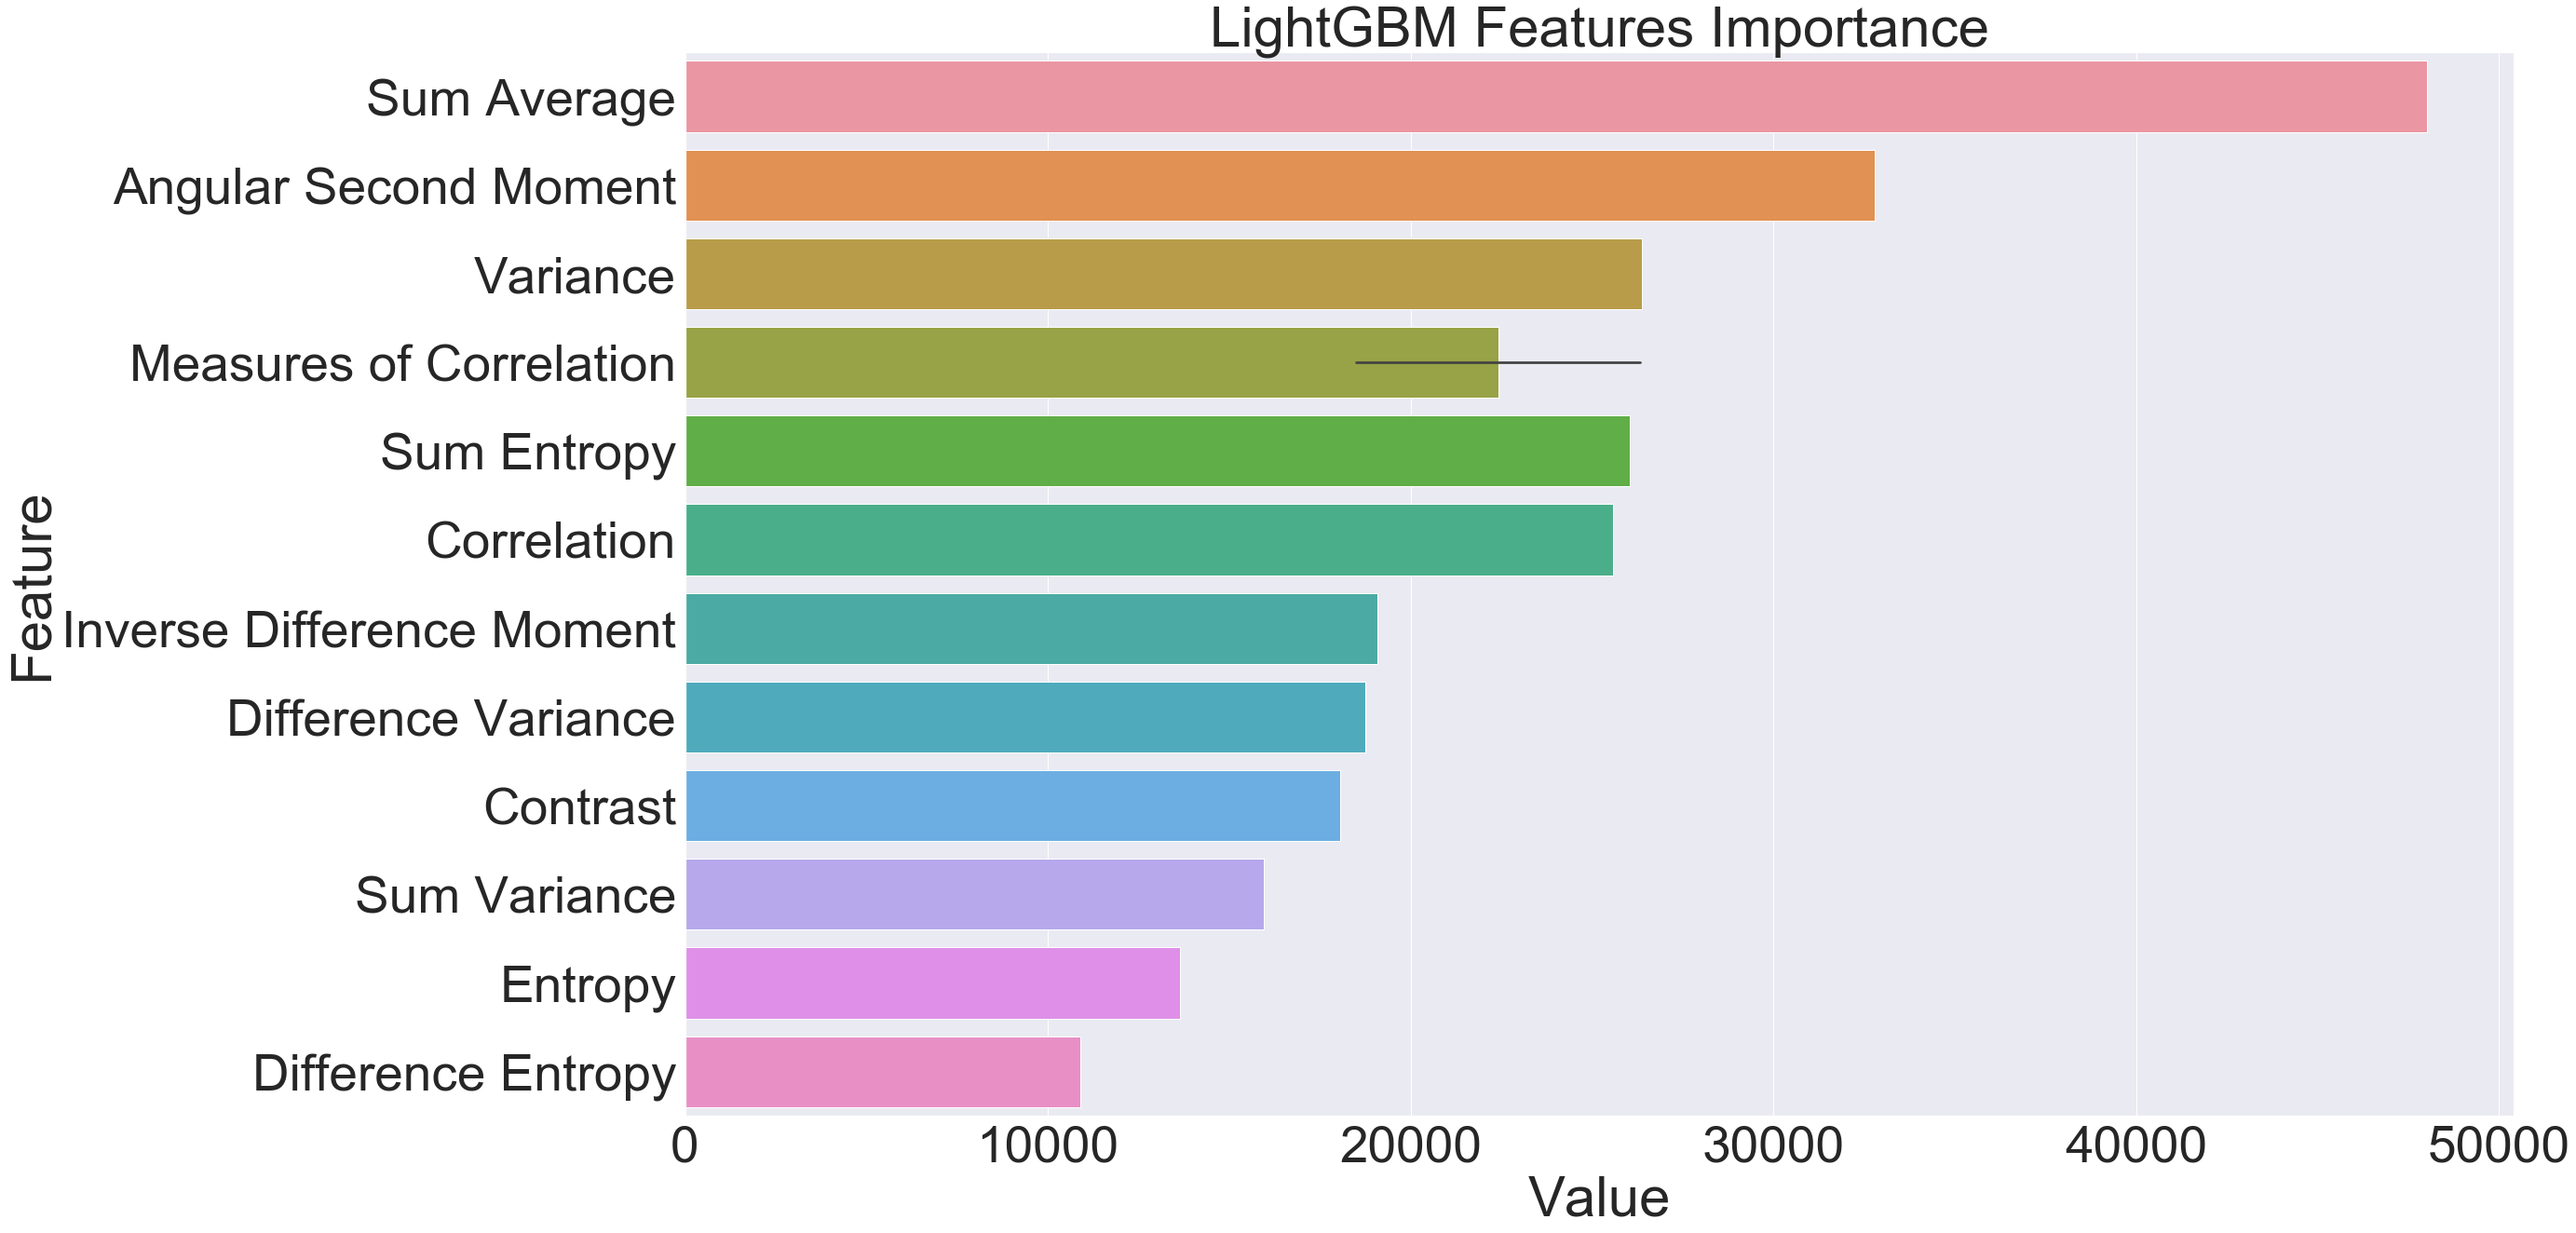

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, columns , num = 13):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num], orient='h')
    plt.title('LightGBM Features Importance')
    plt.tight_layout()
    plt.show()
    
columns = ['Angular Second Moment','Contrast','Correlation','Variance','Inverse Difference Moment','Sum Average','Sum Variance','Sum Entropy','Entropy','Difference Variance','Difference Entropy','Measures of Correlation','Measures of Correlation']
plotImp(model_lgbm, columns)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

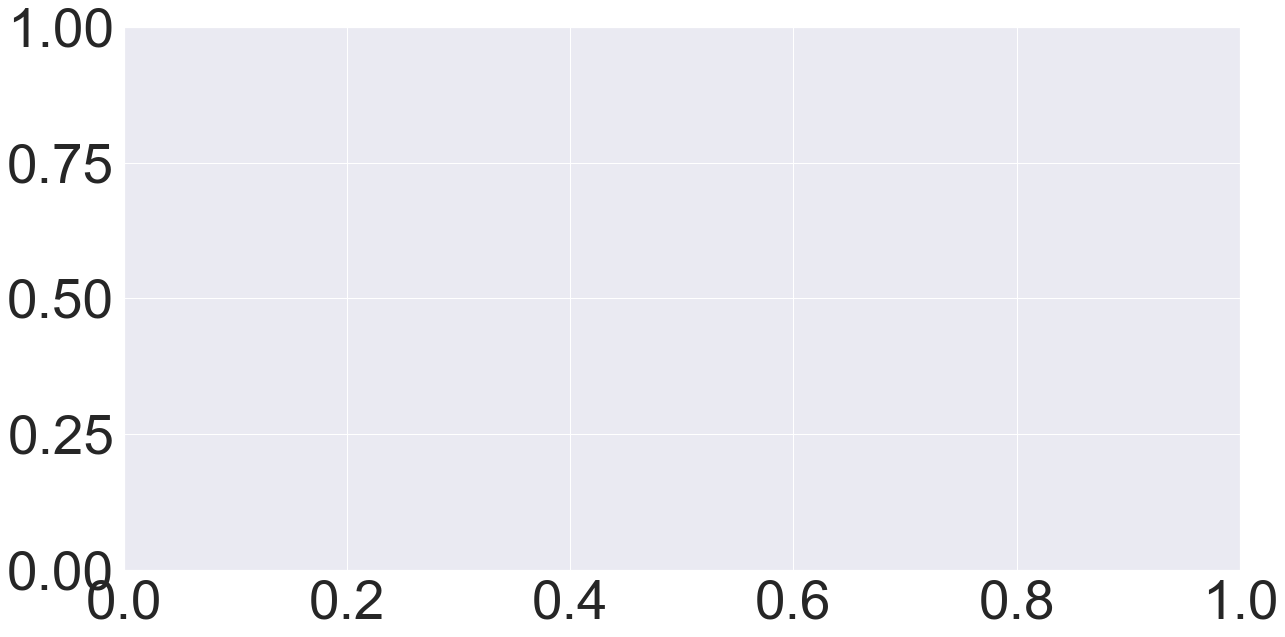

In [223]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importance(),columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.boxplot(x="Value", y="Feature", data=feature_imp, orient='v')
#plt.title('LightGBM Features (avg over folds)')
#plt.tight_layout()
#plt.show()

In [222]:
feature_imp

Value Feature
0   10889      11
1   13633       9
2   15955       7
3   18057       2
4   18496      12
5   18741      10
6   19075       5
7   25590       3
8   26048       8
9   26326      13
10  26387       4
11  32795       1
12  48008       6